In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import os
os.chdir('../Regression Problem') # set your directory in your local machine

In [2]:
os.getcwd()

'K:\\data\\DataSience\\data_sicence course\\ML\\farzad\\Regression Problem'

In [3]:
data = pd.read_csv('CS_04.csv')
data.shape

(322, 21)

In [4]:
data.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [5]:
data.head()

Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits  ...  CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0     66  ...     30    29      14       A        E     446       33      20   
1    835  ...    321   414     375       N        W     632       43      10   
2    457  ...    224   266     263       A        W     880       82      14   
3   1575  ...    828   838     354       N        E     200       11       3   
4    101  ...     48    46      33       N        E     805       40       4   

   Salary  NewLeague  
0     NaN          A  
1   475.0          N  
2   480.0          A  
3   500.0          N  
4    91.5          N  

[5 rows x 21 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [7]:
data.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [8]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

In [9]:
data2 = data.dropna(subset = ['Salary'], axis = 0, inplace = False)
data2.shape

(263, 20)

In [10]:
data2.describe()

AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  263.000000    263.000000   263.000000  263.000000   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544   361.220532   
std      4.793616   2286.582929   648.199644   82.197581   331.198571   
min      1.000000     19.000000     4.000000    0.000000     2.000000   
25%      4.000000    842.500000   212.000000   15.000000   105.500000   
50%      6.000000   1931.000000   516.000000   40.000000   250.000000   
75%     10.000000   3890.500000  1054.000000   92.500000   497.500000   
max     24.000000  14053.000000  4256.000000  548.000000  2165.000000   

              CRBI       CWalks      PutOuts     Assists      Errors  \
count   263.000000   263.000000   263.000000  263.000000  263.000000   
mean    330.418251   260.266160   290.711027  118.760456    8.593156   
std     323.367668   264.055868   279.934575  145.080577    6.606574   
min       3.000000     1.000000     0.000000    0.000000    0.000000   
25%      95.000000    71.000000   113.500000    8.000000    3.000000   
50%     230.000000   174.000000   224.000000   45.000000    7.000000   
75%     424.500000   328.500000   322.500000  192.000000   13.000000   
max    1659.000000  1566.000000  1377.000000  492.000000   32.000000   

            Salary  
count   263.000000  
mean    535.925882  
std     451.118681  
min      67.500000  
25%     190.000000  
50%     425.000000  
75%     750.000000  
max    2460.000000

### Histogram Plot for All Features

In [11]:
data2.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [12]:
var_ind = list(range(13)) + list(range(15, 19))
len(var_ind)

17

In [13]:
var_ind

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18]

In [14]:
data2.iloc[:, var_ind].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    int64  
 1   Hits     263 non-null    int64  
 2   HmRun    263 non-null    int64  
 3   Runs     263 non-null    int64  
 4   RBI      263 non-null    int64  
 5   Walks    263 non-null    int64  
 6   Years    263 non-null    int64  
 7   CAtBat   263 non-null    int64  
 8   CHits    263 non-null    int64  
 9   CHmRun   263 non-null    int64  
 10  CRuns    263 non-null    int64  
 11  CRBI     263 non-null    int64  
 12  CWalks   263 non-null    int64  
 13  PutOuts  263 non-null    int64  
 14  Assists  263 non-null    int64  
 15  Errors   263 non-null    int64  
 16  Salary   263 non-null    float64
dtypes: float64(1), int64(16)
memory usage: 37.0 KB


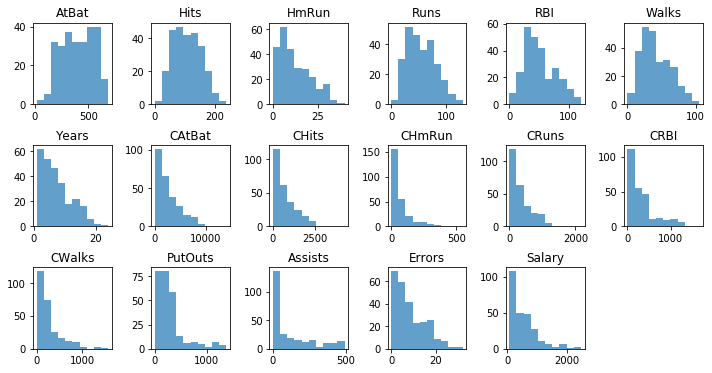

In [15]:
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data2.iloc[:, var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(data2.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Salary')

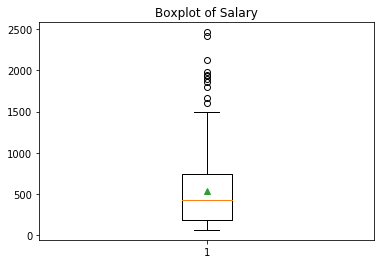

In [16]:
# Box Plot of Salary
plt.boxplot(data2.Salary, showmeans = True)
plt.title('Boxplot of Salary')

In [17]:
cor_table = round(data2.iloc[:, var_ind].corr(method = 'pearson'), 2)
cor_table

AtBat  Hits  HmRun  Runs   RBI  Walks  Years  CAtBat  CHits  CHmRun  \
AtBat     1.00  0.96   0.56  0.90  0.80   0.62   0.01    0.21   0.23    0.21   
Hits      0.96  1.00   0.53  0.91  0.79   0.59   0.02    0.21   0.24    0.19   
HmRun     0.56  0.53   1.00  0.63  0.85   0.44   0.11    0.22   0.22    0.49   
Runs      0.90  0.91   0.63  1.00  0.78   0.70  -0.01    0.17   0.19    0.23   
RBI       0.80  0.79   0.85  0.78  1.00   0.57   0.13    0.28   0.29    0.44   
Walks     0.62  0.59   0.44  0.70  0.57   1.00   0.13    0.27   0.27    0.35   
Years     0.01  0.02   0.11 -0.01  0.13   0.13   1.00    0.92   0.90    0.72   
CAtBat    0.21  0.21   0.22  0.17  0.28   0.27   0.92    1.00   1.00    0.80   
CHits     0.23  0.24   0.22  0.19  0.29   0.27   0.90    1.00   1.00    0.79   
CHmRun    0.21  0.19   0.49  0.23  0.44   0.35   0.72    0.80   0.79    1.00   
CRuns     0.24  0.24   0.26  0.24  0.31   0.33   0.88    0.98   0.98    0.83   
CRBI      0.22  0.22   0.35  0.20  0.39   0.31   0.86    0.95   0.95    0.93   
CWalks    0.13  0.12   0.23  0.16  0.23   0.43   0.84    0.91   0.89    0.81   
PutOuts   0.31  0.30   0.25  0.27  0.31   0.28  -0.02    0.05   0.07    0.09   
Assists   0.34  0.30  -0.16  0.18  0.06   0.10  -0.09   -0.01  -0.01   -0.19   
Errors    0.33  0.28  -0.01  0.19  0.15   0.08  -0.16   -0.07  -0.07   -0.17   
Salary    0.39  0.44   0.34  0.42  0.45   0.44   0.40    0.53   0.55    0.52   

         CRuns  CRBI  CWalks  PutOuts  Assists  Errors  Salary  
AtBat     0.24  0.22    0.13     0.31     0.34    0.33    0.39  
Hits      0.24  0.22    0.12     0.30     0.30    0.28    0.44  
HmRun     0.26  0.35    0.23     0.25    -0.16   -0.01    0.34  
Runs      0.24  0.20    0.16     0.27     0.18    0.19    0.42  
RBI       0.31  0.39    0.23     0.31     0.06    0.15    0.45  
Walks     0.33  0.31    0.43     0.28     0.10    0.08    0.44  
Years     0.88  0.86    0.84    -0.02    -0.09   -0.16    0.40  
CAtBat    0.98  0.95    0.91     0.05    -0.01   -0.07    0.53  
CHits     0.98  0.95    0.89     0.07    -0.01   -0.07    0.55  
CHmRun    0.83  0.93    0.81     0.09    -0.19   -0.17    0.52  
CRuns     1.00  0.95    0.93     0.06    -0.04   -0.09    0.56  
CRBI      0.95  1.00    0.89     0.10    -0.10   -0.12    0.57  
CWalks    0.93  0.89    1.00     0.06    -0.07   -0.13    0.49  
PutOuts   0.06  0.10    0.06     1.00    -0.04    0.08    0.30  
Assists  -0.04 -0.10   -0.07    -0.04     1.00    0.70    0.03  
Errors   -0.09 -0.12   -0.13     0.08     0.70    1.00   -0.01  
Salary    0.56  0.57    0.49     0.30     0.03   -0.01    1.00

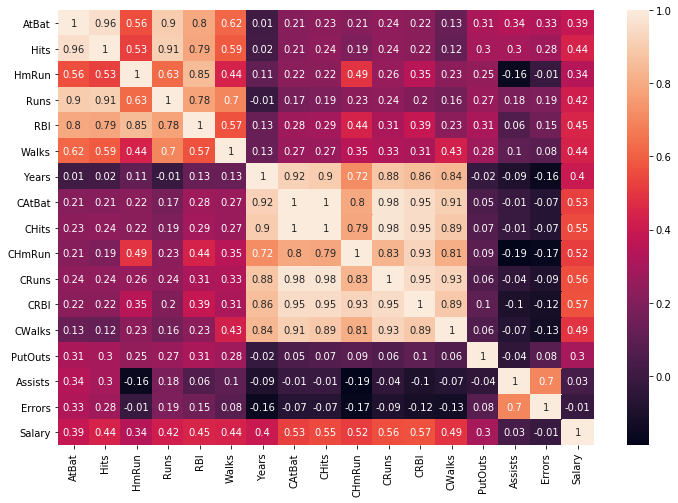

In [18]:
plt.figure(figsize = (12, 8))
sns.heatmap(cor_table, annot = True)

#### Scatter Plot Between Target Value and Features

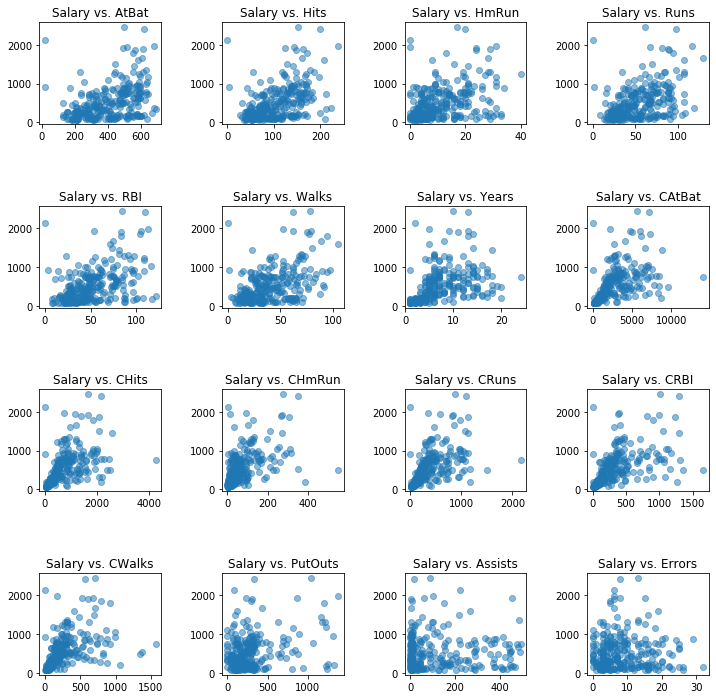

In [19]:
#Scatter Plot
var_ind = list(range(13)) + list(range(15, 18))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data2.iloc[: , var_ind[i - 1]], y = data2.iloc[: , 18], alpha = 0.5)
    a.title.set_text('Salary vs. ' + data2.columns[var_ind[i - 1]])

263 == 263 if these numbers are not equal then we have missing value
------------------------------------
The min of Errors is: 0
------------------------------------
The max of Errors is: 32
------------------------------------
The quantile of Errors is:
0.10     2.0
0.25     3.0
0.50     7.0
0.75    13.0
0.90    18.0
0.95    21.9
Name: Errors, dtype: float64
------------------------------------
The mean of Errors is: 8.593155893536121


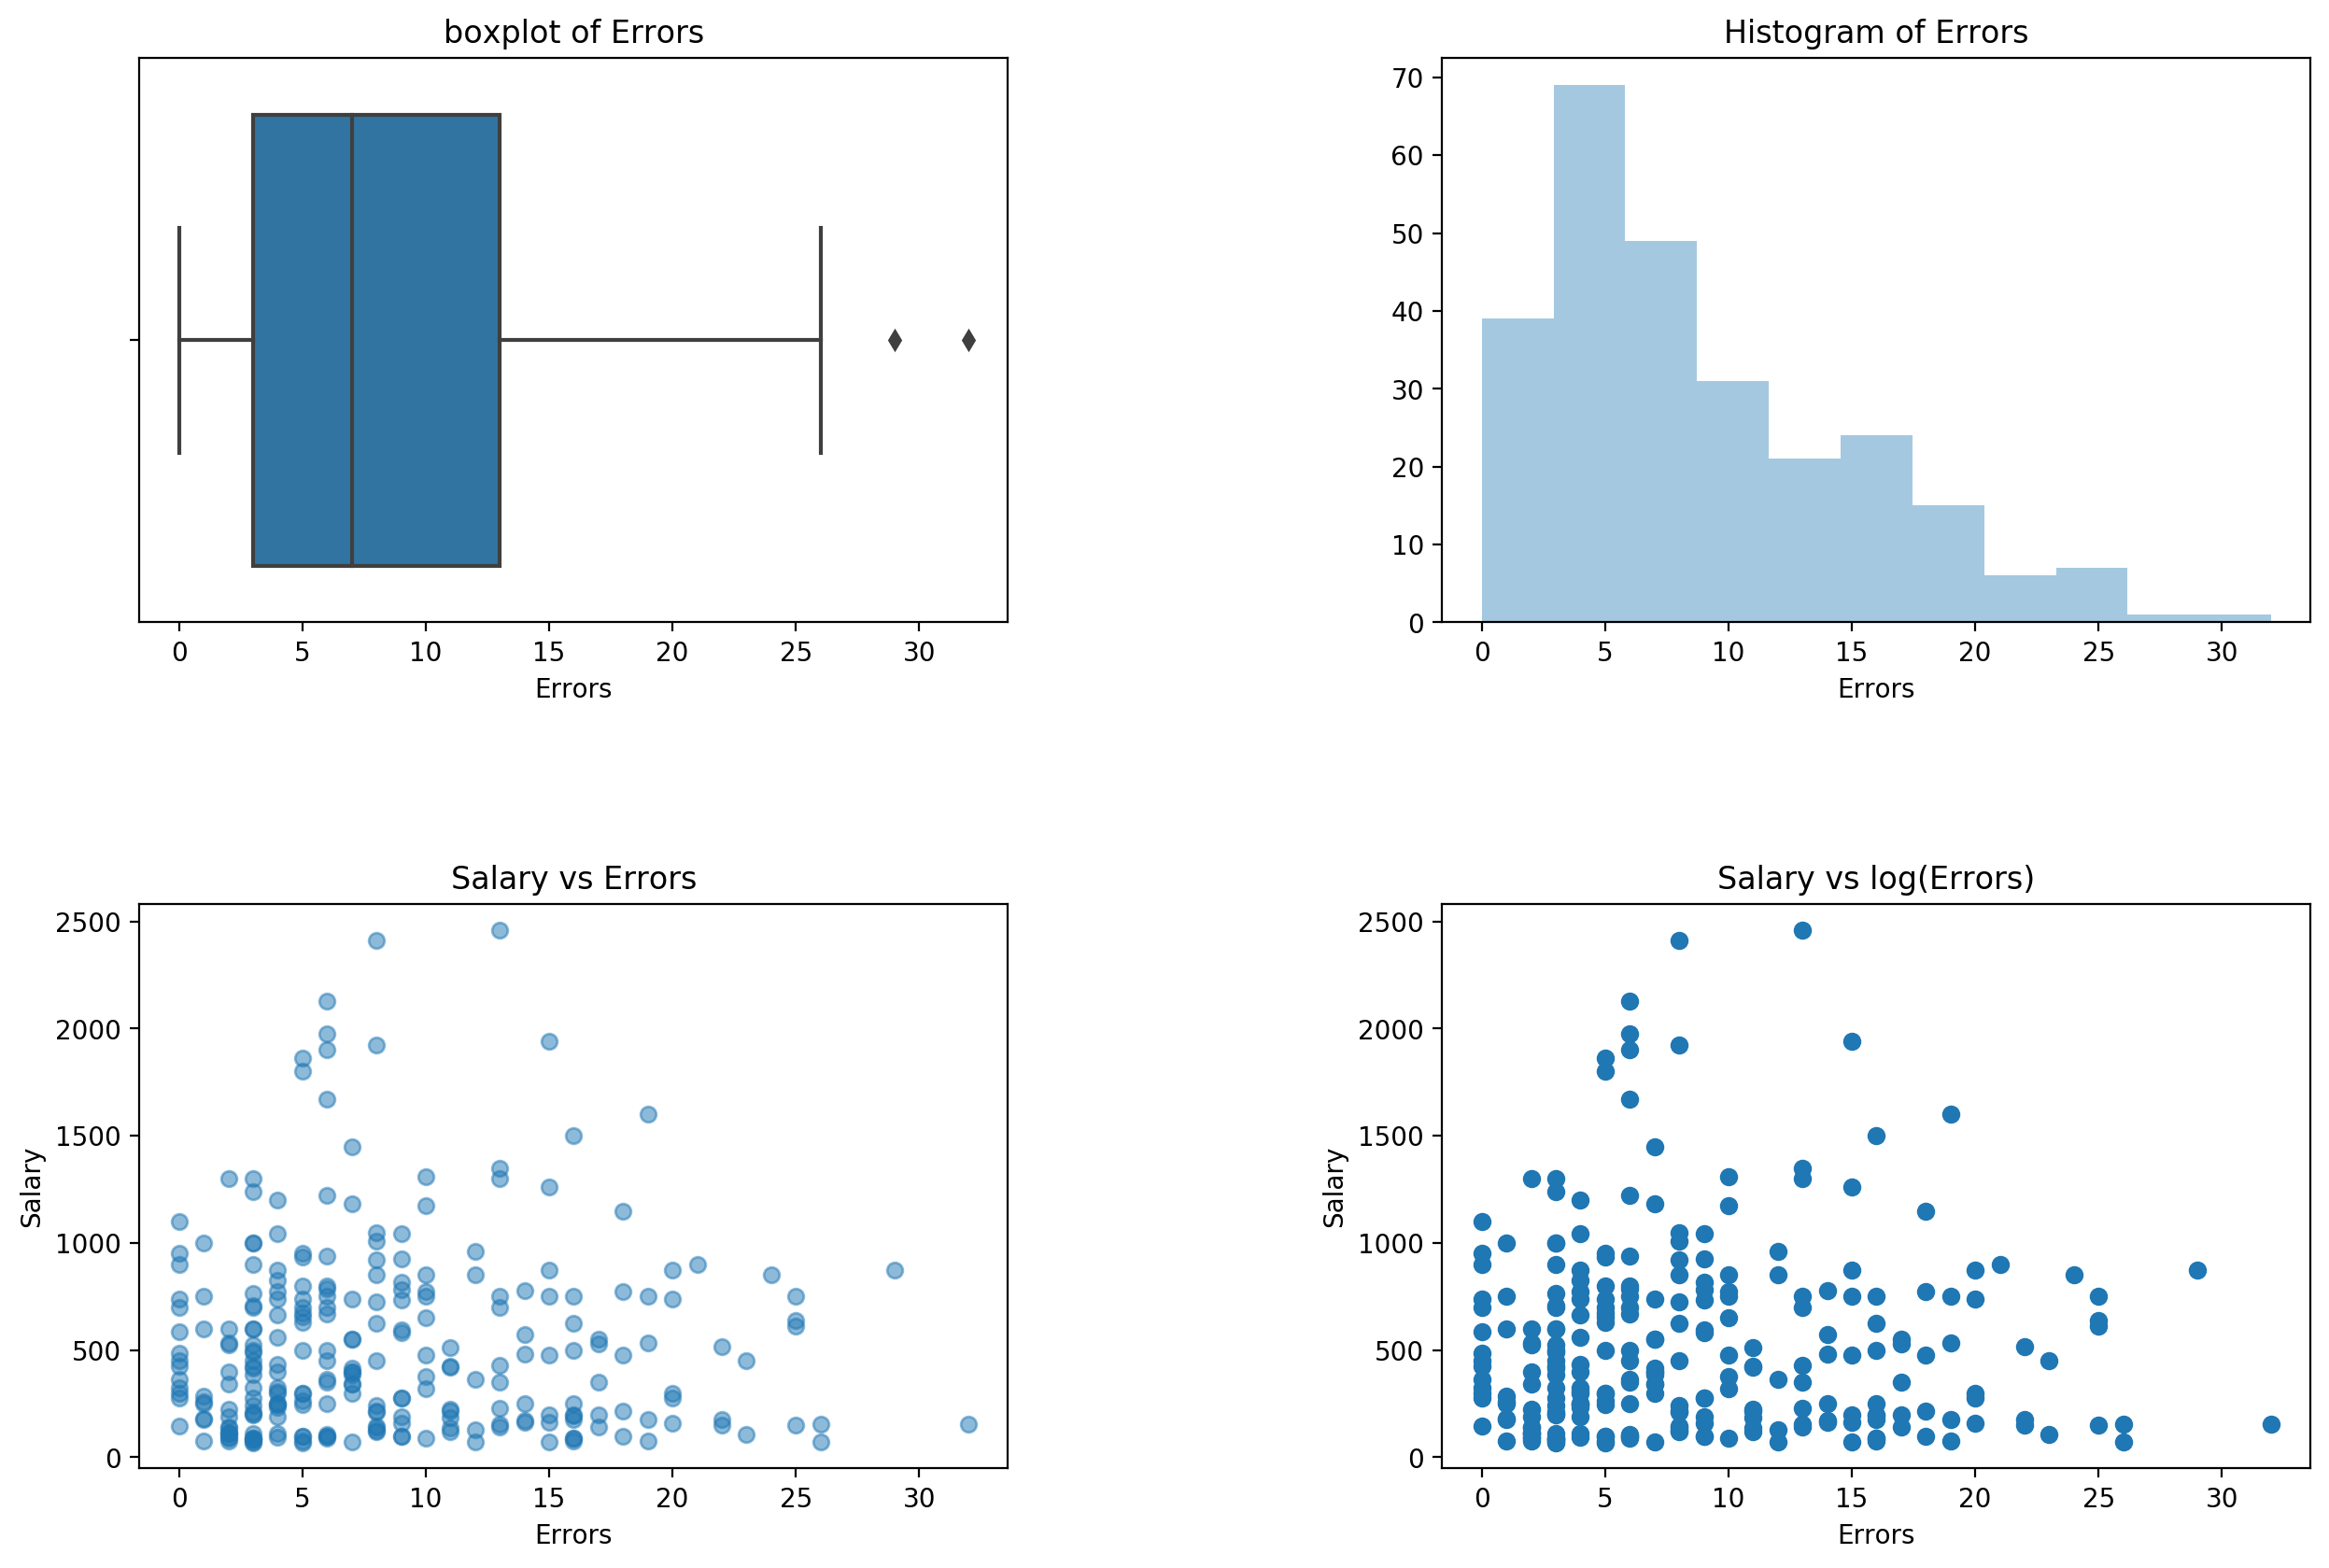

In [20]:
targ_x = 'Errors'
targ_y = 'Salary'
print(f'{data2[targ_x].count()} == {data2[targ_x].size} if these numbers are not equal then we have missing value')
print('------------------------------------')
print(f'The min of {targ_x} is: {data2[targ_x].min()}')
print('------------------------------------')
print(f'The max of {targ_x} is: {data2[targ_x].max()}')
print('------------------------------------')
print(f'The quantile of {targ_x} is:\n{data2[targ_x].quantile(q = [.1, .25, .5, .75, .9, .95])}')
print('------------------------------------')
print(f'The mean of {targ_x} is: {data2[targ_x].mean()}')


plt.figure(figsize=(15, 10), dpi = 200)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)


plt.subplot(221)
sns.boxplot(x = data2[targ_x]);
plt.title(f'boxplot of {targ_x}')

plt.subplot(222)
sns.distplot(data2[targ_x], kde = False);
plt.title(f'Histogram of {targ_x}')


plt.subplot(223)
plt.scatter(x = data2[targ_x], y = data2[targ_y], alpha = 0.5);
plt.title(f'{targ_y} vs {targ_x}')
plt.xlabel(targ_x)
plt.ylabel(targ_y)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)



plt.subplot(224)
plt.scatter(x = data2[targ_x], y = data2[targ_y]);
plt.title(f'{targ_y} vs log({targ_x})')
plt.xlabel(targ_x)
plt.ylabel(targ_y)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)



### Categorical Variables

In [21]:
data2['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [22]:
data2['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [23]:
data2['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

### Data Preparation

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.2, random_state = 1234)
print(f'The Shape of train is: {train.shape}')
print(f'The Shape of test is: {test.shape}')


The Shape of train is: (210, 20)
The Shape of test is: (53, 20)


In [25]:
train.describe()

AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean   409.009524  109.923810   11.880952   55.871429   52.290476   41.838095   
std    148.097730   46.149683    8.872306   25.833802   26.641091   21.846408   
min     20.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    283.000000   73.000000    5.000000   34.000000   30.000000   24.000000   
50%    417.000000  105.500000    9.000000   53.500000   47.000000   37.500000   
75%    528.750000  144.750000   18.000000   76.000000   73.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  210.000000   210.000000   210.000000  210.000000   210.000000   
mean     7.409524  2658.804762   721.333333   70.361905   360.742857   
std      4.624038  2126.724958   596.666853   83.085605   307.176493   
min      1.000000    41.000000     9.000000    0.000000     6.000000   
25%      4.000000   928.250000   230.250000   15.000000   116.250000   
50%      6.000000  2035.500000   546.500000   40.000000   278.500000   
75%     11.000000  3900.250000  1058.000000   92.750000   493.500000   
max     20.000000  9528.000000  2583.000000  548.000000  1509.000000   

              CRBI       CWalks      PutOuts     Assists      Errors  \
count   210.000000   210.000000   210.000000  210.000000  210.000000   
mean    331.709524   259.609524   292.023810  111.880952    8.228571   
std     315.682880   251.547022   275.904453  143.031332    6.307521   
min       7.000000     4.000000     0.000000    0.000000    0.000000   
25%      99.250000    76.500000   110.250000    7.000000    3.000000   
50%     251.500000   179.500000   226.000000   41.500000    6.000000   
75%     419.750000   318.500000   318.500000  172.250000   12.750000   
max    1659.000000  1380.000000  1377.000000  492.000000   29.000000   

            Salary  
count   210.000000  
mean    562.288433  
std     466.852811  
min      68.000000  
25%     210.000000  
50%     450.000000  
75%     761.250000  
max    2460.000000

In [26]:
test.describe()

AtBat        Hits      HmRun        Runs         RBI      Walks  \
count   53.000000   53.000000  53.000000   53.000000   53.000000  53.000000   
mean   382.377358   99.528302  10.584906   50.283019   48.301887  38.245283   
std    143.530113   40.146177   8.284448   24.056326   22.577716  21.160473   
min     19.000000    4.000000   0.000000    2.000000    3.000000   1.000000   
25%    278.000000   70.000000   3.000000   32.000000   32.000000  22.000000   
50%    360.000000  103.000000   9.000000   48.000000   47.000000  34.000000   
75%    511.000000  138.000000  17.000000   68.000000   60.000000  56.000000   
max    584.000000  163.000000  33.000000  107.000000  104.000000  83.000000   

           Years        CAtBat        CHits      CHmRun        CRuns  \
count  53.000000     53.000000    53.000000   53.000000    53.000000   
mean    6.924528   2652.547170   725.566038   64.792453   363.113208   
std     5.445001   2857.368387   828.292045   79.190947   416.452493   
min     1.000000     19.000000     4.000000    0.000000     2.000000   
25%     3.000000    682.000000   170.000000   16.000000    93.000000   
50%     5.000000   1399.000000   357.000000   36.000000   168.000000   
75%    10.000000   3828.000000   970.000000   90.000000   575.000000   
max    24.000000  14053.000000  4256.000000  384.000000  2165.000000   

              CRBI       CWalks      PutOuts     Assists     Errors  \
count    53.000000    53.000000    53.000000   53.000000  53.000000   
mean    325.301887   262.867925   285.509434  146.018868  10.037736   
std     355.362414   311.416370   298.059211  151.253797   7.572629   
min       3.000000     1.000000     0.000000    0.000000   0.000000   
25%      80.000000    50.000000   117.000000    9.000000   4.000000   
50%     154.000000   128.000000   203.000000   80.000000   8.000000   
75%     458.000000   359.000000   325.000000  269.000000  16.000000   
max    1314.000000  1566.000000  1320.000000  465.000000  32.000000   

            Salary  
count    53.000000  
mean    431.470491  
std     368.025230  
min      67.500000  
25%     155.000000  
50%     297.500000  
75%     670.000000  
max    1861.460000

In [27]:
final_dataset_train = pd.get_dummies(train,drop_first=True)
final_dataset_train.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
98     415   115     27    97   71     68      3     711    184      45   
206    407    93      8    47   30     30      2     969    230      14   
54     403   101     12    45   53     39     12    5150   1429     166   
177    441   118     28    84   86     68      8    2723    750     126   
27     474   129     10    50   56     40     10    2331    604      61   

     CRuns  CRBI  CWalks  PutOuts  Assists  Errors  Salary  League_N  \
98     156   119      99      274        2       7   300.0         1   
206    121    69      68      172      317      25   150.0         1   
54     747   666     526      316        6       5   675.0         0   
177    433   420     309      190        2       2  1300.0         0   
27     246   327     166      732       83      13   750.0         1   

     Division_W  NewLeague_N  
98            1            1  
206           1            1  
54            0            0  
177           0            0  
27            1            1

In [28]:
X_train = final_dataset_train.iloc[:, list(range(0,16)) + list(range(17, 20))]
y_train = final_dataset_train.iloc[:, 16]

In [29]:
X_train = sm.add_constant(X_train)

In [30]:
y_train

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
        ...  
183     125.0
192     525.0
256     400.0
72      850.0
263     740.0
Name: Salary, Length: 210, dtype: float64

In [31]:
final_dataset_test = pd.get_dummies(test, drop_first=True)
final_dataset_test.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
295     19     4      1     2    3      1      1      19      4       1   
132    278    70      7    22   37     18     18    7186   2081     190   
137    343   103      6    48   36     40     15    4338   1193      70   
268    549   149      7    73   47     42      1     549    149       7   
239    309    72      0    33   31     26      5     354     82       0   

     CRuns  CRBI  CWalks  PutOuts  Assists  Errors  Salary  League_N  \
295      2     3       1      692       70       8   920.0         1   
132    935  1088     643        0        0       0   325.0         0   
137    581   421     325      211       56      13   430.0         0   
268     73    47      42      255      450      17   140.0         1   
239     41    32      26      117      269      12   130.0         1   

     Division_W  NewLeague_N  
295           1            0  
132           1            0  
137           0            0  
268           1            1  
239           0            1

In [32]:
X_test = final_dataset_test.iloc[:, list(range(0,16)) + list(range(17, 20))]
y_test = final_dataset_test.iloc[:, 16]

In [33]:
X_test = sm.add_constant(X_test)

In [34]:
y_test

295     920.000
132     325.000
137     430.000
268     140.000
239     130.000
128     662.500
189    1183.333
209     550.000
276     155.000
236     750.000
227     200.000
320     960.000
215     175.000
178    1000.000
121     200.000
265     140.000
45      305.000
274     200.000
40       67.500
244     215.000
198     145.000
303     425.000
7       100.000
78      325.000
96     1861.460
68      105.000
223     240.000
35      850.000
93      145.000
130     750.000
311     525.000
6        70.000
131     297.500
63      225.000
205      90.000
89      475.000
293     925.000
314     120.000
8        75.000
10      517.143
88      260.000
85      600.000
124     737.500
185     725.000
262     191.000
43      180.000
162      75.000
214     670.000
301     160.000
70      320.000
226     175.000
271    1000.000
195     800.000
Name: Salary, dtype: float64

# Bulid Models


## Model1: Linear Regression

In [35]:
import statsmodels.api as sm
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Fri, 28 May 2021   Prob (F-statistic):           4.97e-24
Time:                        13:50:50   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

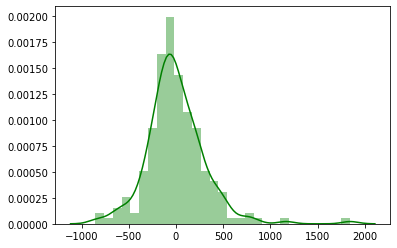

In [36]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.distplot(model1.resid, hist = True, 
             kde = True, color = 'green',
             bins = np.linspace(min(model1.resid), max(model1.resid), 30))

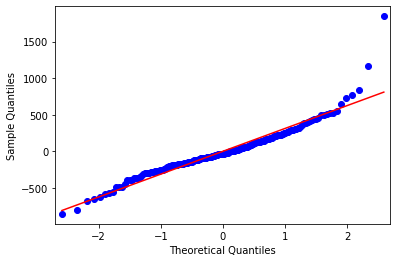

In [37]:
#QQ-plot
qqplot_model1 = sm.qqplot(model1.resid, line = 's')
plt.show()

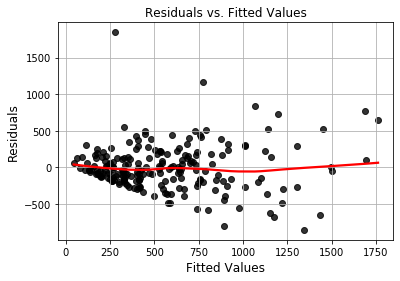

In [38]:
#Residuals vs. Fitted Values
sns.regplot(x = model1.fittedvalues, y = model1.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [39]:
#Check Cook's distance
sum(model1.get_influence().summary_frame().cooks_d > 1)

0

In [40]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train.iloc[:, 1:])
#If VIF > 10 then multicollinearity is high

variables          VIF
0         AtBat   184.789083
1          Hits   228.168969
2         HmRun    24.624973
3          Runs    94.783224
4           RBI    67.555583
5         Walks    22.239021
6         Years    19.479370
7        CAtBat   661.537532
8         CHits  1367.185526
9        CHmRun    94.537823
10        CRuns   343.366050
11         CRBI   338.173807
12       CWalks    42.705439
13      PutOuts     2.791098
14      Assists     3.884531
15       Errors     5.490002
16     League_N     8.454530
17   Division_W     2.211985
18  NewLeague_N     8.518855

In [41]:
y_pred_model1 = model1.predict(X_test)
abs_err_model1 = np.abs(y_pred_model1 - y_test)

In [42]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_model1.mean(),
                           'Median of AbsErrors' : abs_err_model1.median(),
                           'SD of AbsErrors' :     abs_err_model1.std(),
                           'IQR of AbsErrors':     iqr(abs_err_model1),
                           'Min of AbsErrors':     abs_err_model1.min(),
                           'Max of AbsErrors':     abs_err_model1.max()}, index = ['Model1: Linear-Ragression'])
model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression         223.148958            158.57417   

                           SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression       198.785517        216.725217   

                           Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression          3.569232       1047.957143

<Figure size 2250x2250 with 0 Axes>

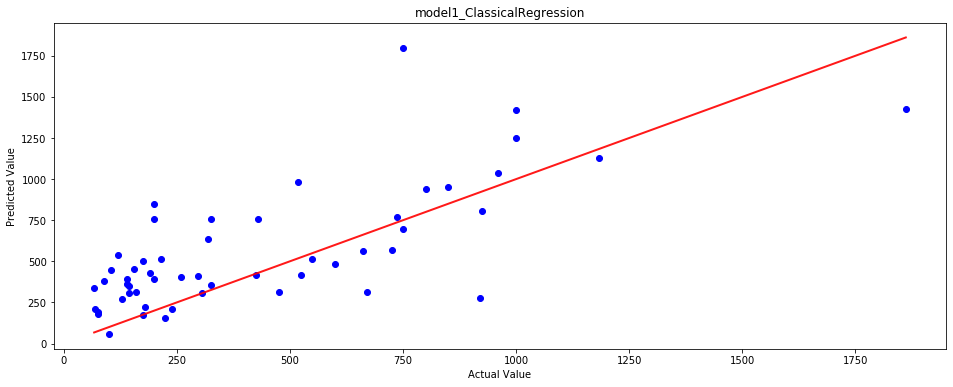

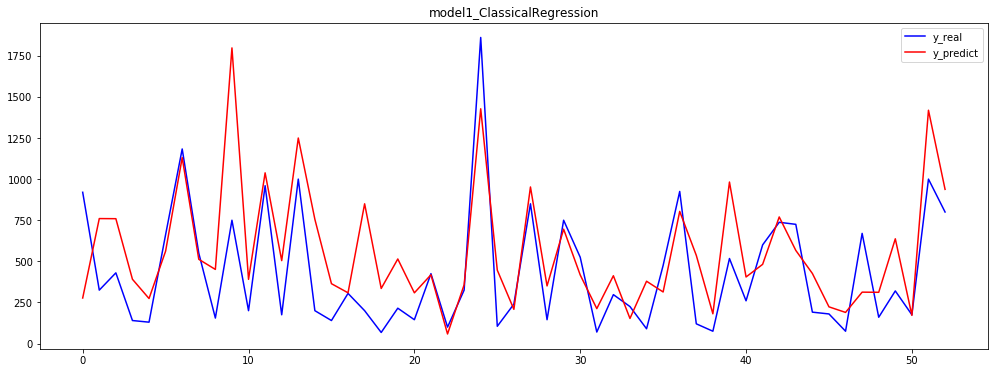

In [43]:
y_pred = y_pred_model1
y_test = y_test
model = 'model1_ClassicalRegression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.title(f'{model}');
plt.show();

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model1)))

MAE: 223.14895772642777
MSE: 88565.56020433208
RMSE: 297.5996643216052


In [45]:
from scipy.stats import boxcox
box_results = boxcox(y_train, alpha = 0.05)
box_results

(array([ 8.68767642,  7.23164837, 10.57834815, 12.26939869, 10.83994871,
         6.62404411,  7.71258662,  8.68767642, 10.83994871,  8.96581785,
        11.22963399, 12.37152681,  9.42809521, 11.68471715, 11.22963399,
        10.2903865 , 11.07990572, 10.01452882,  6.24460125,  9.33424139,
        12.18523005,  8.49713804,  9.18694201,  9.85379764, 12.05455555,
         6.19217269,  8.29104472,  8.97678487,  9.12564319,  8.58783864,
        10.69755487, 12.26939869,  9.33424139, 13.38038527,  6.62404411,
        14.01171784, 10.66821468, 10.38965872, 11.15571849, 11.30175192,
         9.60648041,  7.84493411,  6.44250966,  7.42366699, 10.08065305,
         8.4167188 ,  7.92100039, 12.83795386,  5.73192967, 10.66821468,
         9.99213228, 11.57398419, 10.34045899, 10.91673547, 12.26939869,
         6.44250966, 11.44095555,  9.60648041, 13.35909851, 11.22963399,
         9.60648041, 13.4314587 ,  9.03092529,  9.7940383 , 10.92754387,
        10.79796189,  6.24460125, 10.44759156, 11.8

In [47]:
logy_train = np.log(y_train)

In [48]:
import statsmodels.api as sm
model1_box = sm.OLS(logy_train, X_train).fit()
model1_box.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     13.22
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.28e-25
Time:                        13:51:00   Log-Likelihood:                -184.45
No. Observations:                 210   AIC:                             408.9
Df Residuals:                     190   BIC:                             475.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6187      0.200     23.047      0.000       4.223       5.014
AtBat          -0.0023      0.001     -1.658      0.099      -0.005       0.000
Hits            0.0128      0.005      2.373      0.019       0.002       0.023
HmRun           0.0191      0.014      1.348      0.179      -0.009       0.047
Runs           -0.0045      0.007     -0.671      0.503      -0.018       0.009
RBI            -0.0036      0.006     -0.612      0.541      -0.015       0.008
Walks           0.0099      0.004      2.349      0.020       0.002       0.018
Years           0.0535      0.026      2.030      0.044       0.002       0.105
CAtBat       6.129e-05      0.000      0.191      0.849      -0.001       0.001
CHits          -0.0003      0.002     -0.171      0.864      -0.004       0.003
CHmRun         -0.0009      0.004     -0.243      0.808      -0.008       0.007
CRuns           0.0018      0.002      1.105      0.271      -0.001       0.005
CRBI         9.632e-05      0.002      0.057      0.955      -0.003       0.003
CWalks         -0.0012      0.001     -1.529      0.128      -0.003       0.000
PutOuts         0.0003      0.000      1.489      0.138    -8.5e-05       0.001
Assists         0.0004      0.000      0.907      0.366      -0.000       0.001
Errors         -0.0048      0.010     -0.496      0.621      -0.024       0.014
League_N        0.1897      0.183      1.038      0.301      -0.171       0.550
Division_W     -0.2023      0.090     -2.260      0.025      -0.379      -0.026
NewLeague_N    -0.0796      0.184     -0.432      0.666      -0.443       0.284
==============================================================================
Omnibus:                       12.886   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               32.178
Skew:                           0.099   Prob(JB):                     1.03e-07
Kurtosis:                       4.907   Cond. No.                     2.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
X_train.drop('const', axis = 1, inplace = True)
X_test.drop('const', axis = 1, inplace = True)

### Model2: Ridge Regression

In [52]:
from sklearn.linear_model import Ridge, RidgeCV

In [53]:
lambda_grid = 10 ** np.linspace(2, -5, num = 100)
lambda_grid

array([1.00000000e+02, 8.49753436e+01, 7.22080902e+01, 6.13590727e+01,
       5.21400829e+01, 4.43062146e+01, 3.76493581e+01, 3.19926714e+01,
       2.71858824e+01, 2.31012970e+01, 1.96304065e+01, 1.66810054e+01,
       1.41747416e+01, 1.20450354e+01, 1.02353102e+01, 8.69749003e+00,
       7.39072203e+00, 6.28029144e+00, 5.33669923e+00, 4.53487851e+00,
       3.85352859e+00, 3.27454916e+00, 2.78255940e+00, 2.36448941e+00,
       2.00923300e+00, 1.70735265e+00, 1.45082878e+00, 1.23284674e+00,
       1.04761575e+00, 8.90215085e-01, 7.56463328e-01, 6.42807312e-01,
       5.46227722e-01, 4.64158883e-01, 3.94420606e-01, 3.35160265e-01,
       2.84803587e-01, 2.42012826e-01, 2.05651231e-01, 1.74752840e-01,
       1.48496826e-01, 1.26185688e-01, 1.07226722e-01, 9.11162756e-02,
       7.74263683e-02, 6.57933225e-02, 5.59081018e-02, 4.75081016e-02,
       4.03701726e-02, 3.43046929e-02, 2.91505306e-02, 2.47707636e-02,
       2.10490414e-02, 1.78864953e-02, 1.51991108e-02, 1.29154967e-02,
      

In [55]:
lambda_grid = np.linspace(.2, .36, num = 100)
lambda_grid

array([0.2       , 0.20161616, 0.20323232, 0.20484848, 0.20646465,
       0.20808081, 0.20969697, 0.21131313, 0.21292929, 0.21454545,
       0.21616162, 0.21777778, 0.21939394, 0.2210101 , 0.22262626,
       0.22424242, 0.22585859, 0.22747475, 0.22909091, 0.23070707,
       0.23232323, 0.23393939, 0.23555556, 0.23717172, 0.23878788,
       0.24040404, 0.2420202 , 0.24363636, 0.24525253, 0.24686869,
       0.24848485, 0.25010101, 0.25171717, 0.25333333, 0.25494949,
       0.25656566, 0.25818182, 0.25979798, 0.26141414, 0.2630303 ,
       0.26464646, 0.26626263, 0.26787879, 0.26949495, 0.27111111,
       0.27272727, 0.27434343, 0.2759596 , 0.27757576, 0.27919192,
       0.28080808, 0.28242424, 0.2840404 , 0.28565657, 0.28727273,
       0.28888889, 0.29050505, 0.29212121, 0.29373737, 0.29535354,
       0.2969697 , 0.29858586, 0.30020202, 0.30181818, 0.30343434,
       0.30505051, 0.30666667, 0.30828283, 0.30989899, 0.31151515,
       0.31313131, 0.31474747, 0.31636364, 0.3179798 , 0.31959

In [56]:
ridge_cv = RidgeCV(alphas = lambda_grid, cv = 10, normalize = True)
ridge_cv.fit(X_train, logy_train)
ridge_cv.alpha_

0.33414141414141413

In [57]:
model2 = Ridge(normalize = True, alpha = ridge_cv.alpha_)
model2.fit(X_train, logy_train)
y_pred_model2 = model2.predict(X_test)
y_pred_model2 = np.exp(y_pred_model2)
abs_err_model2 = np.abs(y_pred_model2 - y_test)

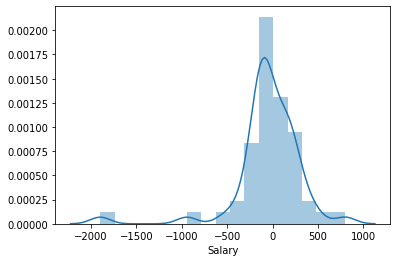

In [58]:
sns.distplot(y_test - y_pred_model2)

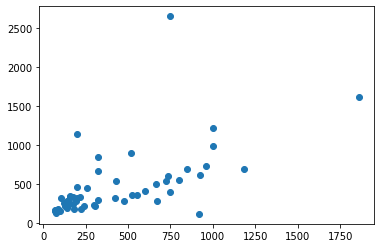

In [59]:
plt.scatter(y_test , y_pred_model2)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model2)))

MAE: 226.44167398010137
MSE: 135811.2350773115
RMSE: 368.5257590417683


<Figure size 2250x2250 with 0 Axes>

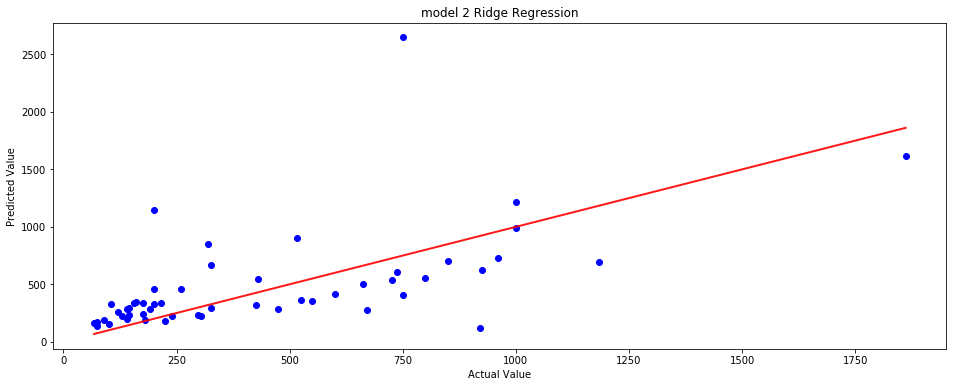

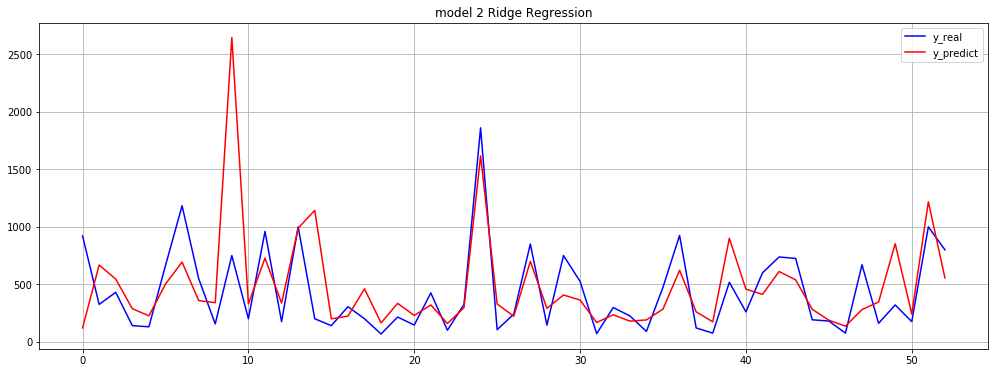

In [61]:
from sklearn.metrics import r2_score

y_pred = y_pred_model2
y_test = y_test
model = 'model 2 Ridge Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [62]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model2.mean(),
                                             'Median of AbsErrors' : abs_err_model2.median(),
                                             'SD of AbsErrors' :     abs_err_model2.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model2),
                                             'Min of AbsErrors':     abs_err_model2.min(),
                                             'Max of AbsErrors':     abs_err_model2.max()}, index = ['Model2: Ridge Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression         223.148958            158.57417   
Model2: Ridge Regression          226.441674            151.02955   

                           SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression       198.785517        216.725217   
Model2: Ridge Regression        293.532084        136.707544   

                           Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression          3.569232       1047.957143  
Model2: Ridge Regression           7.679097       1897.768941

### Model3: Lasso Regression

In [63]:
from sklearn.linear_model import Lasso, LassoCV


In [64]:
lambda_grid = 10 ** np.linspace(2, -5, num = 100)


In [66]:
lambda_grid =  np.linspace(0.0001, 0.01, num = 100)


In [67]:
#K-fold Cross Validation to Choose the Best Model
lassocv = LassoCV(alphas = lambda_grid, cv = 10, normalize = True)
lassocv.fit(X_train, logy_train)
lassocv.alpha_

0.0015

In [68]:
model3 = Lasso(alpha = lassocv.alpha_, normalize = True)
model3.fit(X_train, logy_train)
y_pred_model3 = model3.predict(X_test)
y_pred_model3 = np.exp(y_pred_model3)
abs_err_model3 = np.abs(y_pred_model3 - y_test)

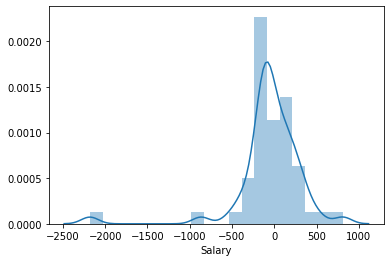

In [69]:
sns.distplot(y_test - y_pred_model3)

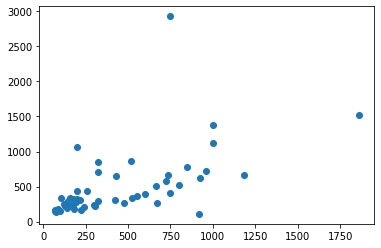

In [70]:
plt.scatter(y_test , y_pred_model3)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model3)))

MAE: 294.6218817951447
MSE: 198245.4630943862
RMSE: 445.24764243551726


<Figure size 2250x2250 with 0 Axes>

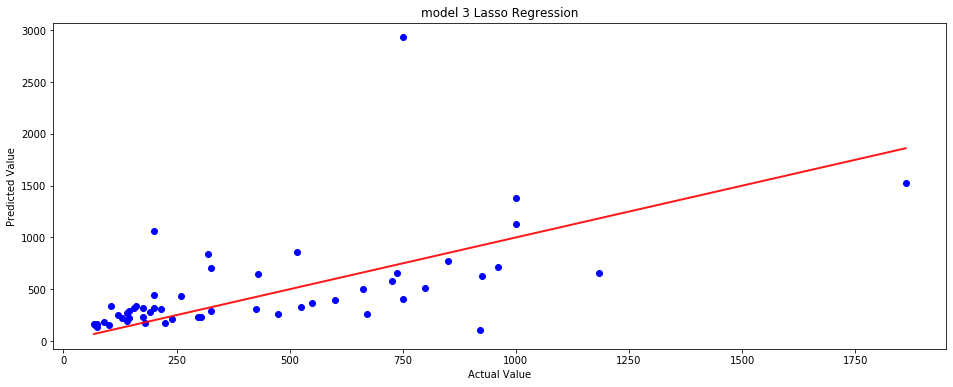

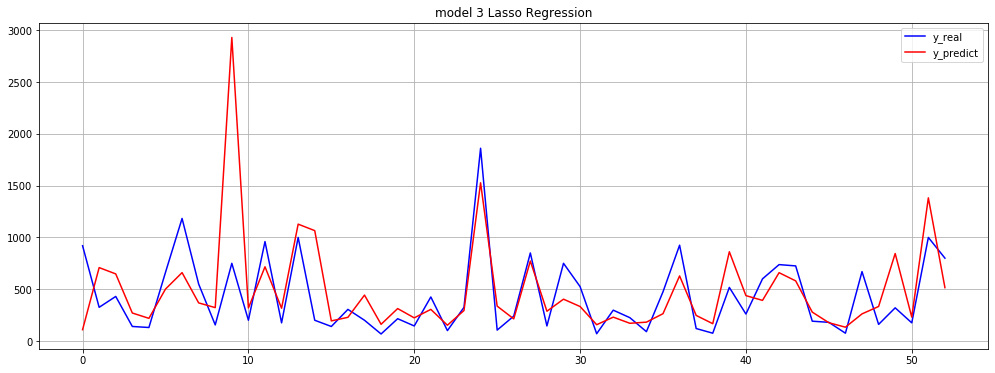

In [74]:
from sklearn.metrics import r2_score

y_pred = y_pred_model3
y_test = y_test
model = 'model 3 Lasso Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [73]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model3.mean(),
                                             'Median of AbsErrors' : abs_err_model3.median(),
                                             'SD of AbsErrors' :     abs_err_model3.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model3),
                                             'Min of AbsErrors':     abs_err_model3.min(),
                                             'Max of AbsErrors':     abs_err_model3.max()}, index = ['Model3: Lasso Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression         223.148958           158.574170   
Model2: Ridge Regression          226.441674           151.029550   
Model3: Lasso Regression          235.833326           142.116905   

                           SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression       198.785517        216.725217   
Model2: Ridge Regression        293.532084        136.707544   
Model3: Lasso Regression        324.730397        156.625954   

                           Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression          3.569232       1047.957143  
Model2: Ridge Regression           7.679097       1897.768941  
Model3: Lasso Regression           3.744212       2181.596147

### Model4: KNN

In [90]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor(n_neighbors = 2, metric = 'minkowski', p = 2)
model4.fit(X_train, logy_train)
y_pred_model4 = model4.predict(X_test)
y_pred_model4 = np.exp(y_pred_model4)
abs_err_model4 = np.abs(y_pred_model4 - y_test)

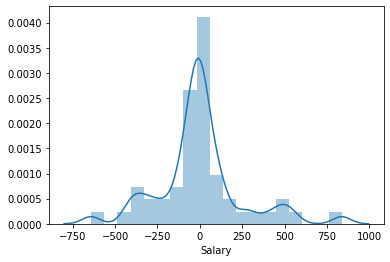

In [91]:
sns.distplot(y_test - y_pred_model4)

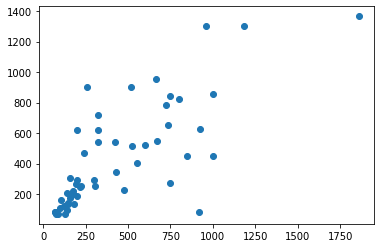

In [92]:
plt.scatter(y_test , y_pred_model4)

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model4)))

MAE: 160.4074775800345
MSE: 61439.30636882631
RMSE: 247.8695349752089


<Figure size 2250x2250 with 0 Axes>

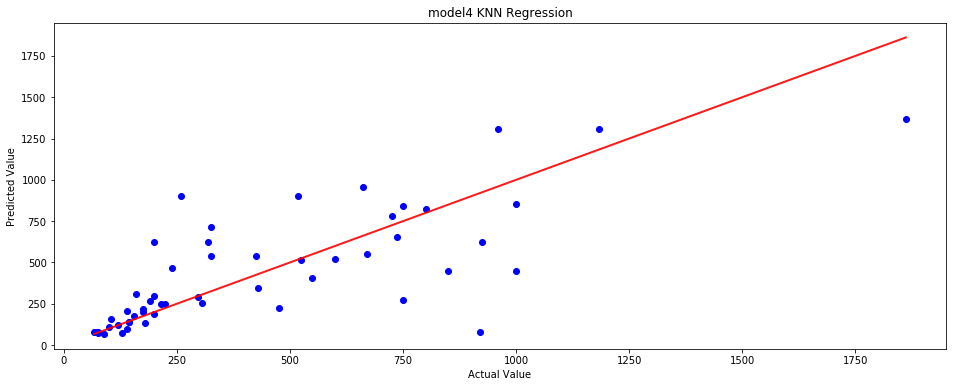

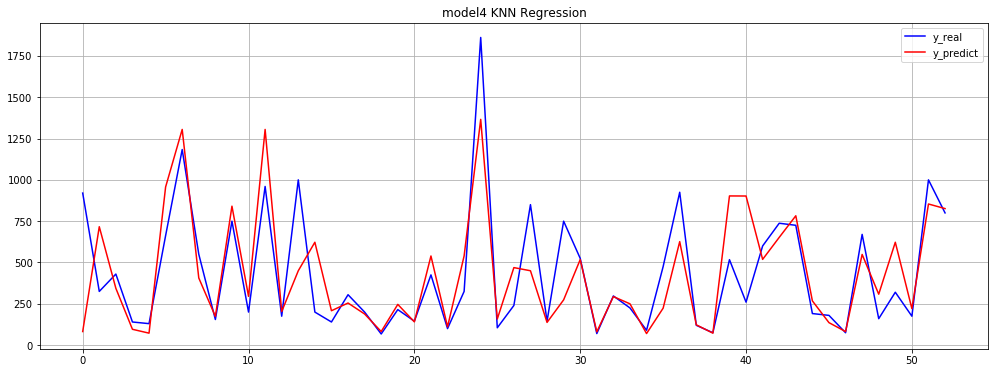

In [94]:
from sklearn.metrics import r2_score

y_pred = y_pred_model4
y_test = y_test
model = 'model4 KNN Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [81]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model4.mean(),
                                             'Median of AbsErrors' : abs_err_model4.median(),
                                             'SD of AbsErrors' :     abs_err_model4.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model4),
                                             'Min of AbsErrors':     abs_err_model4.min(),
                                             'Max of AbsErrors':     abs_err_model4.max()}, index = ['Model4: KNN Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression         223.148958           158.574170   
Model2: Ridge Regression          226.441674           151.029550   
Model3: Lasso Regression          235.833326           142.116905   
Model4: KNN Regression            160.407478            81.167175   

                           SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression       198.785517        216.725217   
Model2: Ridge Regression        293.532084        136.707544   
Model3: Lasso Regression        324.730397        156.625954   
Model4: KNN Regression          190.775927        226.393202   

                           Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression          3.569232       1047.957143  
Model2: Ridge Regression           7.679097       1897.768941  
Model3: Lasso Regression           3.744212       2181.596147  
Model4: KNN Regression             2.543116        837.841616

In [82]:
from sklearn.model_selection import cross_val_score
n_neighbors = np.arange(1, 20)
cv = 4
cvscores = np.empty((len(n_neighbors), 2))
counter = -1
for k in n_neighbors:
    counter += 1
    knn = KNeighborsRegressor(n_neighbors = k, metric = 'minkowski', p = 2)
    cvscores[counter, :] = np.array([k, np.mean(cross_val_score(knn, X_train, y_train, cv = cv))])
    
cvscores[np.argmax(cvscores[:, 1]), :]

array([3.        , 0.40149674])

### Model5: Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor
model5 = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 13, ccp_alpha = 0.0001)
model5.fit(X_train, logy_train)
y_pred_model5 = model5.predict(X_test)
y_pred_model5 = np.exp(y_pred_model5)
abs_err_model5 = np.abs(y_pred_model5 - y_test)


In [96]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(1, 20, num = 15)]
min_samples_leaf = np.arange(15)
ccp_alpha = [0.001, 0.01, 0.1, 0.0001]
objective = ['reg:squarederror']

random_grid = {'max_depth': max_depth, 
               'min_samples_leaf': min_samples_leaf, 
               'ccp_alpha': ccp_alpha}

decision = RandomizedSearchCV(estimator = model5, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 8, random_state = 40, n_jobs = 1)
decision.fit(X_train, logy_train)
decision.best_params_

{'min_samples_leaf': 13, 'max_depth': 15, 'ccp_alpha': 0.0001}

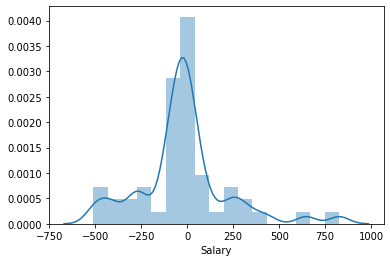

In [102]:
sns.distplot(y_test - y_pred_model5)

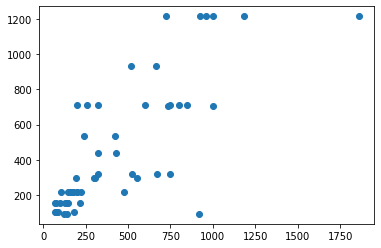

In [104]:
plt.scatter(y_test , y_pred_model5)

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model5)))

MAE: 162.98927180254597
MSE: 60272.36069438864
RMSE: 245.50429872894006


<Figure size 2250x2250 with 0 Axes>

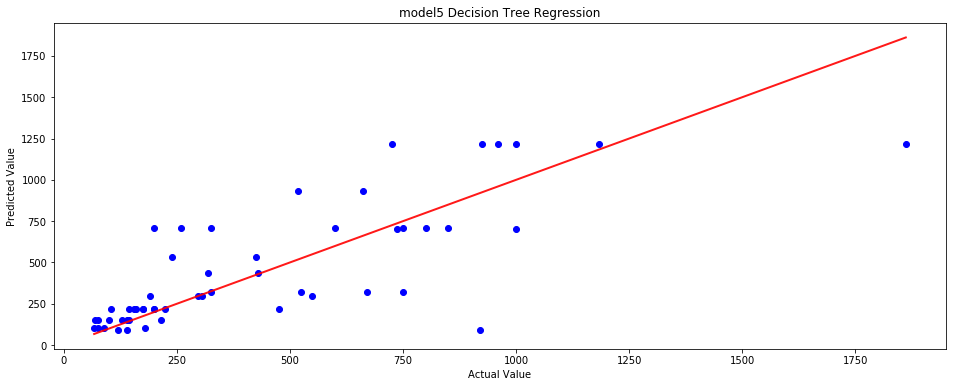

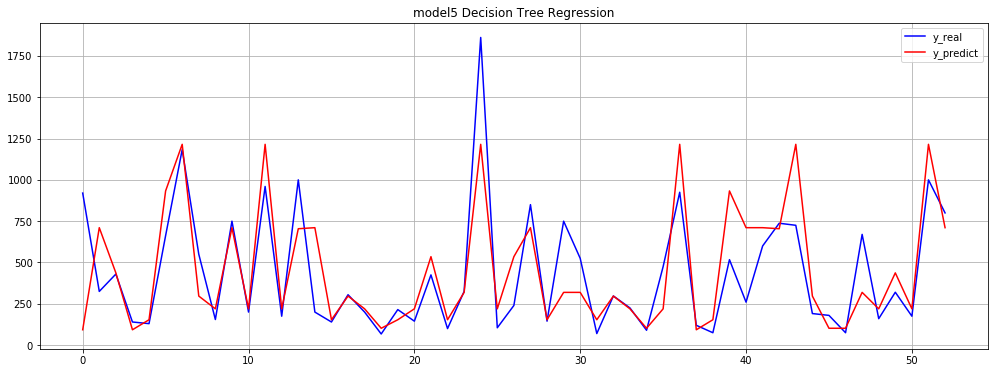

In [106]:
from sklearn.metrics import r2_score

y_pred = y_pred_model5
y_test = y_test
model = 'model5 Decision Tree Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [107]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model5.mean(),
                                             'Median of AbsErrors' : abs_err_model5.median(),
                                             'SD of AbsErrors' :     abs_err_model5.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model5),
                                             'Min of AbsErrors':     abs_err_model5.min(),
                                             'Max of AbsErrors':     abs_err_model5.max()}, index = ['Model5: Decision Tree Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                223.148958           158.574170   
Model2: Ridge Regression                 226.441674           151.029550   
Model3: Lasso Regression                 235.833326           142.116905   
Model4: KNN Regression                   160.407478            81.167175   
Model5: Decision Tree Regression         162.989272            78.558773   

                                  SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression              198.785517        216.725217   
Model2: Ridge Regression               293.532084        136.707544   
Model3: Lasso Regression               324.730397        156.625954   
Model4: KNN Regression                 190.775927        226.393202   
Model5: Decision Tree Regression       185.351198        223.772135   

                                  Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                 3.569232       1047.957143  
Model2: Ridge Regression                  7.679097       1897.768941  
Model3: Lasso Regression                  3.744212       2181.596147  
Model4: KNN Regression                    2.543116        837.841616  
Model5: Decision Tree Regression          0.769051        827.083624

### Model6: Bagging

In [109]:
from sklearn.ensemble import BaggingRegressor
model6 = BaggingRegressor(n_estimators = 500, oob_score = True)
model6.fit(X_train, logy_train)
y_pred_model6 = model6.predict(X_test)
y_pred_model6 = np.exp(y_pred_model6)
abs_err_model6 = np.abs(y_pred_model6 - y_test)

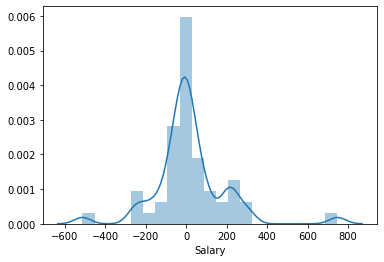

In [110]:
sns.distplot(y_test - y_pred_model6)

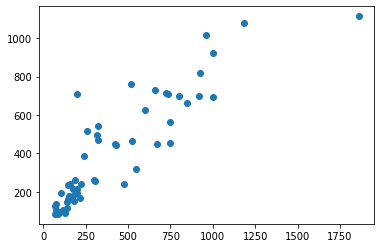

In [111]:
plt.scatter(y_test , y_pred_model6)

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model6)))

MAE: 110.54863249556075
MSE: 30671.64508166156
RMSE: 175.13322095382577


<Figure size 2250x2250 with 0 Axes>

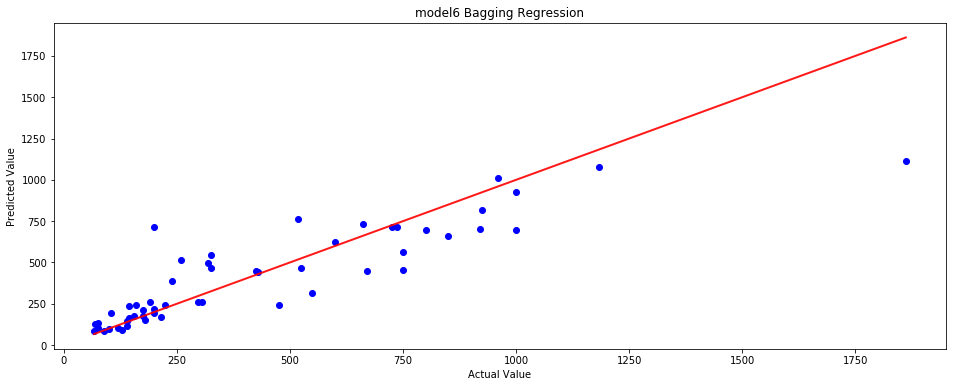

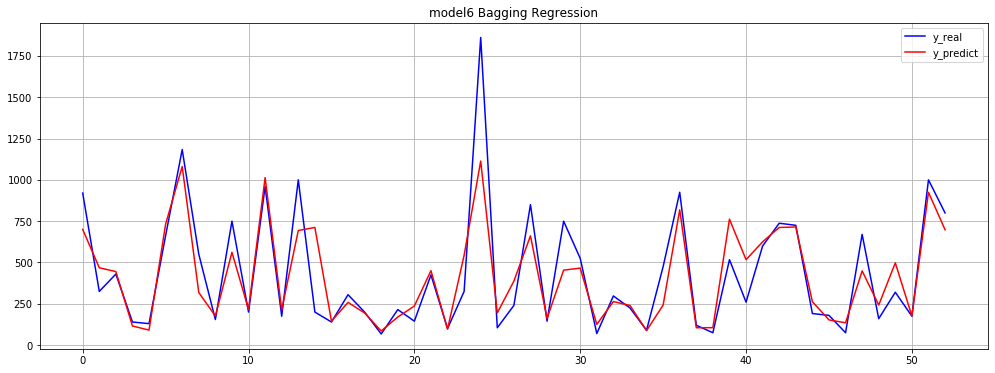

In [113]:
from sklearn.metrics import r2_score

y_pred = y_pred_model6
y_test = y_test
model = 'model6 Bagging Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [114]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model6.mean(),
                                             'Median of AbsErrors' : abs_err_model6.median(),
                                             'SD of AbsErrors' :     abs_err_model6.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model6),
                                             'Min of AbsErrors':     abs_err_model6.min(),
                                             'Max of AbsErrors':     abs_err_model6.max()}, index = ['Model6: Bagging Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                223.148958           158.574170   
Model2: Ridge Regression                 226.441674           151.029550   
Model3: Lasso Regression                 235.833326           142.116905   
Model4: KNN Regression                   160.407478            81.167175   
Model5: Decision Tree Regression         162.989272            78.558773   
Model6: Bagging Regression               110.548632            58.805452   

                                  SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression              198.785517        216.725217   
Model2: Ridge Regression               293.532084        136.707544   
Model3: Lasso Regression               324.730397        156.625954   
Model4: KNN Regression                 190.775927        226.393202   
Model5: Decision Tree Regression       185.351198        223.772135   
Model6: Bagging Regression             137.133019        153.685308   

                                  Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                 3.569232       1047.957143  
Model2: Ridge Regression                  7.679097       1897.768941  
Model3: Lasso Regression                  3.744212       2181.596147  
Model4: KNN Regression                    2.543116        837.841616  
Model5: Decision Tree Regression          0.769051        827.083624  
Model6: Bagging Regression                1.442460        747.780147

### Model7: Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor
model7 = RandomForestRegressor(n_estimators = 246,
                               oob_score = True, 
                               max_features = 'sqrt', 
                               max_depth = 26, 
                               min_samples_split = 20, 
                               min_samples_leaf = 1)

model7.fit(X_train, logy_train)
y_pred_model7 = model7.predict(X_test)
y_pred_model7 = np.exp(y_pred_model7)
abs_err_model7 = np.abs(y_pred_model7 - y_test)


In [117]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 40)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_samples_split = [2, 5, 10, 15, 20,25,30,35,40,100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = model7, 
                               param_distributions = random_grid, 
                               scoring='neg_mean_squared_error',
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

rf_random.fit(X_train, logy_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   3.0s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   3.0s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   3.4s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   3.1s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   3.3s
[CV] n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=   2.4s
[CV] n_estimators=1074, min_sam

[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=   2.3s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=   2.2s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=   2.2s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=   2.2s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 
[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=   2.1s
[CV] n_estimators=246, min_samples_split=20

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


{'n_estimators': 246,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 26}

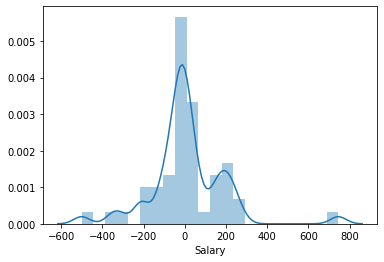

In [120]:
sns.distplot(y_test - y_pred_model7)

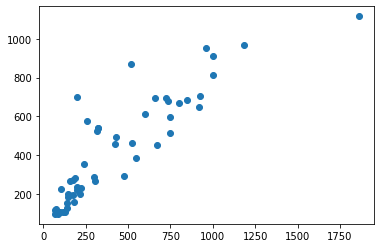

In [121]:
plt.scatter(y_test , y_pred_model7)

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model7))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model7)))

MAE: 115.34020989850781
MSE: 31939.059849376987
RMSE: 178.71502412885434


<Figure size 2250x2250 with 0 Axes>

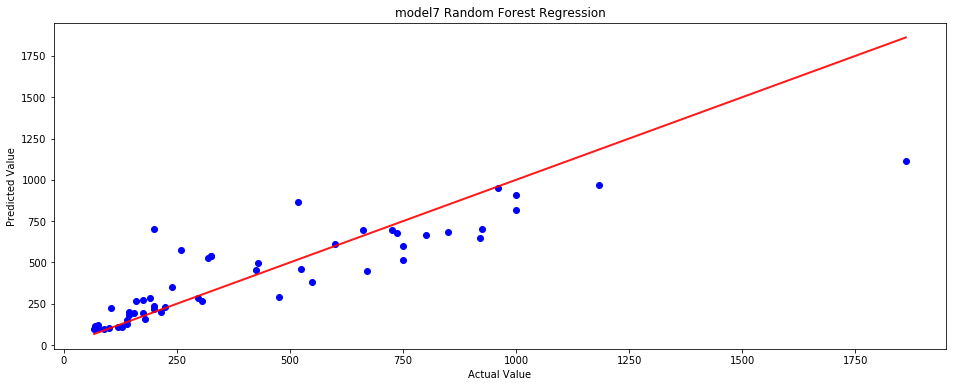

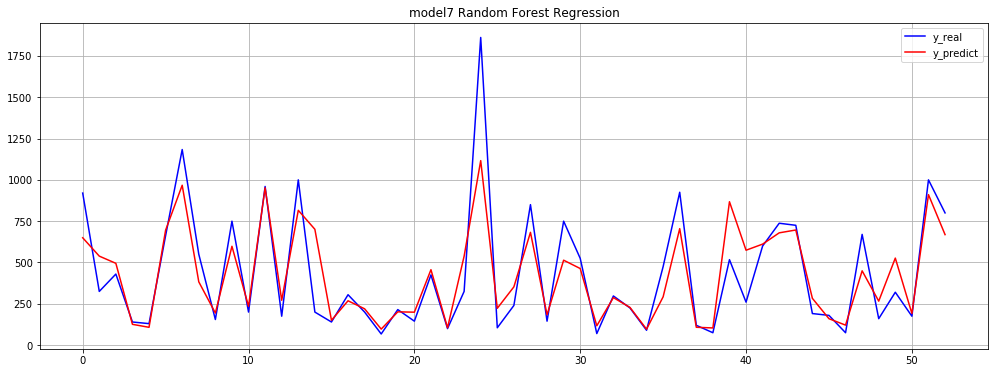

In [123]:
from sklearn.metrics import r2_score

y_pred = y_pred_model7
y_test = y_test
model = 'model7 Random Forest Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [124]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model7.mean(),
                                             'Median of AbsErrors' : abs_err_model7.median(),
                                             'SD of AbsErrors' :     abs_err_model7.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model7),
                                             'Min of AbsErrors':     abs_err_model7.min(),
                                             'Max of AbsErrors':     abs_err_model7.max()}, index = ['Model7: Random Forest Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                223.148958           158.574170   
Model2: Ridge Regression                 226.441674           151.029550   
Model3: Lasso Regression                 235.833326           142.116905   
Model4: KNN Regression                   160.407478            81.167175   
Model5: Decision Tree Regression         162.989272            78.558773   
Model6: Bagging Regression               110.548632            58.805452   
Model7: Random Forest Regression         115.340210            58.109284   

                                  SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression              198.785517        216.725217   
Model2: Ridge Regression               293.532084        136.707544   
Model3: Lasso Regression               324.730397        156.625954   
Model4: KNN Regression                 190.775927        226.393202   
Model5: Decision Tree Regression       185.351198        223.772135   
Model6: Bagging Regression             137.133019        153.685308   
Model7: Random Forest Regression       137.818992        160.515046   

                                  Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                 3.569232       1047.957143  
Model2: Ridge Regression                  7.679097       1897.768941  
Model3: Lasso Regression                  3.744212       2181.596147  
Model4: KNN Regression                    2.543116        837.841616  
Model5: Decision Tree Regression          0.769051        827.083624  
Model6: Bagging Regression                1.442460        747.780147  
Model7: Random Forest Regression          3.225445        745.132697

### Model8: Gradient Boost Regression

In [ ]:
{'subsample': 1,
 'n_estimators': 1000,
 'min_samples_leaf': 3,
 'max_depth': 6,
 'learning_rate': 0.2}

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
model8 = GradientBoostingRegressor(learning_rate = 0.2, 
                                   max_depth = 6, 
                                   min_samples_leaf = 3, 
                                   n_estimators = 1000, 
                                   subsample = 1)

model8.fit(X_train, logy_train)
y_pred_model8 = model8.predict(X_test)
y_pred_model8 = np.exp(y_pred_model8)
abs_err_model8 = np.abs(y_pred_model8 - y_test)

In [127]:
from sklearn.model_selection import RandomizedSearchCV

learning_rate = [0.01,0.1, 0.2, 0.3, 0.4, 0.5]
n_estimators = [500, 600, 700, 800, 900, 1000, 1100, 1200]
subsample = [1, 2, 3, 4]
max_depth = [2, 3, 4, 5, 6, 7]
min_samples_leaf = [3, 4, 5, 6, 7, 8]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf, 
               'learning_rate':learning_rate, 
                'subsample': subsample}

rf_random = RandomizedSearchCV(estimator = model8, 
                               param_distributions = random_grid, 
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

rf_random.fit(X_train, logy_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01, total=   1.7s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01, total=   1.6s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01, total=   1.5s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01, total=   1.4s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=5, max_depth=6, learning_rate=0.01, total=   1.4s
[CV] subsample=3, n_estimators=800, min_samples_leaf=3, max_depth=6, learning_rate=0.4 
[CV]  subsample=3, n_estimators=800, min_samples_leaf=3, max_depth=6, learning_rate=0.4, total=   0.0s
[CV] subsample=3, n_estimators=800, min_samples_leaf=3, max_depth=6, learning_rate=0.4 
[CV]  subsample=3, n_estimators

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: subsample must be in (0,1] but was 3

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: subsample must be in (0,1] but was 3

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: subsample must be in (0,1] but was 3

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

[CV]  subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3, total=   0.5s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3, total=   0.4s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3, total=   0.4s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3, total=   0.4s
[CV] subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3 
[CV]  subsample=1, n_estimators=1200, min_samples_leaf=6, max_depth=3, learning_rate=0.3, total=   0.4s
[CV] subsample=1, n_estimators=1000, min_samples_leaf=3, max_depth=6, learning_rate=0.2 
[CV]  subsample=1, n_estimators=100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: subsample must be in (0,1] but was 3

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: subsample must be in (0,1] but was 3

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: subsample must be in (0,1] but was 3

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

{'subsample': 1,
 'n_estimators': 1000,
 'min_samples_leaf': 3,
 'max_depth': 6,
 'learning_rate': 0.2}

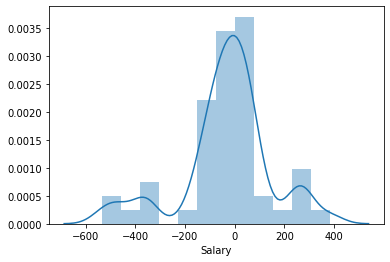

In [129]:
sns.distplot(y_test - y_pred_model8)

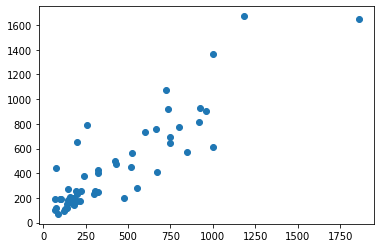

In [130]:
plt.scatter(y_test , y_pred_model8)

In [131]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model8))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model8))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model8)))

MAE: 126.72254202286322
MSE: 34419.81162336832
RMSE: 185.52577077960981


<Figure size 2250x2250 with 0 Axes>

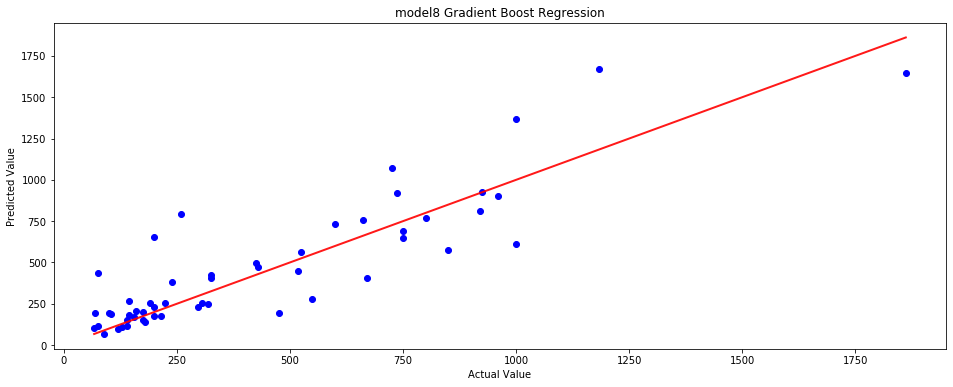

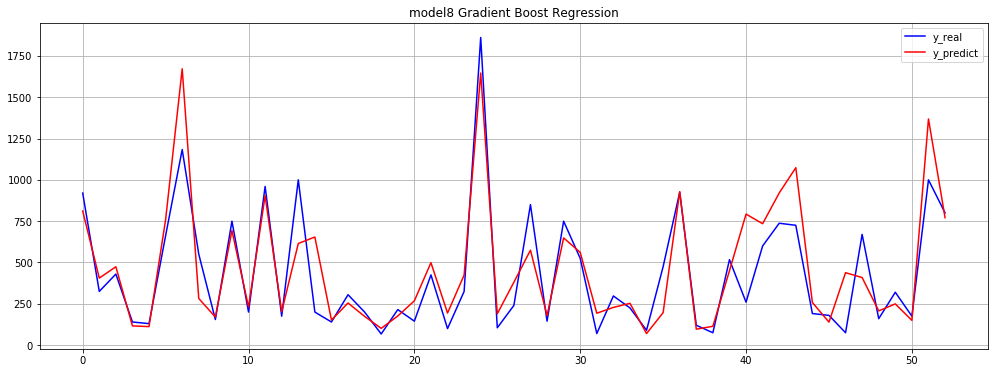

In [132]:
from sklearn.metrics import r2_score

y_pred = y_pred_model8
y_test = y_test
model = 'model8 Gradient Boost Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [133]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model8.mean(),
                                             'Median of AbsErrors' : abs_err_model8.median(),
                                             'SD of AbsErrors' :     abs_err_model8.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model8),
                                             'Min of AbsErrors':     abs_err_model8.min(),
                                             'Max of AbsErrors':     abs_err_model8.max()}, index = ['Model8: Gradient Boost Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                 223.148958           158.574170   
Model2: Ridge Regression                  226.441674           151.029550   
Model3: Lasso Regression                  235.833326           142.116905   
Model4: KNN Regression                    160.407478            81.167175   
Model5: Decision Tree Regression          162.989272            78.558773   
Model6: Bagging Regression                110.548632            58.805452   
Model7: Random Forest Regression          115.340210            58.109284   
Model8: Gradient Boost Regression         126.722542            69.261401   

                                   SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression               198.785517        216.725217   
Model2: Ridge Regression                293.532084        136.707544   
Model3: Lasso Regression                324.730397        156.625954   
Model4: KNN Regression                  190.775927        226.393202   
Model5: Decision Tree Regression        185.351198        223.772135   
Model6: Bagging Regression              137.133019        153.685308   
Model7: Random Forest Regression        137.818992        160.515046   
Model8: Gradient Boost Regression       136.800253        106.438768   

                                   Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                  3.569232       1047.957143  
Model2: Ridge Regression                   7.679097       1897.768941  
Model3: Lasso Regression                   3.744212       2181.596147  
Model4: KNN Regression                     2.543116        837.841616  
Model5: Decision Tree Regression           0.769051        827.083624  
Model6: Bagging Regression                 1.442460        747.780147  
Model7: Random Forest Regression           3.225445        745.132697  
Model8: Gradient Boost Regression          3.763734        532.900731

### Model9: XGBoost 

In [135]:
from xgboost import XGBRegressor
from scipy.stats import uniform, randint


In [ ]:
{'gamma': 0.19993048585762774,
 'learning_rate': 0.04399969896408463,
 'max_depth': 5,
 'n_estimators': 115,
 'subsample': 0.6931085361721216}

In [167]:
model9 = XGBRegressor(gamma = 0.19993048585762774, 
                      learning_rate = 0.04399969896408463, 
                      max_depth = 5, 
                      n_estimators = 115, 
                      subsample = 0.6931085361721216, 
                      colsample_bytree = 0.39, 
                      reg_alpha = 0.07, 
                      reg_lambda = 0.055)
model9.fit(X_train, logy_train)
y_pred_model9 = model9.predict(X_test)
y_pred_model9 = np.exp(y_pred_model9)
abs_err_model9 = np.abs(y_pred_model9 - y_test)

In [166]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

xgb = RandomizedSearchCV(estimator = model9, 
                         param_distributions = params,
                         scoring='neg_mean_squared_error',
                         n_iter = 10, 
                         cv = 5, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs = 1)

xgb.fit(X_train, logy_train)
xgb.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.076798356100860

[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282, total=   0.1s
[CV] gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282 
[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282, total=   0.1s
[CV] gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411 
[CV]  gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411, total=   0.1s
[CV] gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411 
[CV]  gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411, total=   0.1s
[CV] gamma=0.34015376929388985, learning_rate=0.16

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.0s finished


{'gamma': 0.19993048585762774,
 'learning_rate': 0.04399969896408463,
 'max_depth': 5,
 'n_estimators': 115,
 'subsample': 0.6931085361721216}

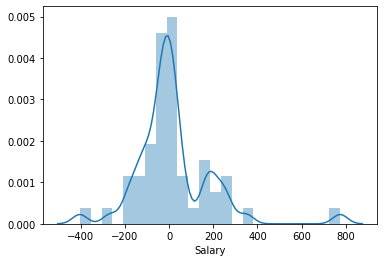

In [168]:
sns.distplot(y_test - y_pred_model9)

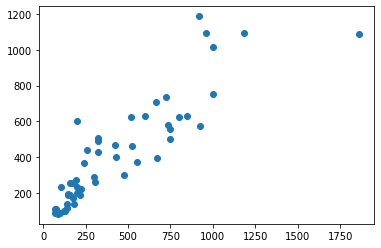

In [169]:
plt.scatter(y_test , y_pred_model9)

In [170]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model9))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model9))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model9)))

MAE: 111.02415132342644
MSE: 29909.376834659353
RMSE: 172.94327634996208


<Figure size 2250x2250 with 0 Axes>

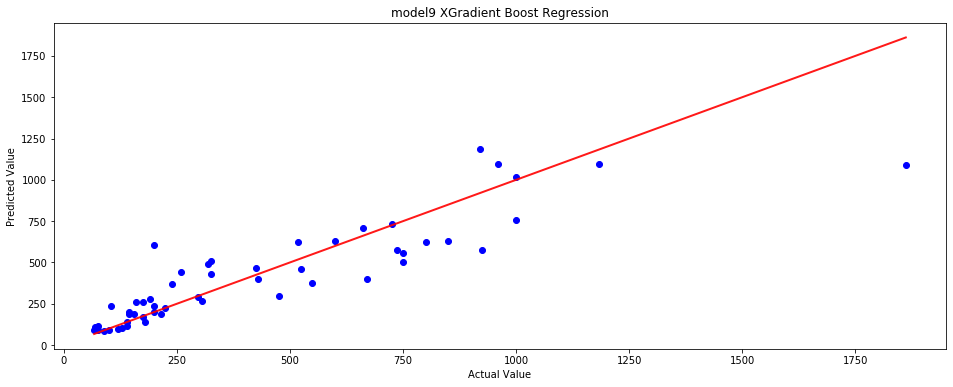

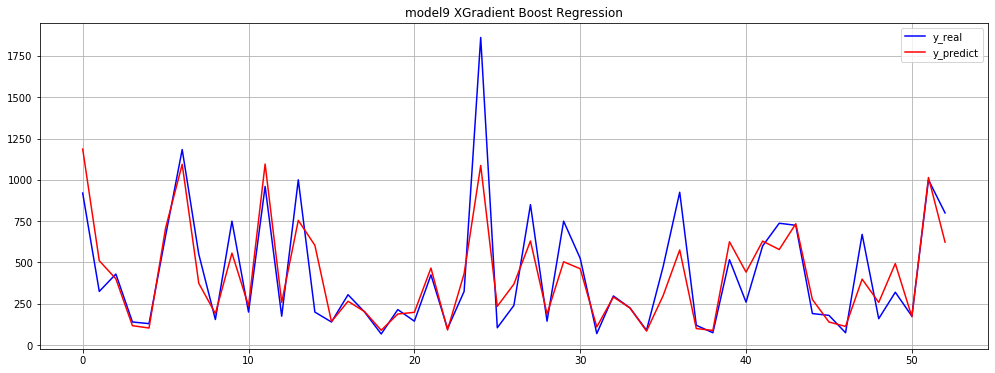

In [171]:
from sklearn.metrics import r2_score

y_pred = y_pred_model9
y_test = y_test
model = 'model9 XGradient Boost Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [175]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model9.mean(),
                                             'Median of AbsErrors' : abs_err_model9.median(),
                                             'SD of AbsErrors' :     abs_err_model9.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model9),
                                             'Min of AbsErrors':     abs_err_model9.min(),
                                             'Max of AbsErrors':     abs_err_model9.max()}, index = ['Model9: XGradient Boost Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                  223.148958           158.574170   
Model2: Ridge Regression                   226.441674           151.029550   
Model3: Lasso Regression                   235.833326           142.116905   
Model4: KNN Regression                     160.407478            81.167175   
Model5: Decision Tree Regression           162.989272            78.558773   
Model6: Bagging Regression                 110.548632            58.805452   
Model7: Random Forest Regression           115.340210            58.109284   
Model8: Gradient Boost Regression          126.722542            69.261401   
Model9: XGradient Boost Regression         111.024151            53.490540   

                                    SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression                198.785517        216.725217   
Model2: Ridge Regression                 293.532084        136.707544   
Model3: Lasso Regression                 324.730397        156.625954   
Model4: KNN Regression                   190.775927        226.393202   
Model5: Decision Tree Regression         185.351198        223.772135   
Model6: Bagging Regression               137.133019        153.685308   
Model7: Random Forest Regression         137.818992        160.515046   
Model8: Gradient Boost Regression        136.800253        106.438768   
Model9: XGradient Boost Regression       133.869898        149.096519   

                                    Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                   3.569232       1047.957143  
Model2: Ridge Regression                    7.679097       1897.768941  
Model3: Lasso Regression                    3.744212       2181.596147  
Model4: KNN Regression                      2.543116        837.841616  
Model5: Decision Tree Regression            0.769051        827.083624  
Model6: Bagging Regression                  1.442460        747.780147  
Model7: Random Forest Regression            3.225445        745.132697  
Model8: Gradient Boost Regression           3.763734        532.900731  
Model9: XGradient Boost Regression          0.053513        774.368569

### Model10: CatBoost 

In [178]:
from catboost import CatBoostRegressor
model10 = CatBoostRegressor(learning_rate = 0.03, 
                            l2_leaf_reg = 5, 
                            depth = 10)
model10.fit(X_train, logy_train)
y_pred_model10 = model10.predict(X_test)
y_pred_model10 = np.exp(y_pred_model10)
abs_err_model10 = np.abs(y_pred_model10 - y_test)

0:	learn: 0.8750760	total: 39.3ms	remaining: 39.2s
1:	learn: 0.8643972	total: 75.4ms	remaining: 37.6s
2:	learn: 0.8520523	total: 77.8ms	remaining: 25.8s
3:	learn: 0.8397552	total: 113ms	remaining: 28.2s
4:	learn: 0.8291958	total: 147ms	remaining: 29.2s
5:	learn: 0.8206806	total: 180ms	remaining: 29.8s
6:	learn: 0.8106336	total: 215ms	remaining: 30.5s
7:	learn: 0.8006362	total: 248ms	remaining: 30.8s
8:	learn: 0.7897341	total: 290ms	remaining: 31.9s
9:	learn: 0.7799669	total: 331ms	remaining: 32.8s
10:	learn: 0.7731468	total: 367ms	remaining: 33s
11:	learn: 0.7643885	total: 402ms	remaining: 33.1s
12:	learn: 0.7560253	total: 435ms	remaining: 33s
13:	learn: 0.7443825	total: 477ms	remaining: 33.6s
14:	learn: 0.7349418	total: 518ms	remaining: 34s
15:	learn: 0.7252734	total: 555ms	remaining: 34.2s
16:	learn: 0.7168656	total: 591ms	remaining: 34.1s
17:	learn: 0.7061059	total: 597ms	remaining: 32.6s
18:	learn: 0.6954862	total: 631ms	remaining: 32.6s
19:	learn: 0.6874402	total: 674ms	remaining:

166:	learn: 0.2569102	total: 5.99s	remaining: 29.9s
167:	learn: 0.2557714	total: 6.02s	remaining: 29.8s
168:	learn: 0.2547971	total: 6.05s	remaining: 29.8s
169:	learn: 0.2545746	total: 6.07s	remaining: 29.6s
170:	learn: 0.2540738	total: 6.07s	remaining: 29.4s
171:	learn: 0.2529312	total: 6.11s	remaining: 29.4s
172:	learn: 0.2524339	total: 6.14s	remaining: 29.4s
173:	learn: 0.2512250	total: 6.18s	remaining: 29.4s
174:	learn: 0.2502842	total: 6.22s	remaining: 29.3s
175:	learn: 0.2492699	total: 6.25s	remaining: 29.3s
176:	learn: 0.2491706	total: 6.25s	remaining: 29.1s
177:	learn: 0.2478100	total: 6.29s	remaining: 29s
178:	learn: 0.2473765	total: 6.32s	remaining: 29s
179:	learn: 0.2468288	total: 6.35s	remaining: 28.9s
180:	learn: 0.2458813	total: 6.39s	remaining: 28.9s
181:	learn: 0.2447646	total: 6.43s	remaining: 28.9s
182:	learn: 0.2436762	total: 6.46s	remaining: 28.9s
183:	learn: 0.2424028	total: 6.5s	remaining: 28.8s
184:	learn: 0.2415601	total: 6.53s	remaining: 28.8s
185:	learn: 0.240

326:	learn: 0.1712905	total: 10.7s	remaining: 22s
327:	learn: 0.1706597	total: 10.7s	remaining: 22s
328:	learn: 0.1699347	total: 10.8s	remaining: 22s
329:	learn: 0.1694866	total: 10.8s	remaining: 22s
330:	learn: 0.1686508	total: 10.9s	remaining: 22s
331:	learn: 0.1679413	total: 10.9s	remaining: 21.9s
332:	learn: 0.1676132	total: 10.9s	remaining: 21.8s
333:	learn: 0.1669020	total: 10.9s	remaining: 21.8s
334:	learn: 0.1660798	total: 11s	remaining: 21.8s
335:	learn: 0.1653220	total: 11s	remaining: 21.8s
336:	learn: 0.1647023	total: 11.1s	remaining: 21.8s
337:	learn: 0.1645185	total: 11.1s	remaining: 21.7s
338:	learn: 0.1637570	total: 11.1s	remaining: 21.7s
339:	learn: 0.1631172	total: 11.1s	remaining: 21.6s
340:	learn: 0.1629733	total: 11.2s	remaining: 21.6s
341:	learn: 0.1628693	total: 11.2s	remaining: 21.5s
342:	learn: 0.1622689	total: 11.2s	remaining: 21.5s
343:	learn: 0.1621217	total: 11.2s	remaining: 21.4s
344:	learn: 0.1620094	total: 11.2s	remaining: 21.3s
345:	learn: 0.1618864	tota

485:	learn: 0.1122937	total: 16.2s	remaining: 17.2s
486:	learn: 0.1120142	total: 16.3s	remaining: 17.1s
487:	learn: 0.1118802	total: 16.3s	remaining: 17.1s
488:	learn: 0.1117188	total: 16.4s	remaining: 17.1s
489:	learn: 0.1112310	total: 16.4s	remaining: 17.1s
490:	learn: 0.1108007	total: 16.5s	remaining: 17.1s
491:	learn: 0.1104245	total: 16.5s	remaining: 17.1s
492:	learn: 0.1103613	total: 16.5s	remaining: 17s
493:	learn: 0.1099010	total: 16.6s	remaining: 17s
494:	learn: 0.1094819	total: 16.6s	remaining: 16.9s
495:	learn: 0.1092390	total: 16.7s	remaining: 17s
496:	learn: 0.1089120	total: 16.8s	remaining: 17s
497:	learn: 0.1088212	total: 16.8s	remaining: 16.9s
498:	learn: 0.1084561	total: 16.9s	remaining: 16.9s
499:	learn: 0.1079866	total: 16.9s	remaining: 16.9s
500:	learn: 0.1076408	total: 17s	remaining: 16.9s
501:	learn: 0.1071295	total: 17s	remaining: 16.9s
502:	learn: 0.1066380	total: 17.1s	remaining: 16.9s
503:	learn: 0.1062108	total: 17.1s	remaining: 16.8s
504:	learn: 0.1056986	to

646:	learn: 0.0692153	total: 23.2s	remaining: 12.7s
647:	learn: 0.0691842	total: 23.3s	remaining: 12.6s
648:	learn: 0.0689416	total: 23.3s	remaining: 12.6s
649:	learn: 0.0686918	total: 23.3s	remaining: 12.6s
650:	learn: 0.0683341	total: 23.4s	remaining: 12.5s
651:	learn: 0.0683096	total: 23.4s	remaining: 12.5s
652:	learn: 0.0681435	total: 23.5s	remaining: 12.5s
653:	learn: 0.0679447	total: 23.5s	remaining: 12.4s
654:	learn: 0.0678459	total: 23.5s	remaining: 12.4s
655:	learn: 0.0675211	total: 23.6s	remaining: 12.4s
656:	learn: 0.0672620	total: 23.6s	remaining: 12.3s
657:	learn: 0.0670614	total: 23.7s	remaining: 12.3s
658:	learn: 0.0667752	total: 23.7s	remaining: 12.3s
659:	learn: 0.0664913	total: 23.7s	remaining: 12.2s
660:	learn: 0.0662406	total: 23.8s	remaining: 12.2s
661:	learn: 0.0660367	total: 23.8s	remaining: 12.2s
662:	learn: 0.0657920	total: 23.8s	remaining: 12.1s
663:	learn: 0.0657046	total: 23.9s	remaining: 12.1s
664:	learn: 0.0655199	total: 23.9s	remaining: 12.1s
665:	learn: 

805:	learn: 0.0428746	total: 29.2s	remaining: 7.04s
806:	learn: 0.0427535	total: 29.3s	remaining: 7s
807:	learn: 0.0425923	total: 29.3s	remaining: 6.97s
808:	learn: 0.0424707	total: 29.4s	remaining: 6.93s
809:	learn: 0.0423800	total: 29.4s	remaining: 6.89s
810:	learn: 0.0423543	total: 29.4s	remaining: 6.86s
811:	learn: 0.0423388	total: 29.5s	remaining: 6.82s
812:	learn: 0.0423155	total: 29.5s	remaining: 6.79s
813:	learn: 0.0421462	total: 29.5s	remaining: 6.75s
814:	learn: 0.0420161	total: 29.6s	remaining: 6.71s
815:	learn: 0.0418758	total: 29.6s	remaining: 6.68s
816:	learn: 0.0417147	total: 29.7s	remaining: 6.64s
817:	learn: 0.0415578	total: 29.7s	remaining: 6.61s
818:	learn: 0.0414170	total: 29.7s	remaining: 6.57s
819:	learn: 0.0412840	total: 29.8s	remaining: 6.53s
820:	learn: 0.0411712	total: 29.8s	remaining: 6.5s
821:	learn: 0.0411403	total: 29.8s	remaining: 6.46s
822:	learn: 0.0409866	total: 29.9s	remaining: 6.43s
823:	learn: 0.0409209	total: 29.9s	remaining: 6.39s
824:	learn: 0.04

965:	learn: 0.0270304	total: 36.2s	remaining: 1.27s
966:	learn: 0.0269436	total: 36.2s	remaining: 1.24s
967:	learn: 0.0268463	total: 36.2s	remaining: 1.2s
968:	learn: 0.0267640	total: 36.3s	remaining: 1.16s
969:	learn: 0.0266819	total: 36.4s	remaining: 1.12s
970:	learn: 0.0265521	total: 36.4s	remaining: 1.09s
971:	learn: 0.0265015	total: 36.4s	remaining: 1.05s
972:	learn: 0.0264072	total: 36.5s	remaining: 1.01s
973:	learn: 0.0262986	total: 36.5s	remaining: 975ms
974:	learn: 0.0262689	total: 36.6s	remaining: 938ms
975:	learn: 0.0261658	total: 36.6s	remaining: 900ms
976:	learn: 0.0261404	total: 36.6s	remaining: 862ms
977:	learn: 0.0260643	total: 36.7s	remaining: 825ms
978:	learn: 0.0259961	total: 36.7s	remaining: 787ms
979:	learn: 0.0259324	total: 36.8s	remaining: 750ms
980:	learn: 0.0258206	total: 36.8s	remaining: 713ms
981:	learn: 0.0258131	total: 36.8s	remaining: 675ms
982:	learn: 0.0257427	total: 36.9s	remaining: 638ms
983:	learn: 0.0256542	total: 36.9s	remaining: 600ms
984:	learn: 0

In [177]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

cb = RandomizedSearchCV(estimator = model10, 
                        param_distributions = grid,
                        scoring='neg_mean_squared_error',
                        n_iter = 10, 
                        cv = 5, 
                        verbose=2, 
                        random_state=42, 
                        n_jobs = 1)

cb.fit(X_train,logy_train)
cb.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.8709304	total: 164ms	remaining: 2m 43s
1:	learn: 0.8429540	total: 192ms	remaining: 1m 35s
2:	learn: 0.8214406	total: 220ms	remaining: 1m 12s
3:	learn: 0.8038539	total: 254ms	remaining: 1m 3s
4:	learn: 0.7729098	total: 285ms	remaining: 56.7s
5:	learn: 0.7525186	total: 318ms	remaining: 52.6s
6:	learn: 0.7333868	total: 352ms	remaining: 50s
7:	learn: 0.7044704	total: 392ms	remaining: 48.6s
8:	learn: 0.6854482	total: 426ms	remaining: 46.9s
9:	learn: 0.6655584	total: 434ms	remaining: 43s
10:	learn: 0.6393700	total: 467ms	remaining: 42s
11:	learn: 0.6225105	total: 500ms	remaining: 41.2s
12:	learn: 0.6070492	total: 538ms	remaining: 40.8s
13:	learn: 0.5868217	total: 555ms	remaining: 39.1s
14:	learn: 0.5712021	total: 584ms	remaining: 38.4s
15:	learn: 0.5561246	total: 621ms	remaining: 38.2s
16:	learn: 0.5414002	total: 653ms	remaining: 37.8s
17:	learn: 0.5254315	total: 681ms	remaining: 37.2s
18:	learn: 0.5138051	total: 711ms	remaining: 36.7s
19:	learn: 0.4984130	total: 740ms	remaining:

164:	learn: 0.1319014	total: 4.41s	remaining: 22.3s
165:	learn: 0.1307786	total: 4.44s	remaining: 22.3s
166:	learn: 0.1305590	total: 4.47s	remaining: 22.3s
167:	learn: 0.1294152	total: 4.5s	remaining: 22.3s
168:	learn: 0.1290513	total: 4.51s	remaining: 22.2s
169:	learn: 0.1276737	total: 4.54s	remaining: 22.2s
170:	learn: 0.1261026	total: 4.57s	remaining: 22.2s
171:	learn: 0.1252761	total: 4.61s	remaining: 22.2s
172:	learn: 0.1248523	total: 4.64s	remaining: 22.2s
173:	learn: 0.1237228	total: 4.66s	remaining: 22.1s
174:	learn: 0.1231331	total: 4.67s	remaining: 22s
175:	learn: 0.1229354	total: 4.68s	remaining: 21.9s
176:	learn: 0.1217929	total: 4.71s	remaining: 21.9s
177:	learn: 0.1203954	total: 4.74s	remaining: 21.9s
178:	learn: 0.1200494	total: 4.77s	remaining: 21.9s
179:	learn: 0.1196850	total: 4.8s	remaining: 21.9s
180:	learn: 0.1193141	total: 4.8s	remaining: 21.7s
181:	learn: 0.1183891	total: 4.83s	remaining: 21.7s
182:	learn: 0.1171774	total: 4.86s	remaining: 21.7s
183:	learn: 0.116

323:	learn: 0.0409100	total: 8.92s	remaining: 18.6s
324:	learn: 0.0404597	total: 8.95s	remaining: 18.6s
325:	learn: 0.0402862	total: 8.98s	remaining: 18.6s
326:	learn: 0.0397324	total: 9.01s	remaining: 18.5s
327:	learn: 0.0392598	total: 9.04s	remaining: 18.5s
328:	learn: 0.0389463	total: 9.06s	remaining: 18.5s
329:	learn: 0.0387080	total: 9.1s	remaining: 18.5s
330:	learn: 0.0383061	total: 9.13s	remaining: 18.5s
331:	learn: 0.0380676	total: 9.16s	remaining: 18.4s
332:	learn: 0.0375775	total: 9.19s	remaining: 18.4s
333:	learn: 0.0372943	total: 9.22s	remaining: 18.4s
334:	learn: 0.0372057	total: 9.25s	remaining: 18.4s
335:	learn: 0.0370001	total: 9.28s	remaining: 18.3s
336:	learn: 0.0367005	total: 9.31s	remaining: 18.3s
337:	learn: 0.0364413	total: 9.34s	remaining: 18.3s
338:	learn: 0.0361612	total: 9.37s	remaining: 18.3s
339:	learn: 0.0356925	total: 9.4s	remaining: 18.2s
340:	learn: 0.0356366	total: 9.43s	remaining: 18.2s
341:	learn: 0.0352328	total: 9.46s	remaining: 18.2s
342:	learn: 0.

485:	learn: 0.0112430	total: 13.7s	remaining: 14.5s
486:	learn: 0.0111057	total: 13.7s	remaining: 14.4s
487:	learn: 0.0110390	total: 13.7s	remaining: 14.4s
488:	learn: 0.0109065	total: 13.8s	remaining: 14.4s
489:	learn: 0.0108681	total: 13.8s	remaining: 14.4s
490:	learn: 0.0107251	total: 13.8s	remaining: 14.3s
491:	learn: 0.0105884	total: 13.9s	remaining: 14.3s
492:	learn: 0.0104988	total: 13.9s	remaining: 14.3s
493:	learn: 0.0104179	total: 13.9s	remaining: 14.3s
494:	learn: 0.0103658	total: 14s	remaining: 14.2s
495:	learn: 0.0103427	total: 14s	remaining: 14.2s
496:	learn: 0.0102965	total: 14s	remaining: 14.2s
497:	learn: 0.0102141	total: 14.1s	remaining: 14.2s
498:	learn: 0.0101278	total: 14.1s	remaining: 14.2s
499:	learn: 0.0100982	total: 14.2s	remaining: 14.2s
500:	learn: 0.0100043	total: 14.2s	remaining: 14.1s
501:	learn: 0.0098751	total: 14.2s	remaining: 14.1s
502:	learn: 0.0097463	total: 14.3s	remaining: 14.1s
503:	learn: 0.0096556	total: 14.3s	remaining: 14.1s
504:	learn: 0.0096

648:	learn: 0.0031461	total: 19.1s	remaining: 10.3s
649:	learn: 0.0031262	total: 19.1s	remaining: 10.3s
650:	learn: 0.0030886	total: 19.2s	remaining: 10.3s
651:	learn: 0.0030526	total: 19.2s	remaining: 10.2s
652:	learn: 0.0030449	total: 19.2s	remaining: 10.2s
653:	learn: 0.0030185	total: 19.3s	remaining: 10.2s
654:	learn: 0.0029928	total: 19.3s	remaining: 10.2s
655:	learn: 0.0029626	total: 19.3s	remaining: 10.1s
656:	learn: 0.0029503	total: 19.4s	remaining: 10.1s
657:	learn: 0.0029290	total: 19.4s	remaining: 10.1s
658:	learn: 0.0028918	total: 19.4s	remaining: 10.1s
659:	learn: 0.0028711	total: 19.5s	remaining: 10s
660:	learn: 0.0028510	total: 19.5s	remaining: 10s
661:	learn: 0.0028241	total: 19.6s	remaining: 9.98s
662:	learn: 0.0028128	total: 19.6s	remaining: 9.96s
663:	learn: 0.0027783	total: 19.6s	remaining: 9.93s
664:	learn: 0.0027464	total: 19.7s	remaining: 9.91s
665:	learn: 0.0027211	total: 19.7s	remaining: 9.88s
666:	learn: 0.0027087	total: 19.7s	remaining: 9.85s
667:	learn: 0.00

810:	learn: 0.0008649	total: 24.4s	remaining: 5.68s
811:	learn: 0.0008560	total: 24.4s	remaining: 5.65s
812:	learn: 0.0008552	total: 24.4s	remaining: 5.62s
813:	learn: 0.0008424	total: 24.5s	remaining: 5.59s
814:	learn: 0.0008349	total: 24.5s	remaining: 5.56s
815:	learn: 0.0008334	total: 24.5s	remaining: 5.53s
816:	learn: 0.0008207	total: 24.5s	remaining: 5.5s
817:	learn: 0.0008130	total: 24.6s	remaining: 5.47s
818:	learn: 0.0008081	total: 24.6s	remaining: 5.44s
819:	learn: 0.0008012	total: 24.6s	remaining: 5.41s
820:	learn: 0.0007969	total: 24.7s	remaining: 5.38s
821:	learn: 0.0007935	total: 24.7s	remaining: 5.35s
822:	learn: 0.0007921	total: 24.7s	remaining: 5.32s
823:	learn: 0.0007915	total: 24.8s	remaining: 5.29s
824:	learn: 0.0007815	total: 24.8s	remaining: 5.26s
825:	learn: 0.0007758	total: 24.8s	remaining: 5.23s
826:	learn: 0.0007687	total: 24.9s	remaining: 5.2s
827:	learn: 0.0007631	total: 24.9s	remaining: 5.17s
828:	learn: 0.0007572	total: 24.9s	remaining: 5.14s
829:	learn: 0.

970:	learn: 0.0002958	total: 29.5s	remaining: 880ms
971:	learn: 0.0002924	total: 29.5s	remaining: 850ms
972:	learn: 0.0002911	total: 29.5s	remaining: 820ms
973:	learn: 0.0002902	total: 29.6s	remaining: 789ms
974:	learn: 0.0002876	total: 29.6s	remaining: 759ms
975:	learn: 0.0002858	total: 29.6s	remaining: 728ms
976:	learn: 0.0002825	total: 29.7s	remaining: 698ms
977:	learn: 0.0002793	total: 29.7s	remaining: 668ms
978:	learn: 0.0002784	total: 29.7s	remaining: 637ms
979:	learn: 0.0002775	total: 29.7s	remaining: 607ms
980:	learn: 0.0002742	total: 29.8s	remaining: 576ms
981:	learn: 0.0002713	total: 29.8s	remaining: 546ms
982:	learn: 0.0002672	total: 29.8s	remaining: 516ms
983:	learn: 0.0002649	total: 29.8s	remaining: 485ms
984:	learn: 0.0002636	total: 29.9s	remaining: 455ms
985:	learn: 0.0002613	total: 29.9s	remaining: 425ms
986:	learn: 0.0002596	total: 30s	remaining: 395ms
987:	learn: 0.0002580	total: 30s	remaining: 364ms
988:	learn: 0.0002568	total: 30s	remaining: 334ms
989:	learn: 0.0002

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.2s remaining:    0.0s


5:	learn: 0.7342663	total: 183ms	remaining: 30.3s
6:	learn: 0.7164381	total: 212ms	remaining: 30s
7:	learn: 0.6909627	total: 241ms	remaining: 29.8s
8:	learn: 0.6781460	total: 270ms	remaining: 29.7s
9:	learn: 0.6563028	total: 275ms	remaining: 27.2s
10:	learn: 0.6299659	total: 305ms	remaining: 27.5s
11:	learn: 0.6110734	total: 334ms	remaining: 27.5s
12:	learn: 0.5953495	total: 362ms	remaining: 27.5s
13:	learn: 0.5735921	total: 391ms	remaining: 27.5s
14:	learn: 0.5625728	total: 420ms	remaining: 27.6s
15:	learn: 0.5492010	total: 447ms	remaining: 27.5s
16:	learn: 0.5333479	total: 476ms	remaining: 27.5s
17:	learn: 0.5205369	total: 504ms	remaining: 27.5s
18:	learn: 0.5083307	total: 534ms	remaining: 27.5s
19:	learn: 0.4962470	total: 570ms	remaining: 27.9s
20:	learn: 0.4867359	total: 607ms	remaining: 28.3s
21:	learn: 0.4768880	total: 640ms	remaining: 28.5s
22:	learn: 0.4636716	total: 673ms	remaining: 28.6s
23:	learn: 0.4545123	total: 705ms	remaining: 28.7s
24:	learn: 0.4442850	total: 733ms	rema

168:	learn: 0.1037639	total: 4.62s	remaining: 22.7s
169:	learn: 0.1023196	total: 4.65s	remaining: 22.7s
170:	learn: 0.1013094	total: 4.67s	remaining: 22.7s
171:	learn: 0.1000637	total: 4.7s	remaining: 22.6s
172:	learn: 0.0999703	total: 4.71s	remaining: 22.5s
173:	learn: 0.0993103	total: 4.74s	remaining: 22.5s
174:	learn: 0.0991417	total: 4.77s	remaining: 22.5s
175:	learn: 0.0990133	total: 4.79s	remaining: 22.4s
176:	learn: 0.0976953	total: 4.83s	remaining: 22.5s
177:	learn: 0.0970965	total: 4.87s	remaining: 22.5s
178:	learn: 0.0969704	total: 4.88s	remaining: 22.4s
179:	learn: 0.0968480	total: 4.91s	remaining: 22.4s
180:	learn: 0.0955381	total: 4.95s	remaining: 22.4s
181:	learn: 0.0947600	total: 4.99s	remaining: 22.4s
182:	learn: 0.0935730	total: 5.02s	remaining: 22.4s
183:	learn: 0.0923084	total: 5.05s	remaining: 22.4s
184:	learn: 0.0920241	total: 5.08s	remaining: 22.4s
185:	learn: 0.0919213	total: 5.09s	remaining: 22.3s
186:	learn: 0.0918159	total: 5.12s	remaining: 22.3s
187:	learn: 0

330:	learn: 0.0302685	total: 10.1s	remaining: 20.3s
331:	learn: 0.0300638	total: 10.1s	remaining: 20.3s
332:	learn: 0.0298317	total: 10.1s	remaining: 20.3s
333:	learn: 0.0297912	total: 10.2s	remaining: 20.3s
334:	learn: 0.0293211	total: 10.2s	remaining: 20.2s
335:	learn: 0.0289313	total: 10.2s	remaining: 20.2s
336:	learn: 0.0286011	total: 10.2s	remaining: 20.2s
337:	learn: 0.0284871	total: 10.3s	remaining: 20.1s
338:	learn: 0.0284601	total: 10.3s	remaining: 20s
339:	learn: 0.0284379	total: 10.3s	remaining: 20s
340:	learn: 0.0281976	total: 10.3s	remaining: 19.9s
341:	learn: 0.0278936	total: 10.3s	remaining: 19.9s
342:	learn: 0.0275740	total: 10.4s	remaining: 19.9s
343:	learn: 0.0272993	total: 10.4s	remaining: 19.8s
344:	learn: 0.0272699	total: 10.4s	remaining: 19.8s
345:	learn: 0.0272322	total: 10.5s	remaining: 19.8s
346:	learn: 0.0270455	total: 10.5s	remaining: 19.8s
347:	learn: 0.0268640	total: 10.5s	remaining: 19.7s
348:	learn: 0.0266712	total: 10.6s	remaining: 19.7s
349:	learn: 0.02

494:	learn: 0.0087662	total: 15.4s	remaining: 15.7s
495:	learn: 0.0086537	total: 15.5s	remaining: 15.7s
496:	learn: 0.0085856	total: 15.5s	remaining: 15.7s
497:	learn: 0.0085159	total: 15.5s	remaining: 15.7s
498:	learn: 0.0084726	total: 15.6s	remaining: 15.6s
499:	learn: 0.0083899	total: 15.6s	remaining: 15.6s
500:	learn: 0.0083187	total: 15.6s	remaining: 15.6s
501:	learn: 0.0082175	total: 15.7s	remaining: 15.5s
502:	learn: 0.0081269	total: 15.7s	remaining: 15.5s
503:	learn: 0.0080322	total: 15.7s	remaining: 15.5s
504:	learn: 0.0079349	total: 15.8s	remaining: 15.5s
505:	learn: 0.0078934	total: 15.8s	remaining: 15.4s
506:	learn: 0.0078082	total: 15.9s	remaining: 15.4s
507:	learn: 0.0077092	total: 15.9s	remaining: 15.4s
508:	learn: 0.0076180	total: 15.9s	remaining: 15.4s
509:	learn: 0.0075969	total: 15.9s	remaining: 15.3s
510:	learn: 0.0075265	total: 16s	remaining: 15.3s
511:	learn: 0.0074834	total: 16s	remaining: 15.3s
512:	learn: 0.0073731	total: 16.1s	remaining: 15.2s
513:	learn: 0.00

657:	learn: 0.0022349	total: 20.8s	remaining: 10.8s
658:	learn: 0.0022218	total: 20.9s	remaining: 10.8s
659:	learn: 0.0022101	total: 20.9s	remaining: 10.8s
660:	learn: 0.0021938	total: 20.9s	remaining: 10.7s
661:	learn: 0.0021771	total: 21s	remaining: 10.7s
662:	learn: 0.0021584	total: 21s	remaining: 10.7s
663:	learn: 0.0021299	total: 21s	remaining: 10.6s
664:	learn: 0.0021158	total: 21.1s	remaining: 10.6s
665:	learn: 0.0021061	total: 21.1s	remaining: 10.6s
666:	learn: 0.0021021	total: 21.1s	remaining: 10.5s
667:	learn: 0.0020873	total: 21.2s	remaining: 10.5s
668:	learn: 0.0020728	total: 21.2s	remaining: 10.5s
669:	learn: 0.0020483	total: 21.2s	remaining: 10.4s
670:	learn: 0.0020213	total: 21.3s	remaining: 10.4s
671:	learn: 0.0019930	total: 21.3s	remaining: 10.4s
672:	learn: 0.0019749	total: 21.3s	remaining: 10.4s
673:	learn: 0.0019488	total: 21.4s	remaining: 10.3s
674:	learn: 0.0019368	total: 21.4s	remaining: 10.3s
675:	learn: 0.0019302	total: 21.4s	remaining: 10.3s
676:	learn: 0.0019

819:	learn: 0.0006004	total: 26s	remaining: 5.71s
820:	learn: 0.0005938	total: 26s	remaining: 5.68s
821:	learn: 0.0005924	total: 26.1s	remaining: 5.64s
822:	learn: 0.0005886	total: 26.1s	remaining: 5.61s
823:	learn: 0.0005874	total: 26.1s	remaining: 5.58s
824:	learn: 0.0005799	total: 26.2s	remaining: 5.55s
825:	learn: 0.0005751	total: 26.2s	remaining: 5.52s
826:	learn: 0.0005677	total: 26.2s	remaining: 5.49s
827:	learn: 0.0005656	total: 26.3s	remaining: 5.46s
828:	learn: 0.0005582	total: 26.3s	remaining: 5.42s
829:	learn: 0.0005550	total: 26.3s	remaining: 5.39s
830:	learn: 0.0005494	total: 26.4s	remaining: 5.36s
831:	learn: 0.0005444	total: 26.4s	remaining: 5.33s
832:	learn: 0.0005370	total: 26.4s	remaining: 5.3s
833:	learn: 0.0005325	total: 26.4s	remaining: 5.26s
834:	learn: 0.0005302	total: 26.5s	remaining: 5.23s
835:	learn: 0.0005259	total: 26.5s	remaining: 5.2s
836:	learn: 0.0005237	total: 26.5s	remaining: 5.17s
837:	learn: 0.0005225	total: 26.6s	remaining: 5.14s
838:	learn: 0.0005

981:	learn: 0.0001834	total: 31s	remaining: 568ms
982:	learn: 0.0001816	total: 31s	remaining: 537ms
983:	learn: 0.0001802	total: 31.1s	remaining: 505ms
984:	learn: 0.0001783	total: 31.1s	remaining: 474ms
985:	learn: 0.0001767	total: 31.1s	remaining: 442ms
986:	learn: 0.0001756	total: 31.2s	remaining: 411ms
987:	learn: 0.0001734	total: 31.2s	remaining: 379ms
988:	learn: 0.0001723	total: 31.2s	remaining: 347ms
989:	learn: 0.0001709	total: 31.3s	remaining: 316ms
990:	learn: 0.0001694	total: 31.3s	remaining: 284ms
991:	learn: 0.0001684	total: 31.3s	remaining: 253ms
992:	learn: 0.0001667	total: 31.4s	remaining: 221ms
993:	learn: 0.0001655	total: 31.4s	remaining: 189ms
994:	learn: 0.0001648	total: 31.4s	remaining: 158ms
995:	learn: 0.0001641	total: 31.4s	remaining: 126ms
996:	learn: 0.0001627	total: 31.5s	remaining: 94.7ms
997:	learn: 0.0001620	total: 31.5s	remaining: 63.1ms
998:	learn: 0.0001609	total: 31.5s	remaining: 31.6ms
999:	learn: 0.0001598	total: 31.6s	remaining: 0us
[CV] ....... le

141:	learn: 0.1353575	total: 3.93s	remaining: 23.8s
142:	learn: 0.1345032	total: 3.97s	remaining: 23.8s
143:	learn: 0.1339873	total: 4s	remaining: 23.8s
144:	learn: 0.1333317	total: 4.03s	remaining: 23.8s
145:	learn: 0.1331386	total: 4.06s	remaining: 23.8s
146:	learn: 0.1328192	total: 4.09s	remaining: 23.7s
147:	learn: 0.1319761	total: 4.12s	remaining: 23.7s
148:	learn: 0.1316981	total: 4.12s	remaining: 23.6s
149:	learn: 0.1303432	total: 4.16s	remaining: 23.6s
150:	learn: 0.1291180	total: 4.19s	remaining: 23.6s
151:	learn: 0.1276728	total: 4.2s	remaining: 23.4s
152:	learn: 0.1262947	total: 4.23s	remaining: 23.4s
153:	learn: 0.1251824	total: 4.26s	remaining: 23.4s
154:	learn: 0.1247171	total: 4.29s	remaining: 23.4s
155:	learn: 0.1238987	total: 4.32s	remaining: 23.4s
156:	learn: 0.1236541	total: 4.33s	remaining: 23.2s
157:	learn: 0.1226321	total: 4.34s	remaining: 23.1s
158:	learn: 0.1223476	total: 4.37s	remaining: 23.1s
159:	learn: 0.1220237	total: 4.4s	remaining: 23.1s
160:	learn: 0.120

300:	learn: 0.0324760	total: 8.67s	remaining: 20.1s
301:	learn: 0.0322627	total: 8.71s	remaining: 20.1s
302:	learn: 0.0319999	total: 8.74s	remaining: 20.1s
303:	learn: 0.0316547	total: 8.77s	remaining: 20.1s
304:	learn: 0.0312952	total: 8.79s	remaining: 20s
305:	learn: 0.0309234	total: 8.82s	remaining: 20s
306:	learn: 0.0307054	total: 8.86s	remaining: 20s
307:	learn: 0.0304723	total: 8.89s	remaining: 20s
308:	learn: 0.0300649	total: 8.92s	remaining: 19.9s
309:	learn: 0.0297855	total: 8.95s	remaining: 19.9s
310:	learn: 0.0295753	total: 8.98s	remaining: 19.9s
311:	learn: 0.0293577	total: 9.01s	remaining: 19.9s
312:	learn: 0.0289598	total: 9.04s	remaining: 19.8s
313:	learn: 0.0286289	total: 9.07s	remaining: 19.8s
314:	learn: 0.0282582	total: 9.1s	remaining: 19.8s
315:	learn: 0.0279455	total: 9.13s	remaining: 19.8s
316:	learn: 0.0275973	total: 9.16s	remaining: 19.7s
317:	learn: 0.0273411	total: 9.19s	remaining: 19.7s
318:	learn: 0.0270272	total: 9.22s	remaining: 19.7s
319:	learn: 0.0268444

462:	learn: 0.0068641	total: 13.6s	remaining: 15.8s
463:	learn: 0.0068316	total: 13.7s	remaining: 15.8s
464:	learn: 0.0067724	total: 13.7s	remaining: 15.8s
465:	learn: 0.0067643	total: 13.7s	remaining: 15.7s
466:	learn: 0.0067010	total: 13.8s	remaining: 15.7s
467:	learn: 0.0066320	total: 13.8s	remaining: 15.7s
468:	learn: 0.0065668	total: 13.8s	remaining: 15.6s
469:	learn: 0.0065157	total: 13.9s	remaining: 15.6s
470:	learn: 0.0064273	total: 13.9s	remaining: 15.6s
471:	learn: 0.0063649	total: 13.9s	remaining: 15.6s
472:	learn: 0.0063133	total: 13.9s	remaining: 15.5s
473:	learn: 0.0062880	total: 14s	remaining: 15.5s
474:	learn: 0.0062434	total: 14s	remaining: 15.5s
475:	learn: 0.0061651	total: 14s	remaining: 15.5s
476:	learn: 0.0061111	total: 14.1s	remaining: 15.4s
477:	learn: 0.0060828	total: 14.1s	remaining: 15.4s
478:	learn: 0.0060449	total: 14.1s	remaining: 15.4s
479:	learn: 0.0060265	total: 14.2s	remaining: 15.3s
480:	learn: 0.0059624	total: 14.2s	remaining: 15.3s
481:	learn: 0.0059

622:	learn: 0.0017314	total: 18.6s	remaining: 11.2s
623:	learn: 0.0017092	total: 18.6s	remaining: 11.2s
624:	learn: 0.0016953	total: 18.6s	remaining: 11.2s
625:	learn: 0.0016749	total: 18.7s	remaining: 11.2s
626:	learn: 0.0016550	total: 18.7s	remaining: 11.1s
627:	learn: 0.0016414	total: 18.7s	remaining: 11.1s
628:	learn: 0.0016275	total: 18.8s	remaining: 11.1s
629:	learn: 0.0016072	total: 18.8s	remaining: 11s
630:	learn: 0.0015888	total: 18.8s	remaining: 11s
631:	learn: 0.0015792	total: 18.8s	remaining: 11s
632:	learn: 0.0015620	total: 18.9s	remaining: 10.9s
633:	learn: 0.0015430	total: 18.9s	remaining: 10.9s
634:	learn: 0.0015248	total: 18.9s	remaining: 10.9s
635:	learn: 0.0015145	total: 19s	remaining: 10.9s
636:	learn: 0.0015041	total: 19s	remaining: 10.8s
637:	learn: 0.0014852	total: 19s	remaining: 10.8s
638:	learn: 0.0014722	total: 19.1s	remaining: 10.8s
639:	learn: 0.0014536	total: 19.1s	remaining: 10.7s
640:	learn: 0.0014393	total: 19.1s	remaining: 10.7s
641:	learn: 0.0014333	to

785:	learn: 0.0004152	total: 23.6s	remaining: 6.42s
786:	learn: 0.0004106	total: 23.6s	remaining: 6.39s
787:	learn: 0.0004098	total: 23.6s	remaining: 6.35s
788:	learn: 0.0004056	total: 23.6s	remaining: 6.32s
789:	learn: 0.0004021	total: 23.7s	remaining: 6.29s
790:	learn: 0.0004016	total: 23.7s	remaining: 6.26s
791:	learn: 0.0003975	total: 23.7s	remaining: 6.23s
792:	learn: 0.0003925	total: 23.8s	remaining: 6.2s
793:	learn: 0.0003878	total: 23.8s	remaining: 6.17s
794:	learn: 0.0003819	total: 23.8s	remaining: 6.14s
795:	learn: 0.0003807	total: 23.9s	remaining: 6.12s
796:	learn: 0.0003786	total: 23.9s	remaining: 6.09s
797:	learn: 0.0003752	total: 23.9s	remaining: 6.06s
798:	learn: 0.0003741	total: 24s	remaining: 6.03s
799:	learn: 0.0003706	total: 24s	remaining: 6s
800:	learn: 0.0003687	total: 24s	remaining: 5.97s
801:	learn: 0.0003654	total: 24.1s	remaining: 5.94s
802:	learn: 0.0003612	total: 24.1s	remaining: 5.91s
803:	learn: 0.0003605	total: 24.1s	remaining: 5.88s
804:	learn: 0.0003564	

945:	learn: 0.0001075	total: 28.8s	remaining: 1.64s
946:	learn: 0.0001074	total: 28.8s	remaining: 1.61s
947:	learn: 0.0001066	total: 28.8s	remaining: 1.58s
948:	learn: 0.0001058	total: 28.9s	remaining: 1.55s
949:	learn: 0.0001056	total: 28.9s	remaining: 1.52s
950:	learn: 0.0001045	total: 28.9s	remaining: 1.49s
951:	learn: 0.0001035	total: 28.9s	remaining: 1.46s
952:	learn: 0.0001022	total: 29s	remaining: 1.43s
953:	learn: 0.0001010	total: 29s	remaining: 1.4s
954:	learn: 0.0001007	total: 29.1s	remaining: 1.37s
955:	learn: 0.0001000	total: 29.1s	remaining: 1.34s
956:	learn: 0.0000986	total: 29.1s	remaining: 1.31s
957:	learn: 0.0000974	total: 29.1s	remaining: 1.28s
958:	learn: 0.0000966	total: 29.2s	remaining: 1.25s
959:	learn: 0.0000964	total: 29.2s	remaining: 1.22s
960:	learn: 0.0000957	total: 29.2s	remaining: 1.19s
961:	learn: 0.0000946	total: 29.3s	remaining: 1.16s
962:	learn: 0.0000936	total: 29.3s	remaining: 1.13s
963:	learn: 0.0000927	total: 29.3s	remaining: 1.09s
964:	learn: 0.000

106:	learn: 0.1479502	total: 3.37s	remaining: 28.1s
107:	learn: 0.1463534	total: 3.41s	remaining: 28.2s
108:	learn: 0.1447416	total: 3.45s	remaining: 28.2s
109:	learn: 0.1432542	total: 3.48s	remaining: 28.2s
110:	learn: 0.1414340	total: 3.51s	remaining: 28.1s
111:	learn: 0.1409192	total: 3.54s	remaining: 28.1s
112:	learn: 0.1395682	total: 3.58s	remaining: 28.1s
113:	learn: 0.1380249	total: 3.62s	remaining: 28.2s
114:	learn: 0.1365298	total: 3.65s	remaining: 28.1s
115:	learn: 0.1348181	total: 3.69s	remaining: 28.1s
116:	learn: 0.1343488	total: 3.73s	remaining: 28.1s
117:	learn: 0.1330198	total: 3.76s	remaining: 28.1s
118:	learn: 0.1318628	total: 3.79s	remaining: 28.1s
119:	learn: 0.1304849	total: 3.82s	remaining: 28s
120:	learn: 0.1291878	total: 3.85s	remaining: 28s
121:	learn: 0.1272865	total: 3.88s	remaining: 27.9s
122:	learn: 0.1259021	total: 3.92s	remaining: 27.9s
123:	learn: 0.1254077	total: 3.96s	remaining: 27.9s
124:	learn: 0.1243627	total: 4s	remaining: 28s
125:	learn: 0.1232629

271:	learn: 0.0344879	total: 8.79s	remaining: 23.5s
272:	learn: 0.0342353	total: 8.83s	remaining: 23.5s
273:	learn: 0.0339607	total: 8.86s	remaining: 23.5s
274:	learn: 0.0336147	total: 8.89s	remaining: 23.4s
275:	learn: 0.0331918	total: 8.92s	remaining: 23.4s
276:	learn: 0.0329336	total: 8.95s	remaining: 23.4s
277:	learn: 0.0327099	total: 8.98s	remaining: 23.3s
278:	learn: 0.0324520	total: 9.02s	remaining: 23.3s
279:	learn: 0.0320753	total: 9.05s	remaining: 23.3s
280:	learn: 0.0319722	total: 9.07s	remaining: 23.2s
281:	learn: 0.0316634	total: 9.1s	remaining: 23.2s
282:	learn: 0.0312786	total: 9.13s	remaining: 23.1s
283:	learn: 0.0311696	total: 9.17s	remaining: 23.1s
284:	learn: 0.0308083	total: 9.2s	remaining: 23.1s
285:	learn: 0.0305829	total: 9.23s	remaining: 23.1s
286:	learn: 0.0303333	total: 9.26s	remaining: 23s
287:	learn: 0.0300590	total: 9.29s	remaining: 23s
288:	learn: 0.0297535	total: 9.32s	remaining: 22.9s
289:	learn: 0.0296337	total: 9.36s	remaining: 22.9s
290:	learn: 0.0291

435:	learn: 0.0086305	total: 13.8s	remaining: 17.8s
436:	learn: 0.0085342	total: 13.8s	remaining: 17.8s
437:	learn: 0.0084363	total: 13.9s	remaining: 17.8s
438:	learn: 0.0083704	total: 13.9s	remaining: 17.7s
439:	learn: 0.0082661	total: 13.9s	remaining: 17.7s
440:	learn: 0.0082468	total: 13.9s	remaining: 17.7s
441:	learn: 0.0081649	total: 14s	remaining: 17.6s
442:	learn: 0.0080919	total: 14s	remaining: 17.6s
443:	learn: 0.0079870	total: 14s	remaining: 17.6s
444:	learn: 0.0079556	total: 14.1s	remaining: 17.6s
445:	learn: 0.0079271	total: 14.1s	remaining: 17.5s
446:	learn: 0.0078973	total: 14.1s	remaining: 17.5s
447:	learn: 0.0078251	total: 14.2s	remaining: 17.5s
448:	learn: 0.0077839	total: 14.2s	remaining: 17.4s
449:	learn: 0.0076986	total: 14.2s	remaining: 17.4s
450:	learn: 0.0075941	total: 14.3s	remaining: 17.4s
451:	learn: 0.0075602	total: 14.3s	remaining: 17.3s
452:	learn: 0.0074525	total: 14.3s	remaining: 17.3s
453:	learn: 0.0073937	total: 14.3s	remaining: 17.3s
454:	learn: 0.0073

597:	learn: 0.0022838	total: 18.9s	remaining: 12.7s
598:	learn: 0.0022537	total: 19s	remaining: 12.7s
599:	learn: 0.0022383	total: 19s	remaining: 12.7s
600:	learn: 0.0022100	total: 19s	remaining: 12.6s
601:	learn: 0.0021871	total: 19.1s	remaining: 12.6s
602:	learn: 0.0021685	total: 19.1s	remaining: 12.6s
603:	learn: 0.0021446	total: 19.1s	remaining: 12.5s
604:	learn: 0.0021384	total: 19.2s	remaining: 12.5s
605:	learn: 0.0021352	total: 19.2s	remaining: 12.5s
606:	learn: 0.0021150	total: 19.2s	remaining: 12.5s
607:	learn: 0.0020933	total: 19.3s	remaining: 12.4s
608:	learn: 0.0020793	total: 19.3s	remaining: 12.4s
609:	learn: 0.0020599	total: 19.3s	remaining: 12.4s
610:	learn: 0.0020367	total: 19.4s	remaining: 12.3s
611:	learn: 0.0020336	total: 19.4s	remaining: 12.3s
612:	learn: 0.0020181	total: 19.4s	remaining: 12.2s
613:	learn: 0.0020039	total: 19.4s	remaining: 12.2s
614:	learn: 0.0019928	total: 19.5s	remaining: 12.2s
615:	learn: 0.0019897	total: 19.5s	remaining: 12.1s
616:	learn: 0.0019

761:	learn: 0.0006256	total: 23.9s	remaining: 7.47s
762:	learn: 0.0006214	total: 23.9s	remaining: 7.44s
763:	learn: 0.0006192	total: 24s	remaining: 7.41s
764:	learn: 0.0006115	total: 24s	remaining: 7.37s
765:	learn: 0.0006045	total: 24s	remaining: 7.34s
766:	learn: 0.0006019	total: 24.1s	remaining: 7.31s
767:	learn: 0.0005957	total: 24.1s	remaining: 7.28s
768:	learn: 0.0005909	total: 24.1s	remaining: 7.25s
769:	learn: 0.0005877	total: 24.2s	remaining: 7.22s
770:	learn: 0.0005857	total: 24.2s	remaining: 7.19s
771:	learn: 0.0005789	total: 24.2s	remaining: 7.16s
772:	learn: 0.0005761	total: 24.3s	remaining: 7.13s
773:	learn: 0.0005709	total: 24.3s	remaining: 7.09s
774:	learn: 0.0005658	total: 24.3s	remaining: 7.07s
775:	learn: 0.0005589	total: 24.4s	remaining: 7.03s
776:	learn: 0.0005545	total: 24.4s	remaining: 7s
777:	learn: 0.0005517	total: 24.4s	remaining: 6.97s
778:	learn: 0.0005484	total: 24.5s	remaining: 6.94s
779:	learn: 0.0005404	total: 24.5s	remaining: 6.91s
780:	learn: 0.0005379

925:	learn: 0.0001695	total: 29.1s	remaining: 2.32s
926:	learn: 0.0001684	total: 29.1s	remaining: 2.29s
927:	learn: 0.0001667	total: 29.1s	remaining: 2.26s
928:	learn: 0.0001659	total: 29.2s	remaining: 2.23s
929:	learn: 0.0001653	total: 29.2s	remaining: 2.2s
930:	learn: 0.0001635	total: 29.2s	remaining: 2.17s
931:	learn: 0.0001631	total: 29.3s	remaining: 2.13s
932:	learn: 0.0001611	total: 29.3s	remaining: 2.1s
933:	learn: 0.0001601	total: 29.3s	remaining: 2.07s
934:	learn: 0.0001590	total: 29.4s	remaining: 2.04s
935:	learn: 0.0001571	total: 29.4s	remaining: 2.01s
936:	learn: 0.0001554	total: 29.4s	remaining: 1.98s
937:	learn: 0.0001548	total: 29.5s	remaining: 1.95s
938:	learn: 0.0001541	total: 29.5s	remaining: 1.92s
939:	learn: 0.0001532	total: 29.5s	remaining: 1.88s
940:	learn: 0.0001522	total: 29.6s	remaining: 1.85s
941:	learn: 0.0001504	total: 29.6s	remaining: 1.82s
942:	learn: 0.0001491	total: 29.6s	remaining: 1.79s
943:	learn: 0.0001489	total: 29.6s	remaining: 1.76s
944:	learn: 0.

90:	learn: 0.1900588	total: 2.62s	remaining: 26.2s
91:	learn: 0.1881362	total: 2.66s	remaining: 26.2s
92:	learn: 0.1851609	total: 2.69s	remaining: 26.2s
93:	learn: 0.1828474	total: 2.72s	remaining: 26.2s
94:	learn: 0.1806370	total: 2.75s	remaining: 26.2s
95:	learn: 0.1791340	total: 2.78s	remaining: 26.2s
96:	learn: 0.1766249	total: 2.79s	remaining: 26s
97:	learn: 0.1760039	total: 2.82s	remaining: 26s
98:	learn: 0.1753210	total: 2.83s	remaining: 25.7s
99:	learn: 0.1744304	total: 2.86s	remaining: 25.8s
100:	learn: 0.1736497	total: 2.89s	remaining: 25.8s
101:	learn: 0.1712528	total: 2.92s	remaining: 25.7s
102:	learn: 0.1689044	total: 2.95s	remaining: 25.7s
103:	learn: 0.1683046	total: 2.96s	remaining: 25.5s
104:	learn: 0.1676174	total: 2.96s	remaining: 25.2s
105:	learn: 0.1668297	total: 2.99s	remaining: 25.2s
106:	learn: 0.1662942	total: 3s	remaining: 25.1s
107:	learn: 0.1634504	total: 3.04s	remaining: 25.1s
108:	learn: 0.1612294	total: 3.07s	remaining: 25.1s
109:	learn: 0.1590760	total: 

254:	learn: 0.0579393	total: 7.25s	remaining: 21.2s
255:	learn: 0.0575203	total: 7.29s	remaining: 21.2s
256:	learn: 0.0573561	total: 7.32s	remaining: 21.2s
257:	learn: 0.0573022	total: 7.36s	remaining: 21.2s
258:	learn: 0.0571969	total: 7.38s	remaining: 21.1s
259:	learn: 0.0568605	total: 7.42s	remaining: 21.1s
260:	learn: 0.0566176	total: 7.43s	remaining: 21s
261:	learn: 0.0559076	total: 7.47s	remaining: 21s
262:	learn: 0.0555106	total: 7.5s	remaining: 21s
263:	learn: 0.0551125	total: 7.54s	remaining: 21s
264:	learn: 0.0544281	total: 7.58s	remaining: 21s
265:	learn: 0.0538070	total: 7.62s	remaining: 21s
266:	learn: 0.0530901	total: 7.66s	remaining: 21s
267:	learn: 0.0528095	total: 7.7s	remaining: 21s
268:	learn: 0.0525403	total: 7.71s	remaining: 21s
269:	learn: 0.0525048	total: 7.71s	remaining: 20.9s
270:	learn: 0.0521983	total: 7.74s	remaining: 20.8s
271:	learn: 0.0516755	total: 7.77s	remaining: 20.8s
272:	learn: 0.0512307	total: 7.81s	remaining: 20.8s
273:	learn: 0.0508821	total: 7.8

414:	learn: 0.0161445	total: 12.7s	remaining: 18s
415:	learn: 0.0161292	total: 12.8s	remaining: 17.9s
416:	learn: 0.0159078	total: 12.8s	remaining: 17.9s
417:	learn: 0.0157797	total: 12.8s	remaining: 17.9s
418:	learn: 0.0156189	total: 12.9s	remaining: 17.8s
419:	learn: 0.0155807	total: 12.9s	remaining: 17.8s
420:	learn: 0.0155069	total: 12.9s	remaining: 17.8s
421:	learn: 0.0152880	total: 13s	remaining: 17.8s
422:	learn: 0.0151341	total: 13s	remaining: 17.7s
423:	learn: 0.0150654	total: 13s	remaining: 17.7s
424:	learn: 0.0149575	total: 13.1s	remaining: 17.7s
425:	learn: 0.0147543	total: 13.1s	remaining: 17.6s
426:	learn: 0.0146473	total: 13.1s	remaining: 17.6s
427:	learn: 0.0145867	total: 13.1s	remaining: 17.6s
428:	learn: 0.0145105	total: 13.2s	remaining: 17.5s
429:	learn: 0.0143329	total: 13.2s	remaining: 17.5s
430:	learn: 0.0142062	total: 13.2s	remaining: 17.5s
431:	learn: 0.0141153	total: 13.3s	remaining: 17.4s
432:	learn: 0.0139345	total: 13.3s	remaining: 17.4s
433:	learn: 0.013784

574:	learn: 0.0042007	total: 18.3s	remaining: 13.5s
575:	learn: 0.0041731	total: 18.3s	remaining: 13.5s
576:	learn: 0.0041217	total: 18.4s	remaining: 13.5s
577:	learn: 0.0040858	total: 18.4s	remaining: 13.4s
578:	learn: 0.0040537	total: 18.4s	remaining: 13.4s
579:	learn: 0.0040278	total: 18.4s	remaining: 13.4s
580:	learn: 0.0039761	total: 18.5s	remaining: 13.3s
581:	learn: 0.0039374	total: 18.5s	remaining: 13.3s
582:	learn: 0.0039015	total: 18.5s	remaining: 13.3s
583:	learn: 0.0038646	total: 18.6s	remaining: 13.2s
584:	learn: 0.0038341	total: 18.6s	remaining: 13.2s
585:	learn: 0.0038159	total: 18.6s	remaining: 13.2s
586:	learn: 0.0037931	total: 18.7s	remaining: 13.1s
587:	learn: 0.0037789	total: 18.7s	remaining: 13.1s
588:	learn: 0.0037276	total: 18.8s	remaining: 13.1s
589:	learn: 0.0037061	total: 18.8s	remaining: 13.1s
590:	learn: 0.0036874	total: 18.8s	remaining: 13s
591:	learn: 0.0036376	total: 18.8s	remaining: 13s
592:	learn: 0.0036127	total: 18.9s	remaining: 13s
593:	learn: 0.0035

734:	learn: 0.0011096	total: 23.3s	remaining: 8.4s
735:	learn: 0.0011040	total: 23.3s	remaining: 8.37s
736:	learn: 0.0010967	total: 23.4s	remaining: 8.34s
737:	learn: 0.0010906	total: 23.4s	remaining: 8.31s
738:	learn: 0.0010808	total: 23.4s	remaining: 8.28s
739:	learn: 0.0010685	total: 23.5s	remaining: 8.25s
740:	learn: 0.0010612	total: 23.5s	remaining: 8.21s
741:	learn: 0.0010522	total: 23.5s	remaining: 8.19s
742:	learn: 0.0010460	total: 23.6s	remaining: 8.15s
743:	learn: 0.0010382	total: 23.6s	remaining: 8.12s
744:	learn: 0.0010261	total: 23.6s	remaining: 8.09s
745:	learn: 0.0010242	total: 23.7s	remaining: 8.06s
746:	learn: 0.0010120	total: 23.7s	remaining: 8.02s
747:	learn: 0.0010024	total: 23.7s	remaining: 7.99s
748:	learn: 0.0009913	total: 23.8s	remaining: 7.96s
749:	learn: 0.0009805	total: 23.8s	remaining: 7.93s
750:	learn: 0.0009746	total: 23.8s	remaining: 7.9s
751:	learn: 0.0009647	total: 23.9s	remaining: 7.87s
752:	learn: 0.0009625	total: 23.9s	remaining: 7.83s
753:	learn: 0.

895:	learn: 0.0003085	total: 28.3s	remaining: 3.28s
896:	learn: 0.0003055	total: 28.3s	remaining: 3.25s
897:	learn: 0.0003031	total: 28.3s	remaining: 3.22s
898:	learn: 0.0003010	total: 28.4s	remaining: 3.19s
899:	learn: 0.0002980	total: 28.4s	remaining: 3.16s
900:	learn: 0.0002976	total: 28.4s	remaining: 3.12s
901:	learn: 0.0002954	total: 28.5s	remaining: 3.09s
902:	learn: 0.0002934	total: 28.5s	remaining: 3.06s
903:	learn: 0.0002901	total: 28.5s	remaining: 3.03s
904:	learn: 0.0002883	total: 28.6s	remaining: 3s
905:	learn: 0.0002861	total: 28.6s	remaining: 2.97s
906:	learn: 0.0002828	total: 28.6s	remaining: 2.93s
907:	learn: 0.0002812	total: 28.6s	remaining: 2.9s
908:	learn: 0.0002790	total: 28.7s	remaining: 2.87s
909:	learn: 0.0002765	total: 28.7s	remaining: 2.84s
910:	learn: 0.0002744	total: 28.7s	remaining: 2.81s
911:	learn: 0.0002714	total: 28.8s	remaining: 2.77s
912:	learn: 0.0002696	total: 28.8s	remaining: 2.74s
913:	learn: 0.0002675	total: 28.8s	remaining: 2.71s
914:	learn: 0.00

64:	learn: 0.3131948	total: 130ms	remaining: 1.87s
65:	learn: 0.3123925	total: 133ms	remaining: 1.88s
66:	learn: 0.3079728	total: 136ms	remaining: 1.89s
67:	learn: 0.3068427	total: 137ms	remaining: 1.88s
68:	learn: 0.3059039	total: 140ms	remaining: 1.89s
69:	learn: 0.3051062	total: 143ms	remaining: 1.89s
70:	learn: 0.3043553	total: 145ms	remaining: 1.9s
71:	learn: 0.3018224	total: 148ms	remaining: 1.9s
72:	learn: 0.3005459	total: 150ms	remaining: 1.91s
73:	learn: 0.2997851	total: 152ms	remaining: 1.91s
74:	learn: 0.2962519	total: 155ms	remaining: 1.91s
75:	learn: 0.2951349	total: 156ms	remaining: 1.9s
76:	learn: 0.2939198	total: 158ms	remaining: 1.89s
77:	learn: 0.2906875	total: 160ms	remaining: 1.89s
78:	learn: 0.2892575	total: 164ms	remaining: 1.91s
79:	learn: 0.2879912	total: 167ms	remaining: 1.92s
80:	learn: 0.2867109	total: 169ms	remaining: 1.92s
81:	learn: 0.2835812	total: 172ms	remaining: 1.92s
82:	learn: 0.2826261	total: 173ms	remaining: 1.92s
83:	learn: 0.2786316	total: 175ms	

258:	learn: 0.0861947	total: 619ms	remaining: 1.77s
259:	learn: 0.0854092	total: 620ms	remaining: 1.76s
260:	learn: 0.0847560	total: 622ms	remaining: 1.76s
261:	learn: 0.0838388	total: 624ms	remaining: 1.76s
262:	learn: 0.0822412	total: 626ms	remaining: 1.75s
263:	learn: 0.0821267	total: 628ms	remaining: 1.75s
264:	learn: 0.0820490	total: 631ms	remaining: 1.75s
265:	learn: 0.0808797	total: 634ms	remaining: 1.75s
266:	learn: 0.0803238	total: 636ms	remaining: 1.75s
267:	learn: 0.0801491	total: 639ms	remaining: 1.74s
268:	learn: 0.0799197	total: 641ms	remaining: 1.74s
269:	learn: 0.0796723	total: 644ms	remaining: 1.74s
270:	learn: 0.0790739	total: 646ms	remaining: 1.74s
271:	learn: 0.0784825	total: 649ms	remaining: 1.74s
272:	learn: 0.0776291	total: 651ms	remaining: 1.73s
273:	learn: 0.0775290	total: 653ms	remaining: 1.73s
274:	learn: 0.0770795	total: 655ms	remaining: 1.73s
275:	learn: 0.0759914	total: 658ms	remaining: 1.72s
276:	learn: 0.0758608	total: 660ms	remaining: 1.72s
277:	learn: 

482:	learn: 0.0192758	total: 1.11s	remaining: 1.18s
483:	learn: 0.0190825	total: 1.11s	remaining: 1.18s
484:	learn: 0.0189774	total: 1.11s	remaining: 1.18s
485:	learn: 0.0189574	total: 1.11s	remaining: 1.18s
486:	learn: 0.0188287	total: 1.12s	remaining: 1.18s
487:	learn: 0.0188062	total: 1.12s	remaining: 1.17s
488:	learn: 0.0186756	total: 1.12s	remaining: 1.17s
489:	learn: 0.0185988	total: 1.12s	remaining: 1.17s
490:	learn: 0.0185626	total: 1.13s	remaining: 1.17s
491:	learn: 0.0184587	total: 1.13s	remaining: 1.17s
492:	learn: 0.0183763	total: 1.13s	remaining: 1.16s
493:	learn: 0.0182470	total: 1.13s	remaining: 1.16s
494:	learn: 0.0182163	total: 1.14s	remaining: 1.16s
495:	learn: 0.0181256	total: 1.14s	remaining: 1.16s
496:	learn: 0.0180395	total: 1.14s	remaining: 1.15s
497:	learn: 0.0179026	total: 1.14s	remaining: 1.15s
498:	learn: 0.0178256	total: 1.15s	remaining: 1.15s
499:	learn: 0.0176889	total: 1.15s	remaining: 1.15s
500:	learn: 0.0174865	total: 1.15s	remaining: 1.15s
501:	learn: 

708:	learn: 0.0047952	total: 1.6s	remaining: 657ms
709:	learn: 0.0047530	total: 1.6s	remaining: 654ms
710:	learn: 0.0047307	total: 1.6s	remaining: 652ms
711:	learn: 0.0047073	total: 1.61s	remaining: 650ms
712:	learn: 0.0046708	total: 1.61s	remaining: 648ms
713:	learn: 0.0046413	total: 1.61s	remaining: 646ms
714:	learn: 0.0046358	total: 1.61s	remaining: 643ms
715:	learn: 0.0045933	total: 1.62s	remaining: 641ms
716:	learn: 0.0045663	total: 1.62s	remaining: 639ms
717:	learn: 0.0045526	total: 1.62s	remaining: 637ms
718:	learn: 0.0045028	total: 1.63s	remaining: 635ms
719:	learn: 0.0044865	total: 1.63s	remaining: 633ms
720:	learn: 0.0044643	total: 1.63s	remaining: 631ms
721:	learn: 0.0044317	total: 1.63s	remaining: 628ms
722:	learn: 0.0044072	total: 1.63s	remaining: 626ms
723:	learn: 0.0043767	total: 1.64s	remaining: 624ms
724:	learn: 0.0043373	total: 1.64s	remaining: 622ms
725:	learn: 0.0043329	total: 1.64s	remaining: 620ms
726:	learn: 0.0042792	total: 1.65s	remaining: 618ms
727:	learn: 0.0

931:	learn: 0.0012775	total: 2.1s	remaining: 153ms
932:	learn: 0.0012722	total: 2.1s	remaining: 151ms
933:	learn: 0.0012640	total: 2.1s	remaining: 149ms
934:	learn: 0.0012608	total: 2.1s	remaining: 146ms
935:	learn: 0.0012521	total: 2.1s	remaining: 144ms
936:	learn: 0.0012386	total: 2.11s	remaining: 142ms
937:	learn: 0.0012318	total: 2.11s	remaining: 140ms
938:	learn: 0.0012200	total: 2.11s	remaining: 137ms
939:	learn: 0.0012193	total: 2.12s	remaining: 135ms
940:	learn: 0.0012156	total: 2.12s	remaining: 133ms
941:	learn: 0.0012022	total: 2.12s	remaining: 131ms
942:	learn: 0.0011969	total: 2.12s	remaining: 128ms
943:	learn: 0.0011897	total: 2.13s	remaining: 126ms
944:	learn: 0.0011795	total: 2.13s	remaining: 124ms
945:	learn: 0.0011738	total: 2.13s	remaining: 122ms
946:	learn: 0.0011665	total: 2.13s	remaining: 119ms
947:	learn: 0.0011560	total: 2.13s	remaining: 117ms
948:	learn: 0.0011510	total: 2.14s	remaining: 115ms
949:	learn: 0.0011467	total: 2.14s	remaining: 113ms
950:	learn: 0.001

145:	learn: 0.1503132	total: 304ms	remaining: 1.78s
146:	learn: 0.1500665	total: 306ms	remaining: 1.78s
147:	learn: 0.1480205	total: 309ms	remaining: 1.78s
148:	learn: 0.1455165	total: 311ms	remaining: 1.77s
149:	learn: 0.1452807	total: 314ms	remaining: 1.78s
150:	learn: 0.1438903	total: 317ms	remaining: 1.78s
151:	learn: 0.1423311	total: 319ms	remaining: 1.78s
152:	learn: 0.1415171	total: 321ms	remaining: 1.78s
153:	learn: 0.1407819	total: 324ms	remaining: 1.78s
154:	learn: 0.1399008	total: 326ms	remaining: 1.78s
155:	learn: 0.1386877	total: 329ms	remaining: 1.78s
156:	learn: 0.1365747	total: 331ms	remaining: 1.78s
157:	learn: 0.1347126	total: 334ms	remaining: 1.78s
158:	learn: 0.1326793	total: 336ms	remaining: 1.78s
159:	learn: 0.1324699	total: 339ms	remaining: 1.78s
160:	learn: 0.1321017	total: 341ms	remaining: 1.78s
161:	learn: 0.1319011	total: 344ms	remaining: 1.78s
162:	learn: 0.1297138	total: 346ms	remaining: 1.77s
163:	learn: 0.1289465	total: 347ms	remaining: 1.77s
164:	learn: 

329:	learn: 0.0377072	total: 783ms	remaining: 1.59s
330:	learn: 0.0375579	total: 785ms	remaining: 1.59s
331:	learn: 0.0372497	total: 787ms	remaining: 1.58s
332:	learn: 0.0371976	total: 790ms	remaining: 1.58s
333:	learn: 0.0368080	total: 792ms	remaining: 1.58s
334:	learn: 0.0367359	total: 795ms	remaining: 1.58s
335:	learn: 0.0364106	total: 798ms	remaining: 1.58s
336:	learn: 0.0359319	total: 800ms	remaining: 1.57s
337:	learn: 0.0356770	total: 802ms	remaining: 1.57s
338:	learn: 0.0352883	total: 805ms	remaining: 1.57s
339:	learn: 0.0351539	total: 807ms	remaining: 1.57s
340:	learn: 0.0349784	total: 810ms	remaining: 1.56s
341:	learn: 0.0346237	total: 812ms	remaining: 1.56s
342:	learn: 0.0343405	total: 815ms	remaining: 1.56s
343:	learn: 0.0339083	total: 818ms	remaining: 1.56s
344:	learn: 0.0338242	total: 820ms	remaining: 1.56s
345:	learn: 0.0333740	total: 822ms	remaining: 1.55s
346:	learn: 0.0331190	total: 825ms	remaining: 1.55s
347:	learn: 0.0328990	total: 827ms	remaining: 1.55s
348:	learn: 

523:	learn: 0.0097215	total: 1.27s	remaining: 1.15s
524:	learn: 0.0097051	total: 1.27s	remaining: 1.15s
525:	learn: 0.0096033	total: 1.27s	remaining: 1.15s
526:	learn: 0.0095430	total: 1.27s	remaining: 1.15s
527:	learn: 0.0094631	total: 1.28s	remaining: 1.14s
528:	learn: 0.0093919	total: 1.28s	remaining: 1.14s
529:	learn: 0.0093307	total: 1.28s	remaining: 1.14s
530:	learn: 0.0092874	total: 1.28s	remaining: 1.14s
531:	learn: 0.0092060	total: 1.29s	remaining: 1.13s
532:	learn: 0.0091599	total: 1.29s	remaining: 1.13s
533:	learn: 0.0090941	total: 1.29s	remaining: 1.13s
534:	learn: 0.0090317	total: 1.29s	remaining: 1.13s
535:	learn: 0.0089913	total: 1.3s	remaining: 1.12s
536:	learn: 0.0089621	total: 1.3s	remaining: 1.12s
537:	learn: 0.0089082	total: 1.3s	remaining: 1.12s
538:	learn: 0.0088621	total: 1.3s	remaining: 1.12s
539:	learn: 0.0087807	total: 1.31s	remaining: 1.11s
540:	learn: 0.0087004	total: 1.31s	remaining: 1.11s
541:	learn: 0.0086867	total: 1.31s	remaining: 1.11s
542:	learn: 0.00

735:	learn: 0.0024091	total: 1.76s	remaining: 633ms
736:	learn: 0.0023865	total: 1.77s	remaining: 631ms
737:	learn: 0.0023647	total: 1.77s	remaining: 628ms
738:	learn: 0.0023396	total: 1.77s	remaining: 626ms
739:	learn: 0.0023162	total: 1.77s	remaining: 623ms
740:	learn: 0.0023091	total: 1.78s	remaining: 621ms
741:	learn: 0.0023025	total: 1.78s	remaining: 619ms
742:	learn: 0.0022883	total: 1.78s	remaining: 616ms
743:	learn: 0.0022712	total: 1.78s	remaining: 614ms
744:	learn: 0.0022644	total: 1.79s	remaining: 611ms
745:	learn: 0.0022525	total: 1.79s	remaining: 609ms
746:	learn: 0.0022490	total: 1.79s	remaining: 607ms
747:	learn: 0.0022317	total: 1.79s	remaining: 604ms
748:	learn: 0.0022195	total: 1.79s	remaining: 602ms
749:	learn: 0.0021927	total: 1.8s	remaining: 600ms
750:	learn: 0.0021632	total: 1.8s	remaining: 597ms
751:	learn: 0.0021485	total: 1.8s	remaining: 595ms
752:	learn: 0.0021332	total: 1.8s	remaining: 592ms
753:	learn: 0.0021197	total: 1.81s	remaining: 590ms
754:	learn: 0.00

942:	learn: 0.0007102	total: 2.26s	remaining: 136ms
943:	learn: 0.0007087	total: 2.26s	remaining: 134ms
944:	learn: 0.0007073	total: 2.26s	remaining: 132ms
945:	learn: 0.0007001	total: 2.27s	remaining: 129ms
946:	learn: 0.0006971	total: 2.27s	remaining: 127ms
947:	learn: 0.0006960	total: 2.27s	remaining: 125ms
948:	learn: 0.0006948	total: 2.28s	remaining: 122ms
949:	learn: 0.0006940	total: 2.28s	remaining: 120ms
950:	learn: 0.0006881	total: 2.29s	remaining: 118ms
951:	learn: 0.0006810	total: 2.29s	remaining: 115ms
952:	learn: 0.0006761	total: 2.29s	remaining: 113ms
953:	learn: 0.0006742	total: 2.3s	remaining: 111ms
954:	learn: 0.0006685	total: 2.3s	remaining: 108ms
955:	learn: 0.0006635	total: 2.3s	remaining: 106ms
956:	learn: 0.0006563	total: 2.31s	remaining: 104ms
957:	learn: 0.0006478	total: 2.31s	remaining: 101ms
958:	learn: 0.0006406	total: 2.31s	remaining: 98.9ms
959:	learn: 0.0006382	total: 2.32s	remaining: 96.6ms
960:	learn: 0.0006355	total: 2.32s	remaining: 94.2ms
961:	learn: 

124:	learn: 0.1866932	total: 301ms	remaining: 2.1s
125:	learn: 0.1840704	total: 303ms	remaining: 2.1s
126:	learn: 0.1830730	total: 305ms	remaining: 2.1s
127:	learn: 0.1828696	total: 308ms	remaining: 2.1s
128:	learn: 0.1815017	total: 310ms	remaining: 2.09s
129:	learn: 0.1796596	total: 313ms	remaining: 2.1s
130:	learn: 0.1782710	total: 316ms	remaining: 2.09s
131:	learn: 0.1768222	total: 318ms	remaining: 2.09s
132:	learn: 0.1766342	total: 320ms	remaining: 2.08s
133:	learn: 0.1745174	total: 322ms	remaining: 2.08s
134:	learn: 0.1723611	total: 325ms	remaining: 2.08s
135:	learn: 0.1707082	total: 329ms	remaining: 2.09s
136:	learn: 0.1691148	total: 331ms	remaining: 2.09s
137:	learn: 0.1670191	total: 335ms	remaining: 2.09s
138:	learn: 0.1654965	total: 337ms	remaining: 2.09s
139:	learn: 0.1629569	total: 339ms	remaining: 2.08s
140:	learn: 0.1607828	total: 342ms	remaining: 2.08s
141:	learn: 0.1583638	total: 344ms	remaining: 2.08s
142:	learn: 0.1579253	total: 346ms	remaining: 2.07s
143:	learn: 0.156

338:	learn: 0.0331088	total: 792ms	remaining: 1.54s
339:	learn: 0.0326670	total: 795ms	remaining: 1.54s
340:	learn: 0.0322930	total: 797ms	remaining: 1.54s
341:	learn: 0.0318841	total: 800ms	remaining: 1.54s
342:	learn: 0.0315480	total: 802ms	remaining: 1.53s
343:	learn: 0.0314214	total: 804ms	remaining: 1.53s
344:	learn: 0.0311187	total: 807ms	remaining: 1.53s
345:	learn: 0.0310782	total: 810ms	remaining: 1.53s
346:	learn: 0.0310421	total: 812ms	remaining: 1.53s
347:	learn: 0.0307699	total: 815ms	remaining: 1.53s
348:	learn: 0.0307130	total: 817ms	remaining: 1.52s
349:	learn: 0.0304016	total: 819ms	remaining: 1.52s
350:	learn: 0.0301044	total: 822ms	remaining: 1.52s
351:	learn: 0.0298522	total: 824ms	remaining: 1.52s
352:	learn: 0.0296209	total: 827ms	remaining: 1.51s
353:	learn: 0.0293917	total: 829ms	remaining: 1.51s
354:	learn: 0.0290548	total: 831ms	remaining: 1.51s
355:	learn: 0.0288570	total: 833ms	remaining: 1.51s
356:	learn: 0.0284921	total: 835ms	remaining: 1.5s
357:	learn: 0

552:	learn: 0.0077928	total: 1.28s	remaining: 1.04s
553:	learn: 0.0077862	total: 1.28s	remaining: 1.03s
554:	learn: 0.0077115	total: 1.29s	remaining: 1.03s
555:	learn: 0.0076512	total: 1.29s	remaining: 1.03s
556:	learn: 0.0076160	total: 1.29s	remaining: 1.03s
557:	learn: 0.0075840	total: 1.29s	remaining: 1.02s
558:	learn: 0.0075076	total: 1.3s	remaining: 1.02s
559:	learn: 0.0074918	total: 1.3s	remaining: 1.02s
560:	learn: 0.0074344	total: 1.3s	remaining: 1.02s
561:	learn: 0.0073963	total: 1.3s	remaining: 1.02s
562:	learn: 0.0073784	total: 1.31s	remaining: 1.01s
563:	learn: 0.0073308	total: 1.31s	remaining: 1.01s
564:	learn: 0.0072848	total: 1.31s	remaining: 1.01s
565:	learn: 0.0072769	total: 1.31s	remaining: 1.01s
566:	learn: 0.0072570	total: 1.32s	remaining: 1s
567:	learn: 0.0072184	total: 1.32s	remaining: 1s
568:	learn: 0.0071858	total: 1.32s	remaining: 1s
569:	learn: 0.0071340	total: 1.32s	remaining: 998ms
570:	learn: 0.0070789	total: 1.32s	remaining: 995ms
571:	learn: 0.0070270	tot

770:	learn: 0.0020287	total: 1.78s	remaining: 528ms
771:	learn: 0.0020274	total: 1.78s	remaining: 526ms
772:	learn: 0.0020022	total: 1.78s	remaining: 524ms
773:	learn: 0.0020011	total: 1.79s	remaining: 522ms
774:	learn: 0.0019947	total: 1.79s	remaining: 519ms
775:	learn: 0.0019714	total: 1.79s	remaining: 517ms
776:	learn: 0.0019635	total: 1.79s	remaining: 515ms
777:	learn: 0.0019566	total: 1.8s	remaining: 513ms
778:	learn: 0.0019459	total: 1.8s	remaining: 510ms
779:	learn: 0.0019385	total: 1.8s	remaining: 508ms
780:	learn: 0.0019281	total: 1.8s	remaining: 506ms
781:	learn: 0.0019191	total: 1.81s	remaining: 503ms
782:	learn: 0.0019096	total: 1.81s	remaining: 501ms
783:	learn: 0.0018901	total: 1.81s	remaining: 499ms
784:	learn: 0.0018864	total: 1.81s	remaining: 497ms
785:	learn: 0.0018762	total: 1.82s	remaining: 494ms
786:	learn: 0.0018527	total: 1.82s	remaining: 492ms
787:	learn: 0.0018306	total: 1.82s	remaining: 490ms
788:	learn: 0.0018138	total: 1.82s	remaining: 487ms
789:	learn: 0.00

[CV] ........ learning_rate=0.1, l2_leaf_reg=5, depth=6, total=   2.8s
[CV] learning_rate=0.1, l2_leaf_reg=5, depth=6 .......................
0:	learn: 0.8365535	total: 8.59ms	remaining: 8.59s
1:	learn: 0.8035629	total: 14.8ms	remaining: 7.38s
2:	learn: 0.7644031	total: 21.9ms	remaining: 7.29s
3:	learn: 0.7236983	total: 28.5ms	remaining: 7.09s
4:	learn: 0.6905177	total: 35.6ms	remaining: 7.08s
5:	learn: 0.6617111	total: 40.2ms	remaining: 6.65s
6:	learn: 0.6366174	total: 43.4ms	remaining: 6.16s
7:	learn: 0.6098049	total: 46.6ms	remaining: 5.78s
8:	learn: 0.5881652	total: 50.2ms	remaining: 5.52s
9:	learn: 0.5681963	total: 53.3ms	remaining: 5.27s
10:	learn: 0.5495332	total: 55.5ms	remaining: 4.99s
11:	learn: 0.5351079	total: 57.7ms	remaining: 4.75s
12:	learn: 0.5204865	total: 59.9ms	remaining: 4.55s
13:	learn: 0.5052130	total: 61.9ms	remaining: 4.36s
14:	learn: 0.4912995	total: 64.7ms	remaining: 4.25s
15:	learn: 0.4817312	total: 66.7ms	remaining: 4.1s
16:	learn: 0.4702448	total: 68.6ms	re

209:	learn: 0.0931161	total: 467ms	remaining: 1.76s
210:	learn: 0.0920411	total: 469ms	remaining: 1.75s
211:	learn: 0.0919568	total: 472ms	remaining: 1.75s
212:	learn: 0.0915708	total: 474ms	remaining: 1.75s
213:	learn: 0.0913061	total: 477ms	remaining: 1.75s
214:	learn: 0.0912093	total: 478ms	remaining: 1.74s
215:	learn: 0.0902443	total: 480ms	remaining: 1.74s
216:	learn: 0.0900100	total: 482ms	remaining: 1.74s
217:	learn: 0.0895864	total: 485ms	remaining: 1.74s
218:	learn: 0.0889854	total: 487ms	remaining: 1.74s
219:	learn: 0.0888650	total: 490ms	remaining: 1.74s
220:	learn: 0.0879823	total: 492ms	remaining: 1.73s
221:	learn: 0.0871842	total: 494ms	remaining: 1.73s
222:	learn: 0.0865380	total: 497ms	remaining: 1.73s
223:	learn: 0.0857123	total: 499ms	remaining: 1.73s
224:	learn: 0.0856312	total: 502ms	remaining: 1.73s
225:	learn: 0.0848641	total: 506ms	remaining: 1.73s
226:	learn: 0.0842731	total: 508ms	remaining: 1.73s
227:	learn: 0.0831960	total: 510ms	remaining: 1.73s
228:	learn: 

443:	learn: 0.0188279	total: 960ms	remaining: 1.2s
444:	learn: 0.0186339	total: 962ms	remaining: 1.2s
445:	learn: 0.0184664	total: 965ms	remaining: 1.2s
446:	learn: 0.0184253	total: 967ms	remaining: 1.2s
447:	learn: 0.0183728	total: 969ms	remaining: 1.19s
448:	learn: 0.0182961	total: 972ms	remaining: 1.19s
449:	learn: 0.0182771	total: 975ms	remaining: 1.19s
450:	learn: 0.0182337	total: 977ms	remaining: 1.19s
451:	learn: 0.0181655	total: 979ms	remaining: 1.19s
452:	learn: 0.0180341	total: 982ms	remaining: 1.19s
453:	learn: 0.0178334	total: 984ms	remaining: 1.18s
454:	learn: 0.0176254	total: 987ms	remaining: 1.18s
455:	learn: 0.0175686	total: 989ms	remaining: 1.18s
456:	learn: 0.0174129	total: 991ms	remaining: 1.18s
457:	learn: 0.0173050	total: 993ms	remaining: 1.18s
458:	learn: 0.0171483	total: 996ms	remaining: 1.17s
459:	learn: 0.0170314	total: 998ms	remaining: 1.17s
460:	learn: 0.0170186	total: 1s	remaining: 1.17s
461:	learn: 0.0169163	total: 1s	remaining: 1.17s
462:	learn: 0.0168865	

678:	learn: 0.0039838	total: 1.45s	remaining: 687ms
679:	learn: 0.0039541	total: 1.46s	remaining: 686ms
680:	learn: 0.0039264	total: 1.46s	remaining: 684ms
681:	learn: 0.0038852	total: 1.46s	remaining: 682ms
682:	learn: 0.0038424	total: 1.46s	remaining: 680ms
683:	learn: 0.0038199	total: 1.47s	remaining: 678ms
684:	learn: 0.0038102	total: 1.47s	remaining: 676ms
685:	learn: 0.0037758	total: 1.47s	remaining: 674ms
686:	learn: 0.0037336	total: 1.47s	remaining: 672ms
687:	learn: 0.0037267	total: 1.48s	remaining: 670ms
688:	learn: 0.0036894	total: 1.48s	remaining: 667ms
689:	learn: 0.0036488	total: 1.48s	remaining: 665ms
690:	learn: 0.0036210	total: 1.48s	remaining: 664ms
691:	learn: 0.0035971	total: 1.49s	remaining: 662ms
692:	learn: 0.0035654	total: 1.49s	remaining: 660ms
693:	learn: 0.0035361	total: 1.49s	remaining: 658ms
694:	learn: 0.0035304	total: 1.49s	remaining: 656ms
695:	learn: 0.0035210	total: 1.5s	remaining: 654ms
696:	learn: 0.0035140	total: 1.5s	remaining: 652ms
697:	learn: 0.

910:	learn: 0.0010308	total: 1.95s	remaining: 190ms
911:	learn: 0.0010300	total: 1.95s	remaining: 188ms
912:	learn: 0.0010220	total: 1.95s	remaining: 186ms
913:	learn: 0.0010152	total: 1.96s	remaining: 184ms
914:	learn: 0.0010096	total: 1.96s	remaining: 182ms
915:	learn: 0.0010021	total: 1.96s	remaining: 180ms
916:	learn: 0.0009976	total: 1.96s	remaining: 178ms
917:	learn: 0.0009863	total: 1.96s	remaining: 176ms
918:	learn: 0.0009802	total: 1.97s	remaining: 173ms
919:	learn: 0.0009791	total: 1.97s	remaining: 171ms
920:	learn: 0.0009729	total: 1.97s	remaining: 169ms
921:	learn: 0.0009718	total: 1.97s	remaining: 167ms
922:	learn: 0.0009631	total: 1.98s	remaining: 165ms
923:	learn: 0.0009549	total: 1.98s	remaining: 163ms
924:	learn: 0.0009476	total: 1.98s	remaining: 161ms
925:	learn: 0.0009454	total: 1.98s	remaining: 159ms
926:	learn: 0.0009415	total: 1.99s	remaining: 156ms
927:	learn: 0.0009391	total: 1.99s	remaining: 154ms
928:	learn: 0.0009308	total: 1.99s	remaining: 152ms
929:	learn: 

69:	learn: 0.2936942	total: 174ms	remaining: 2.31s
70:	learn: 0.2922964	total: 176ms	remaining: 2.31s
71:	learn: 0.2914556	total: 179ms	remaining: 2.3s
72:	learn: 0.2880895	total: 181ms	remaining: 2.3s
73:	learn: 0.2855848	total: 184ms	remaining: 2.3s
74:	learn: 0.2829462	total: 186ms	remaining: 2.3s
75:	learn: 0.2795282	total: 189ms	remaining: 2.29s
76:	learn: 0.2768732	total: 191ms	remaining: 2.29s
77:	learn: 0.2755969	total: 193ms	remaining: 2.28s
78:	learn: 0.2744502	total: 195ms	remaining: 2.27s
79:	learn: 0.2731172	total: 197ms	remaining: 2.27s
80:	learn: 0.2726854	total: 200ms	remaining: 2.27s
81:	learn: 0.2714106	total: 202ms	remaining: 2.26s
82:	learn: 0.2703579	total: 204ms	remaining: 2.25s
83:	learn: 0.2655920	total: 208ms	remaining: 2.26s
84:	learn: 0.2647534	total: 210ms	remaining: 2.26s
85:	learn: 0.2635677	total: 213ms	remaining: 2.27s
86:	learn: 0.2626126	total: 215ms	remaining: 2.26s
87:	learn: 0.2600653	total: 217ms	remaining: 2.25s
88:	learn: 0.2591276	total: 218ms	r

301:	learn: 0.0532168	total: 669ms	remaining: 1.55s
302:	learn: 0.0527607	total: 672ms	remaining: 1.54s
303:	learn: 0.0522565	total: 674ms	remaining: 1.54s
304:	learn: 0.0518923	total: 676ms	remaining: 1.54s
305:	learn: 0.0515700	total: 678ms	remaining: 1.54s
306:	learn: 0.0512125	total: 681ms	remaining: 1.54s
307:	learn: 0.0509364	total: 684ms	remaining: 1.54s
308:	learn: 0.0503934	total: 686ms	remaining: 1.53s
309:	learn: 0.0497708	total: 689ms	remaining: 1.53s
310:	learn: 0.0492289	total: 691ms	remaining: 1.53s
311:	learn: 0.0489147	total: 693ms	remaining: 1.53s
312:	learn: 0.0483601	total: 695ms	remaining: 1.53s
313:	learn: 0.0481440	total: 698ms	remaining: 1.52s
314:	learn: 0.0480453	total: 700ms	remaining: 1.52s
315:	learn: 0.0475795	total: 703ms	remaining: 1.52s
316:	learn: 0.0472669	total: 705ms	remaining: 1.52s
317:	learn: 0.0468324	total: 707ms	remaining: 1.52s
318:	learn: 0.0465740	total: 709ms	remaining: 1.51s
319:	learn: 0.0462803	total: 712ms	remaining: 1.51s
320:	learn: 

534:	learn: 0.0107036	total: 1.16s	remaining: 1.01s
535:	learn: 0.0105855	total: 1.16s	remaining: 1.01s
536:	learn: 0.0104797	total: 1.17s	remaining: 1.01s
537:	learn: 0.0103816	total: 1.17s	remaining: 1s
538:	learn: 0.0103620	total: 1.17s	remaining: 1s
539:	learn: 0.0102817	total: 1.17s	remaining: 1s
540:	learn: 0.0102068	total: 1.18s	remaining: 998ms
541:	learn: 0.0101517	total: 1.18s	remaining: 996ms
542:	learn: 0.0101299	total: 1.18s	remaining: 995ms
543:	learn: 0.0100200	total: 1.18s	remaining: 993ms
544:	learn: 0.0099090	total: 1.19s	remaining: 991ms
545:	learn: 0.0098803	total: 1.19s	remaining: 989ms
546:	learn: 0.0097598	total: 1.19s	remaining: 987ms
547:	learn: 0.0096669	total: 1.19s	remaining: 985ms
548:	learn: 0.0096500	total: 1.2s	remaining: 983ms
549:	learn: 0.0095722	total: 1.2s	remaining: 981ms
550:	learn: 0.0095078	total: 1.2s	remaining: 979ms
551:	learn: 0.0094967	total: 1.2s	remaining: 977ms
552:	learn: 0.0094122	total: 1.21s	remaining: 975ms
553:	learn: 0.0093536	tot

767:	learn: 0.0024389	total: 1.66s	remaining: 501ms
768:	learn: 0.0024247	total: 1.66s	remaining: 499ms
769:	learn: 0.0024024	total: 1.66s	remaining: 497ms
770:	learn: 0.0023927	total: 1.67s	remaining: 495ms
771:	learn: 0.0023753	total: 1.67s	remaining: 493ms
772:	learn: 0.0023681	total: 1.67s	remaining: 491ms
773:	learn: 0.0023657	total: 1.67s	remaining: 489ms
774:	learn: 0.0023374	total: 1.68s	remaining: 487ms
775:	learn: 0.0023297	total: 1.68s	remaining: 484ms
776:	learn: 0.0023274	total: 1.68s	remaining: 482ms
777:	learn: 0.0023246	total: 1.68s	remaining: 480ms
778:	learn: 0.0023030	total: 1.69s	remaining: 478ms
779:	learn: 0.0023008	total: 1.69s	remaining: 476ms
780:	learn: 0.0022837	total: 1.69s	remaining: 474ms
781:	learn: 0.0022669	total: 1.69s	remaining: 472ms
782:	learn: 0.0022440	total: 1.7s	remaining: 470ms
783:	learn: 0.0022213	total: 1.7s	remaining: 468ms
784:	learn: 0.0022093	total: 1.7s	remaining: 466ms
785:	learn: 0.0021832	total: 1.7s	remaining: 464ms
786:	learn: 0.00

[CV] ........ learning_rate=0.1, l2_leaf_reg=5, depth=6, total=   2.7s
[CV] learning_rate=0.1, l2_leaf_reg=3, depth=10 ......................
0:	learn: 0.8572754	total: 31.1ms	remaining: 31.1s
1:	learn: 0.8210422	total: 59.9ms	remaining: 29.9s
2:	learn: 0.7911195	total: 88.7ms	remaining: 29.5s
3:	learn: 0.7639966	total: 119ms	remaining: 29.6s
4:	learn: 0.7269418	total: 147ms	remaining: 29.3s
5:	learn: 0.6980501	total: 176ms	remaining: 29.2s
6:	learn: 0.6702922	total: 211ms	remaining: 29.9s
7:	learn: 0.6382952	total: 241ms	remaining: 29.9s
8:	learn: 0.6114823	total: 271ms	remaining: 29.9s
9:	learn: 0.5896683	total: 277ms	remaining: 27.4s
10:	learn: 0.5625750	total: 305ms	remaining: 27.4s
11:	learn: 0.5429516	total: 334ms	remaining: 27.5s
12:	learn: 0.5236699	total: 363ms	remaining: 27.5s
13:	learn: 0.5031504	total: 378ms	remaining: 26.6s
14:	learn: 0.4846526	total: 412ms	remaining: 27s
15:	learn: 0.4690829	total: 440ms	remaining: 27.1s
16:	learn: 0.4552214	total: 468ms	remaining: 27s
17

159:	learn: 0.0470247	total: 4.31s	remaining: 22.6s
160:	learn: 0.0467299	total: 4.32s	remaining: 22.5s
161:	learn: 0.0460147	total: 4.35s	remaining: 22.5s
162:	learn: 0.0450147	total: 4.38s	remaining: 22.5s
163:	learn: 0.0441956	total: 4.41s	remaining: 22.5s
164:	learn: 0.0433962	total: 4.44s	remaining: 22.5s
165:	learn: 0.0425549	total: 4.47s	remaining: 22.5s
166:	learn: 0.0421466	total: 4.51s	remaining: 22.5s
167:	learn: 0.0413107	total: 4.54s	remaining: 22.5s
168:	learn: 0.0405101	total: 4.57s	remaining: 22.5s
169:	learn: 0.0400831	total: 4.6s	remaining: 22.4s
170:	learn: 0.0394359	total: 4.63s	remaining: 22.4s
171:	learn: 0.0389551	total: 4.66s	remaining: 22.4s
172:	learn: 0.0382185	total: 4.69s	remaining: 22.4s
173:	learn: 0.0377334	total: 4.72s	remaining: 22.4s
174:	learn: 0.0376517	total: 4.75s	remaining: 22.4s
175:	learn: 0.0372769	total: 4.78s	remaining: 22.4s
176:	learn: 0.0372107	total: 4.81s	remaining: 22.4s
177:	learn: 0.0370327	total: 4.84s	remaining: 22.3s
178:	learn: 0

323:	learn: 0.0043236	total: 9.23s	remaining: 19.2s
324:	learn: 0.0042781	total: 9.26s	remaining: 19.2s
325:	learn: 0.0041943	total: 9.29s	remaining: 19.2s
326:	learn: 0.0041387	total: 9.32s	remaining: 19.2s
327:	learn: 0.0040622	total: 9.35s	remaining: 19.2s
328:	learn: 0.0040198	total: 9.38s	remaining: 19.1s
329:	learn: 0.0039353	total: 9.41s	remaining: 19.1s
330:	learn: 0.0038460	total: 9.45s	remaining: 19.1s
331:	learn: 0.0037873	total: 9.47s	remaining: 19.1s
332:	learn: 0.0037414	total: 9.5s	remaining: 19s
333:	learn: 0.0036837	total: 9.54s	remaining: 19s
334:	learn: 0.0036013	total: 9.56s	remaining: 19s
335:	learn: 0.0035752	total: 9.57s	remaining: 18.9s
336:	learn: 0.0035395	total: 9.6s	remaining: 18.9s
337:	learn: 0.0034862	total: 9.63s	remaining: 18.9s
338:	learn: 0.0034465	total: 9.66s	remaining: 18.8s
339:	learn: 0.0034207	total: 9.69s	remaining: 18.8s
340:	learn: 0.0033478	total: 9.72s	remaining: 18.8s
341:	learn: 0.0033038	total: 9.75s	remaining: 18.8s
342:	learn: 0.003230

486:	learn: 0.0003273	total: 14.1s	remaining: 14.8s
487:	learn: 0.0003231	total: 14.1s	remaining: 14.8s
488:	learn: 0.0003195	total: 14.1s	remaining: 14.8s
489:	learn: 0.0003153	total: 14.2s	remaining: 14.8s
490:	learn: 0.0003093	total: 14.2s	remaining: 14.7s
491:	learn: 0.0003057	total: 14.2s	remaining: 14.7s
492:	learn: 0.0002997	total: 14.3s	remaining: 14.7s
493:	learn: 0.0002943	total: 14.3s	remaining: 14.6s
494:	learn: 0.0002893	total: 14.3s	remaining: 14.6s
495:	learn: 0.0002850	total: 14.4s	remaining: 14.6s
496:	learn: 0.0002805	total: 14.4s	remaining: 14.6s
497:	learn: 0.0002797	total: 14.4s	remaining: 14.5s
498:	learn: 0.0002741	total: 14.4s	remaining: 14.5s
499:	learn: 0.0002676	total: 14.5s	remaining: 14.5s
500:	learn: 0.0002622	total: 14.5s	remaining: 14.4s
501:	learn: 0.0002583	total: 14.5s	remaining: 14.4s
502:	learn: 0.0002549	total: 14.6s	remaining: 14.4s
503:	learn: 0.0002535	total: 14.6s	remaining: 14.4s
504:	learn: 0.0002488	total: 14.6s	remaining: 14.3s
505:	learn: 

646:	learn: 0.0000332	total: 18.9s	remaining: 10.3s
647:	learn: 0.0000327	total: 18.9s	remaining: 10.3s
648:	learn: 0.0000325	total: 18.9s	remaining: 10.2s
649:	learn: 0.0000320	total: 18.9s	remaining: 10.2s
650:	learn: 0.0000320	total: 19s	remaining: 10.2s
651:	learn: 0.0000314	total: 19s	remaining: 10.1s
652:	learn: 0.0000309	total: 19s	remaining: 10.1s
653:	learn: 0.0000308	total: 19.1s	remaining: 10.1s
654:	learn: 0.0000304	total: 19.1s	remaining: 10.1s
655:	learn: 0.0000298	total: 19.1s	remaining: 10s
656:	learn: 0.0000292	total: 19.2s	remaining: 10s
657:	learn: 0.0000286	total: 19.2s	remaining: 9.97s
658:	learn: 0.0000281	total: 19.2s	remaining: 9.95s
659:	learn: 0.0000279	total: 19.3s	remaining: 9.92s
660:	learn: 0.0000272	total: 19.3s	remaining: 9.89s
661:	learn: 0.0000268	total: 19.3s	remaining: 9.86s
662:	learn: 0.0000266	total: 19.3s	remaining: 9.83s
663:	learn: 0.0000263	total: 19.4s	remaining: 9.8s
664:	learn: 0.0000258	total: 19.4s	remaining: 9.77s
665:	learn: 0.0000255	t

809:	learn: 0.0000034	total: 23.7s	remaining: 5.57s
810:	learn: 0.0000034	total: 23.8s	remaining: 5.54s
811:	learn: 0.0000033	total: 23.8s	remaining: 5.51s
812:	learn: 0.0000033	total: 23.8s	remaining: 5.48s
813:	learn: 0.0000033	total: 23.9s	remaining: 5.45s
814:	learn: 0.0000032	total: 23.9s	remaining: 5.42s
815:	learn: 0.0000032	total: 23.9s	remaining: 5.39s
816:	learn: 0.0000032	total: 24s	remaining: 5.37s
817:	learn: 0.0000031	total: 24s	remaining: 5.34s
818:	learn: 0.0000030	total: 24s	remaining: 5.31s
819:	learn: 0.0000030	total: 24s	remaining: 5.28s
820:	learn: 0.0000030	total: 24.1s	remaining: 5.25s
821:	learn: 0.0000030	total: 24.1s	remaining: 5.22s
822:	learn: 0.0000029	total: 24.1s	remaining: 5.19s
823:	learn: 0.0000029	total: 24.2s	remaining: 5.16s
824:	learn: 0.0000029	total: 24.2s	remaining: 5.13s
825:	learn: 0.0000028	total: 24.2s	remaining: 5.1s
826:	learn: 0.0000028	total: 24.3s	remaining: 5.08s
827:	learn: 0.0000027	total: 24.3s	remaining: 5.05s
828:	learn: 0.0000027

973:	learn: 0.0000004	total: 28.6s	remaining: 765ms
974:	learn: 0.0000003	total: 28.7s	remaining: 736ms
975:	learn: 0.0000003	total: 28.7s	remaining: 706ms
976:	learn: 0.0000003	total: 28.7s	remaining: 677ms
977:	learn: 0.0000003	total: 28.8s	remaining: 647ms
978:	learn: 0.0000003	total: 28.8s	remaining: 618ms
979:	learn: 0.0000003	total: 28.8s	remaining: 588ms
980:	learn: 0.0000003	total: 28.9s	remaining: 559ms
981:	learn: 0.0000003	total: 28.9s	remaining: 530ms
982:	learn: 0.0000003	total: 28.9s	remaining: 500ms
983:	learn: 0.0000003	total: 29s	remaining: 471ms
984:	learn: 0.0000003	total: 29s	remaining: 441ms
985:	learn: 0.0000003	total: 29s	remaining: 412ms
986:	learn: 0.0000003	total: 29.1s	remaining: 383ms
987:	learn: 0.0000003	total: 29.1s	remaining: 353ms
988:	learn: 0.0000003	total: 29.1s	remaining: 324ms
989:	learn: 0.0000003	total: 29.1s	remaining: 294ms
990:	learn: 0.0000003	total: 29.2s	remaining: 265ms
991:	learn: 0.0000003	total: 29.2s	remaining: 236ms
992:	learn: 0.0000

131:	learn: 0.0612325	total: 3.55s	remaining: 23.3s
132:	learn: 0.0610175	total: 3.58s	remaining: 23.4s
133:	learn: 0.0596477	total: 3.62s	remaining: 23.4s
134:	learn: 0.0587674	total: 3.64s	remaining: 23.4s
135:	learn: 0.0580135	total: 3.67s	remaining: 23.3s
136:	learn: 0.0569203	total: 3.7s	remaining: 23.3s
137:	learn: 0.0557249	total: 3.73s	remaining: 23.3s
138:	learn: 0.0545086	total: 3.77s	remaining: 23.3s
139:	learn: 0.0536381	total: 3.8s	remaining: 23.3s
140:	learn: 0.0531815	total: 3.83s	remaining: 23.3s
141:	learn: 0.0529343	total: 3.86s	remaining: 23.3s
142:	learn: 0.0521028	total: 3.89s	remaining: 23.3s
143:	learn: 0.0511790	total: 3.92s	remaining: 23.3s
144:	learn: 0.0502127	total: 3.95s	remaining: 23.3s
145:	learn: 0.0492568	total: 3.98s	remaining: 23.3s
146:	learn: 0.0483905	total: 4.01s	remaining: 23.3s
147:	learn: 0.0473917	total: 4.04s	remaining: 23.3s
148:	learn: 0.0466225	total: 4.07s	remaining: 23.2s
149:	learn: 0.0456138	total: 4.1s	remaining: 23.2s
150:	learn: 0.0

291:	learn: 0.0042354	total: 8.45s	remaining: 20.5s
292:	learn: 0.0041924	total: 8.48s	remaining: 20.5s
293:	learn: 0.0041118	total: 8.51s	remaining: 20.4s
294:	learn: 0.0040441	total: 8.54s	remaining: 20.4s
295:	learn: 0.0039762	total: 8.57s	remaining: 20.4s
296:	learn: 0.0039188	total: 8.6s	remaining: 20.4s
297:	learn: 0.0038507	total: 8.63s	remaining: 20.3s
298:	learn: 0.0037948	total: 8.66s	remaining: 20.3s
299:	learn: 0.0037209	total: 8.69s	remaining: 20.3s
300:	learn: 0.0036801	total: 8.72s	remaining: 20.3s
301:	learn: 0.0036260	total: 8.75s	remaining: 20.2s
302:	learn: 0.0035626	total: 8.78s	remaining: 20.2s
303:	learn: 0.0035341	total: 8.81s	remaining: 20.2s
304:	learn: 0.0034743	total: 8.84s	remaining: 20.1s
305:	learn: 0.0034480	total: 8.88s	remaining: 20.1s
306:	learn: 0.0034027	total: 8.91s	remaining: 20.1s
307:	learn: 0.0033491	total: 8.94s	remaining: 20.1s
308:	learn: 0.0033401	total: 8.96s	remaining: 20s
309:	learn: 0.0033241	total: 8.99s	remaining: 20s
310:	learn: 0.003

456:	learn: 0.0004072	total: 13.4s	remaining: 15.9s
457:	learn: 0.0004004	total: 13.5s	remaining: 15.9s
458:	learn: 0.0003992	total: 13.5s	remaining: 15.9s
459:	learn: 0.0003928	total: 13.5s	remaining: 15.9s
460:	learn: 0.0003853	total: 13.5s	remaining: 15.8s
461:	learn: 0.0003804	total: 13.6s	remaining: 15.8s
462:	learn: 0.0003732	total: 13.6s	remaining: 15.8s
463:	learn: 0.0003724	total: 13.6s	remaining: 15.7s
464:	learn: 0.0003679	total: 13.6s	remaining: 15.7s
465:	learn: 0.0003625	total: 13.7s	remaining: 15.7s
466:	learn: 0.0003576	total: 13.7s	remaining: 15.6s
467:	learn: 0.0003562	total: 13.7s	remaining: 15.6s
468:	learn: 0.0003514	total: 13.8s	remaining: 15.6s
469:	learn: 0.0003497	total: 13.8s	remaining: 15.5s
470:	learn: 0.0003461	total: 13.8s	remaining: 15.5s
471:	learn: 0.0003393	total: 13.8s	remaining: 15.5s
472:	learn: 0.0003344	total: 13.9s	remaining: 15.4s
473:	learn: 0.0003324	total: 13.9s	remaining: 15.4s
474:	learn: 0.0003316	total: 13.9s	remaining: 15.4s
475:	learn: 

616:	learn: 0.0000545	total: 18.1s	remaining: 11.3s
617:	learn: 0.0000535	total: 18.2s	remaining: 11.2s
618:	learn: 0.0000527	total: 18.2s	remaining: 11.2s
619:	learn: 0.0000519	total: 18.2s	remaining: 11.2s
620:	learn: 0.0000512	total: 18.3s	remaining: 11.1s
621:	learn: 0.0000506	total: 18.3s	remaining: 11.1s
622:	learn: 0.0000497	total: 18.3s	remaining: 11.1s
623:	learn: 0.0000490	total: 18.4s	remaining: 11.1s
624:	learn: 0.0000484	total: 18.4s	remaining: 11s
625:	learn: 0.0000477	total: 18.4s	remaining: 11s
626:	learn: 0.0000476	total: 18.4s	remaining: 11s
627:	learn: 0.0000472	total: 18.5s	remaining: 10.9s
628:	learn: 0.0000467	total: 18.5s	remaining: 10.9s
629:	learn: 0.0000458	total: 18.5s	remaining: 10.9s
630:	learn: 0.0000450	total: 18.6s	remaining: 10.9s
631:	learn: 0.0000444	total: 18.6s	remaining: 10.8s
632:	learn: 0.0000437	total: 18.6s	remaining: 10.8s
633:	learn: 0.0000431	total: 18.7s	remaining: 10.8s
634:	learn: 0.0000421	total: 18.7s	remaining: 10.7s
635:	learn: 0.0000

777:	learn: 0.0000056	total: 23s	remaining: 6.57s
778:	learn: 0.0000055	total: 23s	remaining: 6.54s
779:	learn: 0.0000053	total: 23.1s	remaining: 6.51s
780:	learn: 0.0000052	total: 23.1s	remaining: 6.47s
781:	learn: 0.0000052	total: 23.1s	remaining: 6.44s
782:	learn: 0.0000051	total: 23.1s	remaining: 6.41s
783:	learn: 0.0000050	total: 23.2s	remaining: 6.38s
784:	learn: 0.0000050	total: 23.2s	remaining: 6.35s
785:	learn: 0.0000049	total: 23.2s	remaining: 6.32s
786:	learn: 0.0000048	total: 23.2s	remaining: 6.29s
787:	learn: 0.0000047	total: 23.3s	remaining: 6.26s
788:	learn: 0.0000046	total: 23.3s	remaining: 6.23s
789:	learn: 0.0000045	total: 23.3s	remaining: 6.2s
790:	learn: 0.0000045	total: 23.4s	remaining: 6.17s
791:	learn: 0.0000044	total: 23.4s	remaining: 6.14s
792:	learn: 0.0000044	total: 23.4s	remaining: 6.11s
793:	learn: 0.0000043	total: 23.5s	remaining: 6.08s
794:	learn: 0.0000042	total: 23.5s	remaining: 6.05s
795:	learn: 0.0000041	total: 23.5s	remaining: 6.03s
796:	learn: 0.000

936:	learn: 0.0000006	total: 28s	remaining: 1.88s
937:	learn: 0.0000006	total: 28.1s	remaining: 1.85s
938:	learn: 0.0000006	total: 28.1s	remaining: 1.82s
939:	learn: 0.0000006	total: 28.1s	remaining: 1.79s
940:	learn: 0.0000006	total: 28.1s	remaining: 1.76s
941:	learn: 0.0000006	total: 28.1s	remaining: 1.73s
942:	learn: 0.0000006	total: 28.2s	remaining: 1.7s
943:	learn: 0.0000006	total: 28.2s	remaining: 1.67s
944:	learn: 0.0000006	total: 28.2s	remaining: 1.64s
945:	learn: 0.0000006	total: 28.3s	remaining: 1.61s
946:	learn: 0.0000006	total: 28.3s	remaining: 1.58s
947:	learn: 0.0000005	total: 28.3s	remaining: 1.55s
948:	learn: 0.0000005	total: 28.4s	remaining: 1.52s
949:	learn: 0.0000005	total: 28.4s	remaining: 1.49s
950:	learn: 0.0000005	total: 28.4s	remaining: 1.47s
951:	learn: 0.0000005	total: 28.5s	remaining: 1.44s
952:	learn: 0.0000005	total: 28.5s	remaining: 1.41s
953:	learn: 0.0000005	total: 28.5s	remaining: 1.38s
954:	learn: 0.0000005	total: 28.6s	remaining: 1.34s
955:	learn: 0.0

95:	learn: 0.0908244	total: 2.81s	remaining: 26.5s
96:	learn: 0.0904509	total: 2.84s	remaining: 26.5s
97:	learn: 0.0896218	total: 2.87s	remaining: 26.4s
98:	learn: 0.0879338	total: 2.9s	remaining: 26.4s
99:	learn: 0.0859923	total: 2.93s	remaining: 26.4s
100:	learn: 0.0848110	total: 2.96s	remaining: 26.4s
101:	learn: 0.0835495	total: 3s	remaining: 26.4s
102:	learn: 0.0818795	total: 3.03s	remaining: 26.4s
103:	learn: 0.0805832	total: 3.06s	remaining: 26.3s
104:	learn: 0.0794040	total: 3.09s	remaining: 26.3s
105:	learn: 0.0776099	total: 3.1s	remaining: 26.1s
106:	learn: 0.0765869	total: 3.13s	remaining: 26.1s
107:	learn: 0.0753067	total: 3.16s	remaining: 26.1s
108:	learn: 0.0737373	total: 3.19s	remaining: 26.1s
109:	learn: 0.0727011	total: 3.19s	remaining: 25.8s
110:	learn: 0.0716075	total: 3.23s	remaining: 25.8s
111:	learn: 0.0708074	total: 3.25s	remaining: 25.8s
112:	learn: 0.0695372	total: 3.28s	remaining: 25.8s
113:	learn: 0.0678044	total: 3.31s	remaining: 25.8s
114:	learn: 0.0667241	

256:	learn: 0.0065652	total: 7.51s	remaining: 21.7s
257:	learn: 0.0064077	total: 7.54s	remaining: 21.7s
258:	learn: 0.0062871	total: 7.57s	remaining: 21.7s
259:	learn: 0.0061299	total: 7.61s	remaining: 21.6s
260:	learn: 0.0060232	total: 7.63s	remaining: 21.6s
261:	learn: 0.0059700	total: 7.66s	remaining: 21.6s
262:	learn: 0.0058928	total: 7.7s	remaining: 21.6s
263:	learn: 0.0057784	total: 7.73s	remaining: 21.6s
264:	learn: 0.0056315	total: 7.76s	remaining: 21.5s
265:	learn: 0.0055474	total: 7.79s	remaining: 21.5s
266:	learn: 0.0054461	total: 7.82s	remaining: 21.5s
267:	learn: 0.0054006	total: 7.85s	remaining: 21.4s
268:	learn: 0.0053040	total: 7.88s	remaining: 21.4s
269:	learn: 0.0052326	total: 7.91s	remaining: 21.4s
270:	learn: 0.0052101	total: 7.94s	remaining: 21.4s
271:	learn: 0.0051314	total: 7.97s	remaining: 21.3s
272:	learn: 0.0049996	total: 8s	remaining: 21.3s
273:	learn: 0.0048823	total: 8.03s	remaining: 21.3s
274:	learn: 0.0048220	total: 8.07s	remaining: 21.3s
275:	learn: 0.00

420:	learn: 0.0004615	total: 12.5s	remaining: 17.2s
421:	learn: 0.0004593	total: 12.6s	remaining: 17.2s
422:	learn: 0.0004506	total: 12.6s	remaining: 17.2s
423:	learn: 0.0004419	total: 12.6s	remaining: 17.1s
424:	learn: 0.0004345	total: 12.7s	remaining: 17.1s
425:	learn: 0.0004243	total: 12.7s	remaining: 17.1s
426:	learn: 0.0004178	total: 12.7s	remaining: 17.1s
427:	learn: 0.0004113	total: 12.7s	remaining: 17s
428:	learn: 0.0004028	total: 12.8s	remaining: 17s
429:	learn: 0.0003974	total: 12.8s	remaining: 17s
430:	learn: 0.0003900	total: 12.8s	remaining: 16.9s
431:	learn: 0.0003839	total: 12.9s	remaining: 16.9s
432:	learn: 0.0003801	total: 12.9s	remaining: 16.9s
433:	learn: 0.0003784	total: 12.9s	remaining: 16.9s
434:	learn: 0.0003743	total: 13s	remaining: 16.8s
435:	learn: 0.0003706	total: 13s	remaining: 16.8s
436:	learn: 0.0003637	total: 13s	remaining: 16.8s
437:	learn: 0.0003623	total: 13s	remaining: 16.7s
438:	learn: 0.0003550	total: 13.1s	remaining: 16.7s
439:	learn: 0.0003483	tota

581:	learn: 0.0000348	total: 17.4s	remaining: 12.5s
582:	learn: 0.0000346	total: 17.5s	remaining: 12.5s
583:	learn: 0.0000341	total: 17.5s	remaining: 12.5s
584:	learn: 0.0000338	total: 17.5s	remaining: 12.4s
585:	learn: 0.0000334	total: 17.6s	remaining: 12.4s
586:	learn: 0.0000328	total: 17.6s	remaining: 12.4s
587:	learn: 0.0000321	total: 17.6s	remaining: 12.3s
588:	learn: 0.0000316	total: 17.7s	remaining: 12.3s
589:	learn: 0.0000311	total: 17.7s	remaining: 12.3s
590:	learn: 0.0000308	total: 17.7s	remaining: 12.3s
591:	learn: 0.0000305	total: 17.7s	remaining: 12.2s
592:	learn: 0.0000303	total: 17.8s	remaining: 12.2s
593:	learn: 0.0000299	total: 17.8s	remaining: 12.2s
594:	learn: 0.0000296	total: 17.8s	remaining: 12.1s
595:	learn: 0.0000293	total: 17.9s	remaining: 12.1s
596:	learn: 0.0000290	total: 17.9s	remaining: 12.1s
597:	learn: 0.0000285	total: 17.9s	remaining: 12s
598:	learn: 0.0000280	total: 18s	remaining: 12s
599:	learn: 0.0000277	total: 18s	remaining: 12s
600:	learn: 0.0000272	

745:	learn: 0.0000033	total: 22.3s	remaining: 7.59s
746:	learn: 0.0000032	total: 22.3s	remaining: 7.56s
747:	learn: 0.0000031	total: 22.3s	remaining: 7.53s
748:	learn: 0.0000031	total: 22.4s	remaining: 7.5s
749:	learn: 0.0000030	total: 22.4s	remaining: 7.47s
750:	learn: 0.0000030	total: 22.4s	remaining: 7.44s
751:	learn: 0.0000030	total: 22.5s	remaining: 7.41s
752:	learn: 0.0000029	total: 22.5s	remaining: 7.38s
753:	learn: 0.0000029	total: 22.5s	remaining: 7.35s
754:	learn: 0.0000029	total: 22.5s	remaining: 7.32s
755:	learn: 0.0000028	total: 22.6s	remaining: 7.28s
756:	learn: 0.0000028	total: 22.6s	remaining: 7.25s
757:	learn: 0.0000028	total: 22.6s	remaining: 7.22s
758:	learn: 0.0000027	total: 22.7s	remaining: 7.2s
759:	learn: 0.0000027	total: 22.7s	remaining: 7.17s
760:	learn: 0.0000027	total: 22.7s	remaining: 7.13s
761:	learn: 0.0000026	total: 22.7s	remaining: 7.1s
762:	learn: 0.0000025	total: 22.8s	remaining: 7.07s
763:	learn: 0.0000025	total: 22.8s	remaining: 7.04s
764:	learn: 0.0

906:	learn: 0.0000004	total: 27s	remaining: 2.77s
907:	learn: 0.0000003	total: 27s	remaining: 2.74s
908:	learn: 0.0000003	total: 27s	remaining: 2.71s
909:	learn: 0.0000003	total: 27.1s	remaining: 2.68s
910:	learn: 0.0000003	total: 27.1s	remaining: 2.65s
911:	learn: 0.0000003	total: 27.1s	remaining: 2.62s
912:	learn: 0.0000003	total: 27.2s	remaining: 2.59s
913:	learn: 0.0000003	total: 27.2s	remaining: 2.56s
914:	learn: 0.0000003	total: 27.2s	remaining: 2.53s
915:	learn: 0.0000003	total: 27.3s	remaining: 2.5s
916:	learn: 0.0000003	total: 27.3s	remaining: 2.47s
917:	learn: 0.0000003	total: 27.3s	remaining: 2.44s
918:	learn: 0.0000003	total: 27.3s	remaining: 2.41s
919:	learn: 0.0000003	total: 27.4s	remaining: 2.38s
920:	learn: 0.0000003	total: 27.4s	remaining: 2.35s
921:	learn: 0.0000003	total: 27.4s	remaining: 2.32s
922:	learn: 0.0000003	total: 27.5s	remaining: 2.29s
923:	learn: 0.0000003	total: 27.5s	remaining: 2.26s
924:	learn: 0.0000003	total: 27.5s	remaining: 2.23s
925:	learn: 0.00000

66:	learn: 0.1428426	total: 2.37s	remaining: 33s
67:	learn: 0.1410150	total: 2.4s	remaining: 32.9s
68:	learn: 0.1392468	total: 2.43s	remaining: 32.8s
69:	learn: 0.1370814	total: 2.46s	remaining: 32.7s
70:	learn: 0.1356468	total: 2.49s	remaining: 32.6s
71:	learn: 0.1331688	total: 2.52s	remaining: 32.5s
72:	learn: 0.1310128	total: 2.56s	remaining: 32.5s
73:	learn: 0.1288281	total: 2.59s	remaining: 32.4s
74:	learn: 0.1272594	total: 2.62s	remaining: 32.3s
75:	learn: 0.1261485	total: 2.65s	remaining: 32.2s
76:	learn: 0.1238525	total: 2.68s	remaining: 32.1s
77:	learn: 0.1217680	total: 2.71s	remaining: 32s
78:	learn: 0.1193996	total: 2.74s	remaining: 32s
79:	learn: 0.1165948	total: 2.77s	remaining: 31.9s
80:	learn: 0.1145615	total: 2.8s	remaining: 31.8s
81:	learn: 0.1118782	total: 2.83s	remaining: 31.7s
82:	learn: 0.1100418	total: 2.86s	remaining: 31.6s
83:	learn: 0.1084098	total: 2.89s	remaining: 31.5s
84:	learn: 0.1065977	total: 2.92s	remaining: 31.4s
85:	learn: 0.1043783	total: 2.96s	remai

226:	learn: 0.0102895	total: 7.01s	remaining: 23.9s
227:	learn: 0.0100184	total: 7.05s	remaining: 23.9s
228:	learn: 0.0099900	total: 7.08s	remaining: 23.8s
229:	learn: 0.0097658	total: 7.1s	remaining: 23.8s
230:	learn: 0.0096535	total: 7.13s	remaining: 23.7s
231:	learn: 0.0094331	total: 7.16s	remaining: 23.7s
232:	learn: 0.0091903	total: 7.2s	remaining: 23.7s
233:	learn: 0.0089754	total: 7.23s	remaining: 23.7s
234:	learn: 0.0089531	total: 7.26s	remaining: 23.6s
235:	learn: 0.0087500	total: 7.29s	remaining: 23.6s
236:	learn: 0.0085479	total: 7.32s	remaining: 23.6s
237:	learn: 0.0083274	total: 7.34s	remaining: 23.5s
238:	learn: 0.0083055	total: 7.38s	remaining: 23.5s
239:	learn: 0.0081799	total: 7.41s	remaining: 23.5s
240:	learn: 0.0081649	total: 7.42s	remaining: 23.4s
241:	learn: 0.0079901	total: 7.45s	remaining: 23.3s
242:	learn: 0.0078253	total: 7.47s	remaining: 23.3s
243:	learn: 0.0076808	total: 7.5s	remaining: 23.3s
244:	learn: 0.0076370	total: 7.53s	remaining: 23.2s
245:	learn: 0.0

390:	learn: 0.0008809	total: 11.9s	remaining: 18.6s
391:	learn: 0.0008698	total: 11.9s	remaining: 18.5s
392:	learn: 0.0008554	total: 12s	remaining: 18.5s
393:	learn: 0.0008455	total: 12s	remaining: 18.5s
394:	learn: 0.0008327	total: 12s	remaining: 18.4s
395:	learn: 0.0008220	total: 12.1s	remaining: 18.4s
396:	learn: 0.0008019	total: 12.1s	remaining: 18.4s
397:	learn: 0.0007906	total: 12.1s	remaining: 18.4s
398:	learn: 0.0007790	total: 12.2s	remaining: 18.3s
399:	learn: 0.0007688	total: 12.2s	remaining: 18.3s
400:	learn: 0.0007500	total: 12.2s	remaining: 18.3s
401:	learn: 0.0007359	total: 12.3s	remaining: 18.2s
402:	learn: 0.0007270	total: 12.3s	remaining: 18.2s
403:	learn: 0.0007227	total: 12.3s	remaining: 18.2s
404:	learn: 0.0007075	total: 12.4s	remaining: 18.2s
405:	learn: 0.0006922	total: 12.4s	remaining: 18.2s
406:	learn: 0.0006782	total: 12.5s	remaining: 18.2s
407:	learn: 0.0006735	total: 12.5s	remaining: 18.2s
408:	learn: 0.0006658	total: 12.5s	remaining: 18.1s
409:	learn: 0.0006

552:	learn: 0.0000817	total: 16.9s	remaining: 13.6s
553:	learn: 0.0000797	total: 16.9s	remaining: 13.6s
554:	learn: 0.0000785	total: 16.9s	remaining: 13.6s
555:	learn: 0.0000766	total: 17s	remaining: 13.5s
556:	learn: 0.0000755	total: 17s	remaining: 13.5s
557:	learn: 0.0000747	total: 17s	remaining: 13.5s
558:	learn: 0.0000741	total: 17s	remaining: 13.4s
559:	learn: 0.0000724	total: 17.1s	remaining: 13.4s
560:	learn: 0.0000715	total: 17.1s	remaining: 13.4s
561:	learn: 0.0000702	total: 17.1s	remaining: 13.4s
562:	learn: 0.0000687	total: 17.2s	remaining: 13.3s
563:	learn: 0.0000678	total: 17.2s	remaining: 13.3s
564:	learn: 0.0000664	total: 17.2s	remaining: 13.3s
565:	learn: 0.0000656	total: 17.3s	remaining: 13.2s
566:	learn: 0.0000648	total: 17.3s	remaining: 13.2s
567:	learn: 0.0000642	total: 17.3s	remaining: 13.2s
568:	learn: 0.0000630	total: 17.3s	remaining: 13.1s
569:	learn: 0.0000626	total: 17.4s	remaining: 13.1s
570:	learn: 0.0000611	total: 17.4s	remaining: 13.1s
571:	learn: 0.000060

717:	learn: 0.0000090	total: 21.7s	remaining: 8.53s
718:	learn: 0.0000089	total: 21.7s	remaining: 8.5s
719:	learn: 0.0000088	total: 21.8s	remaining: 8.47s
720:	learn: 0.0000087	total: 21.8s	remaining: 8.44s
721:	learn: 0.0000086	total: 21.8s	remaining: 8.41s
722:	learn: 0.0000085	total: 21.9s	remaining: 8.38s
723:	learn: 0.0000084	total: 21.9s	remaining: 8.35s
724:	learn: 0.0000083	total: 21.9s	remaining: 8.32s
725:	learn: 0.0000081	total: 22s	remaining: 8.29s
726:	learn: 0.0000080	total: 22s	remaining: 8.26s
727:	learn: 0.0000078	total: 22s	remaining: 8.23s
728:	learn: 0.0000077	total: 22s	remaining: 8.2s
729:	learn: 0.0000075	total: 22.1s	remaining: 8.16s
730:	learn: 0.0000074	total: 22.1s	remaining: 8.14s
731:	learn: 0.0000072	total: 22.1s	remaining: 8.11s
732:	learn: 0.0000071	total: 22.2s	remaining: 8.08s
733:	learn: 0.0000070	total: 22.2s	remaining: 8.05s
734:	learn: 0.0000069	total: 22.2s	remaining: 8.02s
735:	learn: 0.0000069	total: 22.3s	remaining: 7.99s
736:	learn: 0.0000068	

876:	learn: 0.0000011	total: 26.4s	remaining: 3.71s
877:	learn: 0.0000010	total: 26.5s	remaining: 3.68s
878:	learn: 0.0000010	total: 26.5s	remaining: 3.65s
879:	learn: 0.0000010	total: 26.5s	remaining: 3.62s
880:	learn: 0.0000010	total: 26.6s	remaining: 3.59s
881:	learn: 0.0000010	total: 26.6s	remaining: 3.56s
882:	learn: 0.0000010	total: 26.6s	remaining: 3.53s
883:	learn: 0.0000010	total: 26.7s	remaining: 3.5s
884:	learn: 0.0000009	total: 26.7s	remaining: 3.47s
885:	learn: 0.0000009	total: 26.7s	remaining: 3.44s
886:	learn: 0.0000009	total: 26.8s	remaining: 3.41s
887:	learn: 0.0000009	total: 26.8s	remaining: 3.38s
888:	learn: 0.0000009	total: 26.8s	remaining: 3.35s
889:	learn: 0.0000009	total: 26.9s	remaining: 3.32s
890:	learn: 0.0000008	total: 26.9s	remaining: 3.29s
891:	learn: 0.0000008	total: 26.9s	remaining: 3.26s
892:	learn: 0.0000008	total: 27s	remaining: 3.23s
893:	learn: 0.0000008	total: 27s	remaining: 3.2s
894:	learn: 0.0000008	total: 27s	remaining: 3.17s
895:	learn: 0.000000

36:	learn: 0.2696621	total: 1.2s	remaining: 31.1s
37:	learn: 0.2631052	total: 1.25s	remaining: 31.6s
38:	learn: 0.2584980	total: 1.25s	remaining: 30.9s
39:	learn: 0.2521476	total: 1.29s	remaining: 31s
40:	learn: 0.2457453	total: 1.33s	remaining: 31.1s
41:	learn: 0.2400557	total: 1.37s	remaining: 31.2s
42:	learn: 0.2349390	total: 1.4s	remaining: 31.2s
43:	learn: 0.2296281	total: 1.43s	remaining: 31.1s
44:	learn: 0.2242190	total: 1.46s	remaining: 31s
45:	learn: 0.2193192	total: 1.49s	remaining: 30.9s
46:	learn: 0.2148574	total: 1.52s	remaining: 30.8s
47:	learn: 0.2099910	total: 1.55s	remaining: 30.8s
48:	learn: 0.2060282	total: 1.58s	remaining: 30.7s
49:	learn: 0.2015514	total: 1.61s	remaining: 30.7s
50:	learn: 0.1977386	total: 1.64s	remaining: 30.6s
51:	learn: 0.1943990	total: 1.67s	remaining: 30.5s
52:	learn: 0.1905825	total: 1.7s	remaining: 30.4s
53:	learn: 0.1870747	total: 1.74s	remaining: 30.4s
54:	learn: 0.1829878	total: 1.78s	remaining: 30.5s
55:	learn: 0.1798615	total: 1.81s	rema

200:	learn: 0.0176634	total: 6.11s	remaining: 24.3s
201:	learn: 0.0172328	total: 6.14s	remaining: 24.3s
202:	learn: 0.0169011	total: 6.18s	remaining: 24.2s
203:	learn: 0.0165481	total: 6.22s	remaining: 24.3s
204:	learn: 0.0162213	total: 6.25s	remaining: 24.3s
205:	learn: 0.0160398	total: 6.3s	remaining: 24.3s
206:	learn: 0.0158407	total: 6.33s	remaining: 24.3s
207:	learn: 0.0155647	total: 6.37s	remaining: 24.3s
208:	learn: 0.0152566	total: 6.4s	remaining: 24.2s
209:	learn: 0.0149008	total: 6.44s	remaining: 24.2s
210:	learn: 0.0148369	total: 6.45s	remaining: 24.1s
211:	learn: 0.0145033	total: 6.48s	remaining: 24.1s
212:	learn: 0.0142442	total: 6.51s	remaining: 24.1s
213:	learn: 0.0140280	total: 6.52s	remaining: 23.9s
214:	learn: 0.0138593	total: 6.55s	remaining: 23.9s
215:	learn: 0.0136704	total: 6.59s	remaining: 23.9s
216:	learn: 0.0134174	total: 6.62s	remaining: 23.9s
217:	learn: 0.0132387	total: 6.65s	remaining: 23.9s
218:	learn: 0.0131117	total: 6.69s	remaining: 23.9s
219:	learn: 0.

363:	learn: 0.0012580	total: 11.7s	remaining: 20.5s
364:	learn: 0.0012473	total: 11.8s	remaining: 20.5s
365:	learn: 0.0012455	total: 11.8s	remaining: 20.4s
366:	learn: 0.0012167	total: 11.8s	remaining: 20.4s
367:	learn: 0.0011925	total: 11.8s	remaining: 20.3s
368:	learn: 0.0011758	total: 11.9s	remaining: 20.3s
369:	learn: 0.0011711	total: 11.9s	remaining: 20.2s
370:	learn: 0.0011470	total: 11.9s	remaining: 20.2s
371:	learn: 0.0011172	total: 12s	remaining: 20.2s
372:	learn: 0.0010951	total: 12s	remaining: 20.2s
373:	learn: 0.0010757	total: 12s	remaining: 20.1s
374:	learn: 0.0010577	total: 12.1s	remaining: 20.1s
375:	learn: 0.0010445	total: 12.1s	remaining: 20.1s
376:	learn: 0.0010312	total: 12.1s	remaining: 20s
377:	learn: 0.0010173	total: 12.2s	remaining: 20s
378:	learn: 0.0010133	total: 12.2s	remaining: 20s
379:	learn: 0.0009921	total: 12.2s	remaining: 19.9s
380:	learn: 0.0009690	total: 12.3s	remaining: 19.9s
381:	learn: 0.0009491	total: 12.3s	remaining: 19.9s
382:	learn: 0.0009351	to

527:	learn: 0.0001176	total: 16.7s	remaining: 15s
528:	learn: 0.0001153	total: 16.8s	remaining: 14.9s
529:	learn: 0.0001135	total: 16.8s	remaining: 14.9s
530:	learn: 0.0001122	total: 16.8s	remaining: 14.9s
531:	learn: 0.0001109	total: 16.9s	remaining: 14.8s
532:	learn: 0.0001096	total: 16.9s	remaining: 14.8s
533:	learn: 0.0001077	total: 16.9s	remaining: 14.8s
534:	learn: 0.0001076	total: 17s	remaining: 14.7s
535:	learn: 0.0001057	total: 17s	remaining: 14.7s
536:	learn: 0.0001040	total: 17s	remaining: 14.7s
537:	learn: 0.0001016	total: 17.1s	remaining: 14.6s
538:	learn: 0.0001001	total: 17.1s	remaining: 14.6s
539:	learn: 0.0000982	total: 17.1s	remaining: 14.6s
540:	learn: 0.0000967	total: 17.1s	remaining: 14.6s
541:	learn: 0.0000965	total: 17.2s	remaining: 14.5s
542:	learn: 0.0000948	total: 17.2s	remaining: 14.5s
543:	learn: 0.0000940	total: 17.2s	remaining: 14.4s
544:	learn: 0.0000934	total: 17.2s	remaining: 14.4s
545:	learn: 0.0000915	total: 17.3s	remaining: 14.4s
546:	learn: 0.000090

687:	learn: 0.0000121	total: 21.6s	remaining: 9.81s
688:	learn: 0.0000119	total: 21.7s	remaining: 9.78s
689:	learn: 0.0000117	total: 21.7s	remaining: 9.74s
690:	learn: 0.0000115	total: 21.7s	remaining: 9.71s
691:	learn: 0.0000114	total: 21.7s	remaining: 9.68s
692:	learn: 0.0000113	total: 21.8s	remaining: 9.65s
693:	learn: 0.0000111	total: 21.8s	remaining: 9.62s
694:	learn: 0.0000110	total: 21.8s	remaining: 9.59s
695:	learn: 0.0000107	total: 21.9s	remaining: 9.55s
696:	learn: 0.0000105	total: 21.9s	remaining: 9.52s
697:	learn: 0.0000104	total: 21.9s	remaining: 9.49s
698:	learn: 0.0000104	total: 21.9s	remaining: 9.45s
699:	learn: 0.0000102	total: 22s	remaining: 9.41s
700:	learn: 0.0000101	total: 22s	remaining: 9.38s
701:	learn: 0.0000100	total: 22s	remaining: 9.35s
702:	learn: 0.0000098	total: 22.1s	remaining: 9.32s
703:	learn: 0.0000097	total: 22.1s	remaining: 9.29s
704:	learn: 0.0000096	total: 22.1s	remaining: 9.25s
705:	learn: 0.0000095	total: 22.1s	remaining: 9.21s
706:	learn: 0.0000

847:	learn: 0.0000014	total: 26.4s	remaining: 4.73s
848:	learn: 0.0000014	total: 26.4s	remaining: 4.7s
849:	learn: 0.0000013	total: 26.4s	remaining: 4.67s
850:	learn: 0.0000013	total: 26.5s	remaining: 4.63s
851:	learn: 0.0000013	total: 26.5s	remaining: 4.6s
852:	learn: 0.0000013	total: 26.5s	remaining: 4.57s
853:	learn: 0.0000013	total: 26.6s	remaining: 4.54s
854:	learn: 0.0000012	total: 26.6s	remaining: 4.51s
855:	learn: 0.0000012	total: 26.6s	remaining: 4.48s
856:	learn: 0.0000012	total: 26.7s	remaining: 4.45s
857:	learn: 0.0000012	total: 26.7s	remaining: 4.42s
858:	learn: 0.0000012	total: 26.7s	remaining: 4.38s
859:	learn: 0.0000011	total: 26.8s	remaining: 4.35s
860:	learn: 0.0000011	total: 26.8s	remaining: 4.32s
861:	learn: 0.0000011	total: 26.8s	remaining: 4.29s
862:	learn: 0.0000011	total: 26.8s	remaining: 4.26s
863:	learn: 0.0000011	total: 26.9s	remaining: 4.23s
864:	learn: 0.0000011	total: 26.9s	remaining: 4.2s
865:	learn: 0.0000010	total: 26.9s	remaining: 4.17s
866:	learn: 0.0

22:	learn: 0.4542060	total: 92.4ms	remaining: 3.92s
23:	learn: 0.4460031	total: 94.8ms	remaining: 3.85s
24:	learn: 0.4391727	total: 97.1ms	remaining: 3.79s
25:	learn: 0.4324947	total: 99.4ms	remaining: 3.72s
26:	learn: 0.4262880	total: 102ms	remaining: 3.66s
27:	learn: 0.4213002	total: 105ms	remaining: 3.63s
28:	learn: 0.4167329	total: 107ms	remaining: 3.58s
29:	learn: 0.4106752	total: 109ms	remaining: 3.53s
30:	learn: 0.4050033	total: 111ms	remaining: 3.48s
31:	learn: 0.3996648	total: 114ms	remaining: 3.44s
32:	learn: 0.3965423	total: 116ms	remaining: 3.4s
33:	learn: 0.3917797	total: 119ms	remaining: 3.38s
34:	learn: 0.3886731	total: 122ms	remaining: 3.35s
35:	learn: 0.3878306	total: 124ms	remaining: 3.31s
36:	learn: 0.3841349	total: 126ms	remaining: 3.28s
37:	learn: 0.3818729	total: 128ms	remaining: 3.25s
38:	learn: 0.3786627	total: 130ms	remaining: 3.21s
39:	learn: 0.3772049	total: 134ms	remaining: 3.22s
40:	learn: 0.3755068	total: 135ms	remaining: 3.17s
41:	learn: 0.3724110	total: 

185:	learn: 0.1832218	total: 425ms	remaining: 1.86s
186:	learn: 0.1827900	total: 428ms	remaining: 1.86s
187:	learn: 0.1823493	total: 431ms	remaining: 1.86s
188:	learn: 0.1820532	total: 433ms	remaining: 1.86s
189:	learn: 0.1803391	total: 435ms	remaining: 1.85s
190:	learn: 0.1799305	total: 437ms	remaining: 1.85s
191:	learn: 0.1795852	total: 440ms	remaining: 1.85s
192:	learn: 0.1794515	total: 442ms	remaining: 1.85s
193:	learn: 0.1790145	total: 445ms	remaining: 1.85s
194:	learn: 0.1763116	total: 447ms	remaining: 1.85s
195:	learn: 0.1756767	total: 449ms	remaining: 1.84s
196:	learn: 0.1743950	total: 452ms	remaining: 1.84s
197:	learn: 0.1733686	total: 454ms	remaining: 1.84s
198:	learn: 0.1712918	total: 456ms	remaining: 1.83s
199:	learn: 0.1693771	total: 459ms	remaining: 1.83s
200:	learn: 0.1685064	total: 461ms	remaining: 1.83s
201:	learn: 0.1681150	total: 464ms	remaining: 1.83s
202:	learn: 0.1663345	total: 467ms	remaining: 1.83s
203:	learn: 0.1658983	total: 470ms	remaining: 1.83s
204:	learn: 

417:	learn: 0.0563318	total: 924ms	remaining: 1.28s
418:	learn: 0.0560902	total: 926ms	remaining: 1.28s
419:	learn: 0.0557083	total: 928ms	remaining: 1.28s
420:	learn: 0.0551784	total: 931ms	remaining: 1.28s
421:	learn: 0.0551509	total: 934ms	remaining: 1.28s
422:	learn: 0.0547768	total: 936ms	remaining: 1.28s
423:	learn: 0.0541045	total: 938ms	remaining: 1.27s
424:	learn: 0.0535009	total: 940ms	remaining: 1.27s
425:	learn: 0.0527635	total: 943ms	remaining: 1.27s
426:	learn: 0.0520835	total: 946ms	remaining: 1.27s
427:	learn: 0.0520597	total: 948ms	remaining: 1.27s
428:	learn: 0.0517360	total: 950ms	remaining: 1.26s
429:	learn: 0.0515037	total: 952ms	remaining: 1.26s
430:	learn: 0.0514402	total: 955ms	remaining: 1.26s
431:	learn: 0.0514141	total: 957ms	remaining: 1.26s
432:	learn: 0.0509114	total: 960ms	remaining: 1.26s
433:	learn: 0.0506723	total: 962ms	remaining: 1.25s
434:	learn: 0.0505645	total: 964ms	remaining: 1.25s
435:	learn: 0.0503095	total: 967ms	remaining: 1.25s
436:	learn: 

642:	learn: 0.0172792	total: 1.4s	remaining: 779ms
643:	learn: 0.0171390	total: 1.41s	remaining: 777ms
644:	learn: 0.0169919	total: 1.41s	remaining: 775ms
645:	learn: 0.0169202	total: 1.41s	remaining: 773ms
646:	learn: 0.0168787	total: 1.41s	remaining: 771ms
647:	learn: 0.0168456	total: 1.42s	remaining: 769ms
648:	learn: 0.0167292	total: 1.42s	remaining: 767ms
649:	learn: 0.0166159	total: 1.42s	remaining: 765ms
650:	learn: 0.0165592	total: 1.42s	remaining: 763ms
651:	learn: 0.0165488	total: 1.43s	remaining: 761ms
652:	learn: 0.0165133	total: 1.43s	remaining: 759ms
653:	learn: 0.0164153	total: 1.43s	remaining: 757ms
654:	learn: 0.0163833	total: 1.43s	remaining: 755ms
655:	learn: 0.0163468	total: 1.43s	remaining: 752ms
656:	learn: 0.0162904	total: 1.44s	remaining: 750ms
657:	learn: 0.0160782	total: 1.44s	remaining: 748ms
658:	learn: 0.0160656	total: 1.44s	remaining: 746ms
659:	learn: 0.0160572	total: 1.44s	remaining: 744ms
660:	learn: 0.0160250	total: 1.45s	remaining: 742ms
661:	learn: 0

875:	learn: 0.0058280	total: 1.9s	remaining: 269ms
876:	learn: 0.0058226	total: 1.9s	remaining: 267ms
877:	learn: 0.0057977	total: 1.91s	remaining: 265ms
878:	learn: 0.0057927	total: 1.91s	remaining: 263ms
879:	learn: 0.0057869	total: 1.91s	remaining: 261ms
880:	learn: 0.0057279	total: 1.91s	remaining: 258ms
881:	learn: 0.0056754	total: 1.92s	remaining: 256ms
882:	learn: 0.0056201	total: 1.92s	remaining: 254ms
883:	learn: 0.0055914	total: 1.92s	remaining: 252ms
884:	learn: 0.0055319	total: 1.92s	remaining: 250ms
885:	learn: 0.0054925	total: 1.93s	remaining: 248ms
886:	learn: 0.0054610	total: 1.93s	remaining: 246ms
887:	learn: 0.0054305	total: 1.93s	remaining: 243ms
888:	learn: 0.0053976	total: 1.93s	remaining: 241ms
889:	learn: 0.0053937	total: 1.94s	remaining: 239ms
890:	learn: 0.0053638	total: 1.94s	remaining: 237ms
891:	learn: 0.0053148	total: 1.94s	remaining: 235ms
892:	learn: 0.0052875	total: 1.94s	remaining: 233ms
893:	learn: 0.0052690	total: 1.94s	remaining: 231ms
894:	learn: 0.

68:	learn: 0.3102774	total: 142ms	remaining: 1.91s
69:	learn: 0.3095804	total: 144ms	remaining: 1.91s
70:	learn: 0.3086471	total: 146ms	remaining: 1.91s
71:	learn: 0.3039443	total: 149ms	remaining: 1.91s
72:	learn: 0.3032889	total: 151ms	remaining: 1.91s
73:	learn: 0.3013268	total: 154ms	remaining: 1.92s
74:	learn: 0.3007599	total: 156ms	remaining: 1.92s
75:	learn: 0.2998429	total: 158ms	remaining: 1.92s
76:	learn: 0.2992302	total: 160ms	remaining: 1.92s
77:	learn: 0.2985899	total: 163ms	remaining: 1.92s
78:	learn: 0.2977502	total: 165ms	remaining: 1.92s
79:	learn: 0.2971485	total: 168ms	remaining: 1.93s
80:	learn: 0.2947661	total: 170ms	remaining: 1.93s
81:	learn: 0.2940997	total: 172ms	remaining: 1.93s
82:	learn: 0.2935970	total: 175ms	remaining: 1.93s
83:	learn: 0.2907646	total: 177ms	remaining: 1.93s
84:	learn: 0.2901400	total: 179ms	remaining: 1.93s
85:	learn: 0.2857230	total: 182ms	remaining: 1.94s
86:	learn: 0.2824240	total: 186ms	remaining: 1.95s
87:	learn: 0.2778997	total: 188

304:	learn: 0.0709690	total: 640ms	remaining: 1.46s
305:	learn: 0.0705032	total: 642ms	remaining: 1.46s
306:	learn: 0.0702856	total: 644ms	remaining: 1.45s
307:	learn: 0.0701330	total: 647ms	remaining: 1.45s
308:	learn: 0.0697668	total: 649ms	remaining: 1.45s
309:	learn: 0.0696261	total: 651ms	remaining: 1.45s
310:	learn: 0.0690276	total: 654ms	remaining: 1.45s
311:	learn: 0.0687451	total: 657ms	remaining: 1.45s
312:	learn: 0.0680336	total: 659ms	remaining: 1.45s
313:	learn: 0.0672739	total: 661ms	remaining: 1.44s
314:	learn: 0.0666338	total: 664ms	remaining: 1.44s
315:	learn: 0.0660829	total: 666ms	remaining: 1.44s
316:	learn: 0.0655790	total: 669ms	remaining: 1.44s
317:	learn: 0.0654524	total: 671ms	remaining: 1.44s
318:	learn: 0.0649055	total: 673ms	remaining: 1.44s
319:	learn: 0.0643120	total: 676ms	remaining: 1.44s
320:	learn: 0.0638341	total: 678ms	remaining: 1.43s
321:	learn: 0.0633196	total: 680ms	remaining: 1.43s
322:	learn: 0.0630086	total: 683ms	remaining: 1.43s
323:	learn: 

537:	learn: 0.0179867	total: 1.14s	remaining: 978ms
538:	learn: 0.0178917	total: 1.14s	remaining: 977ms
539:	learn: 0.0178066	total: 1.14s	remaining: 975ms
540:	learn: 0.0176592	total: 1.15s	remaining: 973ms
541:	learn: 0.0176108	total: 1.15s	remaining: 971ms
542:	learn: 0.0175459	total: 1.15s	remaining: 969ms
543:	learn: 0.0174596	total: 1.15s	remaining: 967ms
544:	learn: 0.0173220	total: 1.16s	remaining: 965ms
545:	learn: 0.0171170	total: 1.16s	remaining: 964ms
546:	learn: 0.0169132	total: 1.16s	remaining: 962ms
547:	learn: 0.0168584	total: 1.16s	remaining: 960ms
548:	learn: 0.0166849	total: 1.17s	remaining: 958ms
549:	learn: 0.0166495	total: 1.17s	remaining: 956ms
550:	learn: 0.0165890	total: 1.17s	remaining: 954ms
551:	learn: 0.0164803	total: 1.17s	remaining: 952ms
552:	learn: 0.0164362	total: 1.18s	remaining: 950ms
553:	learn: 0.0163701	total: 1.18s	remaining: 948ms
554:	learn: 0.0162752	total: 1.18s	remaining: 946ms
555:	learn: 0.0161815	total: 1.18s	remaining: 944ms
556:	learn: 

770:	learn: 0.0056594	total: 1.64s	remaining: 486ms
771:	learn: 0.0056460	total: 1.64s	remaining: 484ms
772:	learn: 0.0056184	total: 1.64s	remaining: 482ms
773:	learn: 0.0056009	total: 1.64s	remaining: 480ms
774:	learn: 0.0055953	total: 1.65s	remaining: 478ms
775:	learn: 0.0055815	total: 1.65s	remaining: 476ms
776:	learn: 0.0055743	total: 1.65s	remaining: 474ms
777:	learn: 0.0055461	total: 1.65s	remaining: 472ms
778:	learn: 0.0055046	total: 1.66s	remaining: 470ms
779:	learn: 0.0054797	total: 1.66s	remaining: 468ms
780:	learn: 0.0054349	total: 1.66s	remaining: 466ms
781:	learn: 0.0054168	total: 1.66s	remaining: 463ms
782:	learn: 0.0053930	total: 1.66s	remaining: 461ms
783:	learn: 0.0053657	total: 1.67s	remaining: 459ms
784:	learn: 0.0053394	total: 1.67s	remaining: 457ms
785:	learn: 0.0053212	total: 1.67s	remaining: 455ms
786:	learn: 0.0052974	total: 1.67s	remaining: 453ms
787:	learn: 0.0052836	total: 1.68s	remaining: 451ms
788:	learn: 0.0052706	total: 1.68s	remaining: 449ms
789:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=7, depth=6, total=   2.6s
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=6 .......................
0:	learn: 0.8520110	total: 2.48ms	remaining: 2.47s
1:	learn: 0.8161520	total: 4.47ms	remaining: 2.23s
2:	learn: 0.7810234	total: 6.55ms	remaining: 2.18s
3:	learn: 0.7445499	total: 8.58ms	remaining: 2.14s
4:	learn: 0.7119187	total: 10.6ms	remaining: 2.11s
5:	learn: 0.6831333	total: 12.6ms	remaining: 2.09s
6:	learn: 0.6619841	total: 15.3ms	remaining: 2.17s
7:	learn: 0.6362687	total: 17.4ms	remaining: 2.16s
8:	learn: 0.6134465	total: 19.5ms	remaining: 2.15s
9:	learn: 0.5935344	total: 21.5ms	remaining: 2.13s
10:	learn: 0.5738228	total: 23.7ms	remaining: 2.13s
11:	learn: 0.5605846	total: 25.8ms	remaining: 2.13s
12:	learn: 0.5420158	total: 27.9ms	remaining: 2.12s
13:	learn: 0.5297963	total: 30.6ms	remaining: 2.16s
14:	learn: 0.5179699	total: 32.7ms	remaining: 2.15s
15:	learn: 0.5044812	total: 34.8ms	remaining: 2.14s
16:	learn: 0.4934101	total: 36.9ms	r

227:	learn: 0.1172180	total: 479ms	remaining: 1.62s
228:	learn: 0.1164023	total: 481ms	remaining: 1.62s
229:	learn: 0.1153689	total: 484ms	remaining: 1.62s
230:	learn: 0.1147649	total: 486ms	remaining: 1.62s
231:	learn: 0.1145908	total: 488ms	remaining: 1.62s
232:	learn: 0.1143672	total: 491ms	remaining: 1.61s
233:	learn: 0.1142109	total: 493ms	remaining: 1.61s
234:	learn: 0.1141355	total: 495ms	remaining: 1.61s
235:	learn: 0.1131924	total: 498ms	remaining: 1.61s
236:	learn: 0.1131073	total: 500ms	remaining: 1.61s
237:	learn: 0.1122733	total: 502ms	remaining: 1.61s
238:	learn: 0.1111898	total: 504ms	remaining: 1.61s
239:	learn: 0.1101744	total: 507ms	remaining: 1.6s
240:	learn: 0.1091385	total: 509ms	remaining: 1.6s
241:	learn: 0.1083411	total: 511ms	remaining: 1.6s
242:	learn: 0.1078163	total: 514ms	remaining: 1.6s
243:	learn: 0.1073544	total: 516ms	remaining: 1.6s
244:	learn: 0.1065731	total: 519ms	remaining: 1.6s
245:	learn: 0.1056485	total: 521ms	remaining: 1.6s
246:	learn: 0.10529

460:	learn: 0.0291474	total: 978ms	remaining: 1.14s
461:	learn: 0.0290876	total: 980ms	remaining: 1.14s
462:	learn: 0.0288706	total: 983ms	remaining: 1.14s
463:	learn: 0.0287917	total: 985ms	remaining: 1.14s
464:	learn: 0.0287195	total: 987ms	remaining: 1.14s
465:	learn: 0.0284879	total: 989ms	remaining: 1.13s
466:	learn: 0.0284716	total: 992ms	remaining: 1.13s
467:	learn: 0.0284153	total: 994ms	remaining: 1.13s
468:	learn: 0.0282349	total: 997ms	remaining: 1.13s
469:	learn: 0.0280680	total: 999ms	remaining: 1.13s
470:	learn: 0.0278403	total: 1s	remaining: 1.12s
471:	learn: 0.0277795	total: 1s	remaining: 1.12s
472:	learn: 0.0276776	total: 1.01s	remaining: 1.12s
473:	learn: 0.0273889	total: 1.01s	remaining: 1.12s
474:	learn: 0.0273261	total: 1.01s	remaining: 1.12s
475:	learn: 0.0273100	total: 1.01s	remaining: 1.11s
476:	learn: 0.0271180	total: 1.01s	remaining: 1.11s
477:	learn: 0.0268844	total: 1.02s	remaining: 1.11s
478:	learn: 0.0268520	total: 1.02s	remaining: 1.11s
479:	learn: 0.0267

691:	learn: 0.0083145	total: 1.48s	remaining: 657ms
692:	learn: 0.0082612	total: 1.48s	remaining: 655ms
693:	learn: 0.0082108	total: 1.48s	remaining: 653ms
694:	learn: 0.0081670	total: 1.48s	remaining: 651ms
695:	learn: 0.0081164	total: 1.49s	remaining: 649ms
696:	learn: 0.0080927	total: 1.49s	remaining: 647ms
697:	learn: 0.0080869	total: 1.49s	remaining: 645ms
698:	learn: 0.0080166	total: 1.49s	remaining: 643ms
699:	learn: 0.0079375	total: 1.5s	remaining: 641ms
700:	learn: 0.0078758	total: 1.5s	remaining: 639ms
701:	learn: 0.0078220	total: 1.5s	remaining: 637ms
702:	learn: 0.0077514	total: 1.5s	remaining: 635ms
703:	learn: 0.0077142	total: 1.5s	remaining: 633ms
704:	learn: 0.0076963	total: 1.51s	remaining: 631ms
705:	learn: 0.0076682	total: 1.51s	remaining: 629ms
706:	learn: 0.0076025	total: 1.51s	remaining: 627ms
707:	learn: 0.0075913	total: 1.51s	remaining: 625ms
708:	learn: 0.0075644	total: 1.52s	remaining: 623ms
709:	learn: 0.0074772	total: 1.52s	remaining: 621ms
710:	learn: 0.007

923:	learn: 0.0024394	total: 1.98s	remaining: 163ms
924:	learn: 0.0024371	total: 1.98s	remaining: 161ms
925:	learn: 0.0024188	total: 1.98s	remaining: 159ms
926:	learn: 0.0023994	total: 1.99s	remaining: 156ms
927:	learn: 0.0023897	total: 1.99s	remaining: 154ms
928:	learn: 0.0023883	total: 1.99s	remaining: 152ms
929:	learn: 0.0023790	total: 1.99s	remaining: 150ms
930:	learn: 0.0023627	total: 2s	remaining: 148ms
931:	learn: 0.0023558	total: 2s	remaining: 146ms
932:	learn: 0.0023436	total: 2s	remaining: 144ms
933:	learn: 0.0023283	total: 2s	remaining: 142ms
934:	learn: 0.0023055	total: 2s	remaining: 139ms
935:	learn: 0.0023011	total: 2.01s	remaining: 137ms
936:	learn: 0.0022913	total: 2.01s	remaining: 135ms
937:	learn: 0.0022773	total: 2.01s	remaining: 133ms
938:	learn: 0.0022679	total: 2.02s	remaining: 131ms
939:	learn: 0.0022401	total: 2.02s	remaining: 129ms
940:	learn: 0.0022047	total: 2.02s	remaining: 127ms
941:	learn: 0.0021909	total: 2.02s	remaining: 125ms
942:	learn: 0.0021836	total

132:	learn: 0.1987580	total: 281ms	remaining: 1.83s
133:	learn: 0.1968840	total: 283ms	remaining: 1.83s
134:	learn: 0.1961626	total: 286ms	remaining: 1.83s
135:	learn: 0.1944395	total: 288ms	remaining: 1.83s
136:	learn: 0.1932511	total: 291ms	remaining: 1.83s
137:	learn: 0.1918117	total: 293ms	remaining: 1.83s
138:	learn: 0.1897428	total: 296ms	remaining: 1.83s
139:	learn: 0.1877096	total: 298ms	remaining: 1.83s
140:	learn: 0.1875103	total: 299ms	remaining: 1.82s
141:	learn: 0.1860210	total: 302ms	remaining: 1.82s
142:	learn: 0.1844606	total: 304ms	remaining: 1.82s
143:	learn: 0.1828675	total: 307ms	remaining: 1.82s
144:	learn: 0.1826624	total: 309ms	remaining: 1.82s
145:	learn: 0.1816689	total: 311ms	remaining: 1.82s
146:	learn: 0.1806073	total: 314ms	remaining: 1.82s
147:	learn: 0.1784599	total: 316ms	remaining: 1.82s
148:	learn: 0.1782597	total: 318ms	remaining: 1.81s
149:	learn: 0.1778465	total: 321ms	remaining: 1.82s
150:	learn: 0.1767501	total: 323ms	remaining: 1.82s
151:	learn: 

365:	learn: 0.0467598	total: 782ms	remaining: 1.35s
366:	learn: 0.0466079	total: 784ms	remaining: 1.35s
367:	learn: 0.0463814	total: 787ms	remaining: 1.35s
368:	learn: 0.0459037	total: 789ms	remaining: 1.35s
369:	learn: 0.0456319	total: 791ms	remaining: 1.35s
370:	learn: 0.0453904	total: 794ms	remaining: 1.34s
371:	learn: 0.0452634	total: 797ms	remaining: 1.34s
372:	learn: 0.0451608	total: 799ms	remaining: 1.34s
373:	learn: 0.0449537	total: 801ms	remaining: 1.34s
374:	learn: 0.0446235	total: 803ms	remaining: 1.34s
375:	learn: 0.0444262	total: 806ms	remaining: 1.34s
376:	learn: 0.0442319	total: 808ms	remaining: 1.33s
377:	learn: 0.0437418	total: 811ms	remaining: 1.33s
378:	learn: 0.0432452	total: 813ms	remaining: 1.33s
379:	learn: 0.0432011	total: 815ms	remaining: 1.33s
380:	learn: 0.0430772	total: 818ms	remaining: 1.33s
381:	learn: 0.0428362	total: 820ms	remaining: 1.33s
382:	learn: 0.0426290	total: 822ms	remaining: 1.32s
383:	learn: 0.0423477	total: 825ms	remaining: 1.32s
384:	learn: 

599:	learn: 0.0125339	total: 1.28s	remaining: 856ms
600:	learn: 0.0124674	total: 1.29s	remaining: 855ms
601:	learn: 0.0124149	total: 1.29s	remaining: 853ms
602:	learn: 0.0122948	total: 1.29s	remaining: 851ms
603:	learn: 0.0122305	total: 1.29s	remaining: 849ms
604:	learn: 0.0121570	total: 1.3s	remaining: 847ms
605:	learn: 0.0121314	total: 1.3s	remaining: 845ms
606:	learn: 0.0120102	total: 1.3s	remaining: 844ms
607:	learn: 0.0118931	total: 1.3s	remaining: 842ms
608:	learn: 0.0118290	total: 1.31s	remaining: 839ms
609:	learn: 0.0117682	total: 1.31s	remaining: 837ms
610:	learn: 0.0117406	total: 1.31s	remaining: 835ms
611:	learn: 0.0116743	total: 1.31s	remaining: 833ms
612:	learn: 0.0115719	total: 1.32s	remaining: 832ms
613:	learn: 0.0115231	total: 1.32s	remaining: 830ms
614:	learn: 0.0114571	total: 1.32s	remaining: 828ms
615:	learn: 0.0114126	total: 1.32s	remaining: 825ms
616:	learn: 0.0113101	total: 1.33s	remaining: 823ms
617:	learn: 0.0112774	total: 1.33s	remaining: 821ms
618:	learn: 0.01

829:	learn: 0.0036819	total: 1.78s	remaining: 365ms
830:	learn: 0.0036796	total: 1.79s	remaining: 363ms
831:	learn: 0.0036711	total: 1.79s	remaining: 361ms
832:	learn: 0.0036561	total: 1.79s	remaining: 359ms
833:	learn: 0.0036398	total: 1.79s	remaining: 357ms
834:	learn: 0.0036139	total: 1.8s	remaining: 355ms
835:	learn: 0.0036004	total: 1.8s	remaining: 353ms
836:	learn: 0.0035879	total: 1.8s	remaining: 351ms
837:	learn: 0.0035854	total: 1.8s	remaining: 349ms
838:	learn: 0.0035731	total: 1.81s	remaining: 347ms
839:	learn: 0.0035672	total: 1.81s	remaining: 345ms
840:	learn: 0.0035600	total: 1.81s	remaining: 342ms
841:	learn: 0.0035553	total: 1.81s	remaining: 340ms
842:	learn: 0.0035395	total: 1.81s	remaining: 338ms
843:	learn: 0.0035319	total: 1.82s	remaining: 336ms
844:	learn: 0.0035272	total: 1.82s	remaining: 334ms
845:	learn: 0.0035214	total: 1.82s	remaining: 332ms
846:	learn: 0.0035137	total: 1.82s	remaining: 330ms
847:	learn: 0.0035080	total: 1.83s	remaining: 328ms
848:	learn: 0.00

[CV] ........ learning_rate=0.1, l2_leaf_reg=7, depth=6, total=   2.7s
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=6 .......................
0:	learn: 0.8370382	total: 4.72ms	remaining: 4.71s
1:	learn: 0.8056216	total: 7.67ms	remaining: 3.83s
2:	learn: 0.7768756	total: 10.4ms	remaining: 3.44s
3:	learn: 0.7424550	total: 13.5ms	remaining: 3.36s
4:	learn: 0.7121831	total: 16.3ms	remaining: 3.25s
5:	learn: 0.6827930	total: 20ms	remaining: 3.31s
6:	learn: 0.6630305	total: 22.3ms	remaining: 3.17s
7:	learn: 0.6411837	total: 24.7ms	remaining: 3.06s
8:	learn: 0.6218683	total: 27.1ms	remaining: 2.98s
9:	learn: 0.6085588	total: 28.9ms	remaining: 2.87s
10:	learn: 0.5893517	total: 30.9ms	remaining: 2.78s
11:	learn: 0.5745061	total: 32.9ms	remaining: 2.71s
12:	learn: 0.5607642	total: 35.5ms	remaining: 2.69s
13:	learn: 0.5475926	total: 37.4ms	remaining: 2.64s
14:	learn: 0.5369361	total: 39.4ms	remaining: 2.59s
15:	learn: 0.5240260	total: 41.4ms	remaining: 2.55s
16:	learn: 0.5110460	total: 43.4ms	rem

207:	learn: 0.1508309	total: 443ms	remaining: 1.69s
208:	learn: 0.1491473	total: 447ms	remaining: 1.69s
209:	learn: 0.1484133	total: 449ms	remaining: 1.69s
210:	learn: 0.1473735	total: 451ms	remaining: 1.69s
211:	learn: 0.1463235	total: 453ms	remaining: 1.69s
212:	learn: 0.1457032	total: 456ms	remaining: 1.68s
213:	learn: 0.1446722	total: 458ms	remaining: 1.68s
214:	learn: 0.1430301	total: 461ms	remaining: 1.68s
215:	learn: 0.1427170	total: 462ms	remaining: 1.68s
216:	learn: 0.1418193	total: 465ms	remaining: 1.68s
217:	learn: 0.1413679	total: 467ms	remaining: 1.67s
218:	learn: 0.1403024	total: 469ms	remaining: 1.67s
219:	learn: 0.1395383	total: 471ms	remaining: 1.67s
220:	learn: 0.1389698	total: 474ms	remaining: 1.67s
221:	learn: 0.1384861	total: 476ms	remaining: 1.67s
222:	learn: 0.1383578	total: 479ms	remaining: 1.67s
223:	learn: 0.1380444	total: 481ms	remaining: 1.67s
224:	learn: 0.1366721	total: 483ms	remaining: 1.66s
225:	learn: 0.1364016	total: 485ms	remaining: 1.66s
226:	learn: 

439:	learn: 0.0396287	total: 941ms	remaining: 1.2s
440:	learn: 0.0395083	total: 944ms	remaining: 1.2s
441:	learn: 0.0389812	total: 946ms	remaining: 1.19s
442:	learn: 0.0387352	total: 949ms	remaining: 1.19s
443:	learn: 0.0385017	total: 951ms	remaining: 1.19s
444:	learn: 0.0382470	total: 954ms	remaining: 1.19s
445:	learn: 0.0382049	total: 956ms	remaining: 1.19s
446:	learn: 0.0381081	total: 958ms	remaining: 1.19s
447:	learn: 0.0377627	total: 961ms	remaining: 1.18s
448:	learn: 0.0373833	total: 964ms	remaining: 1.18s
449:	learn: 0.0373191	total: 966ms	remaining: 1.18s
450:	learn: 0.0372224	total: 968ms	remaining: 1.18s
451:	learn: 0.0367848	total: 970ms	remaining: 1.18s
452:	learn: 0.0367425	total: 973ms	remaining: 1.17s
453:	learn: 0.0365857	total: 975ms	remaining: 1.17s
454:	learn: 0.0365013	total: 978ms	remaining: 1.17s
455:	learn: 0.0363080	total: 980ms	remaining: 1.17s
456:	learn: 0.0360728	total: 983ms	remaining: 1.17s
457:	learn: 0.0359006	total: 985ms	remaining: 1.17s
458:	learn: 0.

670:	learn: 0.0099392	total: 1.44s	remaining: 706ms
671:	learn: 0.0098934	total: 1.44s	remaining: 704ms
672:	learn: 0.0098371	total: 1.45s	remaining: 702ms
673:	learn: 0.0097585	total: 1.45s	remaining: 700ms
674:	learn: 0.0097442	total: 1.45s	remaining: 698ms
675:	learn: 0.0097341	total: 1.45s	remaining: 696ms
676:	learn: 0.0096865	total: 1.46s	remaining: 694ms
677:	learn: 0.0096682	total: 1.46s	remaining: 692ms
678:	learn: 0.0096329	total: 1.46s	remaining: 690ms
679:	learn: 0.0096062	total: 1.46s	remaining: 688ms
680:	learn: 0.0094835	total: 1.47s	remaining: 686ms
681:	learn: 0.0094055	total: 1.47s	remaining: 684ms
682:	learn: 0.0093395	total: 1.47s	remaining: 682ms
683:	learn: 0.0093074	total: 1.47s	remaining: 680ms
684:	learn: 0.0092276	total: 1.47s	remaining: 678ms
685:	learn: 0.0091940	total: 1.48s	remaining: 676ms
686:	learn: 0.0091011	total: 1.48s	remaining: 674ms
687:	learn: 0.0090131	total: 1.48s	remaining: 672ms
688:	learn: 0.0089410	total: 1.48s	remaining: 670ms
689:	learn: 

902:	learn: 0.0027919	total: 1.94s	remaining: 208ms
903:	learn: 0.0027696	total: 1.94s	remaining: 206ms
904:	learn: 0.0027680	total: 1.94s	remaining: 204ms
905:	learn: 0.0027655	total: 1.95s	remaining: 202ms
906:	learn: 0.0027495	total: 1.95s	remaining: 200ms
907:	learn: 0.0027404	total: 1.95s	remaining: 198ms
908:	learn: 0.0027272	total: 1.95s	remaining: 196ms
909:	learn: 0.0027145	total: 1.96s	remaining: 193ms
910:	learn: 0.0027015	total: 1.96s	remaining: 191ms
911:	learn: 0.0026883	total: 1.96s	remaining: 189ms
912:	learn: 0.0026784	total: 1.96s	remaining: 187ms
913:	learn: 0.0026669	total: 1.97s	remaining: 185ms
914:	learn: 0.0026643	total: 1.97s	remaining: 183ms
915:	learn: 0.0026501	total: 1.97s	remaining: 181ms
916:	learn: 0.0026325	total: 1.97s	remaining: 179ms
917:	learn: 0.0026123	total: 1.98s	remaining: 176ms
918:	learn: 0.0026079	total: 1.98s	remaining: 174ms
919:	learn: 0.0025800	total: 1.98s	remaining: 172ms
920:	learn: 0.0025557	total: 1.98s	remaining: 170ms
921:	learn: 

115:	learn: 0.4276707	total: 125ms	remaining: 953ms
116:	learn: 0.4268200	total: 126ms	remaining: 952ms
117:	learn: 0.4257451	total: 127ms	remaining: 952ms
118:	learn: 0.4247256	total: 128ms	remaining: 951ms
119:	learn: 0.4242869	total: 129ms	remaining: 949ms
120:	learn: 0.4236597	total: 131ms	remaining: 948ms
121:	learn: 0.4226889	total: 132ms	remaining: 951ms
122:	learn: 0.4218608	total: 133ms	remaining: 950ms
123:	learn: 0.4216751	total: 134ms	remaining: 946ms
124:	learn: 0.4214641	total: 135ms	remaining: 945ms
125:	learn: 0.4213031	total: 136ms	remaining: 943ms
126:	learn: 0.4204763	total: 137ms	remaining: 942ms
127:	learn: 0.4200986	total: 138ms	remaining: 940ms
128:	learn: 0.4199187	total: 139ms	remaining: 939ms
129:	learn: 0.4197006	total: 140ms	remaining: 937ms
130:	learn: 0.4194711	total: 141ms	remaining: 936ms
131:	learn: 0.4192278	total: 142ms	remaining: 934ms
132:	learn: 0.4179291	total: 143ms	remaining: 932ms
133:	learn: 0.4177298	total: 144ms	remaining: 931ms
134:	learn: 

383:	learn: 0.3329009	total: 414ms	remaining: 665ms
384:	learn: 0.3327377	total: 416ms	remaining: 664ms
385:	learn: 0.3325802	total: 417ms	remaining: 663ms
386:	learn: 0.3317865	total: 418ms	remaining: 662ms
387:	learn: 0.3316514	total: 419ms	remaining: 661ms
388:	learn: 0.3314967	total: 420ms	remaining: 660ms
389:	learn: 0.3313435	total: 421ms	remaining: 659ms
390:	learn: 0.3311754	total: 423ms	remaining: 659ms
391:	learn: 0.3310020	total: 424ms	remaining: 658ms
392:	learn: 0.3309258	total: 425ms	remaining: 657ms
393:	learn: 0.3306736	total: 427ms	remaining: 656ms
394:	learn: 0.3305980	total: 428ms	remaining: 655ms
395:	learn: 0.3305228	total: 429ms	remaining: 654ms
396:	learn: 0.3303841	total: 430ms	remaining: 653ms
397:	learn: 0.3301553	total: 431ms	remaining: 652ms
398:	learn: 0.3299959	total: 432ms	remaining: 651ms
399:	learn: 0.3299221	total: 433ms	remaining: 649ms
400:	learn: 0.3298486	total: 434ms	remaining: 649ms
401:	learn: 0.3297738	total: 435ms	remaining: 648ms
402:	learn: 

669:	learn: 0.2480664	total: 715ms	remaining: 352ms
670:	learn: 0.2480002	total: 717ms	remaining: 351ms
671:	learn: 0.2475031	total: 718ms	remaining: 350ms
672:	learn: 0.2473637	total: 719ms	remaining: 349ms
673:	learn: 0.2467962	total: 720ms	remaining: 348ms
674:	learn: 0.2467128	total: 721ms	remaining: 347ms
675:	learn: 0.2466370	total: 723ms	remaining: 346ms
676:	learn: 0.2462007	total: 724ms	remaining: 345ms
677:	learn: 0.2458096	total: 725ms	remaining: 344ms
678:	learn: 0.2456844	total: 726ms	remaining: 343ms
679:	learn: 0.2455721	total: 727ms	remaining: 342ms
680:	learn: 0.2454615	total: 729ms	remaining: 341ms
681:	learn: 0.2446618	total: 730ms	remaining: 340ms
682:	learn: 0.2445852	total: 731ms	remaining: 339ms
683:	learn: 0.2442106	total: 732ms	remaining: 338ms
684:	learn: 0.2438924	total: 733ms	remaining: 337ms
685:	learn: 0.2438187	total: 734ms	remaining: 336ms
686:	learn: 0.2436606	total: 735ms	remaining: 335ms
687:	learn: 0.2433121	total: 737ms	remaining: 334ms
688:	learn: 

951:	learn: 0.1870435	total: 1.02s	remaining: 51.3ms
952:	learn: 0.1869698	total: 1.02s	remaining: 50.2ms
953:	learn: 0.1866532	total: 1.02s	remaining: 49.2ms
954:	learn: 0.1865766	total: 1.02s	remaining: 48.1ms
955:	learn: 0.1864968	total: 1.02s	remaining: 47.1ms
956:	learn: 0.1864149	total: 1.02s	remaining: 46ms
957:	learn: 0.1862001	total: 1.02s	remaining: 45ms
958:	learn: 0.1860644	total: 1.03s	remaining: 43.9ms
959:	learn: 0.1859925	total: 1.03s	remaining: 42.8ms
960:	learn: 0.1855538	total: 1.03s	remaining: 41.8ms
961:	learn: 0.1854887	total: 1.03s	remaining: 40.7ms
962:	learn: 0.1854266	total: 1.03s	remaining: 39.7ms
963:	learn: 0.1853206	total: 1.03s	remaining: 38.6ms
964:	learn: 0.1848138	total: 1.03s	remaining: 37.5ms
965:	learn: 0.1847506	total: 1.03s	remaining: 36.5ms
966:	learn: 0.1844734	total: 1.04s	remaining: 35.4ms
967:	learn: 0.1844025	total: 1.04s	remaining: 34.4ms
968:	learn: 0.1840709	total: 1.04s	remaining: 33.3ms
969:	learn: 0.1840473	total: 1.04s	remaining: 32.2

211:	learn: 0.3616722	total: 243ms	remaining: 904ms
212:	learn: 0.3612189	total: 245ms	remaining: 904ms
213:	learn: 0.3605535	total: 246ms	remaining: 903ms
214:	learn: 0.3603573	total: 247ms	remaining: 901ms
215:	learn: 0.3601785	total: 248ms	remaining: 900ms
216:	learn: 0.3599705	total: 249ms	remaining: 899ms
217:	learn: 0.3597398	total: 250ms	remaining: 898ms
218:	learn: 0.3595264	total: 251ms	remaining: 897ms
219:	learn: 0.3593303	total: 253ms	remaining: 895ms
220:	learn: 0.3591299	total: 254ms	remaining: 895ms
221:	learn: 0.3588460	total: 255ms	remaining: 893ms
222:	learn: 0.3586461	total: 256ms	remaining: 892ms
223:	learn: 0.3584647	total: 257ms	remaining: 892ms
224:	learn: 0.3582872	total: 259ms	remaining: 891ms
225:	learn: 0.3581022	total: 260ms	remaining: 890ms
226:	learn: 0.3579206	total: 261ms	remaining: 888ms
227:	learn: 0.3574333	total: 262ms	remaining: 886ms
228:	learn: 0.3572412	total: 263ms	remaining: 885ms
229:	learn: 0.3570805	total: 264ms	remaining: 884ms
230:	learn: 

496:	learn: 0.2728056	total: 546ms	remaining: 553ms
497:	learn: 0.2725572	total: 548ms	remaining: 552ms
498:	learn: 0.2723146	total: 549ms	remaining: 551ms
499:	learn: 0.2722310	total: 550ms	remaining: 550ms
500:	learn: 0.2714722	total: 551ms	remaining: 549ms
501:	learn: 0.2714024	total: 552ms	remaining: 547ms
502:	learn: 0.2709411	total: 553ms	remaining: 547ms
503:	learn: 0.2708804	total: 554ms	remaining: 546ms
504:	learn: 0.2708203	total: 555ms	remaining: 544ms
505:	learn: 0.2707476	total: 556ms	remaining: 543ms
506:	learn: 0.2705877	total: 557ms	remaining: 542ms
507:	learn: 0.2697939	total: 558ms	remaining: 541ms
508:	learn: 0.2690427	total: 559ms	remaining: 540ms
509:	learn: 0.2688018	total: 560ms	remaining: 538ms
510:	learn: 0.2680666	total: 561ms	remaining: 537ms
511:	learn: 0.2674285	total: 562ms	remaining: 536ms
512:	learn: 0.2673644	total: 564ms	remaining: 535ms
513:	learn: 0.2673018	total: 565ms	remaining: 534ms
514:	learn: 0.2672162	total: 566ms	remaining: 533ms
515:	learn: 

788:	learn: 0.1901199	total: 851ms	remaining: 228ms
789:	learn: 0.1900864	total: 853ms	remaining: 227ms
790:	learn: 0.1895059	total: 854ms	remaining: 226ms
791:	learn: 0.1892193	total: 855ms	remaining: 225ms
792:	learn: 0.1890914	total: 856ms	remaining: 223ms
793:	learn: 0.1887418	total: 857ms	remaining: 222ms
794:	learn: 0.1886203	total: 858ms	remaining: 221ms
795:	learn: 0.1885687	total: 859ms	remaining: 220ms
796:	learn: 0.1883561	total: 860ms	remaining: 219ms
797:	learn: 0.1882194	total: 861ms	remaining: 218ms
798:	learn: 0.1878113	total: 862ms	remaining: 217ms
799:	learn: 0.1874716	total: 863ms	remaining: 216ms
800:	learn: 0.1870504	total: 865ms	remaining: 215ms
801:	learn: 0.1867838	total: 866ms	remaining: 214ms
802:	learn: 0.1867327	total: 867ms	remaining: 213ms
803:	learn: 0.1867057	total: 868ms	remaining: 212ms
804:	learn: 0.1864644	total: 869ms	remaining: 211ms
805:	learn: 0.1862905	total: 871ms	remaining: 210ms
806:	learn: 0.1862477	total: 872ms	remaining: 208ms
807:	learn: 

[CV] ....... learning_rate=0.03, l2_leaf_reg=9, depth=4, total=   1.7s
[CV] learning_rate=0.03, l2_leaf_reg=9, depth=4 ......................
0:	learn: 0.8822324	total: 4.11ms	remaining: 4.11s
1:	learn: 0.8702863	total: 7.72ms	remaining: 3.85s
2:	learn: 0.8564539	total: 11.4ms	remaining: 3.79s
3:	learn: 0.8464548	total: 16.9ms	remaining: 4.2s
4:	learn: 0.8340509	total: 20.3ms	remaining: 4.04s
5:	learn: 0.8240184	total: 23.8ms	remaining: 3.94s
6:	learn: 0.8142700	total: 29ms	remaining: 4.12s
7:	learn: 0.8043074	total: 32.2ms	remaining: 3.99s
8:	learn: 0.7927944	total: 35.6ms	remaining: 3.92s
9:	learn: 0.7813567	total: 38.4ms	remaining: 3.8s
10:	learn: 0.7701780	total: 41.1ms	remaining: 3.7s
11:	learn: 0.7602102	total: 43.3ms	remaining: 3.57s
12:	learn: 0.7513029	total: 45ms	remaining: 3.42s
13:	learn: 0.7427996	total: 46.7ms	remaining: 3.29s
14:	learn: 0.7334389	total: 48.3ms	remaining: 3.17s
15:	learn: 0.7253792	total: 49.7ms	remaining: 3.05s
16:	learn: 0.7163583	total: 51.1ms	remainin

210:	learn: 0.3671827	total: 253ms	remaining: 944ms
211:	learn: 0.3669841	total: 254ms	remaining: 944ms
212:	learn: 0.3668010	total: 255ms	remaining: 942ms
213:	learn: 0.3666596	total: 256ms	remaining: 941ms
214:	learn: 0.3665097	total: 257ms	remaining: 939ms
215:	learn: 0.3663731	total: 258ms	remaining: 937ms
216:	learn: 0.3662292	total: 259ms	remaining: 936ms
217:	learn: 0.3660747	total: 261ms	remaining: 937ms
218:	learn: 0.3659332	total: 262ms	remaining: 935ms
219:	learn: 0.3655851	total: 263ms	remaining: 933ms
220:	learn: 0.3654390	total: 264ms	remaining: 931ms
221:	learn: 0.3653005	total: 265ms	remaining: 930ms
222:	learn: 0.3651570	total: 266ms	remaining: 928ms
223:	learn: 0.3649723	total: 267ms	remaining: 926ms
224:	learn: 0.3647454	total: 268ms	remaining: 924ms
225:	learn: 0.3646048	total: 269ms	remaining: 923ms
226:	learn: 0.3643192	total: 270ms	remaining: 921ms
227:	learn: 0.3641849	total: 271ms	remaining: 919ms
228:	learn: 0.3640374	total: 272ms	remaining: 917ms
229:	learn: 

468:	learn: 0.2904156	total: 552ms	remaining: 625ms
469:	learn: 0.2901232	total: 554ms	remaining: 624ms
470:	learn: 0.2894834	total: 556ms	remaining: 624ms
471:	learn: 0.2892493	total: 557ms	remaining: 623ms
472:	learn: 0.2891923	total: 558ms	remaining: 622ms
473:	learn: 0.2889461	total: 559ms	remaining: 621ms
474:	learn: 0.2885593	total: 560ms	remaining: 619ms
475:	learn: 0.2885066	total: 562ms	remaining: 618ms
476:	learn: 0.2884544	total: 563ms	remaining: 617ms
477:	learn: 0.2881966	total: 564ms	remaining: 616ms
478:	learn: 0.2881392	total: 565ms	remaining: 615ms
479:	learn: 0.2878407	total: 566ms	remaining: 613ms
480:	learn: 0.2874383	total: 568ms	remaining: 613ms
481:	learn: 0.2864983	total: 570ms	remaining: 612ms
482:	learn: 0.2864417	total: 571ms	remaining: 611ms
483:	learn: 0.2862007	total: 572ms	remaining: 610ms
484:	learn: 0.2861463	total: 573ms	remaining: 609ms
485:	learn: 0.2860922	total: 574ms	remaining: 607ms
486:	learn: 0.2857150	total: 575ms	remaining: 606ms
487:	learn: 

702:	learn: 0.2166106	total: 844ms	remaining: 357ms
703:	learn: 0.2164003	total: 846ms	remaining: 356ms
704:	learn: 0.2162058	total: 847ms	remaining: 355ms
705:	learn: 0.2160106	total: 849ms	remaining: 354ms
706:	learn: 0.2153010	total: 852ms	remaining: 353ms
707:	learn: 0.2148580	total: 854ms	remaining: 352ms
708:	learn: 0.2147190	total: 856ms	remaining: 351ms
709:	learn: 0.2146111	total: 858ms	remaining: 350ms
710:	learn: 0.2142531	total: 860ms	remaining: 350ms
711:	learn: 0.2142173	total: 862ms	remaining: 349ms
712:	learn: 0.2141816	total: 864ms	remaining: 348ms
713:	learn: 0.2140161	total: 866ms	remaining: 347ms
714:	learn: 0.2134056	total: 868ms	remaining: 346ms
715:	learn: 0.2131497	total: 870ms	remaining: 345ms
716:	learn: 0.2123764	total: 872ms	remaining: 344ms
717:	learn: 0.2122384	total: 874ms	remaining: 343ms
718:	learn: 0.2120193	total: 876ms	remaining: 342ms
719:	learn: 0.2115855	total: 878ms	remaining: 341ms
720:	learn: 0.2114932	total: 880ms	remaining: 341ms
721:	learn: 

889:	learn: 0.1737424	total: 1.14s	remaining: 141ms
890:	learn: 0.1734976	total: 1.14s	remaining: 140ms
891:	learn: 0.1734178	total: 1.15s	remaining: 139ms
892:	learn: 0.1730258	total: 1.15s	remaining: 138ms
893:	learn: 0.1729376	total: 1.15s	remaining: 136ms
894:	learn: 0.1725466	total: 1.16s	remaining: 136ms
895:	learn: 0.1724209	total: 1.16s	remaining: 135ms
896:	learn: 0.1723359	total: 1.16s	remaining: 133ms
897:	learn: 0.1722535	total: 1.16s	remaining: 132ms
898:	learn: 0.1716672	total: 1.17s	remaining: 131ms
899:	learn: 0.1715128	total: 1.17s	remaining: 130ms
900:	learn: 0.1714913	total: 1.17s	remaining: 129ms
901:	learn: 0.1711851	total: 1.17s	remaining: 128ms
902:	learn: 0.1709905	total: 1.18s	remaining: 126ms
903:	learn: 0.1709132	total: 1.18s	remaining: 125ms
904:	learn: 0.1708362	total: 1.18s	remaining: 124ms
905:	learn: 0.1707910	total: 1.18s	remaining: 123ms
906:	learn: 0.1704755	total: 1.18s	remaining: 121ms
907:	learn: 0.1702053	total: 1.19s	remaining: 120ms
908:	learn: 

77:	learn: 0.4522223	total: 115ms	remaining: 1.36s
78:	learn: 0.4504207	total: 117ms	remaining: 1.36s
79:	learn: 0.4487032	total: 118ms	remaining: 1.36s
80:	learn: 0.4474873	total: 119ms	remaining: 1.35s
81:	learn: 0.4459427	total: 121ms	remaining: 1.35s
82:	learn: 0.4441184	total: 122ms	remaining: 1.35s
83:	learn: 0.4426748	total: 123ms	remaining: 1.34s
84:	learn: 0.4411316	total: 124ms	remaining: 1.34s
85:	learn: 0.4393951	total: 126ms	remaining: 1.33s
86:	learn: 0.4378982	total: 127ms	remaining: 1.33s
87:	learn: 0.4366799	total: 129ms	remaining: 1.33s
88:	learn: 0.4356503	total: 131ms	remaining: 1.34s
89:	learn: 0.4343470	total: 133ms	remaining: 1.35s
90:	learn: 0.4327042	total: 136ms	remaining: 1.36s
91:	learn: 0.4315342	total: 137ms	remaining: 1.35s
92:	learn: 0.4304083	total: 138ms	remaining: 1.35s
93:	learn: 0.4290945	total: 140ms	remaining: 1.34s
94:	learn: 0.4281605	total: 141ms	remaining: 1.34s
95:	learn: 0.4270277	total: 142ms	remaining: 1.34s
96:	learn: 0.4257880	total: 143

314:	learn: 0.2932154	total: 406ms	remaining: 884ms
315:	learn: 0.2928963	total: 408ms	remaining: 883ms
316:	learn: 0.2923368	total: 409ms	remaining: 881ms
317:	learn: 0.2916126	total: 410ms	remaining: 880ms
318:	learn: 0.2910686	total: 412ms	remaining: 879ms
319:	learn: 0.2904467	total: 413ms	remaining: 877ms
320:	learn: 0.2897392	total: 414ms	remaining: 876ms
321:	learn: 0.2893052	total: 415ms	remaining: 874ms
322:	learn: 0.2888770	total: 416ms	remaining: 873ms
323:	learn: 0.2882120	total: 418ms	remaining: 871ms
324:	learn: 0.2880970	total: 419ms	remaining: 870ms
325:	learn: 0.2876719	total: 420ms	remaining: 869ms
326:	learn: 0.2874127	total: 422ms	remaining: 868ms
327:	learn: 0.2869709	total: 423ms	remaining: 866ms
328:	learn: 0.2863817	total: 424ms	remaining: 865ms
329:	learn: 0.2862167	total: 425ms	remaining: 864ms
330:	learn: 0.2858741	total: 426ms	remaining: 862ms
331:	learn: 0.2854860	total: 428ms	remaining: 861ms
332:	learn: 0.2850834	total: 429ms	remaining: 859ms
333:	learn: 

551:	learn: 0.2288205	total: 696ms	remaining: 565ms
552:	learn: 0.2286304	total: 698ms	remaining: 564ms
553:	learn: 0.2284175	total: 699ms	remaining: 563ms
554:	learn: 0.2279089	total: 700ms	remaining: 562ms
555:	learn: 0.2278322	total: 702ms	remaining: 561ms
556:	learn: 0.2276696	total: 704ms	remaining: 560ms
557:	learn: 0.2274788	total: 705ms	remaining: 558ms
558:	learn: 0.2274284	total: 706ms	remaining: 557ms
559:	learn: 0.2268356	total: 707ms	remaining: 556ms
560:	learn: 0.2264242	total: 708ms	remaining: 554ms
561:	learn: 0.2262833	total: 709ms	remaining: 553ms
562:	learn: 0.2257451	total: 711ms	remaining: 552ms
563:	learn: 0.2256598	total: 713ms	remaining: 551ms
564:	learn: 0.2250721	total: 716ms	remaining: 551ms
565:	learn: 0.2247152	total: 718ms	remaining: 550ms
566:	learn: 0.2245170	total: 720ms	remaining: 550ms
567:	learn: 0.2243487	total: 721ms	remaining: 549ms
568:	learn: 0.2237125	total: 722ms	remaining: 547ms
569:	learn: 0.2236621	total: 724ms	remaining: 546ms
570:	learn: 

788:	learn: 0.1772971	total: 987ms	remaining: 264ms
789:	learn: 0.1771935	total: 989ms	remaining: 263ms
790:	learn: 0.1768880	total: 990ms	remaining: 262ms
791:	learn: 0.1764457	total: 991ms	remaining: 260ms
792:	learn: 0.1760420	total: 992ms	remaining: 259ms
793:	learn: 0.1757573	total: 993ms	remaining: 258ms
794:	learn: 0.1756252	total: 995ms	remaining: 256ms
795:	learn: 0.1755943	total: 996ms	remaining: 255ms
796:	learn: 0.1754516	total: 997ms	remaining: 254ms
797:	learn: 0.1753333	total: 998ms	remaining: 253ms
798:	learn: 0.1751424	total: 1000ms	remaining: 251ms
799:	learn: 0.1749563	total: 1s	remaining: 250ms
800:	learn: 0.1745575	total: 1s	remaining: 249ms
801:	learn: 0.1743665	total: 1s	remaining: 248ms
802:	learn: 0.1742143	total: 1s	remaining: 246ms
803:	learn: 0.1740605	total: 1s	remaining: 245ms
804:	learn: 0.1738567	total: 1.01s	remaining: 244ms
805:	learn: 0.1735639	total: 1.01s	remaining: 243ms
806:	learn: 0.1731371	total: 1.01s	remaining: 241ms
807:	learn: 0.1729521	tota

[CV] ....... learning_rate=0.03, l2_leaf_reg=9, depth=4, total=   1.8s
[CV] learning_rate=0.03, l2_leaf_reg=9, depth=4 ......................
0:	learn: 0.8632899	total: 1.3ms	remaining: 1.3s
1:	learn: 0.8530855	total: 2.38ms	remaining: 1.19s
2:	learn: 0.8423065	total: 3.47ms	remaining: 1.15s
3:	learn: 0.8320994	total: 4.5ms	remaining: 1.12s
4:	learn: 0.8209290	total: 5.48ms	remaining: 1.09s
5:	learn: 0.8109878	total: 7.13ms	remaining: 1.18s
6:	learn: 0.8009741	total: 8.15ms	remaining: 1.16s
7:	learn: 0.7922519	total: 9.15ms	remaining: 1.14s
8:	learn: 0.7819133	total: 10.2ms	remaining: 1.12s
9:	learn: 0.7717659	total: 11.2ms	remaining: 1.11s
10:	learn: 0.7624223	total: 12.2ms	remaining: 1.1s
11:	learn: 0.7538051	total: 13.3ms	remaining: 1.1s
12:	learn: 0.7455598	total: 14.4ms	remaining: 1.09s
13:	learn: 0.7377449	total: 15.6ms	remaining: 1.1s
14:	learn: 0.7286259	total: 16.9ms	remaining: 1.11s
15:	learn: 0.7210975	total: 18.1ms	remaining: 1.11s
16:	learn: 0.7134374	total: 19.3ms	remaini

242:	learn: 0.3758428	total: 268ms	remaining: 834ms
243:	learn: 0.3755736	total: 269ms	remaining: 834ms
244:	learn: 0.3754395	total: 271ms	remaining: 836ms
245:	learn: 0.3751771	total: 273ms	remaining: 836ms
246:	learn: 0.3750316	total: 274ms	remaining: 835ms
247:	learn: 0.3742105	total: 275ms	remaining: 834ms
248:	learn: 0.3739407	total: 276ms	remaining: 833ms
249:	learn: 0.3737912	total: 277ms	remaining: 832ms
250:	learn: 0.3736538	total: 279ms	remaining: 832ms
251:	learn: 0.3733589	total: 280ms	remaining: 831ms
252:	learn: 0.3732381	total: 281ms	remaining: 830ms
253:	learn: 0.3729840	total: 282ms	remaining: 829ms
254:	learn: 0.3727312	total: 284ms	remaining: 831ms
255:	learn: 0.3726049	total: 286ms	remaining: 830ms
256:	learn: 0.3724498	total: 287ms	remaining: 829ms
257:	learn: 0.3720997	total: 288ms	remaining: 829ms
258:	learn: 0.3718505	total: 289ms	remaining: 828ms
259:	learn: 0.3716026	total: 291ms	remaining: 827ms
260:	learn: 0.3713334	total: 292ms	remaining: 826ms
261:	learn: 

501:	learn: 0.2988615	total: 565ms	remaining: 561ms
502:	learn: 0.2987224	total: 567ms	remaining: 560ms
503:	learn: 0.2979054	total: 568ms	remaining: 559ms
504:	learn: 0.2977769	total: 570ms	remaining: 558ms
505:	learn: 0.2976613	total: 571ms	remaining: 557ms
506:	learn: 0.2971540	total: 572ms	remaining: 556ms
507:	learn: 0.2965763	total: 573ms	remaining: 555ms
508:	learn: 0.2964485	total: 576ms	remaining: 555ms
509:	learn: 0.2963195	total: 577ms	remaining: 554ms
510:	learn: 0.2961153	total: 578ms	remaining: 553ms
511:	learn: 0.2956094	total: 580ms	remaining: 553ms
512:	learn: 0.2954765	total: 581ms	remaining: 552ms
513:	learn: 0.2951251	total: 582ms	remaining: 551ms
514:	learn: 0.2949232	total: 584ms	remaining: 550ms
515:	learn: 0.2947913	total: 585ms	remaining: 549ms
516:	learn: 0.2943802	total: 586ms	remaining: 548ms
517:	learn: 0.2936605	total: 587ms	remaining: 547ms
518:	learn: 0.2934531	total: 589ms	remaining: 546ms
519:	learn: 0.2933625	total: 590ms	remaining: 545ms
520:	learn: 

759:	learn: 0.2220891	total: 862ms	remaining: 272ms
760:	learn: 0.2217846	total: 863ms	remaining: 271ms
761:	learn: 0.2213596	total: 866ms	remaining: 270ms
762:	learn: 0.2209385	total: 867ms	remaining: 269ms
763:	learn: 0.2207682	total: 868ms	remaining: 268ms
764:	learn: 0.2204691	total: 869ms	remaining: 267ms
765:	learn: 0.2201255	total: 870ms	remaining: 266ms
766:	learn: 0.2198058	total: 872ms	remaining: 265ms
767:	learn: 0.2193775	total: 873ms	remaining: 264ms
768:	learn: 0.2192729	total: 874ms	remaining: 263ms
769:	learn: 0.2188478	total: 875ms	remaining: 261ms
770:	learn: 0.2185278	total: 876ms	remaining: 260ms
771:	learn: 0.2180760	total: 877ms	remaining: 259ms
772:	learn: 0.2179733	total: 879ms	remaining: 258ms
773:	learn: 0.2175584	total: 881ms	remaining: 257ms
774:	learn: 0.2170472	total: 882ms	remaining: 256ms
775:	learn: 0.2169425	total: 883ms	remaining: 255ms
776:	learn: 0.2165917	total: 884ms	remaining: 254ms
777:	learn: 0.2164797	total: 886ms	remaining: 253ms
778:	learn: 

[CV] ....... learning_rate=0.03, l2_leaf_reg=9, depth=4, total=   1.8s
[CV] learning_rate=0.1, l2_leaf_reg=9, depth=4 .......................
0:	learn: 0.8582787	total: 2ms	remaining: 2s
1:	learn: 0.8243611	total: 3.69ms	remaining: 1.84s
2:	learn: 0.7883650	total: 5.17ms	remaining: 1.72s
3:	learn: 0.7599354	total: 7.15ms	remaining: 1.78s
4:	learn: 0.7283685	total: 8.78ms	remaining: 1.75s
5:	learn: 0.7068093	total: 10.4ms	remaining: 1.73s
6:	learn: 0.6841161	total: 11.8ms	remaining: 1.68s
7:	learn: 0.6625405	total: 13.4ms	remaining: 1.66s
8:	learn: 0.6382736	total: 15ms	remaining: 1.65s
9:	learn: 0.6188901	total: 16.4ms	remaining: 1.62s
10:	learn: 0.5979853	total: 17.7ms	remaining: 1.59s
11:	learn: 0.5806287	total: 19.1ms	remaining: 1.57s
12:	learn: 0.5681987	total: 21.1ms	remaining: 1.6s
13:	learn: 0.5537251	total: 22.6ms	remaining: 1.59s
14:	learn: 0.5406645	total: 24ms	remaining: 1.57s
15:	learn: 0.5307322	total: 25.3ms	remaining: 1.56s
16:	learn: 0.5194287	total: 26.6ms	remaining: 1

184:	learn: 0.2707728	total: 218ms	remaining: 961ms
185:	learn: 0.2695335	total: 220ms	remaining: 961ms
186:	learn: 0.2689410	total: 221ms	remaining: 960ms
187:	learn: 0.2660761	total: 222ms	remaining: 959ms
188:	learn: 0.2639968	total: 223ms	remaining: 958ms
189:	learn: 0.2622567	total: 225ms	remaining: 961ms
190:	learn: 0.2616860	total: 226ms	remaining: 959ms
191:	learn: 0.2600583	total: 228ms	remaining: 958ms
192:	learn: 0.2594516	total: 229ms	remaining: 957ms
193:	learn: 0.2588853	total: 230ms	remaining: 956ms
194:	learn: 0.2561262	total: 231ms	remaining: 955ms
195:	learn: 0.2548076	total: 232ms	remaining: 954ms
196:	learn: 0.2539905	total: 234ms	remaining: 953ms
197:	learn: 0.2536911	total: 235ms	remaining: 952ms
198:	learn: 0.2531736	total: 236ms	remaining: 951ms
199:	learn: 0.2514255	total: 238ms	remaining: 953ms
200:	learn: 0.2498545	total: 239ms	remaining: 952ms
201:	learn: 0.2485445	total: 241ms	remaining: 950ms
202:	learn: 0.2480821	total: 242ms	remaining: 949ms
203:	learn: 

446:	learn: 0.1181556	total: 518ms	remaining: 640ms
447:	learn: 0.1180551	total: 519ms	remaining: 639ms
448:	learn: 0.1174041	total: 520ms	remaining: 638ms
449:	learn: 0.1173566	total: 521ms	remaining: 637ms
450:	learn: 0.1172543	total: 523ms	remaining: 636ms
451:	learn: 0.1172083	total: 524ms	remaining: 635ms
452:	learn: 0.1171081	total: 525ms	remaining: 634ms
453:	learn: 0.1170145	total: 526ms	remaining: 633ms
454:	learn: 0.1163516	total: 527ms	remaining: 632ms
455:	learn: 0.1163071	total: 529ms	remaining: 631ms
456:	learn: 0.1160727	total: 531ms	remaining: 630ms
457:	learn: 0.1160288	total: 532ms	remaining: 629ms
458:	learn: 0.1158378	total: 533ms	remaining: 628ms
459:	learn: 0.1156140	total: 534ms	remaining: 627ms
460:	learn: 0.1152215	total: 535ms	remaining: 626ms
461:	learn: 0.1145020	total: 537ms	remaining: 625ms
462:	learn: 0.1138810	total: 538ms	remaining: 624ms
463:	learn: 0.1137813	total: 539ms	remaining: 623ms
464:	learn: 0.1137249	total: 540ms	remaining: 622ms
465:	learn: 

703:	learn: 0.0585085	total: 815ms	remaining: 343ms
704:	learn: 0.0584816	total: 816ms	remaining: 342ms
705:	learn: 0.0584446	total: 818ms	remaining: 341ms
706:	learn: 0.0582879	total: 819ms	remaining: 339ms
707:	learn: 0.0581443	total: 820ms	remaining: 338ms
708:	learn: 0.0581332	total: 822ms	remaining: 337ms
709:	learn: 0.0581043	total: 823ms	remaining: 336ms
710:	learn: 0.0579974	total: 824ms	remaining: 335ms
711:	learn: 0.0579214	total: 825ms	remaining: 334ms
712:	learn: 0.0578635	total: 826ms	remaining: 333ms
713:	learn: 0.0577178	total: 828ms	remaining: 332ms
714:	learn: 0.0576115	total: 829ms	remaining: 330ms
715:	learn: 0.0571712	total: 830ms	remaining: 329ms
716:	learn: 0.0569021	total: 831ms	remaining: 328ms
717:	learn: 0.0565698	total: 833ms	remaining: 327ms
718:	learn: 0.0565537	total: 834ms	remaining: 326ms
719:	learn: 0.0564337	total: 836ms	remaining: 325ms
720:	learn: 0.0563198	total: 837ms	remaining: 324ms
721:	learn: 0.0561992	total: 838ms	remaining: 323ms
722:	learn: 

962:	learn: 0.0272818	total: 1.11s	remaining: 42.9ms
963:	learn: 0.0271454	total: 1.12s	remaining: 41.7ms
964:	learn: 0.0271102	total: 1.12s	remaining: 40.5ms
965:	learn: 0.0269817	total: 1.12s	remaining: 39.4ms
966:	learn: 0.0269580	total: 1.12s	remaining: 38.2ms
967:	learn: 0.0269313	total: 1.12s	remaining: 37.1ms
968:	learn: 0.0267540	total: 1.12s	remaining: 35.9ms
969:	learn: 0.0267356	total: 1.12s	remaining: 34.8ms
970:	learn: 0.0266517	total: 1.12s	remaining: 33.6ms
971:	learn: 0.0266336	total: 1.13s	remaining: 32.4ms
972:	learn: 0.0266134	total: 1.13s	remaining: 31.3ms
973:	learn: 0.0264784	total: 1.13s	remaining: 30.1ms
974:	learn: 0.0264047	total: 1.13s	remaining: 29ms
975:	learn: 0.0264000	total: 1.13s	remaining: 27.8ms
976:	learn: 0.0263729	total: 1.13s	remaining: 26.7ms
977:	learn: 0.0262527	total: 1.13s	remaining: 25.5ms
978:	learn: 0.0262043	total: 1.14s	remaining: 24.4ms
979:	learn: 0.0261344	total: 1.14s	remaining: 23.2ms
980:	learn: 0.0261098	total: 1.14s	remaining: 22

243:	learn: 0.1800422	total: 270ms	remaining: 838ms
244:	learn: 0.1795212	total: 272ms	remaining: 837ms
245:	learn: 0.1782077	total: 273ms	remaining: 837ms
246:	learn: 0.1772690	total: 274ms	remaining: 836ms
247:	learn: 0.1771149	total: 275ms	remaining: 835ms
248:	learn: 0.1769578	total: 277ms	remaining: 836ms
249:	learn: 0.1766866	total: 279ms	remaining: 836ms
250:	learn: 0.1765973	total: 280ms	remaining: 835ms
251:	learn: 0.1762685	total: 281ms	remaining: 834ms
252:	learn: 0.1748898	total: 282ms	remaining: 833ms
253:	learn: 0.1738071	total: 283ms	remaining: 831ms
254:	learn: 0.1727255	total: 284ms	remaining: 831ms
255:	learn: 0.1715777	total: 285ms	remaining: 830ms
256:	learn: 0.1706811	total: 287ms	remaining: 829ms
257:	learn: 0.1693806	total: 288ms	remaining: 828ms
258:	learn: 0.1686999	total: 289ms	remaining: 827ms
259:	learn: 0.1686173	total: 291ms	remaining: 828ms
260:	learn: 0.1675177	total: 292ms	remaining: 827ms
261:	learn: 0.1667675	total: 293ms	remaining: 827ms
262:	learn: 

506:	learn: 0.0688236	total: 570ms	remaining: 555ms
507:	learn: 0.0683302	total: 572ms	remaining: 554ms
508:	learn: 0.0682309	total: 573ms	remaining: 552ms
509:	learn: 0.0679977	total: 574ms	remaining: 551ms
510:	learn: 0.0678355	total: 575ms	remaining: 550ms
511:	learn: 0.0675583	total: 576ms	remaining: 549ms
512:	learn: 0.0673791	total: 577ms	remaining: 547ms
513:	learn: 0.0670146	total: 578ms	remaining: 546ms
514:	learn: 0.0669847	total: 579ms	remaining: 545ms
515:	learn: 0.0669087	total: 580ms	remaining: 544ms
516:	learn: 0.0668811	total: 581ms	remaining: 542ms
517:	learn: 0.0668442	total: 582ms	remaining: 541ms
518:	learn: 0.0665929	total: 583ms	remaining: 541ms
519:	learn: 0.0663634	total: 585ms	remaining: 540ms
520:	learn: 0.0663275	total: 586ms	remaining: 538ms
521:	learn: 0.0661745	total: 587ms	remaining: 537ms
522:	learn: 0.0658967	total: 588ms	remaining: 536ms
523:	learn: 0.0654897	total: 589ms	remaining: 535ms
524:	learn: 0.0654547	total: 590ms	remaining: 533ms
525:	learn: 

780:	learn: 0.0275075	total: 871ms	remaining: 244ms
781:	learn: 0.0273430	total: 873ms	remaining: 243ms
782:	learn: 0.0273265	total: 874ms	remaining: 242ms
783:	learn: 0.0272833	total: 875ms	remaining: 241ms
784:	learn: 0.0271637	total: 876ms	remaining: 240ms
785:	learn: 0.0270652	total: 877ms	remaining: 239ms
786:	learn: 0.0270079	total: 879ms	remaining: 238ms
787:	learn: 0.0268712	total: 880ms	remaining: 237ms
788:	learn: 0.0267745	total: 881ms	remaining: 236ms
789:	learn: 0.0267302	total: 883ms	remaining: 235ms
790:	learn: 0.0266204	total: 884ms	remaining: 233ms
791:	learn: 0.0265247	total: 885ms	remaining: 232ms
792:	learn: 0.0264981	total: 886ms	remaining: 231ms
793:	learn: 0.0264709	total: 887ms	remaining: 230ms
794:	learn: 0.0263476	total: 888ms	remaining: 229ms
795:	learn: 0.0262620	total: 890ms	remaining: 228ms
796:	learn: 0.0260824	total: 891ms	remaining: 227ms
797:	learn: 0.0260535	total: 893ms	remaining: 226ms
798:	learn: 0.0260008	total: 894ms	remaining: 225ms
799:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=9, depth=4, total=   1.7s
[CV] learning_rate=0.1, l2_leaf_reg=9, depth=4 .......................
0:	learn: 0.8510643	total: 1.13ms	remaining: 1.13s
1:	learn: 0.8138201	total: 2.3ms	remaining: 1.15s
2:	learn: 0.7729902	total: 3.36ms	remaining: 1.12s
3:	learn: 0.7452279	total: 4.4ms	remaining: 1.09s
4:	learn: 0.7123673	total: 5.49ms	remaining: 1.09s
5:	learn: 0.6920641	total: 7.07ms	remaining: 1.17s
6:	learn: 0.6667340	total: 8.25ms	remaining: 1.17s
7:	learn: 0.6451488	total: 9.3ms	remaining: 1.15s
8:	learn: 0.6209688	total: 10.4ms	remaining: 1.14s
9:	learn: 0.6004657	total: 11.5ms	remaining: 1.13s
10:	learn: 0.5813967	total: 12.4ms	remaining: 1.12s
11:	learn: 0.5621153	total: 13.4ms	remaining: 1.11s
12:	learn: 0.5491500	total: 14.5ms	remaining: 1.1s
13:	learn: 0.5362979	total: 15.5ms	remaining: 1.09s
14:	learn: 0.5234373	total: 16.5ms	remaining: 1.08s
15:	learn: 0.5128418	total: 17.4ms	remaining: 1.07s
16:	learn: 0.5005960	total: 18.6ms	remai

232:	learn: 0.1981776	total: 259ms	remaining: 854ms
233:	learn: 0.1979785	total: 261ms	remaining: 853ms
234:	learn: 0.1968704	total: 262ms	remaining: 853ms
235:	learn: 0.1961813	total: 264ms	remaining: 853ms
236:	learn: 0.1958780	total: 265ms	remaining: 852ms
237:	learn: 0.1936985	total: 266ms	remaining: 853ms
238:	learn: 0.1932016	total: 268ms	remaining: 852ms
239:	learn: 0.1927954	total: 269ms	remaining: 850ms
240:	learn: 0.1917526	total: 270ms	remaining: 849ms
241:	learn: 0.1913872	total: 271ms	remaining: 848ms
242:	learn: 0.1901258	total: 272ms	remaining: 846ms
243:	learn: 0.1897990	total: 273ms	remaining: 845ms
244:	learn: 0.1883912	total: 274ms	remaining: 844ms
245:	learn: 0.1869003	total: 275ms	remaining: 842ms
246:	learn: 0.1866502	total: 276ms	remaining: 841ms
247:	learn: 0.1853752	total: 277ms	remaining: 840ms
248:	learn: 0.1847899	total: 278ms	remaining: 839ms
249:	learn: 0.1843748	total: 280ms	remaining: 839ms
250:	learn: 0.1841306	total: 281ms	remaining: 839ms
251:	learn: 

495:	learn: 0.0757987	total: 561ms	remaining: 571ms
496:	learn: 0.0752760	total: 563ms	remaining: 570ms
497:	learn: 0.0749018	total: 564ms	remaining: 569ms
498:	learn: 0.0748710	total: 565ms	remaining: 568ms
499:	learn: 0.0747159	total: 567ms	remaining: 567ms
500:	learn: 0.0743178	total: 568ms	remaining: 565ms
501:	learn: 0.0739580	total: 569ms	remaining: 564ms
502:	learn: 0.0739059	total: 570ms	remaining: 563ms
503:	learn: 0.0736259	total: 571ms	remaining: 562ms
504:	learn: 0.0732136	total: 572ms	remaining: 561ms
505:	learn: 0.0728699	total: 574ms	remaining: 560ms
506:	learn: 0.0726133	total: 575ms	remaining: 560ms
507:	learn: 0.0725813	total: 577ms	remaining: 559ms
508:	learn: 0.0724305	total: 578ms	remaining: 557ms
509:	learn: 0.0721629	total: 579ms	remaining: 556ms
510:	learn: 0.0719719	total: 580ms	remaining: 555ms
511:	learn: 0.0715101	total: 581ms	remaining: 554ms
512:	learn: 0.0712491	total: 583ms	remaining: 553ms
513:	learn: 0.0712004	total: 584ms	remaining: 552ms
514:	learn: 

753:	learn: 0.0302167	total: 861ms	remaining: 281ms
754:	learn: 0.0300854	total: 863ms	remaining: 280ms
755:	learn: 0.0299318	total: 864ms	remaining: 279ms
756:	learn: 0.0298755	total: 865ms	remaining: 278ms
757:	learn: 0.0298700	total: 867ms	remaining: 277ms
758:	learn: 0.0297801	total: 869ms	remaining: 276ms
759:	learn: 0.0297585	total: 870ms	remaining: 275ms
760:	learn: 0.0297432	total: 871ms	remaining: 274ms
761:	learn: 0.0296802	total: 872ms	remaining: 272ms
762:	learn: 0.0296335	total: 874ms	remaining: 271ms
763:	learn: 0.0295552	total: 875ms	remaining: 270ms
764:	learn: 0.0294579	total: 876ms	remaining: 269ms
765:	learn: 0.0292908	total: 877ms	remaining: 268ms
766:	learn: 0.0292849	total: 879ms	remaining: 267ms
767:	learn: 0.0291246	total: 880ms	remaining: 266ms
768:	learn: 0.0290852	total: 881ms	remaining: 265ms
769:	learn: 0.0289616	total: 882ms	remaining: 264ms
770:	learn: 0.0288241	total: 884ms	remaining: 262ms
771:	learn: 0.0286617	total: 885ms	remaining: 261ms
772:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=9, depth=4, total=   1.7s
[CV] learning_rate=0.1, l2_leaf_reg=9, depth=4 .......................
0:	learn: 0.8352220	total: 4.25ms	remaining: 4.25s
1:	learn: 0.8061913	total: 8.44ms	remaining: 4.21s
2:	learn: 0.7703557	total: 12.1ms	remaining: 4.03s
3:	learn: 0.7398244	total: 15.7ms	remaining: 3.91s
4:	learn: 0.7064120	total: 19.6ms	remaining: 3.89s
5:	learn: 0.6817160	total: 25.2ms	remaining: 4.17s
6:	learn: 0.6612273	total: 29ms	remaining: 4.12s
7:	learn: 0.6379765	total: 32.7ms	remaining: 4.05s
8:	learn: 0.6148203	total: 37.1ms	remaining: 4.09s
9:	learn: 0.5931558	total: 39.7ms	remaining: 3.93s
10:	learn: 0.5750304	total: 42.2ms	remaining: 3.79s
11:	learn: 0.5569629	total: 44ms	remaining: 3.63s
12:	learn: 0.5441219	total: 46.1ms	remaining: 3.5s
13:	learn: 0.5304148	total: 47.8ms	remaining: 3.36s
14:	learn: 0.5177059	total: 50.1ms	remaining: 3.29s
15:	learn: 0.5081890	total: 51.9ms	remaining: 3.19s
16:	learn: 0.4996572	total: 53.4ms	remain

276:	learn: 0.1437769	total: 355ms	remaining: 928ms
277:	learn: 0.1433827	total: 358ms	remaining: 929ms
278:	learn: 0.1433078	total: 359ms	remaining: 928ms
279:	learn: 0.1427718	total: 360ms	remaining: 926ms
280:	learn: 0.1424123	total: 361ms	remaining: 925ms
281:	learn: 0.1422590	total: 363ms	remaining: 923ms
282:	learn: 0.1412992	total: 364ms	remaining: 922ms
283:	learn: 0.1411996	total: 365ms	remaining: 920ms
284:	learn: 0.1402139	total: 366ms	remaining: 919ms
285:	learn: 0.1399858	total: 368ms	remaining: 918ms
286:	learn: 0.1397582	total: 369ms	remaining: 916ms
287:	learn: 0.1397092	total: 370ms	remaining: 915ms
288:	learn: 0.1396614	total: 372ms	remaining: 914ms
289:	learn: 0.1395114	total: 373ms	remaining: 914ms
290:	learn: 0.1391494	total: 375ms	remaining: 913ms
291:	learn: 0.1381063	total: 376ms	remaining: 912ms
292:	learn: 0.1369946	total: 377ms	remaining: 911ms
293:	learn: 0.1361894	total: 379ms	remaining: 910ms
294:	learn: 0.1348918	total: 380ms	remaining: 909ms
295:	learn: 

537:	learn: 0.0594702	total: 656ms	remaining: 564ms
538:	learn: 0.0591062	total: 658ms	remaining: 563ms
539:	learn: 0.0588097	total: 659ms	remaining: 562ms
540:	learn: 0.0584552	total: 660ms	remaining: 560ms
541:	learn: 0.0581658	total: 662ms	remaining: 559ms
542:	learn: 0.0578733	total: 663ms	remaining: 558ms
543:	learn: 0.0577528	total: 664ms	remaining: 557ms
544:	learn: 0.0575441	total: 665ms	remaining: 555ms
545:	learn: 0.0571386	total: 667ms	remaining: 554ms
546:	learn: 0.0570015	total: 668ms	remaining: 553ms
547:	learn: 0.0569787	total: 669ms	remaining: 552ms
548:	learn: 0.0567304	total: 670ms	remaining: 551ms
549:	learn: 0.0563669	total: 671ms	remaining: 549ms
550:	learn: 0.0561863	total: 673ms	remaining: 548ms
551:	learn: 0.0561279	total: 674ms	remaining: 547ms
552:	learn: 0.0559903	total: 675ms	remaining: 546ms
553:	learn: 0.0557886	total: 677ms	remaining: 545ms
554:	learn: 0.0553236	total: 678ms	remaining: 543ms
555:	learn: 0.0552453	total: 679ms	remaining: 543ms
556:	learn: 

794:	learn: 0.0266818	total: 956ms	remaining: 246ms
795:	learn: 0.0265754	total: 957ms	remaining: 245ms
796:	learn: 0.0264125	total: 959ms	remaining: 244ms
797:	learn: 0.0262763	total: 960ms	remaining: 243ms
798:	learn: 0.0261252	total: 962ms	remaining: 242ms
799:	learn: 0.0260508	total: 963ms	remaining: 241ms
800:	learn: 0.0258552	total: 964ms	remaining: 240ms
801:	learn: 0.0257852	total: 965ms	remaining: 238ms
802:	learn: 0.0256696	total: 966ms	remaining: 237ms
803:	learn: 0.0255433	total: 968ms	remaining: 236ms
804:	learn: 0.0254890	total: 969ms	remaining: 235ms
805:	learn: 0.0253591	total: 970ms	remaining: 233ms
806:	learn: 0.0252335	total: 971ms	remaining: 232ms
807:	learn: 0.0251532	total: 973ms	remaining: 231ms
808:	learn: 0.0250044	total: 974ms	remaining: 230ms
809:	learn: 0.0249345	total: 975ms	remaining: 229ms
810:	learn: 0.0248360	total: 977ms	remaining: 228ms
811:	learn: 0.0247983	total: 978ms	remaining: 226ms
812:	learn: 0.0246717	total: 980ms	remaining: 225ms
813:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=9, depth=4, total=   1.8s
[CV] learning_rate=0.1, l2_leaf_reg=9, depth=4 .......................
0:	learn: 0.8350334	total: 1.41ms	remaining: 1.41s
1:	learn: 0.8033841	total: 2.53ms	remaining: 1.26s
2:	learn: 0.7710716	total: 3.58ms	remaining: 1.19s
3:	learn: 0.7424684	total: 4.76ms	remaining: 1.19s
4:	learn: 0.7128318	total: 5.95ms	remaining: 1.18s
5:	learn: 0.6882890	total: 7.03ms	remaining: 1.16s
6:	learn: 0.6651624	total: 8.09ms	remaining: 1.15s
7:	learn: 0.6465884	total: 9.18ms	remaining: 1.14s
8:	learn: 0.6253072	total: 10.8ms	remaining: 1.19s
9:	learn: 0.6067286	total: 11.8ms	remaining: 1.17s
10:	learn: 0.5923583	total: 12.9ms	remaining: 1.16s
11:	learn: 0.5744716	total: 14ms	remaining: 1.15s
12:	learn: 0.5637465	total: 15ms	remaining: 1.14s
13:	learn: 0.5504937	total: 16ms	remaining: 1.13s
14:	learn: 0.5369497	total: 17ms	remaining: 1.12s
15:	learn: 0.5284776	total: 18ms	remaining: 1.11s
16:	learn: 0.5178839	total: 19.2ms	remaining: 

244:	learn: 0.1921168	total: 271ms	remaining: 834ms
245:	learn: 0.1916669	total: 272ms	remaining: 833ms
246:	learn: 0.1904148	total: 273ms	remaining: 833ms
247:	learn: 0.1901282	total: 274ms	remaining: 832ms
248:	learn: 0.1888839	total: 275ms	remaining: 830ms
249:	learn: 0.1884092	total: 276ms	remaining: 829ms
250:	learn: 0.1877198	total: 278ms	remaining: 829ms
251:	learn: 0.1874169	total: 279ms	remaining: 828ms
252:	learn: 0.1871197	total: 280ms	remaining: 827ms
253:	learn: 0.1869420	total: 281ms	remaining: 825ms
254:	learn: 0.1859245	total: 282ms	remaining: 824ms
255:	learn: 0.1856104	total: 283ms	remaining: 823ms
256:	learn: 0.1846480	total: 284ms	remaining: 821ms
257:	learn: 0.1834558	total: 285ms	remaining: 820ms
258:	learn: 0.1833876	total: 286ms	remaining: 818ms
259:	learn: 0.1829856	total: 287ms	remaining: 817ms
260:	learn: 0.1820675	total: 288ms	remaining: 816ms
261:	learn: 0.1811221	total: 289ms	remaining: 815ms
262:	learn: 0.1810342	total: 291ms	remaining: 815ms
263:	learn: 

504:	learn: 0.0746472	total: 570ms	remaining: 559ms
505:	learn: 0.0743638	total: 571ms	remaining: 558ms
506:	learn: 0.0741007	total: 572ms	remaining: 557ms
507:	learn: 0.0735642	total: 574ms	remaining: 556ms
508:	learn: 0.0733592	total: 575ms	remaining: 555ms
509:	learn: 0.0732227	total: 576ms	remaining: 553ms
510:	learn: 0.0728659	total: 578ms	remaining: 553ms
511:	learn: 0.0726889	total: 579ms	remaining: 552ms
512:	learn: 0.0723201	total: 580ms	remaining: 551ms
513:	learn: 0.0717980	total: 581ms	remaining: 550ms
514:	learn: 0.0716205	total: 583ms	remaining: 549ms
515:	learn: 0.0713545	total: 585ms	remaining: 548ms
516:	learn: 0.0711309	total: 586ms	remaining: 547ms
517:	learn: 0.0707992	total: 587ms	remaining: 546ms
518:	learn: 0.0705821	total: 588ms	remaining: 545ms
519:	learn: 0.0704207	total: 590ms	remaining: 544ms
520:	learn: 0.0701069	total: 591ms	remaining: 543ms
521:	learn: 0.0697233	total: 592ms	remaining: 542ms
522:	learn: 0.0693646	total: 593ms	remaining: 541ms
523:	learn: 

762:	learn: 0.0313669	total: 866ms	remaining: 269ms
763:	learn: 0.0311810	total: 868ms	remaining: 268ms
764:	learn: 0.0310416	total: 869ms	remaining: 267ms
765:	learn: 0.0310131	total: 871ms	remaining: 266ms
766:	learn: 0.0308894	total: 872ms	remaining: 265ms
767:	learn: 0.0306901	total: 873ms	remaining: 264ms
768:	learn: 0.0305969	total: 875ms	remaining: 263ms
769:	learn: 0.0305078	total: 876ms	remaining: 262ms
770:	learn: 0.0304995	total: 877ms	remaining: 261ms
771:	learn: 0.0302770	total: 878ms	remaining: 259ms
772:	learn: 0.0302384	total: 880ms	remaining: 258ms
773:	learn: 0.0301413	total: 881ms	remaining: 257ms
774:	learn: 0.0300419	total: 882ms	remaining: 256ms
775:	learn: 0.0299866	total: 883ms	remaining: 255ms
776:	learn: 0.0298882	total: 884ms	remaining: 254ms
777:	learn: 0.0298644	total: 886ms	remaining: 253ms
778:	learn: 0.0297656	total: 887ms	remaining: 252ms
779:	learn: 0.0297121	total: 888ms	remaining: 251ms
780:	learn: 0.0296437	total: 890ms	remaining: 249ms
781:	learn: 

[CV] ........ learning_rate=0.1, l2_leaf_reg=9, depth=4, total=   1.6s
[CV] learning_rate=0.03, l2_leaf_reg=9, depth=10 .....................
0:	learn: 0.8912295	total: 33.6ms	remaining: 33.6s
1:	learn: 0.8833478	total: 62.3ms	remaining: 31.1s
2:	learn: 0.8774300	total: 94.2ms	remaining: 31.3s
3:	learn: 0.8725153	total: 123ms	remaining: 30.7s
4:	learn: 0.8630705	total: 152ms	remaining: 30.3s
5:	learn: 0.8565156	total: 194ms	remaining: 32.1s
6:	learn: 0.8494689	total: 234ms	remaining: 33.2s
7:	learn: 0.8422723	total: 270ms	remaining: 33.5s
8:	learn: 0.8334434	total: 304ms	remaining: 33.5s
9:	learn: 0.8261013	total: 311ms	remaining: 30.8s
10:	learn: 0.8167396	total: 342ms	remaining: 30.8s
11:	learn: 0.8100560	total: 385ms	remaining: 31.7s
12:	learn: 0.8040801	total: 419ms	remaining: 31.8s
13:	learn: 0.7949048	total: 435ms	remaining: 30.6s
14:	learn: 0.7880553	total: 466ms	remaining: 30.6s
15:	learn: 0.7814182	total: 503ms	remaining: 30.9s
16:	learn: 0.7746564	total: 553ms	remaining: 32s


161:	learn: 0.3392186	total: 5.83s	remaining: 30.1s
162:	learn: 0.3380388	total: 5.86s	remaining: 30.1s
163:	learn: 0.3369561	total: 5.9s	remaining: 30.1s
164:	learn: 0.3356228	total: 5.93s	remaining: 30s
165:	learn: 0.3343608	total: 5.96s	remaining: 29.9s
166:	learn: 0.3330171	total: 5.99s	remaining: 29.9s
167:	learn: 0.3315984	total: 6.02s	remaining: 29.8s
168:	learn: 0.3303286	total: 6.05s	remaining: 29.8s
169:	learn: 0.3292179	total: 6.08s	remaining: 29.7s
170:	learn: 0.3281779	total: 6.12s	remaining: 29.7s
171:	learn: 0.3271792	total: 6.15s	remaining: 29.6s
172:	learn: 0.3256335	total: 6.18s	remaining: 29.5s
173:	learn: 0.3242212	total: 6.2s	remaining: 29.5s
174:	learn: 0.3230288	total: 6.24s	remaining: 29.4s
175:	learn: 0.3218626	total: 6.27s	remaining: 29.4s
176:	learn: 0.3206543	total: 6.3s	remaining: 29.3s
177:	learn: 0.3195868	total: 6.33s	remaining: 29.3s
178:	learn: 0.3183991	total: 6.36s	remaining: 29.2s
179:	learn: 0.3173277	total: 6.39s	remaining: 29.1s
180:	learn: 0.316

322:	learn: 0.2289233	total: 9.83s	remaining: 20.6s
323:	learn: 0.2280850	total: 9.87s	remaining: 20.6s
324:	learn: 0.2274993	total: 9.9s	remaining: 20.6s
325:	learn: 0.2272778	total: 9.9s	remaining: 20.5s
326:	learn: 0.2271094	total: 9.92s	remaining: 20.4s
327:	learn: 0.2269451	total: 9.92s	remaining: 20.3s
328:	learn: 0.2262092	total: 9.95s	remaining: 20.3s
329:	learn: 0.2260098	total: 9.98s	remaining: 20.3s
330:	learn: 0.2258249	total: 10s	remaining: 20.2s
331:	learn: 0.2251199	total: 10s	remaining: 20.2s
332:	learn: 0.2249059	total: 10s	remaining: 20.1s
333:	learn: 0.2246649	total: 10.1s	remaining: 20.1s
334:	learn: 0.2244611	total: 10.1s	remaining: 20s
335:	learn: 0.2243220	total: 10.1s	remaining: 20s
336:	learn: 0.2241234	total: 10.1s	remaining: 19.9s
337:	learn: 0.2239208	total: 10.1s	remaining: 19.8s
338:	learn: 0.2231978	total: 10.2s	remaining: 19.8s
339:	learn: 0.2230242	total: 10.2s	remaining: 19.7s
340:	learn: 0.2222702	total: 10.2s	remaining: 19.7s
341:	learn: 0.2221339	to

483:	learn: 0.1697952	total: 16.1s	remaining: 17.2s
484:	learn: 0.1693762	total: 16.2s	remaining: 17.2s
485:	learn: 0.1692945	total: 16.2s	remaining: 17.1s
486:	learn: 0.1692129	total: 16.3s	remaining: 17.1s
487:	learn: 0.1691315	total: 16.3s	remaining: 17.1s
488:	learn: 0.1690073	total: 16.3s	remaining: 17.1s
489:	learn: 0.1685930	total: 16.4s	remaining: 17.1s
490:	learn: 0.1685096	total: 16.5s	remaining: 17.1s
491:	learn: 0.1684194	total: 16.5s	remaining: 17s
492:	learn: 0.1682946	total: 16.5s	remaining: 17s
493:	learn: 0.1678563	total: 16.5s	remaining: 16.9s
494:	learn: 0.1677430	total: 16.6s	remaining: 16.9s
495:	learn: 0.1672957	total: 16.6s	remaining: 16.9s
496:	learn: 0.1671946	total: 16.7s	remaining: 16.9s
497:	learn: 0.1668132	total: 16.7s	remaining: 16.9s
498:	learn: 0.1667350	total: 16.8s	remaining: 16.8s
499:	learn: 0.1660081	total: 16.8s	remaining: 16.8s
500:	learn: 0.1655062	total: 16.8s	remaining: 16.8s
501:	learn: 0.1650850	total: 16.9s	remaining: 16.7s
502:	learn: 0.16

642:	learn: 0.1317921	total: 22.2s	remaining: 12.3s
643:	learn: 0.1317263	total: 22.2s	remaining: 12.3s
644:	learn: 0.1314994	total: 22.2s	remaining: 12.2s
645:	learn: 0.1314311	total: 22.3s	remaining: 12.2s
646:	learn: 0.1312794	total: 22.3s	remaining: 12.2s
647:	learn: 0.1312144	total: 22.3s	remaining: 12.1s
648:	learn: 0.1311041	total: 22.4s	remaining: 12.1s
649:	learn: 0.1310470	total: 22.4s	remaining: 12s
650:	learn: 0.1306452	total: 22.4s	remaining: 12s
651:	learn: 0.1304576	total: 22.4s	remaining: 12s
652:	learn: 0.1301669	total: 22.4s	remaining: 11.9s
653:	learn: 0.1299239	total: 22.5s	remaining: 11.9s
654:	learn: 0.1295066	total: 22.5s	remaining: 11.9s
655:	learn: 0.1294359	total: 22.6s	remaining: 11.8s
656:	learn: 0.1291071	total: 22.6s	remaining: 11.8s
657:	learn: 0.1288800	total: 22.6s	remaining: 11.8s
658:	learn: 0.1284552	total: 22.7s	remaining: 11.7s
659:	learn: 0.1281774	total: 22.7s	remaining: 11.7s
660:	learn: 0.1279078	total: 22.7s	remaining: 11.7s
661:	learn: 0.1275

805:	learn: 0.0998508	total: 27.5s	remaining: 6.63s
806:	learn: 0.0998189	total: 27.6s	remaining: 6.59s
807:	learn: 0.0997775	total: 27.6s	remaining: 6.55s
808:	learn: 0.0995166	total: 27.6s	remaining: 6.52s
809:	learn: 0.0993250	total: 27.7s	remaining: 6.49s
810:	learn: 0.0990635	total: 27.7s	remaining: 6.45s
811:	learn: 0.0988895	total: 27.8s	remaining: 6.43s
812:	learn: 0.0986424	total: 27.8s	remaining: 6.4s
813:	learn: 0.0983576	total: 27.9s	remaining: 6.37s
814:	learn: 0.0980640	total: 27.9s	remaining: 6.34s
815:	learn: 0.0977651	total: 28s	remaining: 6.31s
816:	learn: 0.0977388	total: 28s	remaining: 6.27s
817:	learn: 0.0976971	total: 28s	remaining: 6.22s
818:	learn: 0.0975327	total: 28s	remaining: 6.19s
819:	learn: 0.0975007	total: 28s	remaining: 6.15s
820:	learn: 0.0974683	total: 28.1s	remaining: 6.12s
821:	learn: 0.0973723	total: 28.1s	remaining: 6.08s
822:	learn: 0.0970709	total: 28.1s	remaining: 6.05s
823:	learn: 0.0970386	total: 28.2s	remaining: 6.03s
824:	learn: 0.0970090	t

967:	learn: 0.0737358	total: 34.3s	remaining: 1.13s
968:	learn: 0.0737197	total: 34.3s	remaining: 1.1s
969:	learn: 0.0735098	total: 34.3s	remaining: 1.06s
970:	learn: 0.0733667	total: 34.4s	remaining: 1.03s
971:	learn: 0.0733454	total: 34.4s	remaining: 991ms
972:	learn: 0.0731671	total: 34.4s	remaining: 955ms
973:	learn: 0.0730102	total: 34.5s	remaining: 920ms
974:	learn: 0.0728508	total: 34.5s	remaining: 884ms
975:	learn: 0.0726039	total: 34.5s	remaining: 849ms
976:	learn: 0.0724965	total: 34.6s	remaining: 813ms
977:	learn: 0.0722972	total: 34.6s	remaining: 778ms
978:	learn: 0.0722352	total: 34.6s	remaining: 743ms
979:	learn: 0.0720326	total: 34.7s	remaining: 707ms
980:	learn: 0.0719998	total: 34.7s	remaining: 672ms
981:	learn: 0.0719562	total: 34.7s	remaining: 636ms
982:	learn: 0.0718248	total: 34.7s	remaining: 601ms
983:	learn: 0.0716522	total: 34.8s	remaining: 565ms
984:	learn: 0.0715119	total: 34.8s	remaining: 530ms
985:	learn: 0.0712948	total: 34.8s	remaining: 495ms
986:	learn: 0

127:	learn: 0.3658402	total: 4.35s	remaining: 29.6s
128:	learn: 0.3642025	total: 4.38s	remaining: 29.6s
129:	learn: 0.3627187	total: 4.41s	remaining: 29.5s
130:	learn: 0.3607214	total: 4.44s	remaining: 29.5s
131:	learn: 0.3588064	total: 4.47s	remaining: 29.4s
132:	learn: 0.3572065	total: 4.5s	remaining: 29.4s
133:	learn: 0.3554583	total: 4.53s	remaining: 29.3s
134:	learn: 0.3537281	total: 4.57s	remaining: 29.3s
135:	learn: 0.3520120	total: 4.6s	remaining: 29.2s
136:	learn: 0.3507252	total: 4.63s	remaining: 29.2s
137:	learn: 0.3490856	total: 4.66s	remaining: 29.1s
138:	learn: 0.3478094	total: 4.7s	remaining: 29.1s
139:	learn: 0.3460261	total: 4.73s	remaining: 29.1s
140:	learn: 0.3442172	total: 4.76s	remaining: 29s
141:	learn: 0.3423610	total: 4.79s	remaining: 29s
142:	learn: 0.3408586	total: 4.83s	remaining: 28.9s
143:	learn: 0.3392937	total: 4.86s	remaining: 28.9s
144:	learn: 0.3375687	total: 4.89s	remaining: 28.8s
145:	learn: 0.3362308	total: 4.91s	remaining: 28.7s
146:	learn: 0.33507

286:	learn: 0.2095485	total: 9.46s	remaining: 23.5s
287:	learn: 0.2093487	total: 9.5s	remaining: 23.5s
288:	learn: 0.2091935	total: 9.54s	remaining: 23.5s
289:	learn: 0.2084251	total: 9.57s	remaining: 23.4s
290:	learn: 0.2081960	total: 9.61s	remaining: 23.4s
291:	learn: 0.2071536	total: 9.66s	remaining: 23.4s
292:	learn: 0.2064632	total: 9.7s	remaining: 23.4s
293:	learn: 0.2056858	total: 9.73s	remaining: 23.4s
294:	learn: 0.2050631	total: 9.77s	remaining: 23.3s
295:	learn: 0.2048635	total: 9.8s	remaining: 23.3s
296:	learn: 0.2046993	total: 9.83s	remaining: 23.3s
297:	learn: 0.2044904	total: 9.83s	remaining: 23.2s
298:	learn: 0.2038116	total: 9.87s	remaining: 23.1s
299:	learn: 0.2035925	total: 9.9s	remaining: 23.1s
300:	learn: 0.2028999	total: 9.93s	remaining: 23.1s
301:	learn: 0.2021812	total: 9.96s	remaining: 23s
302:	learn: 0.2020417	total: 9.97s	remaining: 22.9s
303:	learn: 0.2013832	total: 10s	remaining: 22.9s
304:	learn: 0.2006329	total: 10s	remaining: 22.9s
305:	learn: 0.2004940	

448:	learn: 0.1523542	total: 14.7s	remaining: 18.1s
449:	learn: 0.1522539	total: 14.8s	remaining: 18.1s
450:	learn: 0.1515667	total: 14.8s	remaining: 18.1s
451:	learn: 0.1509461	total: 14.9s	remaining: 18.1s
452:	learn: 0.1508415	total: 14.9s	remaining: 18s
453:	learn: 0.1503872	total: 15s	remaining: 18s
454:	learn: 0.1502320	total: 15s	remaining: 18s
455:	learn: 0.1501229	total: 15s	remaining: 17.9s
456:	learn: 0.1496657	total: 15.1s	remaining: 17.9s
457:	learn: 0.1495645	total: 15.1s	remaining: 17.9s
458:	learn: 0.1494696	total: 15.1s	remaining: 17.8s
459:	learn: 0.1493810	total: 15.2s	remaining: 17.8s
460:	learn: 0.1492787	total: 15.2s	remaining: 17.8s
461:	learn: 0.1491722	total: 15.2s	remaining: 17.7s
462:	learn: 0.1491009	total: 15.2s	remaining: 17.7s
463:	learn: 0.1489853	total: 15.3s	remaining: 17.7s
464:	learn: 0.1485400	total: 15.4s	remaining: 17.7s
465:	learn: 0.1478940	total: 15.5s	remaining: 17.7s
466:	learn: 0.1474756	total: 15.5s	remaining: 17.7s
467:	learn: 0.1470973	to

608:	learn: 0.1152018	total: 21.4s	remaining: 13.8s
609:	learn: 0.1151333	total: 21.5s	remaining: 13.7s
610:	learn: 0.1148998	total: 21.6s	remaining: 13.7s
611:	learn: 0.1148323	total: 21.7s	remaining: 13.8s
612:	learn: 0.1147862	total: 21.8s	remaining: 13.8s
613:	learn: 0.1147223	total: 21.9s	remaining: 13.7s
614:	learn: 0.1146705	total: 22s	remaining: 13.7s
615:	learn: 0.1143316	total: 22s	remaining: 13.7s
616:	learn: 0.1139393	total: 22.1s	remaining: 13.7s
617:	learn: 0.1136110	total: 22.1s	remaining: 13.7s
618:	learn: 0.1135627	total: 22.1s	remaining: 13.6s
619:	learn: 0.1135331	total: 22.1s	remaining: 13.6s
620:	learn: 0.1134841	total: 22.2s	remaining: 13.5s
621:	learn: 0.1132477	total: 22.2s	remaining: 13.5s
622:	learn: 0.1129393	total: 22.3s	remaining: 13.5s
623:	learn: 0.1126712	total: 22.3s	remaining: 13.4s
624:	learn: 0.1126089	total: 22.4s	remaining: 13.4s
625:	learn: 0.1122701	total: 22.4s	remaining: 13.4s
626:	learn: 0.1121428	total: 22.5s	remaining: 13.4s
627:	learn: 0.11

769:	learn: 0.0865487	total: 28.4s	remaining: 8.48s
770:	learn: 0.0865221	total: 28.4s	remaining: 8.45s
771:	learn: 0.0863627	total: 28.5s	remaining: 8.41s
772:	learn: 0.0861717	total: 28.6s	remaining: 8.39s
773:	learn: 0.0861318	total: 28.6s	remaining: 8.36s
774:	learn: 0.0858718	total: 28.7s	remaining: 8.32s
775:	learn: 0.0856770	total: 28.7s	remaining: 8.29s
776:	learn: 0.0854744	total: 28.8s	remaining: 8.26s
777:	learn: 0.0853021	total: 28.8s	remaining: 8.22s
778:	learn: 0.0852817	total: 28.9s	remaining: 8.19s
779:	learn: 0.0852488	total: 28.9s	remaining: 8.15s
780:	learn: 0.0850817	total: 28.9s	remaining: 8.12s
781:	learn: 0.0850519	total: 29s	remaining: 8.08s
782:	learn: 0.0848874	total: 29.1s	remaining: 8.05s
783:	learn: 0.0845752	total: 29.1s	remaining: 8.02s
784:	learn: 0.0845506	total: 29.2s	remaining: 7.99s
785:	learn: 0.0845276	total: 29.2s	remaining: 7.96s
786:	learn: 0.0845003	total: 29.3s	remaining: 7.92s
787:	learn: 0.0843031	total: 29.3s	remaining: 7.88s
788:	learn: 0.

929:	learn: 0.0655538	total: 35.7s	remaining: 2.68s
930:	learn: 0.0655444	total: 35.7s	remaining: 2.64s
931:	learn: 0.0653855	total: 35.7s	remaining: 2.6s
932:	learn: 0.0652560	total: 35.7s	remaining: 2.57s
933:	learn: 0.0650542	total: 35.8s	remaining: 2.53s
934:	learn: 0.0649483	total: 35.8s	remaining: 2.49s
935:	learn: 0.0648202	total: 35.9s	remaining: 2.45s
936:	learn: 0.0645902	total: 35.9s	remaining: 2.41s
937:	learn: 0.0644118	total: 36s	remaining: 2.38s
938:	learn: 0.0642795	total: 36s	remaining: 2.34s
939:	learn: 0.0642260	total: 36s	remaining: 2.3s
940:	learn: 0.0642076	total: 36.1s	remaining: 2.26s
941:	learn: 0.0641664	total: 36.1s	remaining: 2.22s
942:	learn: 0.0640186	total: 36.1s	remaining: 2.18s
943:	learn: 0.0638844	total: 36.1s	remaining: 2.14s
944:	learn: 0.0637411	total: 36.2s	remaining: 2.1s
945:	learn: 0.0635843	total: 36.2s	remaining: 2.06s
946:	learn: 0.0634448	total: 36.2s	remaining: 2.03s
947:	learn: 0.0632773	total: 36.3s	remaining: 1.99s
948:	learn: 0.0631396

91:	learn: 0.4426866	total: 3.24s	remaining: 32s
92:	learn: 0.4402958	total: 3.28s	remaining: 32s
93:	learn: 0.4378921	total: 3.31s	remaining: 31.9s
94:	learn: 0.4353374	total: 3.34s	remaining: 31.8s
95:	learn: 0.4324323	total: 3.37s	remaining: 31.8s
96:	learn: 0.4305517	total: 3.4s	remaining: 31.7s
97:	learn: 0.4286415	total: 3.44s	remaining: 31.7s
98:	learn: 0.4267246	total: 3.48s	remaining: 31.7s
99:	learn: 0.4242173	total: 3.52s	remaining: 31.7s
100:	learn: 0.4221725	total: 3.55s	remaining: 31.6s
101:	learn: 0.4198265	total: 3.59s	remaining: 31.6s
102:	learn: 0.4167050	total: 3.59s	remaining: 31.3s
103:	learn: 0.4147735	total: 3.62s	remaining: 31.2s
104:	learn: 0.4129234	total: 3.66s	remaining: 31.2s
105:	learn: 0.4111035	total: 3.69s	remaining: 31.1s
106:	learn: 0.4091153	total: 3.73s	remaining: 31.1s
107:	learn: 0.4063631	total: 3.76s	remaining: 31s
108:	learn: 0.4039473	total: 3.79s	remaining: 31s
109:	learn: 0.4017795	total: 3.83s	remaining: 31s
110:	learn: 0.3991967	total: 3.8

250:	learn: 0.2401591	total: 8.92s	remaining: 26.6s
251:	learn: 0.2400187	total: 8.94s	remaining: 26.5s
252:	learn: 0.2398892	total: 8.94s	remaining: 26.4s
253:	learn: 0.2397317	total: 8.97s	remaining: 26.4s
254:	learn: 0.2395329	total: 8.97s	remaining: 26.2s
255:	learn: 0.2384701	total: 9.01s	remaining: 26.2s
256:	learn: 0.2373106	total: 9.04s	remaining: 26.1s
257:	learn: 0.2365068	total: 9.07s	remaining: 26.1s
258:	learn: 0.2363872	total: 9.08s	remaining: 26s
259:	learn: 0.2361412	total: 9.08s	remaining: 25.9s
260:	learn: 0.2358984	total: 9.13s	remaining: 25.9s
261:	learn: 0.2350016	total: 9.18s	remaining: 25.8s
262:	learn: 0.2343302	total: 9.23s	remaining: 25.9s
263:	learn: 0.2337765	total: 9.27s	remaining: 25.8s
264:	learn: 0.2329080	total: 9.31s	remaining: 25.8s
265:	learn: 0.2321684	total: 9.35s	remaining: 25.8s
266:	learn: 0.2315400	total: 9.39s	remaining: 25.8s
267:	learn: 0.2305996	total: 9.43s	remaining: 25.8s
268:	learn: 0.2304827	total: 9.43s	remaining: 25.6s
269:	learn: 0.

411:	learn: 0.1789551	total: 14.2s	remaining: 20.3s
412:	learn: 0.1788253	total: 14.2s	remaining: 20.2s
413:	learn: 0.1786740	total: 14.3s	remaining: 20.2s
414:	learn: 0.1781932	total: 14.3s	remaining: 20.2s
415:	learn: 0.1777605	total: 14.3s	remaining: 20.1s
416:	learn: 0.1776118	total: 14.4s	remaining: 20.1s
417:	learn: 0.1770955	total: 14.4s	remaining: 20.1s
418:	learn: 0.1769649	total: 14.4s	remaining: 20s
419:	learn: 0.1764610	total: 14.5s	remaining: 20s
420:	learn: 0.1759615	total: 14.5s	remaining: 19.9s
421:	learn: 0.1754094	total: 14.6s	remaining: 19.9s
422:	learn: 0.1748975	total: 14.6s	remaining: 19.9s
423:	learn: 0.1744879	total: 14.7s	remaining: 19.9s
424:	learn: 0.1744140	total: 14.7s	remaining: 19.9s
425:	learn: 0.1739607	total: 14.8s	remaining: 19.9s
426:	learn: 0.1738886	total: 14.8s	remaining: 19.9s
427:	learn: 0.1734195	total: 14.9s	remaining: 19.9s
428:	learn: 0.1728109	total: 14.9s	remaining: 19.9s
429:	learn: 0.1727400	total: 15s	remaining: 19.8s
430:	learn: 0.1724

570:	learn: 0.1317235	total: 19.6s	remaining: 14.7s
571:	learn: 0.1312411	total: 19.6s	remaining: 14.7s
572:	learn: 0.1308157	total: 19.6s	remaining: 14.6s
573:	learn: 0.1307697	total: 19.7s	remaining: 14.6s
574:	learn: 0.1304547	total: 19.7s	remaining: 14.6s
575:	learn: 0.1303136	total: 19.7s	remaining: 14.5s
576:	learn: 0.1302277	total: 19.8s	remaining: 14.5s
577:	learn: 0.1299761	total: 19.8s	remaining: 14.5s
578:	learn: 0.1295664	total: 19.9s	remaining: 14.4s
579:	learn: 0.1294795	total: 19.9s	remaining: 14.4s
580:	learn: 0.1292417	total: 19.9s	remaining: 14.4s
581:	learn: 0.1291498	total: 20s	remaining: 14.3s
582:	learn: 0.1290092	total: 20s	remaining: 14.3s
583:	learn: 0.1286889	total: 20.1s	remaining: 14.3s
584:	learn: 0.1281819	total: 20.1s	remaining: 14.3s
585:	learn: 0.1278166	total: 20.1s	remaining: 14.2s
586:	learn: 0.1277149	total: 20.1s	remaining: 14.2s
587:	learn: 0.1276512	total: 20.2s	remaining: 14.1s
588:	learn: 0.1273104	total: 20.2s	remaining: 14.1s
589:	learn: 0.12

735:	learn: 0.0969409	total: 24.6s	remaining: 8.82s
736:	learn: 0.0966944	total: 24.6s	remaining: 8.79s
737:	learn: 0.0964253	total: 24.6s	remaining: 8.75s
738:	learn: 0.0961396	total: 24.7s	remaining: 8.72s
739:	learn: 0.0959475	total: 24.7s	remaining: 8.68s
740:	learn: 0.0956557	total: 24.7s	remaining: 8.64s
741:	learn: 0.0956011	total: 24.8s	remaining: 8.61s
742:	learn: 0.0953846	total: 24.8s	remaining: 8.58s
743:	learn: 0.0953600	total: 24.8s	remaining: 8.54s
744:	learn: 0.0951440	total: 24.9s	remaining: 8.51s
745:	learn: 0.0951085	total: 24.9s	remaining: 8.47s
746:	learn: 0.0948942	total: 24.9s	remaining: 8.44s
747:	learn: 0.0947193	total: 25s	remaining: 8.41s
748:	learn: 0.0946678	total: 25s	remaining: 8.38s
749:	learn: 0.0943068	total: 25s	remaining: 8.34s
750:	learn: 0.0942599	total: 25s	remaining: 8.3s
751:	learn: 0.0942371	total: 25.1s	remaining: 8.26s
752:	learn: 0.0940214	total: 25.1s	remaining: 8.23s
753:	learn: 0.0939639	total: 25.1s	remaining: 8.2s
754:	learn: 0.0936991	

897:	learn: 0.0729792	total: 29.4s	remaining: 3.34s
898:	learn: 0.0726782	total: 29.5s	remaining: 3.31s
899:	learn: 0.0726088	total: 29.5s	remaining: 3.28s
900:	learn: 0.0725829	total: 29.5s	remaining: 3.25s
901:	learn: 0.0723559	total: 29.6s	remaining: 3.21s
902:	learn: 0.0722475	total: 29.6s	remaining: 3.18s
903:	learn: 0.0721452	total: 29.6s	remaining: 3.15s
904:	learn: 0.0720083	total: 29.6s	remaining: 3.11s
905:	learn: 0.0718930	total: 29.6s	remaining: 3.07s
906:	learn: 0.0716854	total: 29.7s	remaining: 3.04s
907:	learn: 0.0715925	total: 29.7s	remaining: 3.01s
908:	learn: 0.0714699	total: 29.7s	remaining: 2.98s
909:	learn: 0.0713639	total: 29.8s	remaining: 2.94s
910:	learn: 0.0711511	total: 29.8s	remaining: 2.91s
911:	learn: 0.0709252	total: 29.8s	remaining: 2.88s
912:	learn: 0.0707369	total: 29.9s	remaining: 2.85s
913:	learn: 0.0706545	total: 29.9s	remaining: 2.81s
914:	learn: 0.0705381	total: 29.9s	remaining: 2.78s
915:	learn: 0.0703180	total: 30s	remaining: 2.75s
916:	learn: 0.

56:	learn: 0.5564423	total: 1.75s	remaining: 28.9s
57:	learn: 0.5533525	total: 1.78s	remaining: 29s
58:	learn: 0.5494520	total: 1.82s	remaining: 29s
59:	learn: 0.5455797	total: 1.85s	remaining: 29s
60:	learn: 0.5409329	total: 1.88s	remaining: 29s
61:	learn: 0.5371466	total: 1.91s	remaining: 28.9s
62:	learn: 0.5334871	total: 1.93s	remaining: 28.7s
63:	learn: 0.5304416	total: 1.97s	remaining: 28.8s
64:	learn: 0.5276796	total: 2s	remaining: 28.8s
65:	learn: 0.5236926	total: 2.03s	remaining: 28.8s
66:	learn: 0.5203739	total: 2.05s	remaining: 28.5s
67:	learn: 0.5172155	total: 2.08s	remaining: 28.4s
68:	learn: 0.5146531	total: 2.1s	remaining: 28.4s
69:	learn: 0.5114195	total: 2.13s	remaining: 28.4s
70:	learn: 0.5086128	total: 2.17s	remaining: 28.5s
71:	learn: 0.5058444	total: 2.21s	remaining: 28.5s
72:	learn: 0.5017527	total: 2.24s	remaining: 28.4s
73:	learn: 0.4995847	total: 2.27s	remaining: 28.4s
74:	learn: 0.4975196	total: 2.3s	remaining: 28.4s
75:	learn: 0.4950732	total: 2.33s	remaining:

222:	learn: 0.2630217	total: 7.14s	remaining: 24.9s
223:	learn: 0.2621027	total: 7.18s	remaining: 24.9s
224:	learn: 0.2611762	total: 7.21s	remaining: 24.8s
225:	learn: 0.2602197	total: 7.24s	remaining: 24.8s
226:	learn: 0.2591559	total: 7.27s	remaining: 24.8s
227:	learn: 0.2583342	total: 7.31s	remaining: 24.8s
228:	learn: 0.2573875	total: 7.35s	remaining: 24.7s
229:	learn: 0.2566084	total: 7.38s	remaining: 24.7s
230:	learn: 0.2558337	total: 7.41s	remaining: 24.7s
231:	learn: 0.2547838	total: 7.44s	remaining: 24.6s
232:	learn: 0.2538576	total: 7.47s	remaining: 24.6s
233:	learn: 0.2530516	total: 7.51s	remaining: 24.6s
234:	learn: 0.2521044	total: 7.54s	remaining: 24.6s
235:	learn: 0.2512938	total: 7.57s	remaining: 24.5s
236:	learn: 0.2504792	total: 7.61s	remaining: 24.5s
237:	learn: 0.2494909	total: 7.64s	remaining: 24.5s
238:	learn: 0.2487733	total: 7.67s	remaining: 24.4s
239:	learn: 0.2477768	total: 7.7s	remaining: 24.4s
240:	learn: 0.2469651	total: 7.74s	remaining: 24.4s
241:	learn: 0

381:	learn: 0.1589057	total: 12.4s	remaining: 20.1s
382:	learn: 0.1584627	total: 12.5s	remaining: 20.1s
383:	learn: 0.1583120	total: 12.5s	remaining: 20.1s
384:	learn: 0.1581641	total: 12.6s	remaining: 20.1s
385:	learn: 0.1577418	total: 12.6s	remaining: 20.1s
386:	learn: 0.1572320	total: 12.6s	remaining: 20s
387:	learn: 0.1570684	total: 12.7s	remaining: 20s
388:	learn: 0.1566329	total: 12.7s	remaining: 20s
389:	learn: 0.1563318	total: 12.8s	remaining: 20s
390:	learn: 0.1559095	total: 12.8s	remaining: 20s
391:	learn: 0.1554903	total: 12.9s	remaining: 19.9s
392:	learn: 0.1549978	total: 12.9s	remaining: 19.9s
393:	learn: 0.1546269	total: 12.9s	remaining: 19.9s
394:	learn: 0.1542344	total: 13s	remaining: 19.9s
395:	learn: 0.1538486	total: 13s	remaining: 19.8s
396:	learn: 0.1537250	total: 13s	remaining: 19.7s
397:	learn: 0.1535911	total: 13s	remaining: 19.7s
398:	learn: 0.1530425	total: 13.1s	remaining: 19.7s
399:	learn: 0.1528960	total: 13.1s	remaining: 19.7s
400:	learn: 0.1523623	total: 1

545:	learn: 0.1110983	total: 18.1s	remaining: 15.1s
546:	learn: 0.1108327	total: 18.2s	remaining: 15.1s
547:	learn: 0.1106513	total: 18.2s	remaining: 15s
548:	learn: 0.1102652	total: 18.3s	remaining: 15s
549:	learn: 0.1100412	total: 18.3s	remaining: 15s
550:	learn: 0.1099105	total: 18.3s	remaining: 14.9s
551:	learn: 0.1098025	total: 18.4s	remaining: 14.9s
552:	learn: 0.1096140	total: 18.4s	remaining: 14.9s
553:	learn: 0.1093214	total: 18.4s	remaining: 14.8s
554:	learn: 0.1089878	total: 18.5s	remaining: 14.8s
555:	learn: 0.1087715	total: 18.5s	remaining: 14.8s
556:	learn: 0.1085066	total: 18.6s	remaining: 14.8s
557:	learn: 0.1084051	total: 18.6s	remaining: 14.7s
558:	learn: 0.1082754	total: 18.6s	remaining: 14.7s
559:	learn: 0.1080215	total: 18.7s	remaining: 14.7s
560:	learn: 0.1078624	total: 18.7s	remaining: 14.6s
561:	learn: 0.1077101	total: 18.8s	remaining: 14.6s
562:	learn: 0.1075443	total: 18.8s	remaining: 14.6s
563:	learn: 0.1071827	total: 18.9s	remaining: 14.6s
564:	learn: 0.1068

707:	learn: 0.0783290	total: 24.6s	remaining: 10.1s
708:	learn: 0.0782453	total: 24.6s	remaining: 10.1s
709:	learn: 0.0780476	total: 24.7s	remaining: 10.1s
710:	learn: 0.0778099	total: 24.7s	remaining: 10s
711:	learn: 0.0776404	total: 24.7s	remaining: 10s
712:	learn: 0.0775177	total: 24.8s	remaining: 9.97s
713:	learn: 0.0773728	total: 24.8s	remaining: 9.93s
714:	learn: 0.0772457	total: 24.8s	remaining: 9.9s
715:	learn: 0.0770503	total: 24.9s	remaining: 9.86s
716:	learn: 0.0768109	total: 24.9s	remaining: 9.83s
717:	learn: 0.0765828	total: 24.9s	remaining: 9.79s
718:	learn: 0.0763655	total: 25s	remaining: 9.76s
719:	learn: 0.0761743	total: 25s	remaining: 9.72s
720:	learn: 0.0759622	total: 25s	remaining: 9.69s
721:	learn: 0.0758812	total: 25.1s	remaining: 9.65s
722:	learn: 0.0756270	total: 25.1s	remaining: 9.62s
723:	learn: 0.0753922	total: 25.1s	remaining: 9.58s
724:	learn: 0.0751958	total: 25.2s	remaining: 9.55s
725:	learn: 0.0750644	total: 25.2s	remaining: 9.53s
726:	learn: 0.0749367	t

870:	learn: 0.0542585	total: 31.1s	remaining: 4.61s
871:	learn: 0.0541041	total: 31.2s	remaining: 4.58s
872:	learn: 0.0540222	total: 31.2s	remaining: 4.54s
873:	learn: 0.0538599	total: 31.3s	remaining: 4.51s
874:	learn: 0.0537017	total: 31.3s	remaining: 4.47s
875:	learn: 0.0536207	total: 31.4s	remaining: 4.44s
876:	learn: 0.0535395	total: 31.4s	remaining: 4.41s
877:	learn: 0.0533768	total: 31.4s	remaining: 4.37s
878:	learn: 0.0532626	total: 31.5s	remaining: 4.33s
879:	learn: 0.0532015	total: 31.5s	remaining: 4.3s
880:	learn: 0.0530433	total: 31.6s	remaining: 4.26s
881:	learn: 0.0528658	total: 31.6s	remaining: 4.23s
882:	learn: 0.0527513	total: 31.6s	remaining: 4.19s
883:	learn: 0.0526750	total: 31.7s	remaining: 4.16s
884:	learn: 0.0526436	total: 31.7s	remaining: 4.12s
885:	learn: 0.0525707	total: 31.8s	remaining: 4.09s
886:	learn: 0.0524487	total: 31.8s	remaining: 4.05s
887:	learn: 0.0523625	total: 31.8s	remaining: 4.02s
888:	learn: 0.0522698	total: 31.9s	remaining: 3.98s
889:	learn: 0

28:	learn: 0.6979951	total: 1.12s	remaining: 37.6s
29:	learn: 0.6919669	total: 1.16s	remaining: 37.6s
30:	learn: 0.6861489	total: 1.2s	remaining: 37.5s
31:	learn: 0.6797903	total: 1.24s	remaining: 37.5s
32:	learn: 0.6766302	total: 1.28s	remaining: 37.4s
33:	learn: 0.6728826	total: 1.31s	remaining: 37.4s
34:	learn: 0.6681661	total: 1.35s	remaining: 37.3s
35:	learn: 0.6640832	total: 1.39s	remaining: 37.2s
36:	learn: 0.6595371	total: 1.43s	remaining: 37.1s
37:	learn: 0.6561441	total: 1.46s	remaining: 37.1s
38:	learn: 0.6504318	total: 1.5s	remaining: 37s
39:	learn: 0.6446460	total: 1.54s	remaining: 37s
40:	learn: 0.6387228	total: 1.58s	remaining: 37s
41:	learn: 0.6353167	total: 1.61s	remaining: 36.8s
42:	learn: 0.6294075	total: 1.65s	remaining: 36.8s
43:	learn: 0.6247335	total: 1.69s	remaining: 36.7s
44:	learn: 0.6199134	total: 1.73s	remaining: 36.7s
45:	learn: 0.6141612	total: 1.76s	remaining: 36.6s
46:	learn: 0.6088400	total: 1.81s	remaining: 36.7s
47:	learn: 0.6038364	total: 1.82s	remai

194:	learn: 0.2975716	total: 7.08s	remaining: 29.2s
195:	learn: 0.2963330	total: 7.11s	remaining: 29.2s
196:	learn: 0.2949379	total: 7.14s	remaining: 29.1s
197:	learn: 0.2937761	total: 7.18s	remaining: 29.1s
198:	learn: 0.2927737	total: 7.21s	remaining: 29s
199:	learn: 0.2917451	total: 7.25s	remaining: 29s
200:	learn: 0.2908211	total: 7.28s	remaining: 28.9s
201:	learn: 0.2897693	total: 7.31s	remaining: 28.9s
202:	learn: 0.2887070	total: 7.35s	remaining: 28.8s
203:	learn: 0.2876956	total: 7.38s	remaining: 28.8s
204:	learn: 0.2866491	total: 7.39s	remaining: 28.7s
205:	learn: 0.2855123	total: 7.43s	remaining: 28.6s
206:	learn: 0.2844761	total: 7.46s	remaining: 28.6s
207:	learn: 0.2834707	total: 7.5s	remaining: 28.6s
208:	learn: 0.2821454	total: 7.53s	remaining: 28.5s
209:	learn: 0.2809924	total: 7.57s	remaining: 28.5s
210:	learn: 0.2798966	total: 7.6s	remaining: 28.4s
211:	learn: 0.2789816	total: 7.63s	remaining: 28.4s
212:	learn: 0.2779613	total: 7.67s	remaining: 28.3s
213:	learn: 0.2770

357:	learn: 0.1830014	total: 12.4s	remaining: 22.3s
358:	learn: 0.1828090	total: 12.5s	remaining: 22.3s
359:	learn: 0.1823333	total: 12.5s	remaining: 22.3s
360:	learn: 0.1815589	total: 12.6s	remaining: 22.2s
361:	learn: 0.1809644	total: 12.6s	remaining: 22.2s
362:	learn: 0.1807831	total: 12.6s	remaining: 22.1s
363:	learn: 0.1805844	total: 12.6s	remaining: 22.1s
364:	learn: 0.1804139	total: 12.7s	remaining: 22s
365:	learn: 0.1802063	total: 12.7s	remaining: 22s
366:	learn: 0.1800079	total: 12.7s	remaining: 21.9s
367:	learn: 0.1798255	total: 12.7s	remaining: 21.8s
368:	learn: 0.1794269	total: 12.7s	remaining: 21.8s
369:	learn: 0.1787888	total: 12.8s	remaining: 21.8s
370:	learn: 0.1785942	total: 12.8s	remaining: 21.7s
371:	learn: 0.1779589	total: 12.8s	remaining: 21.7s
372:	learn: 0.1776303	total: 12.9s	remaining: 21.7s
373:	learn: 0.1771110	total: 12.9s	remaining: 21.6s
374:	learn: 0.1764328	total: 12.9s	remaining: 21.6s
375:	learn: 0.1762971	total: 13s	remaining: 21.5s
376:	learn: 0.1761

520:	learn: 0.1386913	total: 16.8s	remaining: 15.5s
521:	learn: 0.1386072	total: 16.9s	remaining: 15.5s
522:	learn: 0.1385082	total: 16.9s	remaining: 15.4s
523:	learn: 0.1384028	total: 16.9s	remaining: 15.3s
524:	learn: 0.1379857	total: 16.9s	remaining: 15.3s
525:	learn: 0.1379152	total: 16.9s	remaining: 15.3s
526:	learn: 0.1375461	total: 17s	remaining: 15.2s
527:	learn: 0.1374423	total: 17s	remaining: 15.2s
528:	learn: 0.1372185	total: 17s	remaining: 15.1s
529:	learn: 0.1371232	total: 17s	remaining: 15.1s
530:	learn: 0.1370149	total: 17s	remaining: 15s
531:	learn: 0.1366154	total: 17s	remaining: 15s
532:	learn: 0.1365346	total: 17.1s	remaining: 15s
533:	learn: 0.1360939	total: 17.1s	remaining: 14.9s
534:	learn: 0.1358370	total: 17.1s	remaining: 14.9s
535:	learn: 0.1357682	total: 17.1s	remaining: 14.8s
536:	learn: 0.1356627	total: 17.2s	remaining: 14.8s
537:	learn: 0.1355977	total: 17.2s	remaining: 14.8s
538:	learn: 0.1355058	total: 17.2s	remaining: 14.7s
539:	learn: 0.1354147	total: 1

685:	learn: 0.1075937	total: 21.2s	remaining: 9.68s
686:	learn: 0.1072978	total: 21.2s	remaining: 9.65s
687:	learn: 0.1069825	total: 21.2s	remaining: 9.62s
688:	learn: 0.1069180	total: 21.3s	remaining: 9.59s
689:	learn: 0.1068679	total: 21.3s	remaining: 9.55s
690:	learn: 0.1068258	total: 21.3s	remaining: 9.53s
691:	learn: 0.1067818	total: 21.3s	remaining: 9.5s
692:	learn: 0.1064297	total: 21.4s	remaining: 9.47s
693:	learn: 0.1063872	total: 21.4s	remaining: 9.44s
694:	learn: 0.1062130	total: 21.4s	remaining: 9.41s
695:	learn: 0.1060741	total: 21.5s	remaining: 9.38s
696:	learn: 0.1057402	total: 21.5s	remaining: 9.35s
697:	learn: 0.1057013	total: 21.5s	remaining: 9.32s
698:	learn: 0.1055258	total: 21.6s	remaining: 9.29s
699:	learn: 0.1054916	total: 21.6s	remaining: 9.25s
700:	learn: 0.1053090	total: 21.6s	remaining: 9.22s
701:	learn: 0.1052528	total: 21.6s	remaining: 9.18s
702:	learn: 0.1049608	total: 21.6s	remaining: 9.14s
703:	learn: 0.1046585	total: 21.7s	remaining: 9.12s
704:	learn: 0

845:	learn: 0.0831930	total: 27.6s	remaining: 5.02s
846:	learn: 0.0831418	total: 27.6s	remaining: 4.99s
847:	learn: 0.0829466	total: 27.7s	remaining: 4.96s
848:	learn: 0.0829293	total: 27.7s	remaining: 4.93s
849:	learn: 0.0828933	total: 27.7s	remaining: 4.89s
850:	learn: 0.0826303	total: 27.8s	remaining: 4.86s
851:	learn: 0.0824762	total: 27.8s	remaining: 4.83s
852:	learn: 0.0822726	total: 27.8s	remaining: 4.8s
853:	learn: 0.0820051	total: 27.9s	remaining: 4.76s
854:	learn: 0.0818628	total: 27.9s	remaining: 4.73s
855:	learn: 0.0816386	total: 28s	remaining: 4.7s
856:	learn: 0.0814311	total: 28s	remaining: 4.67s
857:	learn: 0.0814068	total: 28.1s	remaining: 4.64s
858:	learn: 0.0811884	total: 28.1s	remaining: 4.61s
859:	learn: 0.0809186	total: 28.1s	remaining: 4.58s
860:	learn: 0.0806897	total: 28.2s	remaining: 4.55s
861:	learn: 0.0804261	total: 28.2s	remaining: 4.52s
862:	learn: 0.0803752	total: 28.3s	remaining: 4.49s
863:	learn: 0.0803447	total: 28.3s	remaining: 4.45s
864:	learn: 0.0801

3:	learn: 0.8629739	total: 183ms	remaining: 45.5s
4:	learn: 0.8513471	total: 225ms	remaining: 44.8s
5:	learn: 0.8433574	total: 277ms	remaining: 45.9s
6:	learn: 0.8332673	total: 322ms	remaining: 45.7s
7:	learn: 0.8235685	total: 364ms	remaining: 45.1s
8:	learn: 0.8151549	total: 416ms	remaining: 45.8s
9:	learn: 0.8059334	total: 432ms	remaining: 42.8s
10:	learn: 0.7946840	total: 473ms	remaining: 42.6s
11:	learn: 0.7862357	total: 510ms	remaining: 42s
12:	learn: 0.7781963	total: 547ms	remaining: 41.5s
13:	learn: 0.7681806	total: 562ms	remaining: 39.6s
14:	learn: 0.7596201	total: 597ms	remaining: 39.2s
15:	learn: 0.7502024	total: 637ms	remaining: 39.2s
16:	learn: 0.7416451	total: 672ms	remaining: 38.9s
17:	learn: 0.7340170	total: 710ms	remaining: 38.8s
18:	learn: 0.7273723	total: 756ms	remaining: 39s
19:	learn: 0.7173764	total: 799ms	remaining: 39.2s
20:	learn: 0.7090284	total: 835ms	remaining: 38.9s
21:	learn: 0.7012061	total: 872ms	remaining: 38.8s
22:	learn: 0.6927773	total: 909ms	remainin

169:	learn: 0.2611500	total: 6.48s	remaining: 31.7s
170:	learn: 0.2599713	total: 6.52s	remaining: 31.6s
171:	learn: 0.2597669	total: 6.53s	remaining: 31.4s
172:	learn: 0.2586329	total: 6.54s	remaining: 31.3s
173:	learn: 0.2575786	total: 6.58s	remaining: 31.2s
174:	learn: 0.2571855	total: 6.58s	remaining: 31s
175:	learn: 0.2560915	total: 6.62s	remaining: 31s
176:	learn: 0.2546690	total: 6.65s	remaining: 30.9s
177:	learn: 0.2532904	total: 6.69s	remaining: 30.9s
178:	learn: 0.2521884	total: 6.72s	remaining: 30.8s
179:	learn: 0.2509016	total: 6.75s	remaining: 30.8s
180:	learn: 0.2499663	total: 6.79s	remaining: 30.7s
181:	learn: 0.2486452	total: 6.83s	remaining: 30.7s
182:	learn: 0.2482941	total: 6.86s	remaining: 30.6s
183:	learn: 0.2468678	total: 6.9s	remaining: 30.6s
184:	learn: 0.2466924	total: 6.9s	remaining: 30.4s
185:	learn: 0.2460122	total: 6.94s	remaining: 30.4s
186:	learn: 0.2449186	total: 6.98s	remaining: 30.3s
187:	learn: 0.2444094	total: 7.01s	remaining: 30.3s
188:	learn: 0.2441

333:	learn: 0.1646988	total: 11.5s	remaining: 23s
334:	learn: 0.1640135	total: 11.6s	remaining: 23s
335:	learn: 0.1639093	total: 11.6s	remaining: 22.9s
336:	learn: 0.1635491	total: 11.6s	remaining: 22.9s
337:	learn: 0.1633580	total: 11.6s	remaining: 22.8s
338:	learn: 0.1629643	total: 11.7s	remaining: 22.7s
339:	learn: 0.1623434	total: 11.7s	remaining: 22.7s
340:	learn: 0.1615502	total: 11.7s	remaining: 22.7s
341:	learn: 0.1609045	total: 11.8s	remaining: 22.6s
342:	learn: 0.1603446	total: 11.8s	remaining: 22.6s
343:	learn: 0.1601713	total: 11.8s	remaining: 22.5s
344:	learn: 0.1599986	total: 11.8s	remaining: 22.4s
345:	learn: 0.1598188	total: 11.8s	remaining: 22.4s
346:	learn: 0.1596850	total: 11.8s	remaining: 22.3s
347:	learn: 0.1593409	total: 11.9s	remaining: 22.3s
348:	learn: 0.1588782	total: 11.9s	remaining: 22.2s
349:	learn: 0.1583971	total: 11.9s	remaining: 22.2s
350:	learn: 0.1576156	total: 12s	remaining: 22.1s
351:	learn: 0.1572960	total: 12s	remaining: 22.1s
352:	learn: 0.156749

492:	learn: 0.1084282	total: 17.7s	remaining: 18.2s
493:	learn: 0.1082446	total: 17.7s	remaining: 18.2s
494:	learn: 0.1078705	total: 17.8s	remaining: 18.1s
495:	learn: 0.1074342	total: 17.8s	remaining: 18.1s
496:	learn: 0.1073655	total: 17.9s	remaining: 18.1s
497:	learn: 0.1069993	total: 17.9s	remaining: 18.1s
498:	learn: 0.1065428	total: 18s	remaining: 18.1s
499:	learn: 0.1064297	total: 18s	remaining: 18s
500:	learn: 0.1059273	total: 18.1s	remaining: 18s
501:	learn: 0.1058320	total: 18.1s	remaining: 17.9s
502:	learn: 0.1054482	total: 18.1s	remaining: 17.9s
503:	learn: 0.1053580	total: 18.2s	remaining: 17.9s
504:	learn: 0.1051183	total: 18.3s	remaining: 17.9s
505:	learn: 0.1046115	total: 18.3s	remaining: 17.9s
506:	learn: 0.1043611	total: 18.3s	remaining: 17.8s
507:	learn: 0.1042986	total: 18.4s	remaining: 17.8s
508:	learn: 0.1038556	total: 18.4s	remaining: 17.8s
509:	learn: 0.1037246	total: 18.5s	remaining: 17.7s
510:	learn: 0.1035468	total: 18.5s	remaining: 17.7s
511:	learn: 0.103032

654:	learn: 0.0679211	total: 24.8s	remaining: 13s
655:	learn: 0.0677203	total: 24.8s	remaining: 13s
656:	learn: 0.0674594	total: 24.8s	remaining: 13s
657:	learn: 0.0673989	total: 24.9s	remaining: 12.9s
658:	learn: 0.0673174	total: 24.9s	remaining: 12.9s
659:	learn: 0.0670219	total: 24.9s	remaining: 12.8s
660:	learn: 0.0667520	total: 25s	remaining: 12.8s
661:	learn: 0.0664450	total: 25s	remaining: 12.8s
662:	learn: 0.0660852	total: 25.1s	remaining: 12.7s
663:	learn: 0.0658546	total: 25.1s	remaining: 12.7s
664:	learn: 0.0656781	total: 25.1s	remaining: 12.7s
665:	learn: 0.0655036	total: 25.2s	remaining: 12.6s
666:	learn: 0.0652730	total: 25.2s	remaining: 12.6s
667:	learn: 0.0652258	total: 25.2s	remaining: 12.5s
668:	learn: 0.0651679	total: 25.3s	remaining: 12.5s
669:	learn: 0.0649893	total: 25.3s	remaining: 12.5s
670:	learn: 0.0649263	total: 25.3s	remaining: 12.4s
671:	learn: 0.0648255	total: 25.4s	remaining: 12.4s
672:	learn: 0.0645290	total: 25.4s	remaining: 12.3s
673:	learn: 0.0644478	

819:	learn: 0.0408176	total: 31s	remaining: 6.81s
820:	learn: 0.0406354	total: 31.1s	remaining: 6.78s
821:	learn: 0.0404461	total: 31.1s	remaining: 6.74s
822:	learn: 0.0402559	total: 31.2s	remaining: 6.7s
823:	learn: 0.0400354	total: 31.2s	remaining: 6.66s
824:	learn: 0.0399097	total: 31.2s	remaining: 6.62s
825:	learn: 0.0398464	total: 31.3s	remaining: 6.58s
826:	learn: 0.0396747	total: 31.3s	remaining: 6.54s
827:	learn: 0.0396450	total: 31.3s	remaining: 6.5s
828:	learn: 0.0395046	total: 31.4s	remaining: 6.47s
829:	learn: 0.0393189	total: 31.4s	remaining: 6.43s
830:	learn: 0.0392795	total: 31.4s	remaining: 6.38s
831:	learn: 0.0391474	total: 31.4s	remaining: 6.34s
832:	learn: 0.0389714	total: 31.5s	remaining: 6.31s
833:	learn: 0.0389482	total: 31.5s	remaining: 6.27s
834:	learn: 0.0388591	total: 31.5s	remaining: 6.23s
835:	learn: 0.0388032	total: 31.6s	remaining: 6.19s
836:	learn: 0.0386891	total: 31.6s	remaining: 6.16s
837:	learn: 0.0386640	total: 31.6s	remaining: 6.12s
838:	learn: 0.03

978:	learn: 0.0249911	total: 36.4s	remaining: 781ms
979:	learn: 0.0248817	total: 36.4s	remaining: 743ms
980:	learn: 0.0247607	total: 36.5s	remaining: 706ms
981:	learn: 0.0247363	total: 36.5s	remaining: 670ms
982:	learn: 0.0246655	total: 36.6s	remaining: 633ms
983:	learn: 0.0245911	total: 36.6s	remaining: 596ms
984:	learn: 0.0245768	total: 36.7s	remaining: 558ms
985:	learn: 0.0244869	total: 36.7s	remaining: 521ms
986:	learn: 0.0244063	total: 36.7s	remaining: 484ms
987:	learn: 0.0242830	total: 36.8s	remaining: 447ms
988:	learn: 0.0242404	total: 36.8s	remaining: 409ms
989:	learn: 0.0241561	total: 36.9s	remaining: 372ms
990:	learn: 0.0240428	total: 36.9s	remaining: 335ms
991:	learn: 0.0240319	total: 36.9s	remaining: 298ms
992:	learn: 0.0240197	total: 37s	remaining: 261ms
993:	learn: 0.0239089	total: 37s	remaining: 223ms
994:	learn: 0.0237946	total: 37.1s	remaining: 186ms
995:	learn: 0.0237336	total: 37.1s	remaining: 149ms
996:	learn: 0.0237100	total: 37.1s	remaining: 112ms
997:	learn: 0.02

141:	learn: 0.2732635	total: 4.72s	remaining: 28.5s
142:	learn: 0.2717265	total: 4.76s	remaining: 28.5s
143:	learn: 0.2703865	total: 4.79s	remaining: 28.5s
144:	learn: 0.2691155	total: 4.82s	remaining: 28.4s
145:	learn: 0.2673679	total: 4.86s	remaining: 28.4s
146:	learn: 0.2658483	total: 4.89s	remaining: 28.4s
147:	learn: 0.2642909	total: 4.92s	remaining: 28.3s
148:	learn: 0.2631508	total: 4.96s	remaining: 28.3s
149:	learn: 0.2616222	total: 4.99s	remaining: 28.3s
150:	learn: 0.2602142	total: 5.02s	remaining: 28.2s
151:	learn: 0.2590526	total: 5.05s	remaining: 28.2s
152:	learn: 0.2579943	total: 5.08s	remaining: 28.1s
153:	learn: 0.2568650	total: 5.11s	remaining: 28.1s
154:	learn: 0.2556170	total: 5.14s	remaining: 28s
155:	learn: 0.2541749	total: 5.18s	remaining: 28s
156:	learn: 0.2527816	total: 5.21s	remaining: 28s
157:	learn: 0.2513898	total: 5.24s	remaining: 27.9s
158:	learn: 0.2503799	total: 5.27s	remaining: 27.9s
159:	learn: 0.2491193	total: 5.3s	remaining: 27.8s
160:	learn: 0.24758

304:	learn: 0.1542410	total: 10.2s	remaining: 23.3s
305:	learn: 0.1541092	total: 10.3s	remaining: 23.4s
306:	learn: 0.1539697	total: 10.4s	remaining: 23.5s
307:	learn: 0.1537893	total: 10.4s	remaining: 23.4s
308:	learn: 0.1536853	total: 10.4s	remaining: 23.3s
309:	learn: 0.1528675	total: 10.5s	remaining: 23.3s
310:	learn: 0.1527033	total: 10.5s	remaining: 23.3s
311:	learn: 0.1520573	total: 10.6s	remaining: 23.3s
312:	learn: 0.1513414	total: 10.6s	remaining: 23.3s
313:	learn: 0.1509763	total: 10.6s	remaining: 23.2s
314:	learn: 0.1508534	total: 10.7s	remaining: 23.2s
315:	learn: 0.1507210	total: 10.7s	remaining: 23.2s
316:	learn: 0.1506287	total: 10.7s	remaining: 23.1s
317:	learn: 0.1504680	total: 10.7s	remaining: 23s
318:	learn: 0.1503292	total: 10.8s	remaining: 23s
319:	learn: 0.1494883	total: 10.8s	remaining: 23s
320:	learn: 0.1493852	total: 10.9s	remaining: 23s
321:	learn: 0.1486341	total: 10.9s	remaining: 23s
322:	learn: 0.1484831	total: 10.9s	remaining: 22.9s
323:	learn: 0.1477661	

468:	learn: 0.0987509	total: 15.3s	remaining: 17.3s
469:	learn: 0.0983086	total: 15.3s	remaining: 17.3s
470:	learn: 0.0978653	total: 15.4s	remaining: 17.2s
471:	learn: 0.0978172	total: 15.4s	remaining: 17.2s
472:	learn: 0.0973885	total: 15.4s	remaining: 17.2s
473:	learn: 0.0970938	total: 15.5s	remaining: 17.2s
474:	learn: 0.0966535	total: 15.5s	remaining: 17.1s
475:	learn: 0.0962539	total: 15.5s	remaining: 17.1s
476:	learn: 0.0959396	total: 15.6s	remaining: 17.1s
477:	learn: 0.0958860	total: 15.6s	remaining: 17s
478:	learn: 0.0957760	total: 15.6s	remaining: 17s
479:	learn: 0.0954107	total: 15.6s	remaining: 16.9s
480:	learn: 0.0953522	total: 15.6s	remaining: 16.9s
481:	learn: 0.0951446	total: 15.7s	remaining: 16.8s
482:	learn: 0.0947332	total: 15.7s	remaining: 16.8s
483:	learn: 0.0943185	total: 15.7s	remaining: 16.8s
484:	learn: 0.0939233	total: 15.8s	remaining: 16.7s
485:	learn: 0.0933954	total: 15.8s	remaining: 16.7s
486:	learn: 0.0930977	total: 15.8s	remaining: 16.7s
487:	learn: 0.09

629:	learn: 0.0587940	total: 20.3s	remaining: 11.9s
630:	learn: 0.0586148	total: 20.3s	remaining: 11.9s
631:	learn: 0.0585550	total: 20.3s	remaining: 11.8s
632:	learn: 0.0582181	total: 20.4s	remaining: 11.8s
633:	learn: 0.0580566	total: 20.4s	remaining: 11.8s
634:	learn: 0.0579708	total: 20.4s	remaining: 11.7s
635:	learn: 0.0577718	total: 20.5s	remaining: 11.7s
636:	learn: 0.0575527	total: 20.5s	remaining: 11.7s
637:	learn: 0.0572890	total: 20.5s	remaining: 11.6s
638:	learn: 0.0571145	total: 20.6s	remaining: 11.6s
639:	learn: 0.0568311	total: 20.6s	remaining: 11.6s
640:	learn: 0.0566683	total: 20.6s	remaining: 11.6s
641:	learn: 0.0564119	total: 20.7s	remaining: 11.5s
642:	learn: 0.0561325	total: 20.7s	remaining: 11.5s
643:	learn: 0.0558700	total: 20.7s	remaining: 11.5s
644:	learn: 0.0556785	total: 20.8s	remaining: 11.4s
645:	learn: 0.0554765	total: 20.8s	remaining: 11.4s
646:	learn: 0.0552790	total: 20.8s	remaining: 11.4s
647:	learn: 0.0550107	total: 20.9s	remaining: 11.3s
648:	learn: 

791:	learn: 0.0347313	total: 25.4s	remaining: 6.66s
792:	learn: 0.0346141	total: 25.4s	remaining: 6.63s
793:	learn: 0.0344966	total: 25.4s	remaining: 6.59s
794:	learn: 0.0344254	total: 25.5s	remaining: 6.56s
795:	learn: 0.0342770	total: 25.5s	remaining: 6.53s
796:	learn: 0.0341813	total: 25.5s	remaining: 6.5s
797:	learn: 0.0340500	total: 25.6s	remaining: 6.47s
798:	learn: 0.0338849	total: 25.6s	remaining: 6.44s
799:	learn: 0.0337503	total: 25.6s	remaining: 6.41s
800:	learn: 0.0336289	total: 25.7s	remaining: 6.37s
801:	learn: 0.0334856	total: 25.7s	remaining: 6.34s
802:	learn: 0.0333418	total: 25.7s	remaining: 6.31s
803:	learn: 0.0333242	total: 25.8s	remaining: 6.28s
804:	learn: 0.0331864	total: 25.8s	remaining: 6.25s
805:	learn: 0.0330544	total: 25.8s	remaining: 6.21s
806:	learn: 0.0328852	total: 25.9s	remaining: 6.18s
807:	learn: 0.0327809	total: 25.9s	remaining: 6.15s
808:	learn: 0.0326320	total: 25.9s	remaining: 6.12s
809:	learn: 0.0325477	total: 26s	remaining: 6.09s
810:	learn: 0.0

952:	learn: 0.0193704	total: 30.7s	remaining: 1.51s
953:	learn: 0.0192925	total: 30.8s	remaining: 1.48s
954:	learn: 0.0191933	total: 30.8s	remaining: 1.45s
955:	learn: 0.0191612	total: 30.8s	remaining: 1.42s
956:	learn: 0.0190704	total: 30.9s	remaining: 1.39s
957:	learn: 0.0189699	total: 30.9s	remaining: 1.35s
958:	learn: 0.0189376	total: 30.9s	remaining: 1.32s
959:	learn: 0.0188391	total: 31s	remaining: 1.29s
960:	learn: 0.0187622	total: 31s	remaining: 1.26s
961:	learn: 0.0186937	total: 31s	remaining: 1.23s
962:	learn: 0.0186218	total: 31.1s	remaining: 1.19s
963:	learn: 0.0185217	total: 31.1s	remaining: 1.16s
964:	learn: 0.0184384	total: 31.1s	remaining: 1.13s
965:	learn: 0.0183820	total: 31.2s	remaining: 1.1s
966:	learn: 0.0183045	total: 31.2s	remaining: 1.06s
967:	learn: 0.0182651	total: 31.2s	remaining: 1.03s
968:	learn: 0.0181732	total: 31.3s	remaining: 1000ms
969:	learn: 0.0181142	total: 31.3s	remaining: 968ms
970:	learn: 0.0180684	total: 31.3s	remaining: 935ms
971:	learn: 0.0179

113:	learn: 0.3264605	total: 4.16s	remaining: 32.3s
114:	learn: 0.3246396	total: 4.19s	remaining: 32.3s
115:	learn: 0.3223787	total: 4.22s	remaining: 32.2s
116:	learn: 0.3208285	total: 4.26s	remaining: 32.1s
117:	learn: 0.3190660	total: 4.29s	remaining: 32s
118:	learn: 0.3169901	total: 4.32s	remaining: 32s
119:	learn: 0.3150220	total: 4.35s	remaining: 31.9s
120:	learn: 0.3126612	total: 4.38s	remaining: 31.8s
121:	learn: 0.3108193	total: 4.42s	remaining: 31.8s
122:	learn: 0.3091886	total: 4.45s	remaining: 31.7s
123:	learn: 0.3076859	total: 4.48s	remaining: 31.7s
124:	learn: 0.3060113	total: 4.51s	remaining: 31.6s
125:	learn: 0.3043418	total: 4.55s	remaining: 31.6s
126:	learn: 0.3024877	total: 4.58s	remaining: 31.5s
127:	learn: 0.3009854	total: 4.62s	remaining: 31.5s
128:	learn: 0.2994086	total: 4.66s	remaining: 31.5s
129:	learn: 0.2976171	total: 4.7s	remaining: 31.4s
130:	learn: 0.2960240	total: 4.73s	remaining: 31.4s
131:	learn: 0.2940241	total: 4.77s	remaining: 31.3s
132:	learn: 0.292

274:	learn: 0.1762454	total: 10.2s	remaining: 26.9s
275:	learn: 0.1760372	total: 10.2s	remaining: 26.8s
276:	learn: 0.1756426	total: 10.2s	remaining: 26.6s
277:	learn: 0.1751125	total: 10.2s	remaining: 26.6s
278:	learn: 0.1749834	total: 10.3s	remaining: 26.6s
279:	learn: 0.1739893	total: 10.3s	remaining: 26.6s
280:	learn: 0.1737290	total: 10.4s	remaining: 26.6s
281:	learn: 0.1735778	total: 10.4s	remaining: 26.5s
282:	learn: 0.1725585	total: 10.5s	remaining: 26.5s
283:	learn: 0.1722823	total: 10.5s	remaining: 26.5s
284:	learn: 0.1715031	total: 10.6s	remaining: 26.5s
285:	learn: 0.1705112	total: 10.6s	remaining: 26.5s
286:	learn: 0.1703189	total: 10.6s	remaining: 26.4s
287:	learn: 0.1700621	total: 10.7s	remaining: 26.4s
288:	learn: 0.1697526	total: 10.8s	remaining: 26.5s
289:	learn: 0.1696407	total: 10.8s	remaining: 26.5s
290:	learn: 0.1694421	total: 10.9s	remaining: 26.5s
291:	learn: 0.1693172	total: 10.9s	remaining: 26.4s
292:	learn: 0.1686007	total: 10.9s	remaining: 26.4s
293:	learn: 

436:	learn: 0.1098124	total: 15.1s	remaining: 19.5s
437:	learn: 0.1096838	total: 15.2s	remaining: 19.5s
438:	learn: 0.1092471	total: 15.2s	remaining: 19.4s
439:	learn: 0.1087343	total: 15.2s	remaining: 19.4s
440:	learn: 0.1083156	total: 15.3s	remaining: 19.3s
441:	learn: 0.1082348	total: 15.3s	remaining: 19.3s
442:	learn: 0.1077418	total: 15.3s	remaining: 19.2s
443:	learn: 0.1072205	total: 15.3s	remaining: 19.2s
444:	learn: 0.1068453	total: 15.3s	remaining: 19.1s
445:	learn: 0.1064769	total: 15.4s	remaining: 19.1s
446:	learn: 0.1060864	total: 15.4s	remaining: 19.1s
447:	learn: 0.1056410	total: 15.4s	remaining: 19s
448:	learn: 0.1055890	total: 15.5s	remaining: 19s
449:	learn: 0.1055094	total: 15.5s	remaining: 18.9s
450:	learn: 0.1050426	total: 15.5s	remaining: 18.9s
451:	learn: 0.1048778	total: 15.5s	remaining: 18.8s
452:	learn: 0.1048147	total: 15.6s	remaining: 18.8s
453:	learn: 0.1047568	total: 15.6s	remaining: 18.7s
454:	learn: 0.1043069	total: 15.6s	remaining: 18.7s
455:	learn: 0.10

597:	learn: 0.0644478	total: 20.4s	remaining: 13.7s
598:	learn: 0.0643631	total: 20.4s	remaining: 13.6s
599:	learn: 0.0641399	total: 20.4s	remaining: 13.6s
600:	learn: 0.0639697	total: 20.5s	remaining: 13.6s
601:	learn: 0.0639453	total: 20.5s	remaining: 13.6s
602:	learn: 0.0638225	total: 20.5s	remaining: 13.5s
603:	learn: 0.0634843	total: 20.6s	remaining: 13.5s
604:	learn: 0.0631897	total: 20.6s	remaining: 13.5s
605:	learn: 0.0629089	total: 20.7s	remaining: 13.4s
606:	learn: 0.0627364	total: 20.7s	remaining: 13.4s
607:	learn: 0.0624336	total: 20.8s	remaining: 13.4s
608:	learn: 0.0621445	total: 20.9s	remaining: 13.4s
609:	learn: 0.0618313	total: 20.9s	remaining: 13.4s
610:	learn: 0.0615793	total: 20.9s	remaining: 13.3s
611:	learn: 0.0613265	total: 21s	remaining: 13.3s
612:	learn: 0.0611226	total: 21s	remaining: 13.3s
613:	learn: 0.0608522	total: 21s	remaining: 13.2s
614:	learn: 0.0606072	total: 21.1s	remaining: 13.2s
615:	learn: 0.0603016	total: 21.1s	remaining: 13.1s
616:	learn: 0.0602

756:	learn: 0.0360919	total: 27.3s	remaining: 8.77s
757:	learn: 0.0359860	total: 27.4s	remaining: 8.74s
758:	learn: 0.0358711	total: 27.4s	remaining: 8.7s
759:	learn: 0.0357272	total: 27.5s	remaining: 8.67s
760:	learn: 0.0355645	total: 27.5s	remaining: 8.64s
761:	learn: 0.0354094	total: 27.5s	remaining: 8.6s
762:	learn: 0.0352655	total: 27.6s	remaining: 8.57s
763:	learn: 0.0350858	total: 27.6s	remaining: 8.54s
764:	learn: 0.0349479	total: 27.7s	remaining: 8.5s
765:	learn: 0.0348156	total: 27.7s	remaining: 8.47s
766:	learn: 0.0346855	total: 27.8s	remaining: 8.43s
767:	learn: 0.0344954	total: 27.8s	remaining: 8.4s
768:	learn: 0.0343135	total: 27.8s	remaining: 8.36s
769:	learn: 0.0341741	total: 27.9s	remaining: 8.33s
770:	learn: 0.0340196	total: 27.9s	remaining: 8.29s
771:	learn: 0.0338573	total: 28s	remaining: 8.26s
772:	learn: 0.0337389	total: 28s	remaining: 8.22s
773:	learn: 0.0335687	total: 28.1s	remaining: 8.19s
774:	learn: 0.0334144	total: 28.1s	remaining: 8.16s
775:	learn: 0.033289

918:	learn: 0.0196033	total: 33.7s	remaining: 2.97s
919:	learn: 0.0195416	total: 33.8s	remaining: 2.94s
920:	learn: 0.0194670	total: 33.8s	remaining: 2.9s
921:	learn: 0.0194368	total: 33.9s	remaining: 2.86s
922:	learn: 0.0193843	total: 33.9s	remaining: 2.83s
923:	learn: 0.0193188	total: 33.9s	remaining: 2.79s
924:	learn: 0.0192619	total: 34s	remaining: 2.75s
925:	learn: 0.0191938	total: 34s	remaining: 2.72s
926:	learn: 0.0191250	total: 34s	remaining: 2.68s
927:	learn: 0.0190236	total: 34s	remaining: 2.64s
928:	learn: 0.0189265	total: 34.1s	remaining: 2.6s
929:	learn: 0.0188316	total: 34.1s	remaining: 2.57s
930:	learn: 0.0187507	total: 34.1s	remaining: 2.53s
931:	learn: 0.0186848	total: 34.2s	remaining: 2.49s
932:	learn: 0.0186603	total: 34.2s	remaining: 2.46s
933:	learn: 0.0185651	total: 34.2s	remaining: 2.42s
934:	learn: 0.0185083	total: 34.3s	remaining: 2.38s
935:	learn: 0.0184066	total: 34.3s	remaining: 2.35s
936:	learn: 0.0183124	total: 34.3s	remaining: 2.31s
937:	learn: 0.0182218	

80:	learn: 0.4129382	total: 2.91s	remaining: 33.1s
81:	learn: 0.4102258	total: 2.95s	remaining: 33s
82:	learn: 0.4069534	total: 2.99s	remaining: 33s
83:	learn: 0.4041627	total: 3.02s	remaining: 33s
84:	learn: 0.4012052	total: 3.05s	remaining: 32.9s
85:	learn: 0.3981553	total: 3.08s	remaining: 32.8s
86:	learn: 0.3951317	total: 3.12s	remaining: 32.8s
87:	learn: 0.3923758	total: 3.16s	remaining: 32.7s
88:	learn: 0.3896177	total: 3.19s	remaining: 32.6s
89:	learn: 0.3873230	total: 3.22s	remaining: 32.6s
90:	learn: 0.3846597	total: 3.25s	remaining: 32.5s
91:	learn: 0.3823728	total: 3.28s	remaining: 32.4s
92:	learn: 0.3798059	total: 3.31s	remaining: 32.3s
93:	learn: 0.3773555	total: 3.32s	remaining: 32s
94:	learn: 0.3752252	total: 3.36s	remaining: 32s
95:	learn: 0.3727029	total: 3.39s	remaining: 31.9s
96:	learn: 0.3700190	total: 3.42s	remaining: 31.9s
97:	learn: 0.3680574	total: 3.45s	remaining: 31.8s
98:	learn: 0.3661703	total: 3.48s	remaining: 31.7s
99:	learn: 0.3638186	total: 3.52s	remaini

244:	learn: 0.1774214	total: 8.84s	remaining: 27.2s
245:	learn: 0.1769062	total: 8.87s	remaining: 27.2s
246:	learn: 0.1760929	total: 8.9s	remaining: 27.1s
247:	learn: 0.1755526	total: 8.93s	remaining: 27.1s
248:	learn: 0.1748269	total: 8.96s	remaining: 27s
249:	learn: 0.1742485	total: 8.99s	remaining: 27s
250:	learn: 0.1739424	total: 9.02s	remaining: 26.9s
251:	learn: 0.1732816	total: 9.05s	remaining: 26.9s
252:	learn: 0.1725083	total: 9.08s	remaining: 26.8s
253:	learn: 0.1718056	total: 9.11s	remaining: 26.8s
254:	learn: 0.1709788	total: 9.14s	remaining: 26.7s
255:	learn: 0.1701863	total: 9.17s	remaining: 26.7s
256:	learn: 0.1694351	total: 9.21s	remaining: 26.6s
257:	learn: 0.1683614	total: 9.24s	remaining: 26.6s
258:	learn: 0.1676936	total: 9.27s	remaining: 26.5s
259:	learn: 0.1672783	total: 9.3s	remaining: 26.5s
260:	learn: 0.1666261	total: 9.33s	remaining: 26.4s
261:	learn: 0.1659315	total: 9.36s	remaining: 26.4s
262:	learn: 0.1651482	total: 9.39s	remaining: 26.3s
263:	learn: 0.1643

403:	learn: 0.0965034	total: 13.8s	remaining: 20.4s
404:	learn: 0.0963114	total: 13.9s	remaining: 20.4s
405:	learn: 0.0958880	total: 13.9s	remaining: 20.4s
406:	learn: 0.0955471	total: 14s	remaining: 20.4s
407:	learn: 0.0951739	total: 14s	remaining: 20.4s
408:	learn: 0.0947554	total: 14.1s	remaining: 20.3s
409:	learn: 0.0945684	total: 14.1s	remaining: 20.3s
410:	learn: 0.0941842	total: 14.2s	remaining: 20.3s
411:	learn: 0.0939508	total: 14.2s	remaining: 20.3s
412:	learn: 0.0934923	total: 14.2s	remaining: 20.2s
413:	learn: 0.0932641	total: 14.3s	remaining: 20.2s
414:	learn: 0.0929694	total: 14.3s	remaining: 20.2s
415:	learn: 0.0925835	total: 14.3s	remaining: 20.1s
416:	learn: 0.0921903	total: 14.4s	remaining: 20.1s
417:	learn: 0.0917203	total: 14.4s	remaining: 20.1s
418:	learn: 0.0915085	total: 14.5s	remaining: 20.1s
419:	learn: 0.0911742	total: 14.5s	remaining: 20s
420:	learn: 0.0906601	total: 14.5s	remaining: 20s
421:	learn: 0.0905232	total: 14.6s	remaining: 19.9s
422:	learn: 0.090287

563:	learn: 0.0555578	total: 19.2s	remaining: 14.8s
564:	learn: 0.0553554	total: 19.2s	remaining: 14.8s
565:	learn: 0.0552499	total: 19.2s	remaining: 14.7s
566:	learn: 0.0549615	total: 19.3s	remaining: 14.7s
567:	learn: 0.0546980	total: 19.3s	remaining: 14.7s
568:	learn: 0.0544463	total: 19.3s	remaining: 14.6s
569:	learn: 0.0541748	total: 19.3s	remaining: 14.6s
570:	learn: 0.0539241	total: 19.4s	remaining: 14.6s
571:	learn: 0.0537318	total: 19.4s	remaining: 14.5s
572:	learn: 0.0535817	total: 19.4s	remaining: 14.5s
573:	learn: 0.0533887	total: 19.5s	remaining: 14.5s
574:	learn: 0.0531194	total: 19.5s	remaining: 14.4s
575:	learn: 0.0528804	total: 19.5s	remaining: 14.4s
576:	learn: 0.0526388	total: 19.6s	remaining: 14.4s
577:	learn: 0.0524642	total: 19.6s	remaining: 14.3s
578:	learn: 0.0524121	total: 19.6s	remaining: 14.3s
579:	learn: 0.0521473	total: 19.7s	remaining: 14.3s
580:	learn: 0.0519752	total: 19.7s	remaining: 14.2s
581:	learn: 0.0519177	total: 19.7s	remaining: 14.2s
582:	learn: 

723:	learn: 0.0315849	total: 24.4s	remaining: 9.32s
724:	learn: 0.0314957	total: 24.5s	remaining: 9.29s
725:	learn: 0.0313587	total: 24.5s	remaining: 9.25s
726:	learn: 0.0312608	total: 24.5s	remaining: 9.22s
727:	learn: 0.0311332	total: 24.6s	remaining: 9.18s
728:	learn: 0.0309906	total: 24.6s	remaining: 9.15s
729:	learn: 0.0309437	total: 24.6s	remaining: 9.12s
730:	learn: 0.0308148	total: 24.7s	remaining: 9.08s
731:	learn: 0.0306650	total: 24.7s	remaining: 9.05s
732:	learn: 0.0305420	total: 24.7s	remaining: 9.01s
733:	learn: 0.0304335	total: 24.8s	remaining: 8.98s
734:	learn: 0.0303398	total: 24.8s	remaining: 8.95s
735:	learn: 0.0302125	total: 24.8s	remaining: 8.91s
736:	learn: 0.0301845	total: 24.9s	remaining: 8.88s
737:	learn: 0.0301572	total: 24.9s	remaining: 8.83s
738:	learn: 0.0300735	total: 24.9s	remaining: 8.8s
739:	learn: 0.0299588	total: 25s	remaining: 8.77s
740:	learn: 0.0299309	total: 25s	remaining: 8.72s
741:	learn: 0.0298193	total: 25s	remaining: 8.69s
742:	learn: 0.02975

884:	learn: 0.0183890	total: 30.3s	remaining: 3.93s
885:	learn: 0.0183228	total: 30.3s	remaining: 3.9s
886:	learn: 0.0182440	total: 30.4s	remaining: 3.87s
887:	learn: 0.0182186	total: 30.4s	remaining: 3.84s
888:	learn: 0.0181366	total: 30.5s	remaining: 3.81s
889:	learn: 0.0180814	total: 30.5s	remaining: 3.77s
890:	learn: 0.0180007	total: 30.6s	remaining: 3.74s
891:	learn: 0.0179548	total: 30.6s	remaining: 3.71s
892:	learn: 0.0178601	total: 30.7s	remaining: 3.68s
893:	learn: 0.0178261	total: 30.7s	remaining: 3.65s
894:	learn: 0.0177527	total: 30.8s	remaining: 3.61s
895:	learn: 0.0177411	total: 30.8s	remaining: 3.58s
896:	learn: 0.0176676	total: 30.9s	remaining: 3.55s
897:	learn: 0.0176555	total: 30.9s	remaining: 3.51s
898:	learn: 0.0176081	total: 30.9s	remaining: 3.48s
899:	learn: 0.0175489	total: 31s	remaining: 3.44s
900:	learn: 0.0174673	total: 31s	remaining: 3.41s
901:	learn: 0.0174579	total: 31s	remaining: 3.37s
902:	learn: 0.0173904	total: 31.1s	remaining: 3.34s
903:	learn: 0.01731

42:	learn: 0.5733873	total: 2.04s	remaining: 45.4s
43:	learn: 0.5681353	total: 2.07s	remaining: 45.1s
44:	learn: 0.5622353	total: 2.11s	remaining: 44.7s
45:	learn: 0.5561208	total: 2.14s	remaining: 44.3s
46:	learn: 0.5508448	total: 2.18s	remaining: 44.1s
47:	learn: 0.5456068	total: 2.18s	remaining: 43.3s
48:	learn: 0.5414864	total: 2.22s	remaining: 43.1s
49:	learn: 0.5372321	total: 2.26s	remaining: 42.9s
50:	learn: 0.5325968	total: 2.3s	remaining: 42.7s
51:	learn: 0.5279083	total: 2.34s	remaining: 42.6s
52:	learn: 0.5237210	total: 2.38s	remaining: 42.4s
53:	learn: 0.5192548	total: 2.42s	remaining: 42.4s
54:	learn: 0.5156345	total: 2.46s	remaining: 42.4s
55:	learn: 0.5113936	total: 2.51s	remaining: 42.4s
56:	learn: 0.5077686	total: 2.55s	remaining: 42.1s
57:	learn: 0.5023598	total: 2.59s	remaining: 42.1s
58:	learn: 0.4987218	total: 2.6s	remaining: 41.5s
59:	learn: 0.4942410	total: 2.63s	remaining: 41.3s
60:	learn: 0.4899985	total: 2.67s	remaining: 41.2s
61:	learn: 0.4854923	total: 2.71s

202:	learn: 0.2179264	total: 8.61s	remaining: 33.8s
203:	learn: 0.2167666	total: 8.64s	remaining: 33.7s
204:	learn: 0.2155905	total: 8.68s	remaining: 33.6s
205:	learn: 0.2144267	total: 8.71s	remaining: 33.6s
206:	learn: 0.2133957	total: 8.74s	remaining: 33.5s
207:	learn: 0.2126049	total: 8.78s	remaining: 33.4s
208:	learn: 0.2116175	total: 8.81s	remaining: 33.3s
209:	learn: 0.2106882	total: 8.84s	remaining: 33.3s
210:	learn: 0.2094471	total: 8.87s	remaining: 33.2s
211:	learn: 0.2091254	total: 8.88s	remaining: 33s
212:	learn: 0.2081344	total: 8.91s	remaining: 32.9s
213:	learn: 0.2070905	total: 8.94s	remaining: 32.8s
214:	learn: 0.2068667	total: 8.94s	remaining: 32.7s
215:	learn: 0.2060088	total: 8.98s	remaining: 32.6s
216:	learn: 0.2049888	total: 9.01s	remaining: 32.5s
217:	learn: 0.2041032	total: 9.05s	remaining: 32.5s
218:	learn: 0.2032310	total: 9.08s	remaining: 32.4s
219:	learn: 0.2025253	total: 9.12s	remaining: 32.3s
220:	learn: 0.2013816	total: 9.15s	remaining: 32.3s
221:	learn: 0.

363:	learn: 0.1337458	total: 12.5s	remaining: 21.9s
364:	learn: 0.1334736	total: 12.6s	remaining: 21.9s
365:	learn: 0.1330760	total: 12.7s	remaining: 21.9s
366:	learn: 0.1326648	total: 12.8s	remaining: 22s
367:	learn: 0.1325128	total: 12.8s	remaining: 22.1s
368:	learn: 0.1318410	total: 12.9s	remaining: 22s
369:	learn: 0.1311313	total: 12.9s	remaining: 22s
370:	learn: 0.1307585	total: 13s	remaining: 22s
371:	learn: 0.1303449	total: 13s	remaining: 22s
372:	learn: 0.1298109	total: 13.1s	remaining: 22s
373:	learn: 0.1293216	total: 13.1s	remaining: 21.9s
374:	learn: 0.1286856	total: 13.1s	remaining: 21.9s
375:	learn: 0.1281676	total: 13.2s	remaining: 21.9s
376:	learn: 0.1280458	total: 13.2s	remaining: 21.8s
377:	learn: 0.1279411	total: 13.3s	remaining: 21.8s
378:	learn: 0.1276384	total: 13.3s	remaining: 21.8s
379:	learn: 0.1274171	total: 13.3s	remaining: 21.7s
380:	learn: 0.1270270	total: 13.4s	remaining: 21.7s
381:	learn: 0.1268892	total: 13.4s	remaining: 21.6s
382:	learn: 0.1262199	total:

525:	learn: 0.0852300	total: 18.4s	remaining: 16.6s
526:	learn: 0.0849712	total: 18.5s	remaining: 16.6s
527:	learn: 0.0846904	total: 18.5s	remaining: 16.6s
528:	learn: 0.0842770	total: 18.6s	remaining: 16.5s
529:	learn: 0.0841877	total: 18.6s	remaining: 16.5s
530:	learn: 0.0839663	total: 18.6s	remaining: 16.4s
531:	learn: 0.0838815	total: 18.7s	remaining: 16.4s
532:	learn: 0.0834863	total: 18.7s	remaining: 16.4s
533:	learn: 0.0834319	total: 18.7s	remaining: 16.3s
534:	learn: 0.0833682	total: 18.7s	remaining: 16.3s
535:	learn: 0.0830530	total: 18.8s	remaining: 16.3s
536:	learn: 0.0829548	total: 18.8s	remaining: 16.2s
537:	learn: 0.0827155	total: 18.9s	remaining: 16.2s
538:	learn: 0.0824636	total: 18.9s	remaining: 16.2s
539:	learn: 0.0824252	total: 18.9s	remaining: 16.1s
540:	learn: 0.0821493	total: 18.9s	remaining: 16.1s
541:	learn: 0.0820308	total: 19s	remaining: 16s
542:	learn: 0.0819888	total: 19s	remaining: 16s
543:	learn: 0.0816024	total: 19.1s	remaining: 16s
544:	learn: 0.0813265	

684:	learn: 0.0511053	total: 24.5s	remaining: 11.3s
685:	learn: 0.0509165	total: 24.5s	remaining: 11.2s
686:	learn: 0.0506910	total: 24.6s	remaining: 11.2s
687:	learn: 0.0506058	total: 24.6s	remaining: 11.2s
688:	learn: 0.0505931	total: 24.6s	remaining: 11.1s
689:	learn: 0.0503400	total: 24.6s	remaining: 11.1s
690:	learn: 0.0501621	total: 24.7s	remaining: 11s
691:	learn: 0.0499489	total: 24.7s	remaining: 11s
692:	learn: 0.0497681	total: 24.7s	remaining: 11s
693:	learn: 0.0496961	total: 24.7s	remaining: 10.9s
694:	learn: 0.0495318	total: 24.8s	remaining: 10.9s
695:	learn: 0.0494220	total: 24.8s	remaining: 10.8s
696:	learn: 0.0493667	total: 24.9s	remaining: 10.8s
697:	learn: 0.0492189	total: 24.9s	remaining: 10.8s
698:	learn: 0.0490119	total: 24.9s	remaining: 10.7s
699:	learn: 0.0487617	total: 25s	remaining: 10.7s
700:	learn: 0.0485085	total: 25s	remaining: 10.7s
701:	learn: 0.0482721	total: 25s	remaining: 10.6s
702:	learn: 0.0480240	total: 25.1s	remaining: 10.6s
703:	learn: 0.0477974	to

843:	learn: 0.0306419	total: 31.4s	remaining: 5.8s
844:	learn: 0.0305981	total: 31.4s	remaining: 5.76s
845:	learn: 0.0304448	total: 31.5s	remaining: 5.73s
846:	learn: 0.0303673	total: 31.5s	remaining: 5.69s
847:	learn: 0.0302346	total: 31.5s	remaining: 5.65s
848:	learn: 0.0301418	total: 31.6s	remaining: 5.62s
849:	learn: 0.0300640	total: 31.6s	remaining: 5.58s
850:	learn: 0.0299426	total: 31.7s	remaining: 5.54s
851:	learn: 0.0298415	total: 31.7s	remaining: 5.51s
852:	learn: 0.0297440	total: 31.7s	remaining: 5.47s
853:	learn: 0.0296715	total: 31.8s	remaining: 5.43s
854:	learn: 0.0295379	total: 31.8s	remaining: 5.4s
855:	learn: 0.0294079	total: 31.9s	remaining: 5.36s
856:	learn: 0.0292722	total: 31.9s	remaining: 5.32s
857:	learn: 0.0291729	total: 31.9s	remaining: 5.28s
858:	learn: 0.0290910	total: 32s	remaining: 5.25s
859:	learn: 0.0289981	total: 32s	remaining: 5.21s
860:	learn: 0.0289037	total: 32s	remaining: 5.17s
861:	learn: 0.0287880	total: 32.1s	remaining: 5.13s
862:	learn: 0.028733

49:	learn: 0.4923404	total: 124ms	remaining: 2.37s
50:	learn: 0.4882375	total: 127ms	remaining: 2.36s
51:	learn: 0.4840739	total: 130ms	remaining: 2.38s
52:	learn: 0.4797082	total: 133ms	remaining: 2.37s
53:	learn: 0.4756175	total: 135ms	remaining: 2.36s
54:	learn: 0.4719106	total: 137ms	remaining: 2.36s
55:	learn: 0.4688788	total: 139ms	remaining: 2.35s
56:	learn: 0.4652316	total: 142ms	remaining: 2.35s
57:	learn: 0.4612703	total: 145ms	remaining: 2.35s
58:	learn: 0.4577084	total: 147ms	remaining: 2.35s
59:	learn: 0.4545894	total: 150ms	remaining: 2.34s
60:	learn: 0.4513930	total: 152ms	remaining: 2.34s
61:	learn: 0.4478386	total: 155ms	remaining: 2.34s
62:	learn: 0.4446437	total: 158ms	remaining: 2.35s
63:	learn: 0.4415714	total: 160ms	remaining: 2.34s
64:	learn: 0.4385779	total: 162ms	remaining: 2.33s
65:	learn: 0.4357453	total: 165ms	remaining: 2.33s
66:	learn: 0.4330801	total: 167ms	remaining: 2.33s
67:	learn: 0.4308228	total: 169ms	remaining: 2.32s
68:	learn: 0.4281551	total: 172

228:	learn: 0.2637303	total: 609ms	remaining: 2.05s
229:	learn: 0.2630390	total: 612ms	remaining: 2.05s
230:	learn: 0.2619397	total: 615ms	remaining: 2.05s
231:	learn: 0.2613493	total: 618ms	remaining: 2.05s
232:	learn: 0.2607666	total: 621ms	remaining: 2.04s
233:	learn: 0.2603266	total: 624ms	remaining: 2.04s
234:	learn: 0.2599921	total: 626ms	remaining: 2.04s
235:	learn: 0.2593989	total: 629ms	remaining: 2.03s
236:	learn: 0.2590573	total: 632ms	remaining: 2.04s
237:	learn: 0.2588228	total: 635ms	remaining: 2.03s
238:	learn: 0.2580987	total: 638ms	remaining: 2.03s
239:	learn: 0.2575380	total: 641ms	remaining: 2.03s
240:	learn: 0.2573200	total: 644ms	remaining: 2.03s
241:	learn: 0.2570902	total: 647ms	remaining: 2.03s
242:	learn: 0.2562469	total: 650ms	remaining: 2.02s
243:	learn: 0.2558699	total: 653ms	remaining: 2.02s
244:	learn: 0.2551499	total: 656ms	remaining: 2.02s
245:	learn: 0.2542932	total: 658ms	remaining: 2.02s
246:	learn: 0.2536651	total: 662ms	remaining: 2.02s
247:	learn: 

427:	learn: 0.1562785	total: 1.26s	remaining: 1.69s
428:	learn: 0.1560691	total: 1.26s	remaining: 1.68s
429:	learn: 0.1559552	total: 1.27s	remaining: 1.68s
430:	learn: 0.1557758	total: 1.27s	remaining: 1.68s
431:	learn: 0.1550198	total: 1.27s	remaining: 1.67s
432:	learn: 0.1548433	total: 1.28s	remaining: 1.67s
433:	learn: 0.1543298	total: 1.28s	remaining: 1.67s
434:	learn: 0.1538287	total: 1.28s	remaining: 1.66s
435:	learn: 0.1532372	total: 1.28s	remaining: 1.66s
436:	learn: 0.1527430	total: 1.29s	remaining: 1.66s
437:	learn: 0.1517768	total: 1.29s	remaining: 1.65s
438:	learn: 0.1512346	total: 1.29s	remaining: 1.65s
439:	learn: 0.1507840	total: 1.29s	remaining: 1.65s
440:	learn: 0.1506181	total: 1.3s	remaining: 1.64s
441:	learn: 0.1501127	total: 1.3s	remaining: 1.64s
442:	learn: 0.1498998	total: 1.3s	remaining: 1.64s
443:	learn: 0.1492789	total: 1.3s	remaining: 1.63s
444:	learn: 0.1488347	total: 1.31s	remaining: 1.63s
445:	learn: 0.1483529	total: 1.31s	remaining: 1.63s
446:	learn: 0.14

627:	learn: 0.0927084	total: 1.75s	remaining: 1.03s
628:	learn: 0.0924387	total: 1.75s	remaining: 1.03s
629:	learn: 0.0921671	total: 1.75s	remaining: 1.03s
630:	learn: 0.0917355	total: 1.75s	remaining: 1.03s
631:	learn: 0.0913317	total: 1.76s	remaining: 1.02s
632:	learn: 0.0911326	total: 1.76s	remaining: 1.02s
633:	learn: 0.0907087	total: 1.76s	remaining: 1.02s
634:	learn: 0.0906452	total: 1.76s	remaining: 1.01s
635:	learn: 0.0901596	total: 1.77s	remaining: 1.01s
636:	learn: 0.0898282	total: 1.77s	remaining: 1.01s
637:	learn: 0.0895053	total: 1.77s	remaining: 1s
638:	learn: 0.0890474	total: 1.77s	remaining: 1s
639:	learn: 0.0887814	total: 1.78s	remaining: 999ms
640:	learn: 0.0886817	total: 1.78s	remaining: 996ms
641:	learn: 0.0885778	total: 1.78s	remaining: 993ms
642:	learn: 0.0885178	total: 1.78s	remaining: 990ms
643:	learn: 0.0880778	total: 1.79s	remaining: 988ms
644:	learn: 0.0877174	total: 1.79s	remaining: 987ms
645:	learn: 0.0876362	total: 1.8s	remaining: 984ms
646:	learn: 0.08749

821:	learn: 0.0554463	total: 2.23s	remaining: 484ms
822:	learn: 0.0552423	total: 2.24s	remaining: 481ms
823:	learn: 0.0552086	total: 2.24s	remaining: 478ms
824:	learn: 0.0550235	total: 2.24s	remaining: 475ms
825:	learn: 0.0550109	total: 2.24s	remaining: 472ms
826:	learn: 0.0548496	total: 2.25s	remaining: 470ms
827:	learn: 0.0546978	total: 2.25s	remaining: 467ms
828:	learn: 0.0546822	total: 2.25s	remaining: 464ms
829:	learn: 0.0546553	total: 2.25s	remaining: 462ms
830:	learn: 0.0546199	total: 2.26s	remaining: 459ms
831:	learn: 0.0545149	total: 2.26s	remaining: 456ms
832:	learn: 0.0544983	total: 2.26s	remaining: 453ms
833:	learn: 0.0543986	total: 2.26s	remaining: 451ms
834:	learn: 0.0543752	total: 2.27s	remaining: 448ms
835:	learn: 0.0542401	total: 2.27s	remaining: 445ms
836:	learn: 0.0541115	total: 2.27s	remaining: 442ms
837:	learn: 0.0539939	total: 2.27s	remaining: 439ms
838:	learn: 0.0539104	total: 2.27s	remaining: 437ms
839:	learn: 0.0537576	total: 2.28s	remaining: 434ms
840:	learn: 

[CV] ....... learning_rate=0.03, l2_leaf_reg=3, depth=6, total=   3.2s
[CV] learning_rate=0.03, l2_leaf_reg=3, depth=6 ......................
0:	learn: 0.8708164	total: 4.94ms	remaining: 4.93s
1:	learn: 0.8576237	total: 8.84ms	remaining: 4.41s
2:	learn: 0.8435270	total: 12.2ms	remaining: 4.05s
3:	learn: 0.8292873	total: 17.6ms	remaining: 4.39s
4:	learn: 0.8157740	total: 21.9ms	remaining: 4.37s
5:	learn: 0.8018995	total: 25.1ms	remaining: 4.17s
6:	learn: 0.7901601	total: 29.2ms	remaining: 4.14s
7:	learn: 0.7778026	total: 33.1ms	remaining: 4.11s
8:	learn: 0.7644233	total: 36.2ms	remaining: 3.98s
9:	learn: 0.7551810	total: 39.1ms	remaining: 3.87s
10:	learn: 0.7430751	total: 41.7ms	remaining: 3.75s
11:	learn: 0.7320051	total: 48.2ms	remaining: 3.97s
12:	learn: 0.7208085	total: 51.5ms	remaining: 3.91s
13:	learn: 0.7108417	total: 54.9ms	remaining: 3.87s
14:	learn: 0.7014686	total: 58.4ms	remaining: 3.83s
15:	learn: 0.6921396	total: 61ms	remaining: 3.75s
16:	learn: 0.6838301	total: 63.7ms	rem

198:	learn: 0.2474088	total: 570ms	remaining: 2.29s
199:	learn: 0.2470697	total: 573ms	remaining: 2.29s
200:	learn: 0.2463024	total: 575ms	remaining: 2.29s
201:	learn: 0.2451384	total: 577ms	remaining: 2.28s
202:	learn: 0.2439906	total: 580ms	remaining: 2.28s
203:	learn: 0.2436941	total: 583ms	remaining: 2.27s
204:	learn: 0.2433056	total: 585ms	remaining: 2.27s
205:	learn: 0.2426551	total: 587ms	remaining: 2.26s
206:	learn: 0.2423784	total: 589ms	remaining: 2.26s
207:	learn: 0.2419436	total: 592ms	remaining: 2.25s
208:	learn: 0.2413759	total: 595ms	remaining: 2.25s
209:	learn: 0.2407836	total: 597ms	remaining: 2.25s
210:	learn: 0.2405444	total: 599ms	remaining: 2.24s
211:	learn: 0.2402497	total: 601ms	remaining: 2.23s
212:	learn: 0.2399556	total: 604ms	remaining: 2.23s
213:	learn: 0.2396369	total: 606ms	remaining: 2.23s
214:	learn: 0.2387027	total: 609ms	remaining: 2.22s
215:	learn: 0.2383139	total: 612ms	remaining: 2.22s
216:	learn: 0.2380248	total: 614ms	remaining: 2.21s
217:	learn: 

395:	learn: 0.1440621	total: 1.05s	remaining: 1.61s
396:	learn: 0.1436448	total: 1.06s	remaining: 1.61s
397:	learn: 0.1433483	total: 1.06s	remaining: 1.6s
398:	learn: 0.1425709	total: 1.06s	remaining: 1.6s
399:	learn: 0.1420267	total: 1.06s	remaining: 1.6s
400:	learn: 0.1415505	total: 1.07s	remaining: 1.59s
401:	learn: 0.1409301	total: 1.07s	remaining: 1.59s
402:	learn: 0.1400996	total: 1.07s	remaining: 1.59s
403:	learn: 0.1394963	total: 1.07s	remaining: 1.59s
404:	learn: 0.1388287	total: 1.08s	remaining: 1.58s
405:	learn: 0.1383158	total: 1.08s	remaining: 1.58s
406:	learn: 0.1377824	total: 1.08s	remaining: 1.58s
407:	learn: 0.1369684	total: 1.09s	remaining: 1.58s
408:	learn: 0.1364915	total: 1.09s	remaining: 1.57s
409:	learn: 0.1363365	total: 1.09s	remaining: 1.57s
410:	learn: 0.1357073	total: 1.09s	remaining: 1.57s
411:	learn: 0.1353635	total: 1.1s	remaining: 1.57s
412:	learn: 0.1347889	total: 1.1s	remaining: 1.56s
413:	learn: 0.1345889	total: 1.1s	remaining: 1.56s
414:	learn: 0.1341

568:	learn: 0.0818547	total: 1.55s	remaining: 1.17s
569:	learn: 0.0815692	total: 1.55s	remaining: 1.17s
570:	learn: 0.0812629	total: 1.56s	remaining: 1.17s
571:	learn: 0.0809762	total: 1.56s	remaining: 1.17s
572:	learn: 0.0806821	total: 1.56s	remaining: 1.17s
573:	learn: 0.0805571	total: 1.57s	remaining: 1.16s
574:	learn: 0.0803143	total: 1.57s	remaining: 1.16s
575:	learn: 0.0800217	total: 1.57s	remaining: 1.16s
576:	learn: 0.0797708	total: 1.58s	remaining: 1.16s
577:	learn: 0.0794777	total: 1.58s	remaining: 1.15s
578:	learn: 0.0792540	total: 1.58s	remaining: 1.15s
579:	learn: 0.0788458	total: 1.59s	remaining: 1.15s
580:	learn: 0.0784208	total: 1.59s	remaining: 1.15s
581:	learn: 0.0781591	total: 1.59s	remaining: 1.14s
582:	learn: 0.0780751	total: 1.6s	remaining: 1.14s
583:	learn: 0.0777949	total: 1.6s	remaining: 1.14s
584:	learn: 0.0775216	total: 1.6s	remaining: 1.14s
585:	learn: 0.0772201	total: 1.61s	remaining: 1.13s
586:	learn: 0.0769972	total: 1.61s	remaining: 1.13s
587:	learn: 0.0

783:	learn: 0.0419204	total: 2.19s	remaining: 604ms
784:	learn: 0.0417658	total: 2.2s	remaining: 602ms
785:	learn: 0.0416545	total: 2.2s	remaining: 599ms
786:	learn: 0.0415409	total: 2.2s	remaining: 596ms
787:	learn: 0.0413812	total: 2.2s	remaining: 593ms
788:	learn: 0.0412767	total: 2.21s	remaining: 590ms
789:	learn: 0.0411473	total: 2.21s	remaining: 587ms
790:	learn: 0.0410383	total: 2.21s	remaining: 585ms
791:	learn: 0.0409625	total: 2.21s	remaining: 582ms
792:	learn: 0.0407701	total: 2.22s	remaining: 579ms
793:	learn: 0.0407277	total: 2.22s	remaining: 576ms
794:	learn: 0.0406089	total: 2.22s	remaining: 573ms
795:	learn: 0.0404322	total: 2.22s	remaining: 570ms
796:	learn: 0.0403968	total: 2.23s	remaining: 567ms
797:	learn: 0.0403000	total: 2.23s	remaining: 564ms
798:	learn: 0.0402059	total: 2.23s	remaining: 561ms
799:	learn: 0.0400235	total: 2.23s	remaining: 558ms
800:	learn: 0.0399937	total: 2.23s	remaining: 555ms
801:	learn: 0.0399009	total: 2.24s	remaining: 553ms
802:	learn: 0.03

994:	learn: 0.0234517	total: 2.68s	remaining: 13.5ms
995:	learn: 0.0234017	total: 2.68s	remaining: 10.8ms
996:	learn: 0.0233026	total: 2.68s	remaining: 8.08ms
997:	learn: 0.0232386	total: 2.69s	remaining: 5.38ms
998:	learn: 0.0231309	total: 2.69s	remaining: 2.69ms
999:	learn: 0.0230239	total: 2.69s	remaining: 0us
[CV] ....... learning_rate=0.03, l2_leaf_reg=3, depth=6, total=   3.5s
[CV] learning_rate=0.03, l2_leaf_reg=3, depth=6 ......................
0:	learn: 0.8798806	total: 23.4ms	remaining: 23.4s
1:	learn: 0.8656302	total: 28.4ms	remaining: 14.2s
2:	learn: 0.8511328	total: 34.1ms	remaining: 11.3s
3:	learn: 0.8369753	total: 37.2ms	remaining: 9.25s
4:	learn: 0.8235457	total: 40.2ms	remaining: 7.99s
5:	learn: 0.8100019	total: 44.5ms	remaining: 7.37s
6:	learn: 0.7986022	total: 47.7ms	remaining: 6.76s
7:	learn: 0.7851780	total: 49.8ms	remaining: 6.17s
8:	learn: 0.7732894	total: 51.8ms	remaining: 5.71s
9:	learn: 0.7637595	total: 54.7ms	remaining: 5.42s
10:	learn: 0.7501477	total: 60.4m

189:	learn: 0.2579546	total: 619ms	remaining: 2.64s
190:	learn: 0.2573302	total: 622ms	remaining: 2.63s
191:	learn: 0.2566003	total: 624ms	remaining: 2.63s
192:	learn: 0.2556425	total: 628ms	remaining: 2.62s
193:	learn: 0.2555295	total: 629ms	remaining: 2.61s
194:	learn: 0.2546828	total: 631ms	remaining: 2.6s
195:	learn: 0.2539831	total: 635ms	remaining: 2.6s
196:	learn: 0.2533849	total: 636ms	remaining: 2.59s
197:	learn: 0.2529558	total: 639ms	remaining: 2.59s
198:	learn: 0.2525158	total: 642ms	remaining: 2.58s
199:	learn: 0.2518810	total: 644ms	remaining: 2.58s
200:	learn: 0.2511419	total: 647ms	remaining: 2.57s
201:	learn: 0.2500105	total: 649ms	remaining: 2.56s
202:	learn: 0.2495720	total: 652ms	remaining: 2.56s
203:	learn: 0.2487440	total: 656ms	remaining: 2.56s
204:	learn: 0.2481338	total: 659ms	remaining: 2.56s
205:	learn: 0.2475239	total: 662ms	remaining: 2.55s
206:	learn: 0.2471276	total: 664ms	remaining: 2.54s
207:	learn: 0.2463008	total: 667ms	remaining: 2.54s
208:	learn: 0.

355:	learn: 0.1562590	total: 1.1s	remaining: 2s
356:	learn: 0.1557570	total: 1.11s	remaining: 2s
357:	learn: 0.1549826	total: 1.11s	remaining: 1.99s
358:	learn: 0.1542612	total: 1.12s	remaining: 1.99s
359:	learn: 0.1536336	total: 1.12s	remaining: 1.99s
360:	learn: 0.1533357	total: 1.12s	remaining: 1.98s
361:	learn: 0.1524384	total: 1.12s	remaining: 1.98s
362:	learn: 0.1518313	total: 1.13s	remaining: 1.98s
363:	learn: 0.1517492	total: 1.13s	remaining: 1.97s
364:	learn: 0.1511383	total: 1.13s	remaining: 1.97s
365:	learn: 0.1508979	total: 1.13s	remaining: 1.96s
366:	learn: 0.1503826	total: 1.14s	remaining: 1.96s
367:	learn: 0.1498729	total: 1.14s	remaining: 1.96s
368:	learn: 0.1493757	total: 1.14s	remaining: 1.95s
369:	learn: 0.1488091	total: 1.15s	remaining: 1.95s
370:	learn: 0.1479391	total: 1.15s	remaining: 1.95s
371:	learn: 0.1477105	total: 1.15s	remaining: 1.94s
372:	learn: 0.1473298	total: 1.15s	remaining: 1.94s
373:	learn: 0.1468006	total: 1.16s	remaining: 1.93s
374:	learn: 0.14622

523:	learn: 0.0887663	total: 1.6s	remaining: 1.45s
524:	learn: 0.0884273	total: 1.6s	remaining: 1.45s
525:	learn: 0.0882942	total: 1.61s	remaining: 1.45s
526:	learn: 0.0880568	total: 1.61s	remaining: 1.44s
527:	learn: 0.0877893	total: 1.61s	remaining: 1.44s
528:	learn: 0.0875238	total: 1.61s	remaining: 1.44s
529:	learn: 0.0871017	total: 1.62s	remaining: 1.43s
530:	learn: 0.0868610	total: 1.62s	remaining: 1.43s
531:	learn: 0.0865187	total: 1.62s	remaining: 1.43s
532:	learn: 0.0864827	total: 1.63s	remaining: 1.43s
533:	learn: 0.0862002	total: 1.63s	remaining: 1.42s
534:	learn: 0.0858939	total: 1.63s	remaining: 1.42s
535:	learn: 0.0857808	total: 1.64s	remaining: 1.42s
536:	learn: 0.0852954	total: 1.64s	remaining: 1.41s
537:	learn: 0.0847597	total: 1.64s	remaining: 1.41s
538:	learn: 0.0843667	total: 1.65s	remaining: 1.41s
539:	learn: 0.0841228	total: 1.65s	remaining: 1.4s
540:	learn: 0.0838747	total: 1.65s	remaining: 1.4s
541:	learn: 0.0835805	total: 1.65s	remaining: 1.4s
542:	learn: 0.083

682:	learn: 0.0530954	total: 2.1s	remaining: 973ms
683:	learn: 0.0528577	total: 2.1s	remaining: 970ms
684:	learn: 0.0526370	total: 2.1s	remaining: 967ms
685:	learn: 0.0524255	total: 2.1s	remaining: 963ms
686:	learn: 0.0522958	total: 2.11s	remaining: 960ms
687:	learn: 0.0519995	total: 2.11s	remaining: 958ms
688:	learn: 0.0517855	total: 2.12s	remaining: 957ms
689:	learn: 0.0515669	total: 2.12s	remaining: 954ms
690:	learn: 0.0514381	total: 2.13s	remaining: 951ms
691:	learn: 0.0512298	total: 2.13s	remaining: 947ms
692:	learn: 0.0509938	total: 2.13s	remaining: 945ms
693:	learn: 0.0507184	total: 2.13s	remaining: 942ms
694:	learn: 0.0504845	total: 2.14s	remaining: 938ms
695:	learn: 0.0503883	total: 2.14s	remaining: 935ms
696:	learn: 0.0502573	total: 2.14s	remaining: 931ms
697:	learn: 0.0500350	total: 2.15s	remaining: 928ms
698:	learn: 0.0498927	total: 2.15s	remaining: 925ms
699:	learn: 0.0496454	total: 2.15s	remaining: 922ms
700:	learn: 0.0494332	total: 2.15s	remaining: 919ms
701:	learn: 0.04

845:	learn: 0.0316883	total: 2.59s	remaining: 471ms
846:	learn: 0.0316549	total: 2.59s	remaining: 468ms
847:	learn: 0.0316333	total: 2.59s	remaining: 465ms
848:	learn: 0.0316037	total: 2.6s	remaining: 462ms
849:	learn: 0.0315325	total: 2.6s	remaining: 458ms
850:	learn: 0.0314086	total: 2.6s	remaining: 455ms
851:	learn: 0.0313122	total: 2.6s	remaining: 452ms
852:	learn: 0.0312367	total: 2.6s	remaining: 449ms
853:	learn: 0.0311108	total: 2.61s	remaining: 446ms
854:	learn: 0.0310388	total: 2.61s	remaining: 442ms
855:	learn: 0.0308817	total: 2.61s	remaining: 440ms
856:	learn: 0.0307704	total: 2.62s	remaining: 437ms
857:	learn: 0.0307330	total: 2.62s	remaining: 434ms
858:	learn: 0.0306125	total: 2.62s	remaining: 430ms
859:	learn: 0.0305555	total: 2.63s	remaining: 428ms
860:	learn: 0.0305214	total: 2.63s	remaining: 425ms
861:	learn: 0.0304292	total: 2.63s	remaining: 421ms
862:	learn: 0.0303384	total: 2.63s	remaining: 418ms
863:	learn: 0.0301973	total: 2.64s	remaining: 415ms
864:	learn: 0.030

14:	learn: 0.6959702	total: 139ms	remaining: 9.11s
15:	learn: 0.6870648	total: 142ms	remaining: 8.71s
16:	learn: 0.6788035	total: 144ms	remaining: 8.32s
17:	learn: 0.6705968	total: 147ms	remaining: 8s
18:	learn: 0.6601529	total: 149ms	remaining: 7.71s
19:	learn: 0.6498779	total: 152ms	remaining: 7.43s
20:	learn: 0.6404651	total: 156ms	remaining: 7.25s
21:	learn: 0.6308878	total: 158ms	remaining: 7.04s
22:	learn: 0.6219908	total: 162ms	remaining: 6.86s
23:	learn: 0.6139412	total: 164ms	remaining: 6.67s
24:	learn: 0.6059704	total: 167ms	remaining: 6.51s
25:	learn: 0.5984026	total: 170ms	remaining: 6.37s
26:	learn: 0.5907915	total: 174ms	remaining: 6.27s
27:	learn: 0.5837096	total: 176ms	remaining: 6.12s
28:	learn: 0.5770326	total: 180ms	remaining: 6.04s
29:	learn: 0.5705937	total: 185ms	remaining: 5.98s
30:	learn: 0.5642251	total: 189ms	remaining: 5.91s
31:	learn: 0.5576611	total: 192ms	remaining: 5.81s
32:	learn: 0.5518331	total: 195ms	remaining: 5.7s
33:	learn: 0.5459639	total: 198ms	r

199:	learn: 0.2464554	total: 625ms	remaining: 2.5s
200:	learn: 0.2455473	total: 627ms	remaining: 2.49s
201:	learn: 0.2447116	total: 629ms	remaining: 2.48s
202:	learn: 0.2442766	total: 633ms	remaining: 2.49s
203:	learn: 0.2431080	total: 636ms	remaining: 2.48s
204:	learn: 0.2423681	total: 638ms	remaining: 2.47s
205:	learn: 0.2414702	total: 640ms	remaining: 2.47s
206:	learn: 0.2410324	total: 642ms	remaining: 2.46s
207:	learn: 0.2401721	total: 644ms	remaining: 2.45s
208:	learn: 0.2396889	total: 647ms	remaining: 2.45s
209:	learn: 0.2382908	total: 650ms	remaining: 2.44s
210:	learn: 0.2377922	total: 652ms	remaining: 2.44s
211:	learn: 0.2368657	total: 654ms	remaining: 2.43s
212:	learn: 0.2364458	total: 657ms	remaining: 2.43s
213:	learn: 0.2357851	total: 660ms	remaining: 2.42s
214:	learn: 0.2351555	total: 664ms	remaining: 2.42s
215:	learn: 0.2342276	total: 666ms	remaining: 2.42s
216:	learn: 0.2335337	total: 668ms	remaining: 2.41s
217:	learn: 0.2324558	total: 670ms	remaining: 2.4s
218:	learn: 0.

406:	learn: 0.1286569	total: 1.12s	remaining: 1.63s
407:	learn: 0.1282497	total: 1.12s	remaining: 1.63s
408:	learn: 0.1277305	total: 1.12s	remaining: 1.63s
409:	learn: 0.1272805	total: 1.13s	remaining: 1.62s
410:	learn: 0.1266831	total: 1.13s	remaining: 1.62s
411:	learn: 0.1264901	total: 1.13s	remaining: 1.62s
412:	learn: 0.1258933	total: 1.13s	remaining: 1.61s
413:	learn: 0.1257429	total: 1.14s	remaining: 1.61s
414:	learn: 0.1255964	total: 1.14s	remaining: 1.6s
415:	learn: 0.1255107	total: 1.14s	remaining: 1.6s
416:	learn: 0.1248713	total: 1.14s	remaining: 1.59s
417:	learn: 0.1245708	total: 1.14s	remaining: 1.59s
418:	learn: 0.1244165	total: 1.15s	remaining: 1.59s
419:	learn: 0.1240023	total: 1.15s	remaining: 1.58s
420:	learn: 0.1234985	total: 1.15s	remaining: 1.58s
421:	learn: 0.1232739	total: 1.15s	remaining: 1.58s
422:	learn: 0.1226402	total: 1.15s	remaining: 1.57s
423:	learn: 0.1225684	total: 1.16s	remaining: 1.57s
424:	learn: 0.1221034	total: 1.16s	remaining: 1.57s
425:	learn: 0.

618:	learn: 0.0667249	total: 1.62s	remaining: 995ms
619:	learn: 0.0664756	total: 1.62s	remaining: 993ms
620:	learn: 0.0661392	total: 1.62s	remaining: 990ms
621:	learn: 0.0660990	total: 1.62s	remaining: 987ms
622:	learn: 0.0659147	total: 1.63s	remaining: 984ms
623:	learn: 0.0658311	total: 1.63s	remaining: 981ms
624:	learn: 0.0657105	total: 1.63s	remaining: 978ms
625:	learn: 0.0654396	total: 1.63s	remaining: 976ms
626:	learn: 0.0653994	total: 1.63s	remaining: 972ms
627:	learn: 0.0653762	total: 1.64s	remaining: 969ms
628:	learn: 0.0651616	total: 1.64s	remaining: 966ms
629:	learn: 0.0649721	total: 1.64s	remaining: 963ms
630:	learn: 0.0648355	total: 1.64s	remaining: 960ms
631:	learn: 0.0645721	total: 1.64s	remaining: 957ms
632:	learn: 0.0643851	total: 1.65s	remaining: 955ms
633:	learn: 0.0641747	total: 1.65s	remaining: 952ms
634:	learn: 0.0638219	total: 1.65s	remaining: 949ms
635:	learn: 0.0634883	total: 1.65s	remaining: 946ms
636:	learn: 0.0631900	total: 1.66s	remaining: 943ms
637:	learn: 

814:	learn: 0.0392816	total: 2.11s	remaining: 478ms
815:	learn: 0.0391680	total: 2.11s	remaining: 476ms
816:	learn: 0.0390475	total: 2.11s	remaining: 473ms
817:	learn: 0.0388963	total: 2.11s	remaining: 470ms
818:	learn: 0.0388642	total: 2.12s	remaining: 468ms
819:	learn: 0.0387482	total: 2.12s	remaining: 465ms
820:	learn: 0.0386501	total: 2.12s	remaining: 462ms
821:	learn: 0.0385077	total: 2.12s	remaining: 460ms
822:	learn: 0.0383420	total: 2.13s	remaining: 457ms
823:	learn: 0.0383203	total: 2.13s	remaining: 454ms
824:	learn: 0.0383003	total: 2.13s	remaining: 452ms
825:	learn: 0.0381472	total: 2.13s	remaining: 449ms
826:	learn: 0.0379976	total: 2.13s	remaining: 446ms
827:	learn: 0.0378999	total: 2.13s	remaining: 443ms
828:	learn: 0.0376997	total: 2.14s	remaining: 441ms
829:	learn: 0.0376781	total: 2.14s	remaining: 438ms
830:	learn: 0.0375129	total: 2.14s	remaining: 436ms
831:	learn: 0.0373556	total: 2.14s	remaining: 433ms
832:	learn: 0.0372780	total: 2.15s	remaining: 430ms
833:	learn: 

[CV] ....... learning_rate=0.03, l2_leaf_reg=3, depth=6, total=   3.2s
[CV] learning_rate=0.03, l2_leaf_reg=3, depth=6 ......................
0:	learn: 0.8612718	total: 6.57ms	remaining: 6.56s
1:	learn: 0.8499408	total: 10.3ms	remaining: 5.15s
2:	learn: 0.8362135	total: 13.1ms	remaining: 4.34s
3:	learn: 0.8225315	total: 15.8ms	remaining: 3.92s
4:	learn: 0.8095662	total: 18.2ms	remaining: 3.62s
5:	learn: 0.7978677	total: 22.7ms	remaining: 3.76s
6:	learn: 0.7867951	total: 25ms	remaining: 3.54s
7:	learn: 0.7742394	total: 27.1ms	remaining: 3.36s
8:	learn: 0.7632557	total: 29.2ms	remaining: 3.22s
9:	learn: 0.7539318	total: 31.4ms	remaining: 3.11s
10:	learn: 0.7432289	total: 33.4ms	remaining: 3.01s
11:	learn: 0.7336811	total: 37.6ms	remaining: 3.1s
12:	learn: 0.7240781	total: 39.8ms	remaining: 3.02s
13:	learn: 0.7160373	total: 41.7ms	remaining: 2.94s
14:	learn: 0.7065862	total: 43.9ms	remaining: 2.88s
15:	learn: 0.6978704	total: 45.8ms	remaining: 2.82s
16:	learn: 0.6901133	total: 47.9ms	rema

201:	learn: 0.2691448	total: 472ms	remaining: 1.87s
202:	learn: 0.2687693	total: 475ms	remaining: 1.86s
203:	learn: 0.2681116	total: 477ms	remaining: 1.86s
204:	learn: 0.2673124	total: 480ms	remaining: 1.86s
205:	learn: 0.2660036	total: 482ms	remaining: 1.86s
206:	learn: 0.2651281	total: 484ms	remaining: 1.85s
207:	learn: 0.2646624	total: 485ms	remaining: 1.85s
208:	learn: 0.2634441	total: 487ms	remaining: 1.84s
209:	learn: 0.2629446	total: 489ms	remaining: 1.84s
210:	learn: 0.2625118	total: 491ms	remaining: 1.84s
211:	learn: 0.2621916	total: 494ms	remaining: 1.84s
212:	learn: 0.2614226	total: 496ms	remaining: 1.83s
213:	learn: 0.2609315	total: 499ms	remaining: 1.83s
214:	learn: 0.2605995	total: 501ms	remaining: 1.83s
215:	learn: 0.2600616	total: 503ms	remaining: 1.82s
216:	learn: 0.2594569	total: 507ms	remaining: 1.83s
217:	learn: 0.2588213	total: 509ms	remaining: 1.83s
218:	learn: 0.2579285	total: 511ms	remaining: 1.82s
219:	learn: 0.2577619	total: 513ms	remaining: 1.82s
220:	learn: 

426:	learn: 0.1355026	total: 967ms	remaining: 1.3s
427:	learn: 0.1349493	total: 969ms	remaining: 1.29s
428:	learn: 0.1344081	total: 971ms	remaining: 1.29s
429:	learn: 0.1341716	total: 973ms	remaining: 1.29s
430:	learn: 0.1336843	total: 975ms	remaining: 1.29s
431:	learn: 0.1334947	total: 978ms	remaining: 1.28s
432:	learn: 0.1331393	total: 980ms	remaining: 1.28s
433:	learn: 0.1325683	total: 982ms	remaining: 1.28s
434:	learn: 0.1319926	total: 985ms	remaining: 1.28s
435:	learn: 0.1314758	total: 987ms	remaining: 1.28s
436:	learn: 0.1313631	total: 989ms	remaining: 1.27s
437:	learn: 0.1310110	total: 991ms	remaining: 1.27s
438:	learn: 0.1302733	total: 994ms	remaining: 1.27s
439:	learn: 0.1300097	total: 996ms	remaining: 1.27s
440:	learn: 0.1298296	total: 998ms	remaining: 1.26s
441:	learn: 0.1293067	total: 1s	remaining: 1.26s
442:	learn: 0.1291896	total: 1s	remaining: 1.26s
443:	learn: 0.1284967	total: 1s	remaining: 1.26s
444:	learn: 0.1280013	total: 1.01s	remaining: 1.26s
445:	learn: 0.1275431	

643:	learn: 0.0713258	total: 1.47s	remaining: 812ms
644:	learn: 0.0712320	total: 1.47s	remaining: 810ms
645:	learn: 0.0711854	total: 1.47s	remaining: 807ms
646:	learn: 0.0711070	total: 1.48s	remaining: 805ms
647:	learn: 0.0710083	total: 1.48s	remaining: 803ms
648:	learn: 0.0707073	total: 1.48s	remaining: 800ms
649:	learn: 0.0704490	total: 1.48s	remaining: 798ms
650:	learn: 0.0702833	total: 1.49s	remaining: 796ms
651:	learn: 0.0701577	total: 1.49s	remaining: 794ms
652:	learn: 0.0699817	total: 1.49s	remaining: 792ms
653:	learn: 0.0697820	total: 1.49s	remaining: 789ms
654:	learn: 0.0695359	total: 1.49s	remaining: 787ms
655:	learn: 0.0691851	total: 1.5s	remaining: 785ms
656:	learn: 0.0689505	total: 1.5s	remaining: 783ms
657:	learn: 0.0689069	total: 1.5s	remaining: 780ms
658:	learn: 0.0688575	total: 1.5s	remaining: 778ms
659:	learn: 0.0686212	total: 1.5s	remaining: 776ms
660:	learn: 0.0684749	total: 1.51s	remaining: 773ms
661:	learn: 0.0682675	total: 1.51s	remaining: 771ms
662:	learn: 0.068

869:	learn: 0.0370132	total: 1.97s	remaining: 295ms
870:	learn: 0.0368419	total: 1.97s	remaining: 292ms
871:	learn: 0.0368198	total: 1.98s	remaining: 290ms
872:	learn: 0.0366850	total: 1.98s	remaining: 288ms
873:	learn: 0.0365668	total: 1.98s	remaining: 286ms
874:	learn: 0.0365097	total: 1.98s	remaining: 283ms
875:	learn: 0.0364554	total: 1.98s	remaining: 281ms
876:	learn: 0.0363058	total: 1.99s	remaining: 279ms
877:	learn: 0.0361631	total: 1.99s	remaining: 276ms
878:	learn: 0.0360542	total: 1.99s	remaining: 274ms
879:	learn: 0.0359692	total: 1.99s	remaining: 272ms
880:	learn: 0.0358726	total: 2s	remaining: 270ms
881:	learn: 0.0357756	total: 2s	remaining: 267ms
882:	learn: 0.0356138	total: 2s	remaining: 265ms
883:	learn: 0.0353992	total: 2s	remaining: 263ms
884:	learn: 0.0353257	total: 2s	remaining: 261ms
885:	learn: 0.0352218	total: 2.01s	remaining: 258ms
886:	learn: 0.0351233	total: 2.01s	remaining: 256ms
887:	learn: 0.0350305	total: 2.01s	remaining: 254ms
888:	learn: 0.0349042	total

71:	learn: 0.4239566	total: 88.8ms	remaining: 1.14s
72:	learn: 0.4219664	total: 90.8ms	remaining: 1.15s
73:	learn: 0.4200844	total: 91.8ms	remaining: 1.15s
74:	learn: 0.4182788	total: 92.8ms	remaining: 1.14s
75:	learn: 0.4165393	total: 93.9ms	remaining: 1.14s
76:	learn: 0.4143106	total: 94.9ms	remaining: 1.14s
77:	learn: 0.4125533	total: 96ms	remaining: 1.13s
78:	learn: 0.4109657	total: 97.6ms	remaining: 1.14s
79:	learn: 0.4093197	total: 98.5ms	remaining: 1.13s
80:	learn: 0.4077155	total: 99.7ms	remaining: 1.13s
81:	learn: 0.4064604	total: 101ms	remaining: 1.13s
82:	learn: 0.4045943	total: 102ms	remaining: 1.12s
83:	learn: 0.4033351	total: 103ms	remaining: 1.12s
84:	learn: 0.4013782	total: 104ms	remaining: 1.12s
85:	learn: 0.3997737	total: 105ms	remaining: 1.11s
86:	learn: 0.3981360	total: 106ms	remaining: 1.11s
87:	learn: 0.3964001	total: 107ms	remaining: 1.11s
88:	learn: 0.3952819	total: 108ms	remaining: 1.1s
89:	learn: 0.3941070	total: 109ms	remaining: 1.1s
90:	learn: 0.3928032	tota

340:	learn: 0.1927709	total: 399ms	remaining: 772ms
341:	learn: 0.1925977	total: 401ms	remaining: 771ms
342:	learn: 0.1922287	total: 402ms	remaining: 769ms
343:	learn: 0.1913894	total: 403ms	remaining: 768ms
344:	learn: 0.1906031	total: 404ms	remaining: 767ms
345:	learn: 0.1896224	total: 405ms	remaining: 765ms
346:	learn: 0.1888616	total: 406ms	remaining: 764ms
347:	learn: 0.1886145	total: 407ms	remaining: 762ms
348:	learn: 0.1882049	total: 408ms	remaining: 761ms
349:	learn: 0.1873714	total: 409ms	remaining: 760ms
350:	learn: 0.1870164	total: 410ms	remaining: 758ms
351:	learn: 0.1867523	total: 411ms	remaining: 757ms
352:	learn: 0.1863511	total: 412ms	remaining: 756ms
353:	learn: 0.1861324	total: 413ms	remaining: 754ms
354:	learn: 0.1858044	total: 414ms	remaining: 752ms
355:	learn: 0.1854208	total: 415ms	remaining: 751ms
356:	learn: 0.1846668	total: 416ms	remaining: 750ms
357:	learn: 0.1843977	total: 417ms	remaining: 748ms
358:	learn: 0.1839430	total: 418ms	remaining: 747ms
359:	learn: 

617:	learn: 0.0994706	total: 707ms	remaining: 437ms
618:	learn: 0.0990548	total: 709ms	remaining: 436ms
619:	learn: 0.0988282	total: 710ms	remaining: 435ms
620:	learn: 0.0986373	total: 711ms	remaining: 434ms
621:	learn: 0.0982948	total: 712ms	remaining: 432ms
622:	learn: 0.0978544	total: 715ms	remaining: 433ms
623:	learn: 0.0976677	total: 716ms	remaining: 432ms
624:	learn: 0.0975859	total: 717ms	remaining: 430ms
625:	learn: 0.0974885	total: 718ms	remaining: 429ms
626:	learn: 0.0973599	total: 719ms	remaining: 428ms
627:	learn: 0.0969869	total: 720ms	remaining: 427ms
628:	learn: 0.0968185	total: 721ms	remaining: 425ms
629:	learn: 0.0963288	total: 722ms	remaining: 424ms
630:	learn: 0.0961051	total: 723ms	remaining: 423ms
631:	learn: 0.0956583	total: 724ms	remaining: 422ms
632:	learn: 0.0954593	total: 725ms	remaining: 421ms
633:	learn: 0.0952491	total: 726ms	remaining: 419ms
634:	learn: 0.0947940	total: 728ms	remaining: 418ms
635:	learn: 0.0946600	total: 729ms	remaining: 417ms
636:	learn: 

884:	learn: 0.0556233	total: 1.02s	remaining: 133ms
885:	learn: 0.0554994	total: 1.02s	remaining: 132ms
886:	learn: 0.0553672	total: 1.02s	remaining: 130ms
887:	learn: 0.0552598	total: 1.02s	remaining: 129ms
888:	learn: 0.0551741	total: 1.02s	remaining: 128ms
889:	learn: 0.0550496	total: 1.03s	remaining: 127ms
890:	learn: 0.0550286	total: 1.03s	remaining: 126ms
891:	learn: 0.0548706	total: 1.03s	remaining: 124ms
892:	learn: 0.0546966	total: 1.03s	remaining: 123ms
893:	learn: 0.0545373	total: 1.03s	remaining: 122ms
894:	learn: 0.0544921	total: 1.03s	remaining: 121ms
895:	learn: 0.0543797	total: 1.03s	remaining: 120ms
896:	learn: 0.0542243	total: 1.03s	remaining: 119ms
897:	learn: 0.0541365	total: 1.03s	remaining: 118ms
898:	learn: 0.0540712	total: 1.03s	remaining: 116ms
899:	learn: 0.0538417	total: 1.04s	remaining: 115ms
900:	learn: 0.0538131	total: 1.04s	remaining: 114ms
901:	learn: 0.0537828	total: 1.04s	remaining: 113ms
902:	learn: 0.0535931	total: 1.04s	remaining: 112ms
903:	learn: 

92:	learn: 0.3535991	total: 127ms	remaining: 1.24s
93:	learn: 0.3518463	total: 129ms	remaining: 1.24s
94:	learn: 0.3507303	total: 131ms	remaining: 1.25s
95:	learn: 0.3496546	total: 132ms	remaining: 1.24s
96:	learn: 0.3481029	total: 133ms	remaining: 1.24s
97:	learn: 0.3468308	total: 134ms	remaining: 1.23s
98:	learn: 0.3455538	total: 135ms	remaining: 1.23s
99:	learn: 0.3442322	total: 136ms	remaining: 1.22s
100:	learn: 0.3428009	total: 137ms	remaining: 1.22s
101:	learn: 0.3415648	total: 138ms	remaining: 1.21s
102:	learn: 0.3406506	total: 139ms	remaining: 1.21s
103:	learn: 0.3395210	total: 140ms	remaining: 1.21s
104:	learn: 0.3376673	total: 141ms	remaining: 1.2s
105:	learn: 0.3366320	total: 142ms	remaining: 1.2s
106:	learn: 0.3357444	total: 144ms	remaining: 1.2s
107:	learn: 0.3346941	total: 145ms	remaining: 1.2s
108:	learn: 0.3337268	total: 146ms	remaining: 1.2s
109:	learn: 0.3326402	total: 147ms	remaining: 1.19s
110:	learn: 0.3318015	total: 148ms	remaining: 1.19s
111:	learn: 0.3311261	tot

375:	learn: 0.1536077	total: 439ms	remaining: 729ms
376:	learn: 0.1529663	total: 441ms	remaining: 728ms
377:	learn: 0.1527280	total: 442ms	remaining: 727ms
378:	learn: 0.1519247	total: 443ms	remaining: 726ms
379:	learn: 0.1515803	total: 444ms	remaining: 724ms
380:	learn: 0.1513551	total: 445ms	remaining: 723ms
381:	learn: 0.1507646	total: 446ms	remaining: 722ms
382:	learn: 0.1501777	total: 447ms	remaining: 720ms
383:	learn: 0.1498996	total: 449ms	remaining: 720ms
384:	learn: 0.1494924	total: 450ms	remaining: 718ms
385:	learn: 0.1487931	total: 451ms	remaining: 717ms
386:	learn: 0.1482939	total: 452ms	remaining: 715ms
387:	learn: 0.1478458	total: 453ms	remaining: 714ms
388:	learn: 0.1473162	total: 454ms	remaining: 712ms
389:	learn: 0.1470678	total: 455ms	remaining: 711ms
390:	learn: 0.1465550	total: 456ms	remaining: 710ms
391:	learn: 0.1460910	total: 457ms	remaining: 708ms
392:	learn: 0.1458080	total: 458ms	remaining: 707ms
393:	learn: 0.1452812	total: 459ms	remaining: 706ms
394:	learn: 

627:	learn: 0.0771825	total: 748ms	remaining: 443ms
628:	learn: 0.0771010	total: 753ms	remaining: 444ms
629:	learn: 0.0767788	total: 755ms	remaining: 443ms
630:	learn: 0.0766813	total: 756ms	remaining: 442ms
631:	learn: 0.0765912	total: 757ms	remaining: 441ms
632:	learn: 0.0764640	total: 758ms	remaining: 440ms
633:	learn: 0.0763632	total: 759ms	remaining: 438ms
634:	learn: 0.0762839	total: 760ms	remaining: 437ms
635:	learn: 0.0761196	total: 762ms	remaining: 436ms
636:	learn: 0.0758305	total: 762ms	remaining: 435ms
637:	learn: 0.0757041	total: 766ms	remaining: 435ms
638:	learn: 0.0755077	total: 767ms	remaining: 434ms
639:	learn: 0.0753348	total: 768ms	remaining: 432ms
640:	learn: 0.0751667	total: 769ms	remaining: 431ms
641:	learn: 0.0749181	total: 771ms	remaining: 430ms
642:	learn: 0.0748178	total: 772ms	remaining: 429ms
643:	learn: 0.0746921	total: 773ms	remaining: 427ms
644:	learn: 0.0744919	total: 774ms	remaining: 426ms
645:	learn: 0.0742883	total: 775ms	remaining: 425ms
646:	learn: 

857:	learn: 0.0440127	total: 1.05s	remaining: 174ms
858:	learn: 0.0438851	total: 1.05s	remaining: 173ms
859:	learn: 0.0437718	total: 1.05s	remaining: 171ms
860:	learn: 0.0437228	total: 1.05s	remaining: 170ms
861:	learn: 0.0436929	total: 1.05s	remaining: 169ms
862:	learn: 0.0436107	total: 1.05s	remaining: 168ms
863:	learn: 0.0435730	total: 1.06s	remaining: 166ms
864:	learn: 0.0435292	total: 1.06s	remaining: 165ms
865:	learn: 0.0434704	total: 1.06s	remaining: 164ms
866:	learn: 0.0433303	total: 1.06s	remaining: 163ms
867:	learn: 0.0432654	total: 1.06s	remaining: 162ms
868:	learn: 0.0431948	total: 1.06s	remaining: 160ms
869:	learn: 0.0430983	total: 1.06s	remaining: 159ms
870:	learn: 0.0429805	total: 1.06s	remaining: 158ms
871:	learn: 0.0429315	total: 1.07s	remaining: 157ms
872:	learn: 0.0428171	total: 1.07s	remaining: 155ms
873:	learn: 0.0426862	total: 1.07s	remaining: 154ms
874:	learn: 0.0425490	total: 1.07s	remaining: 153ms
875:	learn: 0.0424516	total: 1.07s	remaining: 152ms
876:	learn: 

131:	learn: 0.3190643	total: 166ms	remaining: 1.09s
132:	learn: 0.3184445	total: 168ms	remaining: 1.09s
133:	learn: 0.3170439	total: 169ms	remaining: 1.09s
134:	learn: 0.3159623	total: 170ms	remaining: 1.09s
135:	learn: 0.3148386	total: 171ms	remaining: 1.08s
136:	learn: 0.3138172	total: 172ms	remaining: 1.08s
137:	learn: 0.3127023	total: 173ms	remaining: 1.08s
138:	learn: 0.3112547	total: 174ms	remaining: 1.08s
139:	learn: 0.3102384	total: 175ms	remaining: 1.07s
140:	learn: 0.3091878	total: 176ms	remaining: 1.07s
141:	learn: 0.3085016	total: 177ms	remaining: 1.07s
142:	learn: 0.3080351	total: 180ms	remaining: 1.08s
143:	learn: 0.3074008	total: 181ms	remaining: 1.07s
144:	learn: 0.3068349	total: 182ms	remaining: 1.07s
145:	learn: 0.3062398	total: 183ms	remaining: 1.07s
146:	learn: 0.3050708	total: 184ms	remaining: 1.07s
147:	learn: 0.3036842	total: 185ms	remaining: 1.06s
148:	learn: 0.3029338	total: 186ms	remaining: 1.06s
149:	learn: 0.3016050	total: 187ms	remaining: 1.06s
150:	learn: 

396:	learn: 0.1446492	total: 472ms	remaining: 717ms
397:	learn: 0.1442090	total: 473ms	remaining: 715ms
398:	learn: 0.1435536	total: 474ms	remaining: 714ms
399:	learn: 0.1431622	total: 475ms	remaining: 713ms
400:	learn: 0.1427528	total: 476ms	remaining: 711ms
401:	learn: 0.1421861	total: 478ms	remaining: 711ms
402:	learn: 0.1416012	total: 479ms	remaining: 710ms
403:	learn: 0.1413198	total: 480ms	remaining: 709ms
404:	learn: 0.1409331	total: 482ms	remaining: 707ms
405:	learn: 0.1406895	total: 483ms	remaining: 706ms
406:	learn: 0.1405598	total: 484ms	remaining: 705ms
407:	learn: 0.1401220	total: 485ms	remaining: 703ms
408:	learn: 0.1398198	total: 486ms	remaining: 702ms
409:	learn: 0.1395646	total: 487ms	remaining: 701ms
410:	learn: 0.1393225	total: 488ms	remaining: 699ms
411:	learn: 0.1386643	total: 489ms	remaining: 698ms
412:	learn: 0.1382890	total: 491ms	remaining: 697ms
413:	learn: 0.1376855	total: 492ms	remaining: 696ms
414:	learn: 0.1371666	total: 493ms	remaining: 695ms
415:	learn: 

667:	learn: 0.0704272	total: 779ms	remaining: 387ms
668:	learn: 0.0702447	total: 780ms	remaining: 386ms
669:	learn: 0.0699499	total: 781ms	remaining: 385ms
670:	learn: 0.0697691	total: 783ms	remaining: 384ms
671:	learn: 0.0696448	total: 784ms	remaining: 383ms
672:	learn: 0.0695548	total: 785ms	remaining: 381ms
673:	learn: 0.0694313	total: 786ms	remaining: 380ms
674:	learn: 0.0693637	total: 787ms	remaining: 379ms
675:	learn: 0.0693141	total: 788ms	remaining: 378ms
676:	learn: 0.0692429	total: 789ms	remaining: 377ms
677:	learn: 0.0689621	total: 790ms	remaining: 375ms
678:	learn: 0.0687899	total: 792ms	remaining: 375ms
679:	learn: 0.0686965	total: 794ms	remaining: 374ms
680:	learn: 0.0685397	total: 795ms	remaining: 372ms
681:	learn: 0.0683584	total: 796ms	remaining: 371ms
682:	learn: 0.0681274	total: 797ms	remaining: 370ms
683:	learn: 0.0680392	total: 798ms	remaining: 369ms
684:	learn: 0.0678679	total: 799ms	remaining: 367ms
685:	learn: 0.0676978	total: 800ms	remaining: 366ms
686:	learn: 

913:	learn: 0.0384728	total: 1.08s	remaining: 101ms
914:	learn: 0.0384448	total: 1.08s	remaining: 100ms
915:	learn: 0.0383959	total: 1.08s	remaining: 98.9ms
916:	learn: 0.0383144	total: 1.08s	remaining: 97.8ms
917:	learn: 0.0382302	total: 1.08s	remaining: 96.6ms
918:	learn: 0.0381713	total: 1.08s	remaining: 95.5ms
919:	learn: 0.0381342	total: 1.08s	remaining: 94.3ms
920:	learn: 0.0380763	total: 1.08s	remaining: 93.1ms
921:	learn: 0.0380304	total: 1.09s	remaining: 91.9ms
922:	learn: 0.0378890	total: 1.09s	remaining: 90.8ms
923:	learn: 0.0378461	total: 1.09s	remaining: 89.6ms
924:	learn: 0.0377413	total: 1.09s	remaining: 88.4ms
925:	learn: 0.0376166	total: 1.09s	remaining: 87.2ms
926:	learn: 0.0375567	total: 1.09s	remaining: 86ms
927:	learn: 0.0374837	total: 1.09s	remaining: 84.8ms
928:	learn: 0.0373578	total: 1.09s	remaining: 83.7ms
929:	learn: 0.0372461	total: 1.1s	remaining: 82.5ms
930:	learn: 0.0371671	total: 1.1s	remaining: 81.3ms
931:	learn: 0.0370946	total: 1.1s	remaining: 80.1ms


68:	learn: 0.4141392	total: 104ms	remaining: 1.4s
69:	learn: 0.4119822	total: 105ms	remaining: 1.4s
70:	learn: 0.4097023	total: 107ms	remaining: 1.39s
71:	learn: 0.4076590	total: 109ms	remaining: 1.4s
72:	learn: 0.4060531	total: 110ms	remaining: 1.4s
73:	learn: 0.4045225	total: 112ms	remaining: 1.4s
74:	learn: 0.4027956	total: 113ms	remaining: 1.39s
75:	learn: 0.4011131	total: 114ms	remaining: 1.39s
76:	learn: 0.3995447	total: 115ms	remaining: 1.38s
77:	learn: 0.3973388	total: 116ms	remaining: 1.38s
78:	learn: 0.3961540	total: 118ms	remaining: 1.37s
79:	learn: 0.3949262	total: 119ms	remaining: 1.36s
80:	learn: 0.3938336	total: 120ms	remaining: 1.36s
81:	learn: 0.3925387	total: 122ms	remaining: 1.36s
82:	learn: 0.3895438	total: 123ms	remaining: 1.36s
83:	learn: 0.3882158	total: 124ms	remaining: 1.35s
84:	learn: 0.3869967	total: 125ms	remaining: 1.35s
85:	learn: 0.3855867	total: 126ms	remaining: 1.34s
86:	learn: 0.3840719	total: 127ms	remaining: 1.33s
87:	learn: 0.3827584	total: 128ms	re

334:	learn: 0.1771224	total: 411ms	remaining: 816ms
335:	learn: 0.1766963	total: 412ms	remaining: 815ms
336:	learn: 0.1760672	total: 413ms	remaining: 813ms
337:	learn: 0.1754339	total: 415ms	remaining: 812ms
338:	learn: 0.1751750	total: 416ms	remaining: 811ms
339:	learn: 0.1744914	total: 417ms	remaining: 810ms
340:	learn: 0.1740498	total: 418ms	remaining: 808ms
341:	learn: 0.1734168	total: 419ms	remaining: 807ms
342:	learn: 0.1726703	total: 420ms	remaining: 805ms
343:	learn: 0.1719076	total: 422ms	remaining: 805ms
344:	learn: 0.1711491	total: 423ms	remaining: 804ms
345:	learn: 0.1704469	total: 425ms	remaining: 804ms
346:	learn: 0.1699696	total: 427ms	remaining: 803ms
347:	learn: 0.1694975	total: 428ms	remaining: 802ms
348:	learn: 0.1688895	total: 429ms	remaining: 800ms
349:	learn: 0.1685326	total: 430ms	remaining: 799ms
350:	learn: 0.1677114	total: 432ms	remaining: 799ms
351:	learn: 0.1672346	total: 433ms	remaining: 798ms
352:	learn: 0.1666565	total: 435ms	remaining: 798ms
353:	learn: 

576:	learn: 0.0940155	total: 713ms	remaining: 522ms
577:	learn: 0.0937328	total: 714ms	remaining: 521ms
578:	learn: 0.0935515	total: 716ms	remaining: 520ms
579:	learn: 0.0933186	total: 718ms	remaining: 520ms
580:	learn: 0.0930813	total: 719ms	remaining: 518ms
581:	learn: 0.0927474	total: 720ms	remaining: 517ms
582:	learn: 0.0926148	total: 721ms	remaining: 516ms
583:	learn: 0.0925311	total: 722ms	remaining: 514ms
584:	learn: 0.0923437	total: 723ms	remaining: 513ms
585:	learn: 0.0920915	total: 724ms	remaining: 512ms
586:	learn: 0.0917294	total: 725ms	remaining: 510ms
587:	learn: 0.0915079	total: 726ms	remaining: 509ms
588:	learn: 0.0913334	total: 727ms	remaining: 507ms
589:	learn: 0.0910305	total: 728ms	remaining: 506ms
590:	learn: 0.0907381	total: 730ms	remaining: 506ms
591:	learn: 0.0903412	total: 732ms	remaining: 504ms
592:	learn: 0.0899348	total: 733ms	remaining: 503ms
593:	learn: 0.0897011	total: 734ms	remaining: 502ms
594:	learn: 0.0895363	total: 735ms	remaining: 500ms
595:	learn: 

839:	learn: 0.0503102	total: 1.02s	remaining: 194ms
840:	learn: 0.0501954	total: 1.02s	remaining: 193ms
841:	learn: 0.0500675	total: 1.02s	remaining: 191ms
842:	learn: 0.0499681	total: 1.02s	remaining: 190ms
843:	learn: 0.0498675	total: 1.02s	remaining: 189ms
844:	learn: 0.0497989	total: 1.02s	remaining: 188ms
845:	learn: 0.0496742	total: 1.02s	remaining: 187ms
846:	learn: 0.0495946	total: 1.03s	remaining: 185ms
847:	learn: 0.0494581	total: 1.03s	remaining: 184ms
848:	learn: 0.0493995	total: 1.03s	remaining: 183ms
849:	learn: 0.0493469	total: 1.03s	remaining: 182ms
850:	learn: 0.0492828	total: 1.03s	remaining: 181ms
851:	learn: 0.0491678	total: 1.03s	remaining: 179ms
852:	learn: 0.0490742	total: 1.04s	remaining: 179ms
853:	learn: 0.0489123	total: 1.04s	remaining: 177ms
854:	learn: 0.0488522	total: 1.04s	remaining: 176ms
855:	learn: 0.0486697	total: 1.04s	remaining: 175ms
856:	learn: 0.0485805	total: 1.04s	remaining: 174ms
857:	learn: 0.0484912	total: 1.04s	remaining: 173ms
858:	learn: 

[CV] learning_rate=0.03, l2_leaf_reg=1, depth=4 ......................
0:	learn: 0.8593875	total: 1.33ms	remaining: 1.33s
1:	learn: 0.8447534	total: 2.41ms	remaining: 1.2s
2:	learn: 0.8300474	total: 3.68ms	remaining: 1.22s
3:	learn: 0.8154953	total: 4.7ms	remaining: 1.17s
4:	learn: 0.8019146	total: 5.7ms	remaining: 1.13s
5:	learn: 0.7897548	total: 7.57ms	remaining: 1.25s
6:	learn: 0.7769908	total: 8.8ms	remaining: 1.25s
7:	learn: 0.7657854	total: 9.89ms	remaining: 1.23s
8:	learn: 0.7533220	total: 11ms	remaining: 1.21s
9:	learn: 0.7411213	total: 12.4ms	remaining: 1.23s
10:	learn: 0.7297757	total: 13.7ms	remaining: 1.23s
11:	learn: 0.7196861	total: 15ms	remaining: 1.24s
12:	learn: 0.7111925	total: 16.4ms	remaining: 1.24s
13:	learn: 0.7015473	total: 17.8ms	remaining: 1.25s
14:	learn: 0.6906383	total: 19.2ms	remaining: 1.26s
15:	learn: 0.6812706	total: 21.3ms	remaining: 1.31s
16:	learn: 0.6727067	total: 22.6ms	remaining: 1.31s
17:	learn: 0.6631461	total: 23.8ms	remaining: 1.3s
18:	learn: 0

210:	learn: 0.2704383	total: 267ms	remaining: 1000ms
211:	learn: 0.2693660	total: 269ms	remaining: 998ms
212:	learn: 0.2686947	total: 270ms	remaining: 997ms
213:	learn: 0.2670085	total: 271ms	remaining: 995ms
214:	learn: 0.2664390	total: 272ms	remaining: 995ms
215:	learn: 0.2653193	total: 274ms	remaining: 994ms
216:	learn: 0.2643520	total: 275ms	remaining: 993ms
217:	learn: 0.2632379	total: 277ms	remaining: 992ms
218:	learn: 0.2625949	total: 278ms	remaining: 990ms
219:	learn: 0.2619287	total: 279ms	remaining: 989ms
220:	learn: 0.2610883	total: 280ms	remaining: 988ms
221:	learn: 0.2605311	total: 281ms	remaining: 985ms
222:	learn: 0.2595313	total: 282ms	remaining: 983ms
223:	learn: 0.2585231	total: 283ms	remaining: 981ms
224:	learn: 0.2579985	total: 284ms	remaining: 979ms
225:	learn: 0.2573166	total: 285ms	remaining: 977ms
226:	learn: 0.2567984	total: 287ms	remaining: 976ms
227:	learn: 0.2554226	total: 288ms	remaining: 974ms
228:	learn: 0.2542266	total: 289ms	remaining: 973ms
229:	learn:

477:	learn: 0.1197682	total: 574ms	remaining: 627ms
478:	learn: 0.1193959	total: 576ms	remaining: 626ms
479:	learn: 0.1186314	total: 577ms	remaining: 625ms
480:	learn: 0.1182669	total: 579ms	remaining: 625ms
481:	learn: 0.1176989	total: 580ms	remaining: 624ms
482:	learn: 0.1174449	total: 581ms	remaining: 622ms
483:	learn: 0.1171800	total: 582ms	remaining: 621ms
484:	learn: 0.1166478	total: 583ms	remaining: 620ms
485:	learn: 0.1163542	total: 584ms	remaining: 618ms
486:	learn: 0.1160661	total: 585ms	remaining: 617ms
487:	learn: 0.1155894	total: 587ms	remaining: 615ms
488:	learn: 0.1151722	total: 588ms	remaining: 614ms
489:	learn: 0.1148758	total: 589ms	remaining: 613ms
490:	learn: 0.1145546	total: 590ms	remaining: 612ms
491:	learn: 0.1141783	total: 591ms	remaining: 610ms
492:	learn: 0.1138100	total: 593ms	remaining: 610ms
493:	learn: 0.1136553	total: 594ms	remaining: 609ms
494:	learn: 0.1134793	total: 595ms	remaining: 607ms
495:	learn: 0.1132203	total: 597ms	remaining: 606ms
496:	learn: 

730:	learn: 0.0617949	total: 878ms	remaining: 323ms
731:	learn: 0.0615670	total: 879ms	remaining: 322ms
732:	learn: 0.0614067	total: 880ms	remaining: 321ms
733:	learn: 0.0611926	total: 881ms	remaining: 319ms
734:	learn: 0.0611318	total: 883ms	remaining: 318ms
735:	learn: 0.0609466	total: 884ms	remaining: 317ms
736:	learn: 0.0607278	total: 885ms	remaining: 316ms
737:	learn: 0.0605196	total: 886ms	remaining: 314ms
738:	learn: 0.0604537	total: 887ms	remaining: 313ms
739:	learn: 0.0602746	total: 888ms	remaining: 312ms
740:	learn: 0.0601543	total: 890ms	remaining: 311ms
741:	learn: 0.0600905	total: 892ms	remaining: 310ms
742:	learn: 0.0599790	total: 893ms	remaining: 309ms
743:	learn: 0.0597218	total: 894ms	remaining: 308ms
744:	learn: 0.0595732	total: 895ms	remaining: 306ms
745:	learn: 0.0595135	total: 896ms	remaining: 305ms
746:	learn: 0.0594553	total: 897ms	remaining: 304ms
747:	learn: 0.0593193	total: 899ms	remaining: 303ms
748:	learn: 0.0590320	total: 900ms	remaining: 301ms
749:	learn: 

996:	learn: 0.0319323	total: 1.18s	remaining: 3.56ms
997:	learn: 0.0318982	total: 1.18s	remaining: 2.37ms
998:	learn: 0.0318335	total: 1.19s	remaining: 1.19ms
999:	learn: 0.0317610	total: 1.19s	remaining: 0us
[CV] ....... learning_rate=0.03, l2_leaf_reg=1, depth=4, total=   1.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.6min finished


0:	learn: 0.8750760	total: 70.4ms	remaining: 1m 10s
1:	learn: 0.8643972	total: 112ms	remaining: 55.9s
2:	learn: 0.8520523	total: 115ms	remaining: 38.4s
3:	learn: 0.8397552	total: 158ms	remaining: 39.5s
4:	learn: 0.8291958	total: 198ms	remaining: 39.4s
5:	learn: 0.8206806	total: 235ms	remaining: 38.9s
6:	learn: 0.8106336	total: 281ms	remaining: 39.9s
7:	learn: 0.8006362	total: 328ms	remaining: 40.7s
8:	learn: 0.7897341	total: 380ms	remaining: 41.9s
9:	learn: 0.7799669	total: 418ms	remaining: 41.4s
10:	learn: 0.7731468	total: 455ms	remaining: 40.9s
11:	learn: 0.7643885	total: 496ms	remaining: 40.8s
12:	learn: 0.7560253	total: 540ms	remaining: 41s
13:	learn: 0.7443825	total: 581ms	remaining: 40.9s
14:	learn: 0.7349418	total: 619ms	remaining: 40.7s
15:	learn: 0.7252734	total: 668ms	remaining: 41.1s
16:	learn: 0.7168656	total: 719ms	remaining: 41.5s
17:	learn: 0.7061059	total: 733ms	remaining: 40s
18:	learn: 0.6954862	total: 789ms	remaining: 40.8s
19:	learn: 0.6874402	total: 825ms	remaining

164:	learn: 0.2591655	total: 7.13s	remaining: 36.1s
165:	learn: 0.2582603	total: 7.18s	remaining: 36.1s
166:	learn: 0.2569102	total: 7.22s	remaining: 36s
167:	learn: 0.2557714	total: 7.26s	remaining: 36s
168:	learn: 0.2547971	total: 7.31s	remaining: 35.9s
169:	learn: 0.2545746	total: 7.33s	remaining: 35.8s
170:	learn: 0.2540738	total: 7.33s	remaining: 35.5s
171:	learn: 0.2529312	total: 7.37s	remaining: 35.5s
172:	learn: 0.2524339	total: 7.41s	remaining: 35.4s
173:	learn: 0.2512250	total: 7.46s	remaining: 35.4s
174:	learn: 0.2502842	total: 7.5s	remaining: 35.4s
175:	learn: 0.2492699	total: 7.54s	remaining: 35.3s
176:	learn: 0.2491706	total: 7.54s	remaining: 35.1s
177:	learn: 0.2478100	total: 7.58s	remaining: 35s
178:	learn: 0.2473765	total: 7.63s	remaining: 35s
179:	learn: 0.2468288	total: 7.66s	remaining: 34.9s
180:	learn: 0.2458813	total: 7.7s	remaining: 34.9s
181:	learn: 0.2447646	total: 7.74s	remaining: 34.8s
182:	learn: 0.2436762	total: 7.78s	remaining: 34.8s
183:	learn: 0.2424028	

326:	learn: 0.1712905	total: 11.8s	remaining: 24.3s
327:	learn: 0.1706597	total: 11.8s	remaining: 24.2s
328:	learn: 0.1699347	total: 11.9s	remaining: 24.2s
329:	learn: 0.1694866	total: 11.9s	remaining: 24.2s
330:	learn: 0.1686508	total: 11.9s	remaining: 24.1s
331:	learn: 0.1679413	total: 12s	remaining: 24.1s
332:	learn: 0.1676132	total: 12s	remaining: 24s
333:	learn: 0.1669020	total: 12s	remaining: 24s
334:	learn: 0.1660798	total: 12.1s	remaining: 24s
335:	learn: 0.1653220	total: 12.1s	remaining: 23.9s
336:	learn: 0.1647023	total: 12.1s	remaining: 23.9s
337:	learn: 0.1645185	total: 12.2s	remaining: 23.8s
338:	learn: 0.1637570	total: 12.2s	remaining: 23.8s
339:	learn: 0.1631172	total: 12.2s	remaining: 23.8s
340:	learn: 0.1629733	total: 12.3s	remaining: 23.7s
341:	learn: 0.1628693	total: 12.3s	remaining: 23.6s
342:	learn: 0.1622689	total: 12.3s	remaining: 23.6s
343:	learn: 0.1621217	total: 12.3s	remaining: 23.5s
344:	learn: 0.1620094	total: 12.3s	remaining: 23.4s
345:	learn: 0.1618864	to

487:	learn: 0.1118802	total: 17.2s	remaining: 18.1s
488:	learn: 0.1117188	total: 17.3s	remaining: 18.1s
489:	learn: 0.1112310	total: 17.3s	remaining: 18s
490:	learn: 0.1108007	total: 17.4s	remaining: 18s
491:	learn: 0.1104245	total: 17.4s	remaining: 18s
492:	learn: 0.1103613	total: 17.4s	remaining: 17.9s
493:	learn: 0.1099010	total: 17.4s	remaining: 17.9s
494:	learn: 0.1094819	total: 17.5s	remaining: 17.8s
495:	learn: 0.1092390	total: 17.5s	remaining: 17.8s
496:	learn: 0.1089120	total: 17.6s	remaining: 17.8s
497:	learn: 0.1088212	total: 17.6s	remaining: 17.7s
498:	learn: 0.1084561	total: 17.6s	remaining: 17.7s
499:	learn: 0.1079866	total: 17.6s	remaining: 17.6s
500:	learn: 0.1076408	total: 17.7s	remaining: 17.6s
501:	learn: 0.1071295	total: 17.7s	remaining: 17.6s
502:	learn: 0.1066380	total: 17.8s	remaining: 17.6s
503:	learn: 0.1062108	total: 17.8s	remaining: 17.5s
504:	learn: 0.1056986	total: 17.8s	remaining: 17.5s
505:	learn: 0.1052188	total: 17.9s	remaining: 17.5s
506:	learn: 0.1049

646:	learn: 0.0692153	total: 23.3s	remaining: 12.7s
647:	learn: 0.0691842	total: 23.4s	remaining: 12.7s
648:	learn: 0.0689416	total: 23.4s	remaining: 12.7s
649:	learn: 0.0686918	total: 23.4s	remaining: 12.6s
650:	learn: 0.0683341	total: 23.5s	remaining: 12.6s
651:	learn: 0.0683096	total: 23.5s	remaining: 12.6s
652:	learn: 0.0681435	total: 23.6s	remaining: 12.5s
653:	learn: 0.0679447	total: 23.6s	remaining: 12.5s
654:	learn: 0.0678459	total: 23.6s	remaining: 12.5s
655:	learn: 0.0675211	total: 23.7s	remaining: 12.4s
656:	learn: 0.0672620	total: 23.7s	remaining: 12.4s
657:	learn: 0.0670614	total: 23.8s	remaining: 12.4s
658:	learn: 0.0667752	total: 23.8s	remaining: 12.3s
659:	learn: 0.0664913	total: 23.8s	remaining: 12.3s
660:	learn: 0.0662406	total: 23.9s	remaining: 12.2s
661:	learn: 0.0660367	total: 23.9s	remaining: 12.2s
662:	learn: 0.0657920	total: 24s	remaining: 12.2s
663:	learn: 0.0657046	total: 24s	remaining: 12.1s
664:	learn: 0.0655199	total: 24s	remaining: 12.1s
665:	learn: 0.0652

809:	learn: 0.0423800	total: 29.5s	remaining: 6.93s
810:	learn: 0.0423543	total: 29.6s	remaining: 6.89s
811:	learn: 0.0423388	total: 29.6s	remaining: 6.86s
812:	learn: 0.0423155	total: 29.7s	remaining: 6.82s
813:	learn: 0.0421462	total: 29.7s	remaining: 6.79s
814:	learn: 0.0420161	total: 29.7s	remaining: 6.75s
815:	learn: 0.0418758	total: 29.8s	remaining: 6.72s
816:	learn: 0.0417147	total: 29.8s	remaining: 6.68s
817:	learn: 0.0415578	total: 29.9s	remaining: 6.64s
818:	learn: 0.0414170	total: 29.9s	remaining: 6.61s
819:	learn: 0.0412840	total: 29.9s	remaining: 6.57s
820:	learn: 0.0411712	total: 30s	remaining: 6.54s
821:	learn: 0.0411403	total: 30s	remaining: 6.5s
822:	learn: 0.0409866	total: 30.1s	remaining: 6.46s
823:	learn: 0.0409209	total: 30.1s	remaining: 6.43s
824:	learn: 0.0407878	total: 30.1s	remaining: 6.39s
825:	learn: 0.0405914	total: 30.2s	remaining: 6.36s
826:	learn: 0.0405568	total: 30.2s	remaining: 6.32s
827:	learn: 0.0404541	total: 30.3s	remaining: 6.29s
828:	learn: 0.040

971:	learn: 0.0265015	total: 36.3s	remaining: 1.05s
972:	learn: 0.0264072	total: 36.4s	remaining: 1.01s
973:	learn: 0.0262986	total: 36.4s	remaining: 971ms
974:	learn: 0.0262689	total: 36.4s	remaining: 934ms
975:	learn: 0.0261658	total: 36.5s	remaining: 897ms
976:	learn: 0.0261404	total: 36.5s	remaining: 860ms
977:	learn: 0.0260643	total: 36.6s	remaining: 822ms
978:	learn: 0.0259961	total: 36.6s	remaining: 785ms
979:	learn: 0.0259324	total: 36.6s	remaining: 748ms
980:	learn: 0.0258206	total: 36.7s	remaining: 710ms
981:	learn: 0.0258131	total: 36.7s	remaining: 673ms
982:	learn: 0.0257427	total: 36.8s	remaining: 636ms
983:	learn: 0.0256542	total: 36.8s	remaining: 598ms
984:	learn: 0.0255750	total: 36.8s	remaining: 561ms
985:	learn: 0.0255349	total: 36.9s	remaining: 524ms
986:	learn: 0.0254353	total: 36.9s	remaining: 486ms
987:	learn: 0.0253573	total: 37s	remaining: 449ms
988:	learn: 0.0252715	total: 37s	remaining: 412ms
989:	learn: 0.0251780	total: 37s	remaining: 374ms
990:	learn: 0.0250

{'learning_rate': 0.03, 'l2_leaf_reg': 5, 'depth': 10}

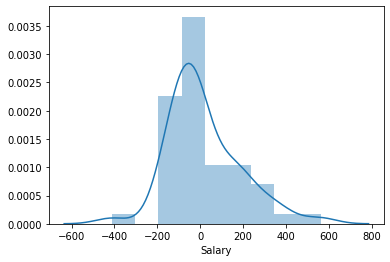

In [179]:
sns.distplot(y_test - y_pred_model10)

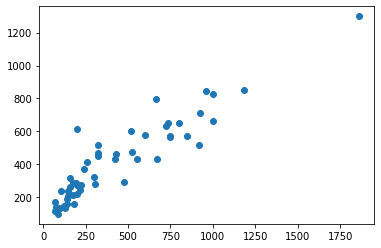

In [180]:
plt.scatter(y_test , y_pred_model10)

In [181]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model10))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model10))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model10)))

MAE: 124.36481600298288
MSE: 28645.260923268437
RMSE: 169.2491090767347


<Figure size 2250x2250 with 0 Axes>

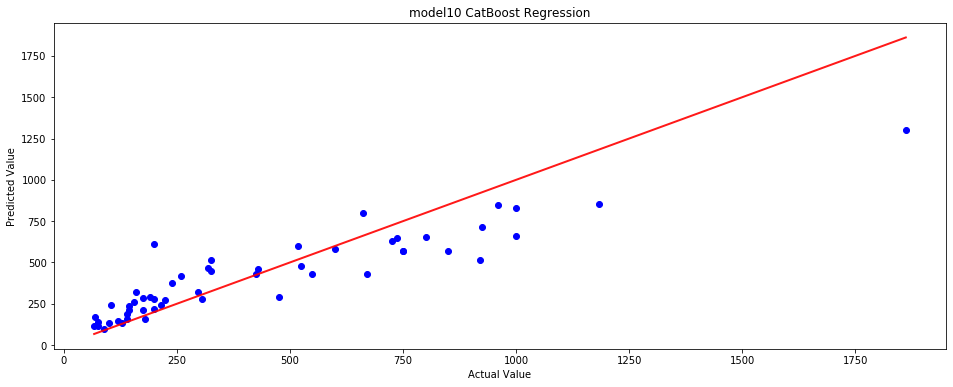

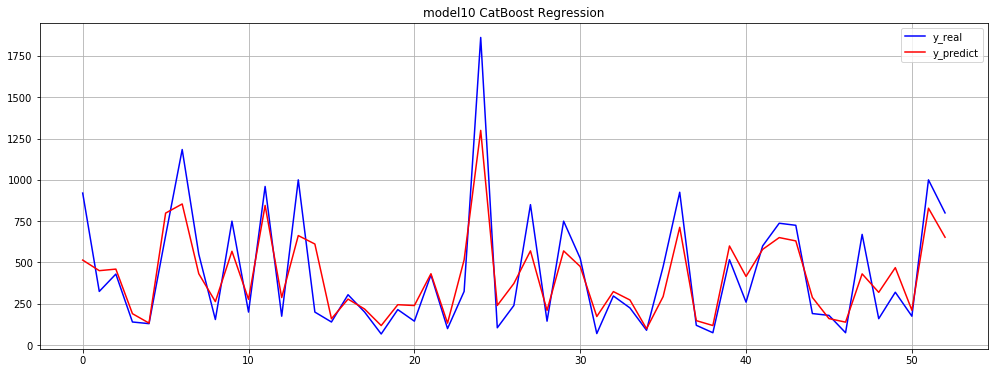

In [182]:
from sklearn.metrics import r2_score

y_pred = y_pred_model10
y_test = y_test
model = 'model10 CatBoost Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [198]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model10.mean(),
                                             'Median of AbsErrors' : abs_err_model10.median(),
                                             'SD of AbsErrors' :     abs_err_model10.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model10),
                                             'Min of AbsErrors':     abs_err_model10.min(),
                                             'Max of AbsErrors':     abs_err_model10.max()}, index = ['Model10: CatBoost Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                  223.148958           158.574170   
Model2: Ridge Regression                   226.441674           151.029550   
Model3: Lasso Regression                   235.833326           142.116905   
Model4: KNN Regression                     160.407478            81.167175   
Model5: Decision Tree Regression           162.989272            78.558773   
Model6: Bagging Regression                 110.548632            58.805452   
Model7: Random Forest Regression           115.340210            58.109284   
Model8: Gradient Boost Regression          126.722542            69.261401   
Model9: XGradient Boost Regression         111.024151            53.490540   
Model10: CatBoost Regression               124.364816            97.575426   

                                    SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression                198.785517        216.725217   
Model2: Ridge Regression                 293.532084        136.707544   
Model3: Lasso Regression                 324.730397        156.625954   
Model4: KNN Regression                   190.775927        226.393202   
Model5: Decision Tree Regression         185.351198        223.772135   
Model6: Bagging Regression               137.133019        153.685308   
Model7: Random Forest Regression         137.818992        160.515046   
Model8: Gradient Boost Regression        136.800253        106.438768   
Model9: XGradient Boost Regression       133.869898        149.096519   
Model10: CatBoost Regression             115.896890        123.215817   

                                    Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                   3.569232       1047.957143  
Model2: Ridge Regression                    7.679097       1897.768941  
Model3: Lasso Regression                    3.744212       2181.596147  
Model4: KNN Regression                      2.543116        837.841616  
Model5: Decision Tree Regression            0.769051        827.083624  
Model6: Bagging Regression                  1.442460        747.780147  
Model7: Random Forest Regression            3.225445        745.132697  
Model8: Gradient Boost Regression           3.763734        532.900731  
Model9: XGradient Boost Regression          0.053513        774.368569  
Model10: CatBoost Regression                3.237146        562.148719

### Model11: LightBoost

In [ ]:
{'gamma': 0.22007624686980065,
 'learning_rate': 0.06661147045343364,
 'max_depth': 2,
 'n_estimators': 107,
 'subsample': 0.6137554084460873}

In [186]:
from lightgbm import LGBMRegressor
model11 = LGBMRegressor(gamma = 0.22007624686980065,
                        learning_rate = 0.06661147045343364,
                        max_depth = 2, 
                        n_estimators = 107, 
                        subsample = 0.6137554084460873)
model11.fit(X_train, logy_train)
y_pred_model11 = model11.predict(X_test)
y_pred_model11 = np.exp(y_pred_model11)
abs_err_model11 = np.abs(y_pred_model11 - y_test)

In [185]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

lb = RandomizedSearchCV(estimator = model11, 
                        param_distributions = params,
                        scoring='neg_mean_squared_error',
                        n_iter = 10, 
                        cv = 5, 
                        verbose=2, 
                        random_state=42, 
                        n_jobs = 1)
lb.fit(X_train, logy_train)
lb.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.0s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.07800932022121826, learning_rate=0.07679

[CV]  gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216, total=   0.0s
[CV] gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216, total=   0.0s
[CV] gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282, total=   0.0s
[CV] gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282 
[LightGBM] [Warning] Unknown parameter: gamma
[CV]  gamma=0.0453032172664104, learning_rate=0.2155158

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.4s finished


{'gamma': 0.22007624686980065,
 'learning_rate': 0.06661147045343364,
 'max_depth': 2,
 'n_estimators': 107,
 'subsample': 0.6137554084460873}

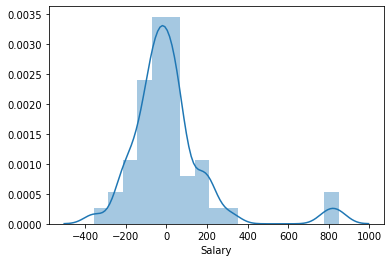

In [187]:
sns.distplot(y_test - y_pred_model11)

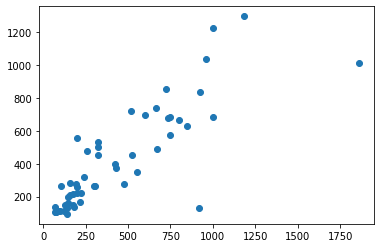

In [188]:
plt.scatter(y_test , y_pred_model11)

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_model11))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_model11))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model11)))

MAE: 124.93325779962663
MSE: 41085.0395500319
RMSE: 202.69444874004787


<Figure size 2250x2250 with 0 Axes>

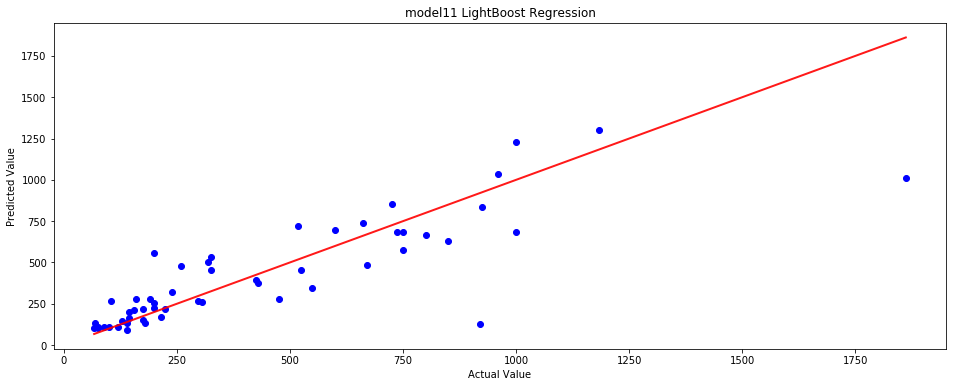

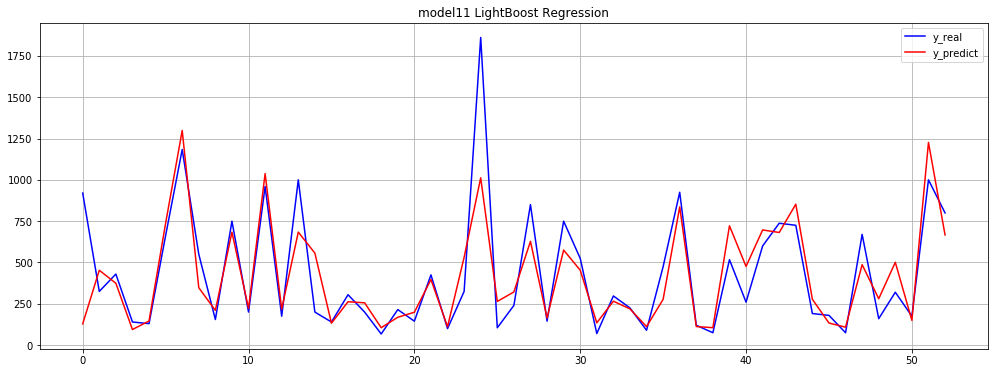

In [190]:
from sklearn.metrics import r2_score

y_pred = y_pred_model11
y_test = y_test
model = 'model11 LightBoost Regression'

plt.figure(figsize=(15, 15), dpi = 150);
plt.subplots_adjust(hspace = 0.25, wspace = 0.25);

plt.subplots(figsize=(16,6));
plt.scatter(x = y_test, y = y_pred, color = 'blue');
#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')
plt.xlabel('Actual Value');
plt.ylabel('Predicted Value');

plt.title(f'{model}');
plt.subplots(figsize=(17,6));

x_points = list(range(len(y_test)));
plt.plot(x_points, y_test, label='y_real', color = 'blue');
plt.plot(x_points, y_pred, label='y_predict', color = 'red');
plt.legend();
plt.grid()
plt.title(f'{model}');
plt.show();

In [199]:
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_model11.mean(),
                                             'Median of AbsErrors' : abs_err_model11.median(),
                                             'SD of AbsErrors' :     abs_err_model11.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_model11),
                                             'Min of AbsErrors':     abs_err_model11.min(),
                                             'Max of AbsErrors':     abs_err_model11.max()}, index = ['Model11: LightBoost Regression']), 
                               ignore_index = False)

model_comp

Mean of AbsErrors  Median of AbsErrors  \
Model1: Linear-Ragression                  223.148958           158.574170   
Model2: Ridge Regression                   226.441674           151.029550   
Model3: Lasso Regression                   235.833326           142.116905   
Model4: KNN Regression                     160.407478            81.167175   
Model5: Decision Tree Regression           162.989272            78.558773   
Model6: Bagging Regression                 110.548632            58.805452   
Model7: Random Forest Regression           115.340210            58.109284   
Model8: Gradient Boost Regression          126.722542            69.261401   
Model9: XGradient Boost Regression         111.024151            53.490540   
Model10: CatBoost Regression               124.364816            97.575426   
Model11: LightBoost Regression             124.933258            71.528389   

                                    SD of AbsErrors  IQR of AbsErrors  \
Model1: Linear-Ragression                198.785517        216.725217   
Model2: Ridge Regression                 293.532084        136.707544   
Model3: Lasso Regression                 324.730397        156.625954   
Model4: KNN Regression                   190.775927        226.393202   
Model5: Decision Tree Regression         185.351198        223.772135   
Model6: Bagging Regression               137.133019        153.685308   
Model7: Random Forest Regression         137.818992        160.515046   
Model8: Gradient Boost Regression        136.800253        106.438768   
Model9: XGradient Boost Regression       133.869898        149.096519   
Model10: CatBoost Regression             115.896890        123.215817   
Model11: LightBoost Regression           161.141731        136.835531   

                                    Min of AbsErrors  Max of AbsErrors  
Model1: Linear-Ragression                   3.569232       1047.957143  
Model2: Ridge Regression                    7.679097       1897.768941  
Model3: Lasso Regression                    3.744212       2181.596147  
Model4: KNN Regression                      2.543116        837.841616  
Model5: Decision Tree Regression            0.769051        827.083624  
Model6: Bagging Regression                  1.442460        747.780147  
Model7: Random Forest Regression            3.225445        745.132697  
Model8: Gradient Boost Regression           3.763734        532.900731  
Model9: XGradient Boost Regression          0.053513        774.368569  
Model10: CatBoost Regression                3.237146        562.148719  
Model11: LightBoost Regression              5.743488        849.233318

In [ ]:
http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html